# <p style="text-align: center;"> Communities and Crime</p>
## <p style="text-align: center;"> Predicting violent crimes from community and law enforcement data</p>
#### <p style="text-align: right;"> By Asad Mahmood and Ihor Markevych</p>

# Structure:
- [**Objective of the proposed research**](#objective)
- [**Attribute Information**](#attr)
- [**Libraries Description**](#libs)
- [**Data Exploration, Cleaning, Descriptive Visualization and Adaptation**](#exp)
    - [Data Exploration 1](#de1)
    - [Initial Data Cleaning](#init_clean)
    - [Data Exploration 2](#de2)
        - [Data Visualization 1](#dv1)
    - [Data Cleaning](#cleaning)
    - [Adaptation](#adaptation)
    - [Data Exploration 3 - **Exploring Correlations**](#de3)
        - [Data Visualization 2](#dv2)
    - [Data Exploration 4 - **Exploring Correlations**](#de4)
        - [Data Visualization 3](#dv3)
        - [Data Visualization 4](#dv4)
    - [Data Exploration 5](#de5)  
- [**Extracting Rows for Prediction**](#extract)
- [**Simple Linear Regression**](#slr)
    - [Response Variable](#response)
    - [SLR1](#slr1)
    - [SLR2](#slr2)
    - [SLR3](#slr3)
    - [SLR4](#slr4)
    - [SLR5](#slr5)
- [**Multiple Linear Regression**](#mlr)
    - [Best Model Per Akaike Criterion](#best_mlr)
    - [Dropping Nonsignificant Coefficients](#drop_non_sig)
    - [Testing Models on Extracted Rows](#predict)
- [**Model Comparison**](#compare)
- [**Report**](#report)

<a id='objective'></a>

## Objective of the proposed research


**Stakeholder:** *US police departments*  
This stakeholder was selected due to high importance of police departments duties. Following research will give stakeholder information for situation analyse and effective resource managing, which will have positive effect on social security of population.

**Impact on stakeholder:** 
- prediction of future crime rate when opening new stations
- understanding of how efficiency of law enforcement will be affected by increasing or decreasing the following parameters:
    - police operating budget
    - number of police cars
    - number of police officers
    - etc.
- finding optimal quantity of law enforcement resources for specific population and city conditions    

**Planned goal variable:** `total number of violent crimes per 100K population`.  
This variable depicts total number of violent crimes per 100K popuation as is numerical (decimal).  
As most of the variables in the dataset, it is normalized between 0 and 1.

**Planned research and goals:**  
- analyze data 
- find predictors and strength of their impact
- create an accurate model that fits data
- try to answer questions like
    - does number of educated people impact crime rate?
    - does english-proficiency level among population impact crime rate?
    - does population density impact crime rate?
    - do housing conditions impact crime rate?
    - does race percentage have impact on crime rate?
    - etc.

**Dataset selection:**
For this research we have selected [this dataset](http://archive.ics.uci.edu/ml/datasets/communities+and+crime).  
This dataset combines data of 3 different aspects - socio-economic, law enforcement data and crime data. This dataset fits the research perfectly since it has socio-economic data, which may be major reason of crimes are commitment.  
Having data regarding law enforcement is also useful because it will show impact of law enforcement departments on to rise or drop of crime in different communites.  
It has large amount of columns that can be potential indicators relating to socio-economic, law enforcement and crime data. Also, this data is generally available and not confidential, which will allow efficient implementation of goals after completing this research.  
This dataset has 1994 rows, which should be enough for efficient modelling.

---------------

## Originality
*No other similar published works for linear regression found with same dataset.*


<a id='attr'></a>
## Attribute Information: 
_(122 predictive, 5 non-predictive, 1 goal)_

| Column Name | Description | Type |
|:---:|:---:|:---:|
 | **state** | US state (by number) - not counted as predictive above, but if considered, should be consided nominal | *(nominal)*
 | **county** | numeric code for county - not predictive, and many missing values | *(numeric)*
 | **community** | numeric code for community - not predictive and many missing values | *(numeric)*
 | **communityname** | community name - not predictive - for information only | *(string)*
 | **fold** | fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive | *(numeric)*
 | **population** | population for community: | *(numeric - decimal)*
 | **householdsize** | mean people per household | *(numeric - decimal)*
 | **racepctblack** | percentage of population that is african american | *(numeric - decimal)*
 | **racePctWhite** | percentage of population that is caucasian | *(numeric - decimal)*
 | **racePctAsian** | percentage of population that is of asian heritage | *(numeric - decimal)*
 | **racePctHisp** | percentage of population that is of hispanic heritage | *(numeric - decimal)*
 | **agePct12t21** | percentage of population that is 12-21 in age | *(numeric - decimal)*
 | **agePct12t29** | percentage of population that is 12-29 in age | *(numeric - decimal)*
 | **agePct16t24** | percentage of population that is 16-24 in age | *(numeric - decimal)*
 | **agePct65up** | percentage of population that is 65 and over in age | *(numeric - decimal)*
 | **numbUrban** | number of people living in areas classified as urban | *(numeric - decimal)*
 | **pctUrban** | percentage of people living in areas classified as urban | *(numeric - decimal)*
 | **medIncome** | median household income | *(numeric - decimal)*
 | **pctWWage** | percentage of households with wage or salary income in 1989 | *(numeric - decimal)*
 | **pctWFarmSelf** | percentage of households with farm or self employment income in 1989 | *(numeric - decimal)*
 | **pctWInvInc** | percentage of households with investment / rent income in 1989 | *(numeric - decimal)*
 | **pctWSocSec** | percentage of households with social security income in 1989 | *(numeric - decimal)*
 | **pctWPubAsst** | percentage of households with public assistance income in 1989 | *(numeric - decimal)*
 | **pctWRetire** | percentage of households with retirement income in 1989 | *(numeric - decimal)*
 | **medFamInc** | median family income (differs from household income for non-family households) | *(numeric - decimal)*
 | **perCapInc** | per capita income | *(numeric - decimal)*
 | **whitePerCap** | per capita income for caucasians | *(numeric - decimal)*
 | **blackPerCap** | per capita income for african americans | *(numeric - decimal)*
 | **indianPerCap** | per capita income for native americans | *(numeric - decimal)*
 | **AsianPerCap** | per capita income for people with asian heritage | *(numeric - decimal)*
 | **OtherPerCap** | per capita income for people with 'other' heritage | *(numeric - decimal)*
 | **HispPerCap** | per capita income for people with hispanic heritage | *(numeric - decimal)*
 | **NumUnderPov** | number of people under the poverty level | *(numeric - decimal)*
 | **PctPopUnderPov** | percentage of people under the poverty level | *(numeric - decimal)*
 | **PctLess9thGrade** | percentage of people 25 and over with less than a 9th grade education | *(numeric - decimal)*
 | **PctNotHSGrad** | percentage of people 25 and over that are not high school graduates | *(numeric - decimal)*
 | **PctBSorMore** | percentage of people 25 and over with a bachelors degree or higher education | *(numeric - decimal)*
 | **PctUnemployed** | percentage of people 16 and over, in the labor force, and unemployed | *(numeric - decimal)*
 | **PctEmploy** | percentage of people 16 and over who are employed | *(numeric - decimal)*
 | **PctEmplManu** | percentage of people 16 and over who are employed in manufacturing | *(numeric - decimal)*
 | **PctEmplProfServ** | percentage of people 16 and over who are employed in professional services | *(numeric - decimal)*
 | **PctOccupManu** | percentage of people 16 and over who are employed in manufacturing | *(numeric - decimal)*
 | **PctOccupMgmtProf** | percentage of people 16 and over who are employed in management or professional occupations | *(numeric - decimal)*
 | **MalePctDivorce** | percentage of males who are divorced | *(numeric - decimal)*
 | **MalePctNevMarr** | percentage of males who have never married | *(numeric - decimal)*
 | **FemalePctDiv** | percentage of females who are divorced | *(numeric - decimal)*
 | **TotalPctDiv** | percentage of population who are divorced | *(numeric - decimal)*
 | **PersPerFam** | mean number of people per family | *(numeric - decimal)*
 | **PctFam2Par** | percentage of families (with kids) that are headed by two parents | *(numeric - decimal)*
 | **PctKids2Par** | percentage of kids in family housing with two parents | *(numeric - decimal)*
 | **PctYoungKids2Par** | percent of kids 4 and under in two parent households | *(numeric - decimal)*
 | **PctTeen2Par** | percent of kids age 12-17 in two parent households | *(numeric - decimal)*
 | **PctWorkMomYoungKids** | percentage of moms of kids 6 and under in labor force | *(numeric - decimal)*
 | **PctWorkMom** | percentage of moms of kids under 18 in labor force | *(numeric - decimal)*
 | **NumIlleg** | number of kids born to never married | *(numeric - decimal)*
 | **PctIlleg** | percentage of kids born to never married | *(numeric - decimal)*
 | **NumImmig** | total number of people known to be foreign born | *(numeric - decimal)*
 | **PctImmigRecent** | percentage of _immigrants_ who immigated within last 3 years | *(numeric - decimal)*
 | **PctImmigRec5** | percentage of _immigrants_ who immigated within last 5 years | *(numeric - decimal)*
 | **PctImmigRec8** | percentage of _immigrants_ who immigated within last 8 years | *(numeric - decimal)*
 | **PctImmigRec10** | percentage of _immigrants_ who immigated within last 10 years | *(numeric - decimal)*
 | **PctRecentImmig** | percent of _population_ who have immigrated within the last 3 years | *(numeric - decimal)*
 | **PctRecImmig5** | percent of _population_ who have immigrated within the last 5 years | *(numeric - decimal)*
 | **PctRecImmig8** | percent of _population_ who have immigrated within the last 8 years | *(numeric - decimal)*
 | **PctRecImmig10** | percent of _population_ who have immigrated within the last 10 years | *(numeric - decimal)*
 | **PctSpeakEnglOnly** | percent of people who speak only English | *(numeric - decimal)*
 | **PctNotSpeakEnglWell** | percent of people who do not speak English well | *(numeric - decimal)*
 | **PctLargHouseFam** | percent of family households that are large (6 or more) | *(numeric - decimal)*
 | **PctLargHouseOccup** | percent of all occupied households that are large (6 or more people) | *(numeric - decimal)*
 | **PersPerOccupHous** | mean persons per household | *(numeric - decimal)*
 | **PersPerOwnOccHous** | mean persons per owner occupied household | *(numeric - decimal)*
 | **PersPerRentOccHous** | mean persons per rental household | *(numeric - decimal)*
 | **PctPersOwnOccup** | percent of people in owner occupied households | *(numeric - decimal)*
 | **PctPersDenseHous** | percent of persons in dense housing (more than 1 person per room) | *(numeric - decimal)*
 | **PctHousLess3BR** | percent of housing units with less than 3 bedrooms | *(numeric - decimal)*
 | **MedNumBR** | median number of bedrooms | *(numeric - decimal)*
 | **HousVacant** | number of vacant households | *(numeric - decimal)*
 | **PctHousOccup** | percent of housing occupied | *(numeric - decimal)*
 | **PctHousOwnOcc** | percent of households owner occupied | *(numeric - decimal)*
 | **PctVacantBoarded** | percent of vacant housing that is boarded up | *(numeric - decimal)*
 | **PctVacMore6Mos** | percent of vacant housing that has been vacant more than 6 months | *(numeric - decimal)*
 | **MedYrHousBuilt** | median year housing units built | *(numeric - decimal)*
 | **PctHousNoPhone** | percent of occupied housing units without phone (in 1990, this was rare!) | *(numeric - decimal)*
 | **PctWOFullPlumb** | percent of housing without complete plumbing facilities | *(numeric - decimal)*
 | **OwnOccLowQuart** | owner occupied housing - lower quartile value | *(numeric - decimal)*
 | **OwnOccMedVal** | owner occupied housing - median value | *(numeric - decimal)*
 | **OwnOccHiQuart** | owner occupied housing - upper quartile value | *(numeric - decimal)*
 | **RentLowQ** | rental housing - lower quartile rent | *(numeric - decimal)*
 | **RentMedian** | rental housing - median rent (Census variable H32B from file STF1A) | *(numeric - decimal)*
 | **RentHighQ** | rental housing - upper quartile rent | *(numeric - decimal)*
 | **MedRent** | median gross rent (Census variable H43A from file STF3A - includes utilities) | *(numeric - decimal)*
 | **MedRentPctHousInc** | median gross rent as a percentage of household income | *(numeric - decimal)*
 | **MedOwnCostPctInc** | median owners cost as a percentage of household income - for owners with a mortgage | *(numeric - decimal)*
 | **MedOwnCostPctIncNoMtg** | median owners cost as a percentage of household income - for owners without a mortgage | *(numeric - decimal)*
 | **NumInShelters** | number of people in homeless shelters | *(numeric - decimal)*
 | **NumStreet** | number of homeless people counted in the street | *(numeric - decimal)*
 | **PctForeignBorn** | percent of people foreign born | *(numeric - decimal)*
 | **PctBornSameState** | percent of people born in the same state as currently living | *(numeric - decimal)*
 | **PctSameHouse85** | percent of people living in the same house as in 1985 (5 years before) | *(numeric - decimal)*
 | **PctSameCity85** | percent of people living in the same city as in 1985 (5 years before) | *(numeric - decimal)*
 | **PctSameState85** | percent of people living in the same state as in 1985 (5 years before) | *(numeric - decimal)*
 | **LemasSwornFT** | number of sworn full time police officers | *(numeric - decimal)*
 | **LemasSwFTPerPop** | sworn full time police officers per 100K population | *(numeric - decimal)*
 | **LemasSwFTFieldOps** | number of sworn full time police officers in field operations (on the street as opposed to administrative etc) | *(numeric - decimal)*
 | **LemasSwFTFieldPerPop** | sworn full time police officers in field operations (on the street as opposed to administrative etc) per 100K population | *(numeric - decimal)*
 | **LemasTotalReq** | total requests for police | *(numeric - decimal)*
 | **LemasTotReqPerPop** | total requests for police per 100K popuation | *(numeric - decimal)*
 | **PolicReqPerOffic** | total requests for police per police officer | *(numeric - decimal)*
 | **PolicPerPop** | police officers per 100K population | *(numeric - decimal)*
 | **RacialMatchCommPol** | a measure of the racial match between the community and the police force. High values indicate proportions in community and police force are similar | *(numeric - decimal)*
 | **PctPolicWhite** | percent of police that are caucasian | *(numeric - decimal)*
 | **PctPolicBlack** | percent of police that are african american | *(numeric - decimal)*
 | **PctPolicHisp** | percent of police that are hispanic | *(numeric - decimal)*
 | **PctPolicAsian** | percent of police that are asian | *(numeric - decimal)*
 | **PctPolicMinor** | percent of police that are minority of any kind | *(numeric - decimal)*
 | **OfficAssgnDrugUnits** | number of officers assigned to special drug units | *(numeric - decimal)*
 | **NumKindsDrugsSeiz** | number of different kinds of drugs seized | *(numeric - decimal)*
 | **PolicAveOTWorked** | police average overtime worked | *(numeric - decimal)*
 | **LandArea** | land area in square miles | *(numeric - decimal)*
 | **PopDens** | population density in persons per square mile | *(numeric - decimal)*
 | **PctUsePubTrans** | percent of people using public transit for commuting | *(numeric - decimal)*
 | **PolicCars** | number of police cars | *(numeric - decimal)*
 | **PolicOperBudg** | police operating budget | *(numeric - decimal)*
 | **LemasPctPolicOnPatr** | percent of sworn full time police officers on patrol | *(numeric - decimal)*
 | **LemasGangUnitDeploy** | gang unit deployed | *(numeric - decimal - but really ordinal - 0 means NO, 1 means YES, 0.5 means Part Time)*
 | **LemasPctOfficDrugUn** | percent of officers assigned to drug units | *(numeric - decimal)*
 | **PolicBudgPerPop** | police operating budget per population | *(numeric - decimal)*
 | **ViolentCrimesPerPop** | total number of violent crimes per 100K popuation | *(numeric - decimal)* GOAL attribute (to be predicted)

*These are the names, descriptions and types of columns found in dataset.*

<a id='libs'></a>
## Libraries Description  
  
**Tidyverse package:** 

It is a collection of packages in R which specifically help data scientists in playing around with the data and help them out in analysis. The core packages in Tidyverse are:

 1. Data Wrangling: For this task it has packages dplyr, tidyr, stringr, forcats.
 2. Data Import & Management: For this task it has packages tibble and readdr.
 3. Functional Programming: For this task it has the package purrr.
 4. Data Visulization: For this task it has the package ggplot2.

Being a collection of packages it is a much better option then calling each of the libraries seprately thus saving time & effort.  
  
**DataExplorer package**

This package does automated data exploration process, so users can extract insights from the data quickly. It scans and analyzes each variable, and visualizes them with typical graphical techniques like plots, charts and etc.  
  
**Pastecs package**

It has a wide range of functions for obtaining summary statistics.    
  
**Car Package**

Calculates type-II or type-III analysis-of-variance tables for model objects produced by lm, glm,
multinom (in the nnet package), polr (in the MASS package), coxph (in the survival package),
coxme (in the coxme pckage), svyglm (in the survey package), rlm (in the MASS package), lmer
in the lme4 package, lme in the nlme package, and (by the default method) for most models with
a linear predictor and asymptotically normal coefficients  
  
  
**Psych Package**

A general purpose toolbox for personality, psychometric theory and experimental psychology. Functions are primarily for multivariate analysis and scale construction using factor analysis, principal component analysis, cluster analysis and reliability analysis, although others provide basic descriptive statistics.

**Stats Package**

R statistical functions.

**Boot Package**

For models bootstrapping.

In [1]:
library(DataExplorer)
library(car)
library(pastecs)
library(tidyverse)
library(psych)
library(MASS)
library(boot)
library(stats)

Loading required package: carData
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::extract() masks pastecs::extract()
x dplyr::filter()  masks stats::filter()
x dplyr::first()   masks pastecs::first()
x dplyr::lag()     masks stats::lag()
x dplyr::last()    masks pastecs::last()
x dplyr::recode()  masks car::recode()
x purrr::some()    masks car::some()

Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

The following object is masked from 'package:car':

    logit


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attach

_this reads the names of the columns of the dataframe_

In [2]:
names <- read.delim('names.txt', sep = ',', header = F)[['V1']]

In [3]:
d <- read.table('communities.data', sep = ',', col.names = names)

<a id='exp'></a>
## Data Exploration, Cleaning, Descriptive Visualization and Adaptation

<a id='de1'></a>
### Data exploration 1

Let's see what kind of data we have by printing first rows of dataset.

_This fuction usually take an object in its parameter like **"d"** dataframe and displays the top 5 rows of the dataframe. It can take other parameters too but they are optional and not used here_

In [4]:
head(d)

state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14


<a id='init_clean'></a>
### Initial Data cleaning

_we need to firstly map `?` to `NA`, after this we need to convert all numerical columns that were converted to text due to `?` presence back to numerical_

In [5]:
d[d=='?'] <- NA

In [6]:
for(i in colnames(d)){
    d[,i] <- as.numeric(d[,i])
}

<a id='de2'></a>
### Data Exploration 2

<a id='dv1'></a>
#### Data Visualisation 1

Since knowing how much missing values we have is crucial for modeling and data cleaning, let's find it out.

_`plot_missing(dataframe)` - this function is part of a package called as DataExplorer and it plots a graph of the amount of missing values in each column_

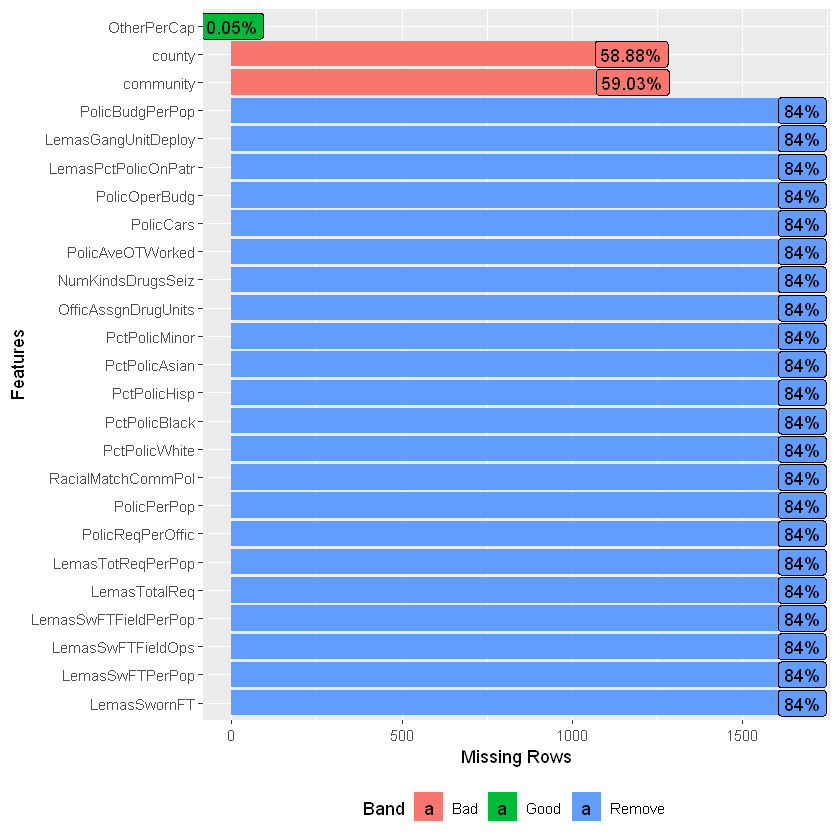

In [7]:
missingCols <- c()
for(i in colnames(d)){
    if(length(d[is.na(d[, i]), 1]) != 0){
#         cat('For column', i, 'there are', 
#             length(d[is.na(d[, i]), 1]) / length(d[,1]) * 100, 
#             '% of missing values.\n')
        missingCols <- c(missingCols, i)
    }
}
options(scipen=999, repr.plot.width=7, repr.plot.height=7)
plot_missing(d[, missingCols])

As we can see, there are some columns with too much missing values. This may affect our future models, so, we should clean them. And one column that has a bit of missing values, we can just fill them with value like mean.

<a id='cleaning'></a>
### Data Cleaning

We'll drop all columns with `NA`s, except for `OtherPerCap`. We'll fill this column with mean.  
We'll also drop `state`, `fold`, `communityname`, `community`, `county` and `state`, since they are not predictive.

In [8]:
meanForFilling <- mean(d[, 'OtherPerCap'], na.rm = T)
d <- d[, !(colnames(d) %in% c('state', 'fold', 'communityname', 'county', 'state', 'community'))]

for(i in colnames(d)){
    if(length(d[is.na(d[, i]), 1]) / length(d[,1]) > 0.5){
        d <- d[, colnames(d) != i]
    }
}
d[is.na(d[,'OtherPerCap']), 'OtherPerCap']  <- meanForFilling

<a id='adaptation'></a>
### Adaptation

Let's create a dataset of correlations for percentiled values and get the cloumns that have best increse of correlation.

In [9]:
calculateDifferenceInCor <- function(column1, column2){
    (abs(cor(percent_rank(column1), column2)) - abs(cor(column1, column2))) / abs(cor(column1, column2))
}
percentiles <- data.frame(column=c(), initialCorrelation=c(), aggregatedCorrelation=c(), differencePercent=c())
for(column in colnames(d)){
    percentiles <- rbind(percentiles, 
                         data.frame(column = column, 
                             initialCorrelation = cor(d[[column]], d[['ViolentCrimesPerPop']]),
                             aggregatedCorrelation = cor(percent_rank(d[[column]]), d[['ViolentCrimesPerPop']]),
                             differencePercent = calculateDifferenceInCor(d[[column]], d[['ViolentCrimesPerPop']])))
}

Now let's take only rows with columns that got a positive increase.

In [10]:
percentiles

column,initialCorrelation,aggregatedCorrelation,differencePercent
population,0.36715738,0.34139888,-0.070156570
householdsize,-0.03492260,-0.07005157,1.005909612
racepctblack,0.63126363,0.57220313,-0.093559179
racePctWhite,-0.68476958,-0.64353444,-0.060217530
racePctAsian,0.03762179,-0.02819060,-0.250684182
racePctHisp,0.29305022,0.23368908,-0.202563037
agePct12t21,0.06047725,0.16753663,1.770242318
agePct12t29,0.15335669,0.25470809,0.660886734
agePct16t24,0.09934668,0.28501864,1.868929712
agePct65up,0.06717145,0.05724730,-0.147743594


In [11]:
percentiles <- percentiles[percentiles$differencePercent > 0,]
percentiles <- percentiles[order(-percentiles$aggregatedCorrelation),]
head(percentiles, 10)

,column,initialCorrelation,aggregatedCorrelation,differencePercent
50,NumIlleg,0.4710281,0.6572673,0.395388598
28,NumUnderPov,0.4475816,0.5923531,0.323452555
29,PctPopUnderPov,0.5218765,0.5631956,0.079174005
41,FemalePctDiv,0.5560319,0.5626970,0.011987023
42,TotalPctDiv,0.5527774,0.5556456,0.005188809
69,PctPersDenseHous,0.4529009,0.5510985,0.216819195
78,PctHousNoPhone,0.4882435,0.5195792,0.064180487
33,PctUnemployed,0.5042346,0.5076241,0.006722043
31,PctNotHSGrad,0.4833659,0.4882013,0.010003643
72,HousVacant,0.4213958,0.4634574,0.099815034


_let's add top 5 columns to our DS_

In [12]:
for(i in 1:5){
    d[, paste('percentiles.',percentiles[i,'column'], sep='')]  <- percent_rank(d[percentiles[i,'column']])
}

Here is our new dataset with new columns:

In [13]:
head(d)

population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,percentiles.NumIlleg,percentiles.NumUnderPov,percentiles.PctPopUnderPov,percentiles.FemalePctDiv,percentiles.TotalPctDiv
0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.32,0.20,0.8193678,0.8439538,0.40642248,0.93878575,0.91821375
0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.00,0.67,0.0000000,0.1575514,0.48218766,0.99698946,0.99949824
0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.00,0.43,0.3763171,0.1575514,0.52182639,0.90265931,0.86151530
0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.00,0.12,0.7521325,0.1575514,0.20722529,0.46312092,0.37782238
0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.00,0.03,0.0000000,0.0000000,0.08529854,0.04867035,0.06221776
0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.01,0.58,0.10,0.00,0.14,0.0000000,0.1575514,0.25940793,0.71951831,0.64475665


<a id='de3'></a>
### Data Exploration 3 - Exploring Correlations

Next very important fact will be correlation between all of the columns and our goal column. We'll find it, print it and visualize it.

In [14]:
cors <- data.frame()
for(i in colnames(d)[colnames(d) != 'ViolentCrimesPerPop']){
    cors  <- rbind(cors, data.frame(Column = i, Correlation = cor(d[[i]], d[['ViolentCrimesPerPop']])))
    cat('For column', i, 'correlation is', cors[[length(cors[,1]),2]])
    cat('\n')
}

For column population correlation is 0.3671574
For column householdsize correlation is -0.0349226
For column racepctblack correlation is 0.6312636
For column racePctWhite correlation is -0.6847696
For column racePctAsian correlation is 0.03762179
For column racePctHisp correlation is 0.2930502
For column agePct12t21 correlation is 0.06047725
For column agePct12t29 correlation is 0.1533567
For column agePct16t24 correlation is 0.09934668
For column agePct65up correlation is 0.06717145
For column numbUrban correlation is 0.3628974
For column pctUrban correlation is 0.08202542
For column medIncome correlation is -0.4242206
For column pctWWage correlation is -0.3055005
For column pctWFarmSelf correlation is -0.1531244
For column pctWInvInc correlation is -0.5763236
For column pctWSocSec correlation is 0.1179772
For column pctWPubAsst correlation is 0.5746653
For column pctWRetire correlation is -0.09844222
For column medFamInc correlation is -0.4391077
For column perCapInc correlation is -

<a id='dv2'></a>
#### Data Visualization 2

In the following cell we can see visualization of corelations from previous cell. As we can see, most of the variables are highly correlated with goal variable, some are negaive, some are positive, which is explained by their nature.

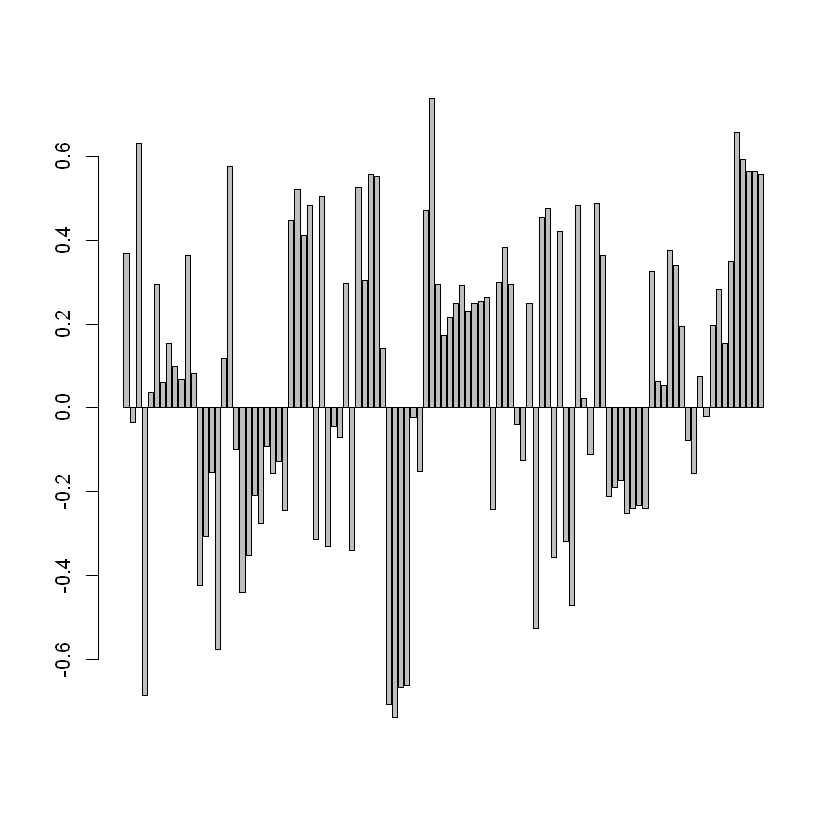

In [15]:
barplot(cors[,2])

_A basic plot of important correlations with the goal column being visualized according to their values_

<a id='de4'></a>
### Data Exploration 4 - Exploring Correlations

Let's now work with strongly correlated (greater that 0.5) with our goal column variables.  
Firstly, let's see, which columns are stongly correlated with goal variable and visualize it.

,Column,Correlation
3,racepctblack,0.6312636
4,racePctWhite,-0.6847696
44,PctFam2Par,-0.7066675
45,PctKids2Par,-0.7384238
46,PctYoungKids2Par,-0.6660589
47,PctTeen2Par,-0.6615816
51,PctIlleg,0.7379565
101,percentiles.NumIlleg,0.6572673


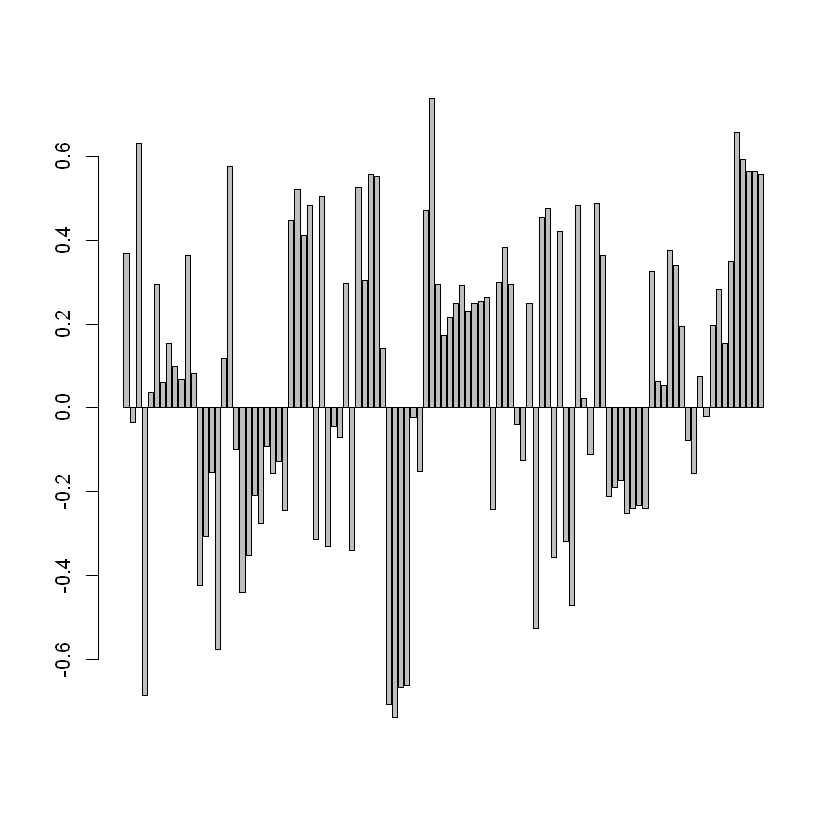

In [16]:
cors[abs(cors[,2])>0.6,]
barplot(cors[,2])

<a id='dv3'></a>
#### Data Visualization 3

Now, let's plot frequencies of those variables to have understanding of distribution of those variables.

_`plot_histogram(dataframe)` - This function is part of a package called as DataExplorer and it plots a graph distribution of each continuous variable in the dataframe. Though it doesn't look comprehensive at first look but it does show the names of columns having continious values and it also shows the colums that have negative values and their frequency and shows that some columns are not having linear distrubution for example_

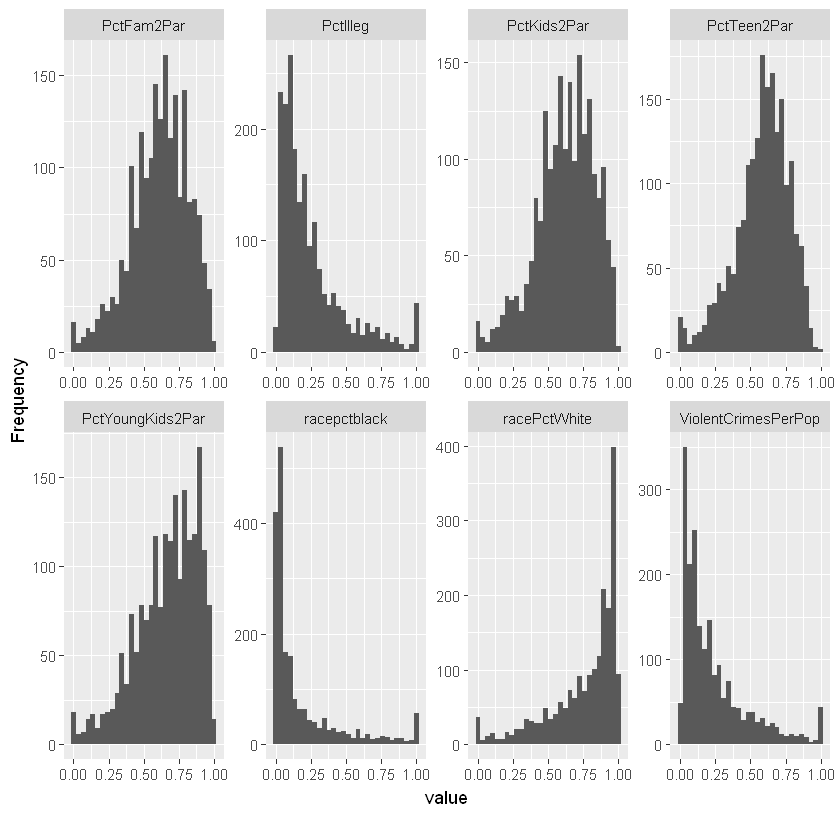

In [17]:
plot_histogram(d[,cors[abs(cors[,2])>0.6,1]])

First of all this data has been normalized into decimal range 0.00 to 1.00 using an unsupervised, equal-interval binning method.  
  
From the graphs we can see that some of the variables are quite close to normal distribution and some of them are shifted to right or left end of the axis based on the number of instances present in the dataframe.  

Those charts also gives us some understaning of population conditions, e.g. level of Unemployement.  

Then we see when analyzing graphs of `PctKids2Par` and `PctTeen2Par` we realize that there is slight decrease in children in general having 2 parents by the time they reach teens. This represents that a small percentage of marriages dont last long in USA.

<a id='dv4'></a>
#### Data Visualization 4

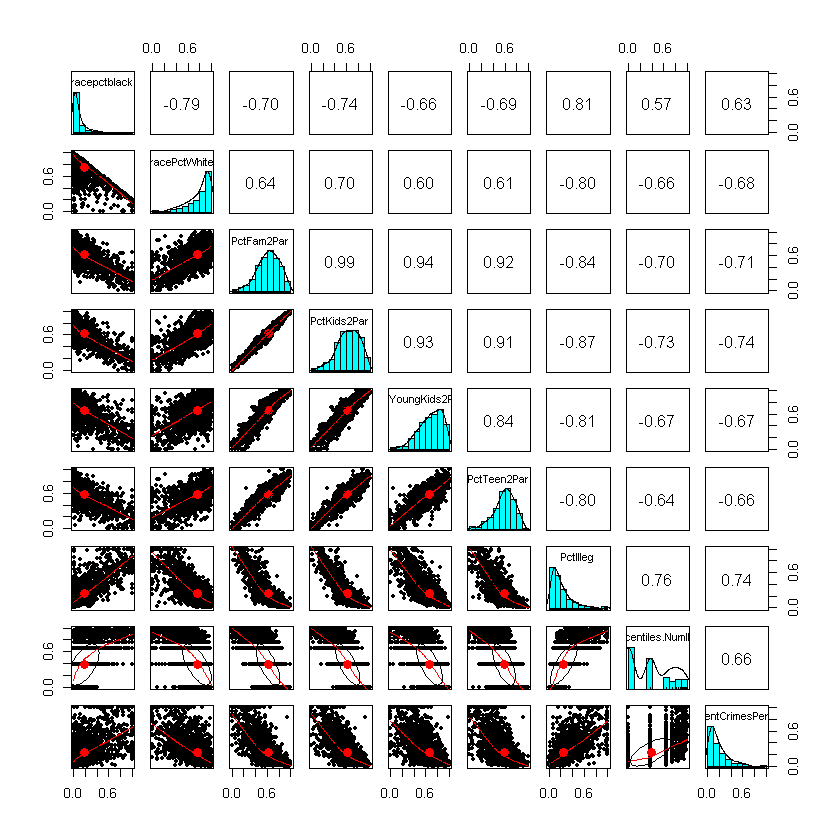

In [18]:
pairs.panels(d[,c(as.character(cors[abs(cors[,2]) > 0.6, 1]), 'ViolentCrimesPerPop')])

We have visualized top correlated columns to see the nature of their correlation. 
From those charts we can see that even despite there are no very strong visual dependency between variables and goal column, there are still **linear trends**. Also, there is very strong dependency between some other columns, which is explained by their nature (e.g. total number and numer per 100 population).

<a id='de5'></a>
### Data Exploration 5

Now, for our future modeling, we need better understanding of columns, which we can get by checking for their statistical values.

In [19]:
stat.desc(d)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,percentiles.NumIlleg,percentiles.NumUnderPov,percentiles.PctPopUnderPov,percentiles.FemalePctDiv,percentiles.TotalPctDiv
nbr.val,1994.000000000,1994.000000000,1994.000000000,1994.00000000,1994.000000000,1994.000000000,1994.000000000,1994.000000000,1994.000000000,1994.000000000,...,1994.000000000,1994.000000000,1994.000000000,1994.000000000,1994.000000000,1994.000000000,1994.000000000,1994.000000000,1994.000000000,1994.000000000
nbr.null,385.000000000,2.000000000,134.000000000,33.00000000,8.000000000,59.000000000,2.000000000,1.000000000,1.000000000,3.000000000,...,72.000000000,2.000000000,183.000000000,1685.000000000,10.000000000,750.000000000,314.000000000,3.000000000,2.000000000,2.000000000
nbr.na,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
min,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
max,1.000000000,1.000000000,1.000000000,1.00000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,...,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,0.994982439,0.993477170,0.987957852,0.999498244,0.999498244
range,1.000000000,1.000000000,1.000000000,1.00000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,...,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,0.994982439,0.993477170,0.987957852,0.999498244,0.999498244
sum,114.840000000,924.010000000,358.180000000,1502.91000000,306.440000000,287.180000000,845.890000000,984.770000000,670.510000000,843.790000000,...,130.070000000,464.310000000,322.400000000,187.540000000,474.530000000,764.617661816,859.231811340,980.885097842,981.268941295,982.012042148
median,0.020000000,0.440000000,0.060000000,0.85000000,0.070000000,0.040000000,0.400000000,0.480000000,0.290000000,0.420000000,...,0.040000000,0.170000000,0.070000000,0.000000000,0.150000000,0.376317110,0.421976919,0.498745610,0.486201706,0.483191169
mean,0.057592778,0.463395186,0.179628887,0.75371615,0.153681043,0.144022066,0.424217653,0.493866600,0.336263791,0.423164493,...,0.065230692,0.232853561,0.161685055,0.094052156,0.237978937,0.383459209,0.430908632,0.491918304,0.492110803,0.492483471
SE.mean,0.002841967,0.003666321,0.005675657,0.00546509,0.004677664,0.005206486,0.003475499,0.003215004,0.003728752,0.004012733,...,0.002451261,0.004548099,0.005129521,0.005381983,0.005217533,0.007795778,0.007244246,0.006548089,0.006455304,0.006461079


<a id='extract'></a>
## Extracting Rows for Prediction

_let's extract 10 random rows and use them for checking accuracy of our models_

In [20]:
extract <- sample(x = nrow(d), size = 10)
rowsToPredict  <- d[extract,]
d <- d[-extract,]

<a id='slr'></a>
## Simple Linear Regression

<a id='response'></a>
### Response Variable
Response variable is `total number of violent crimes per 100K population`.  
This variable depicts total number of violent crimes per 100K popuation as is numerical (decimal).  
As most of the variables in the dataset, it is normalized between 0 and 1.

This function checks for assumptions for linear regression. We are testing 2 assumptions here:<br/>
    + Independence of errors: This is done using dwt() in car package.
    + Not co-linear: This is done using vif().

_next cell contains a function that checks for assumptions of linear regression and function that creates plots to check some more assumptions_

In [21]:
linearRegressionAsumptionsCheck <- function(model){
    pass <- T
    if(dwt(model)$p < .05){
        cat('D-W VIOLATED!\n')
        pass <- F
    }

    if(length(model$coefficients) > 2){
        if(length(colnames(vif(model))) > 0){
           vif <- vif(model)[,'GVIF']
        }
        else {
           vif <- vif(model)
        }
        if(mean(vif) > 1.1){
            cat('NON-COLINEARITY MAY BE VIOLATED!\n')
            cat(vif,'\n')
            cat('Average:', mean(vif),'\n')
            pass <- F
        }
        if(any(vif > 10)){
            cat('NON-COLINEARITY VIOLATED!\n')
            pass <- F
        }

        if(any(1 / vif < .2)){
            cat('TOLERANCE IS VIOLATED!\n')
            pass <- F
        }
    }
    return(pass)
}

printCheck <- function(model){
    if(linearRegressionAsumptionsCheck(model)){
        cat('ALL GOOD!\n')
    } else {
        cat('VIOLATED...\n')
    }
}

plotsForAssumptions <- function(model){
    par(mfrow=c(1,3))
    plot(model, which=1:2)
    hist(rstudent(model))
    par(mfrow=c(1,1))
}

We are now getting the columns with correlations to the goal colums and ordering them in descending format so as to get the top 5 corelations and build simple linear regression models using the columns with strongest correlations.

In [22]:
tmp <- cors[order(-abs(cors$Correlation)),]

In [23]:
head(tmp, n=5)

,Column,Correlation
45,PctKids2Par,-0.7384238
51,PctIlleg,0.7379565
44,PctFam2Par,-0.7066675
4,racePctWhite,-0.6847696
46,PctYoungKids2Par,-0.6660589


Now we have the names of top 5 columns with strongest correlations with only 1 positive correlation and the rest 4 are negative. I'll now create SLR models.

<a id='slr1'></a>

### SLR Model 1: Can percentage of kids in family housing with two parents affect total number of violent crimes per 100K population?

Let's create a model and check for model assumptions.

In [24]:
#Selecting SLR's based on top 5 aggregated corelation
slr1 <- lm(ViolentCrimesPerPop ~ PctKids2Par, data = d)
printCheck(slr1)
slr1

ALL GOOD!



Call:
lm(formula = ViolentCrimesPerPop ~ PctKids2Par, data = d)

Coefficients:
(Intercept)  PctKids2Par  
     0.7549      -0.8328  


This negative value provides statistical evidence of a negative relationship between the `PctKids2Par` and `ViolentCrimesPerPop`. The increase in the first variable will cause a decrease in the second variable.

In [25]:
summary(slr1)


Call:
lm(formula = ViolentCrimesPerPop ~ PctKids2Par, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47997 -0.09512 -0.01035  0.06464  0.84958 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  0.75492    0.01117   67.61 <0.0000000000000002 ***
PctKids2Par -0.83280    0.01708  -48.77 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.157 on 1982 degrees of freedom
Multiple R-squared:  0.5455,	Adjusted R-squared:  0.5453 
F-statistic:  2379 on 1 and 1982 DF,  p-value: < 0.00000000000000022


`PctKids2Par` has a significant effect on `ViolentCrimesPerPop` because of significant p value

A plot of the values to generalize what how many instances lie near the regression line.

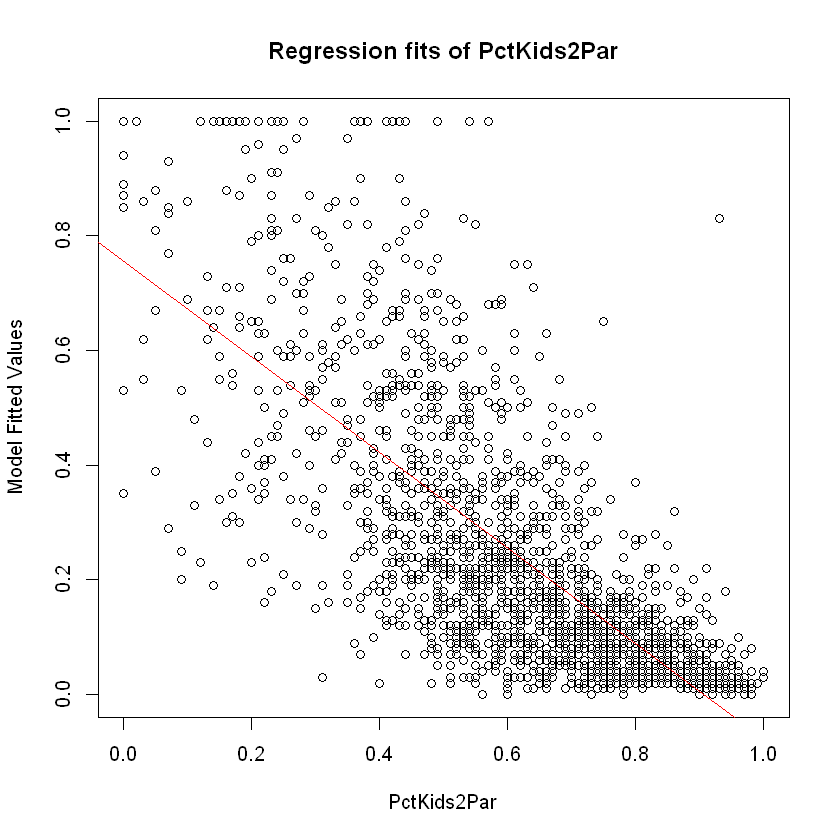

In [26]:
plot(x = d$PctKids2Par,                          # True values on x-axis
     y = d$ViolentCrimesPerPop,               # fitted values on y-axis
     xlab = "PctKids2Par",
     ylab = "Model Fitted Values",
     main = "Regression fits of PctKids2Par")

abline(slr1, col = "red")                             # Values should fall around this line!

All values fall around the line. So its a perfect fit.

**Model Interpretation:**

$R^2$ and adjusted $R^2$ has to be in the range of 0 to 1, with prefferable bigger values. Adjusted $R^2$ also includes freedom degrees, so, we would use that for analyze. In this case it shows that this variable explains the variance of 54% of data.<br/>

Then we look at F Statistic, this value has to be between 1 and some arbitrary number, it is preferred that higher the statistics number the better, which is true in this case. <br/>

P value should be less than 0.05 so that we know that its a significance to the model, which is also true in this case.<br/>

**Conclusion:**  
The first model shows us that it is negatively correlated and significantly factor effecting the violent crimes that are being parent. It shows that children beeing raised with 2 parents are less likely to commit violent crimes at any stage of their lives.

<a id='slr2'></a>

### SLR Model 2: Can percentage of kids born to never married couples affect the number of violent crimes per 100K population?

Let's create a model and check for model assumptions.

In [27]:
slr2 <- lm(ViolentCrimesPerPop ~ PctIlleg, data = d)
printCheck(slr2)

ALL GOOD!


In [28]:
summary(slr2)


Call:
lm(formula = ViolentCrimesPerPop ~ PctIlleg, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59762 -0.08326 -0.03144  0.05912  0.82904 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 0.051601   0.005218    9.89 <0.0000000000000002 ***
PctIlleg    0.746018   0.015352   48.60 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1573 on 1982 degrees of freedom
Multiple R-squared:  0.5437,	Adjusted R-squared:  0.5435 
F-statistic:  2362 on 1 and 1982 DF,  p-value: < 0.00000000000000022


A plot of the values to generalize what how many instances lie near the regression line.

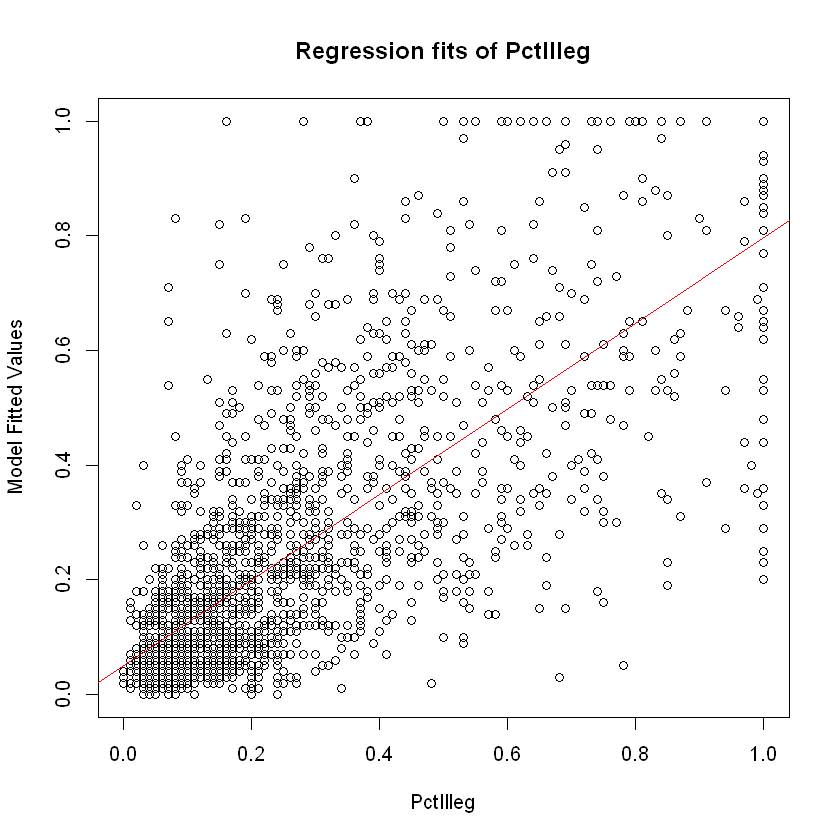

In [29]:
plot(x = d$PctIlleg,                          # True values on x-axis
     y = d$ViolentCrimesPerPop,               # fitted values on y-axis
     xlab = "PctIlleg",
     ylab = "Model Fitted Values",
     main = "Regression fits of PctIlleg")

abline(slr2, col = "red")                             # Values should fall around this line!

**Model Interpretation:**

$R^2$ and adjusted $R^2$ has to be in the range of 0 to 1, with prefferable bigger values. Adjusted $R^2$ also includes freedom degrees, so, we would use that for analyze. In this case it shows that this variable explains the variance of 54% of data.<br/>

Then we look at F Statistic, this value has to be between 1 and some arbitrary number, it is preferred that higher the statistics number the better which is true in this case. <br/>

P value should be less than 0.05 so that we know that its a significance to the model, which is also true in this case.<br/>

**Conclusion:**  
The second model shows us that it is positively correlated to violent crimes which means that kids born to people that have never been married tend to commit higher frequency of violent crimes in the span of their lives. 

<a id='slr3'></a>

### SLR Model 3: Can percentage of families (with kids) that are headed by two parents affect the number of violent crimes per 100K population?

Let's create a model and check for model assumptions.

In [30]:
slr3 <- lm(ViolentCrimesPerPop ~ PctFam2Par, data = d)
printCheck(slr3)

ALL GOOD!


In [31]:
summary(slr3)


Call:
lm(formula = ViolentCrimesPerPop ~ PctFam2Par, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42991 -0.10127 -0.01591  0.06865  0.86815 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  0.73582    0.01177   62.50 <0.0000000000000002 ***
PctFam2Par  -0.81471    0.01830  -44.52 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1647 on 1982 degrees of freedom
Multiple R-squared:    0.5,	Adjusted R-squared:  0.4997 
F-statistic:  1982 on 1 and 1982 DF,  p-value: < 0.00000000000000022


A plot of the values to generalize what how many instances lie near the regression line. We see the data is spread because more than earlier.

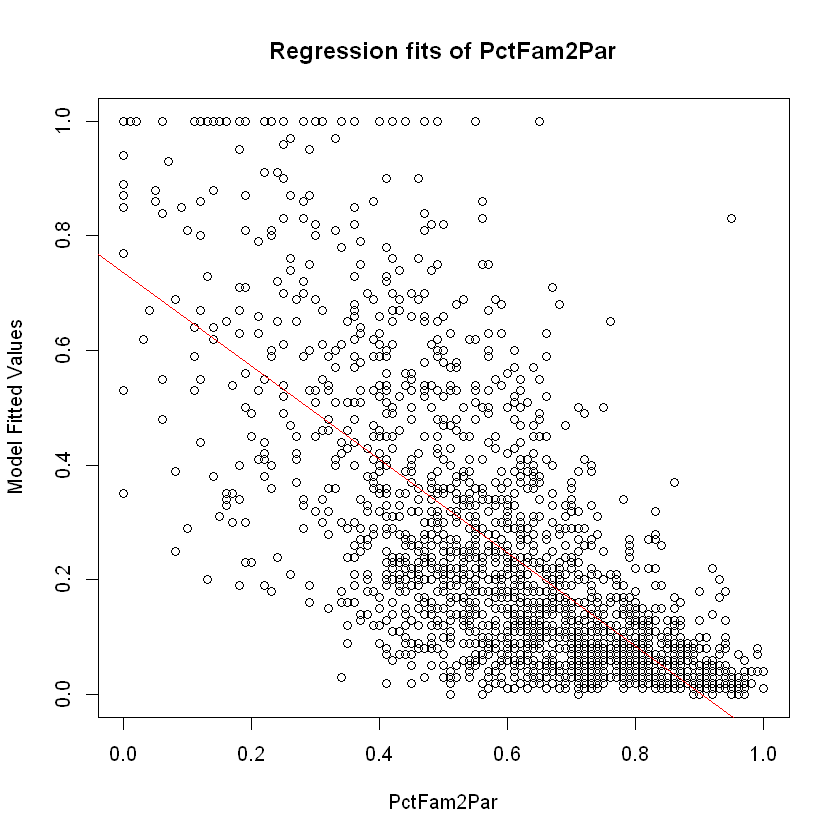

In [32]:
plot(x = d$PctFam2Par,                          # True values on x-axis
     y = d$ViolentCrimesPerPop,               # fitted values on y-axis
     xlab = "PctFam2Par",
     ylab = "Model Fitted Values",
     main = "Regression fits of PctFam2Par")

abline(slr3, col = "red")                             # Values should fall around this line!

**Model Interpretation:**

$R^2$ and adjusted $R^2$ has to be in the range of 0 to 1, with prefferable bigger values. Adjusted $R^2$ also includes freedom degrees, so, we would use that for analyze. In this case it shows that this variable explains the variance of 50% of data.<br/>

Then we look at F Statistic, this value has to be between 1 and some arbitrary number, it is preferred that higher the statistics number the better, which is true in this case. <br/>

P value should be less than 0.05 so that we know that its a significance to the model, which is also true in this case.<br/>

**Conclusion:**  
The third model shows a negative correlation with violent crimes and this model clearly shows that families that are headed by two parents negatively affect the number of violent crimes commited. 

<a id='slr4'></a>

### SLR Model 4: Do percentage of population that is caucasian people affect the number of violent crimes per 100K popuation in any way?

Let's create a model and check for model assumptions.

In [33]:
slr4 <- lm(ViolentCrimesPerPop ~ racePctWhite, data = d)
printCheck(slr4)

ALL GOOD!


In [34]:
summary(slr4)


Call:
lm(formula = ViolentCrimesPerPop ~ racePctWhite, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57996 -0.08657 -0.03631  0.05796  0.82480 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   0.72996    0.01236   59.08 <0.0000000000000002 ***
racePctWhite -0.65265    0.01560  -41.84 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1697 on 1982 degrees of freedom
Multiple R-squared:  0.469,	Adjusted R-squared:  0.4687 
F-statistic:  1750 on 1 and 1982 DF,  p-value: < 0.00000000000000022


A plot of the values to generalize what how many instances lie near the regression line. We see the data is spread because more than earlier.

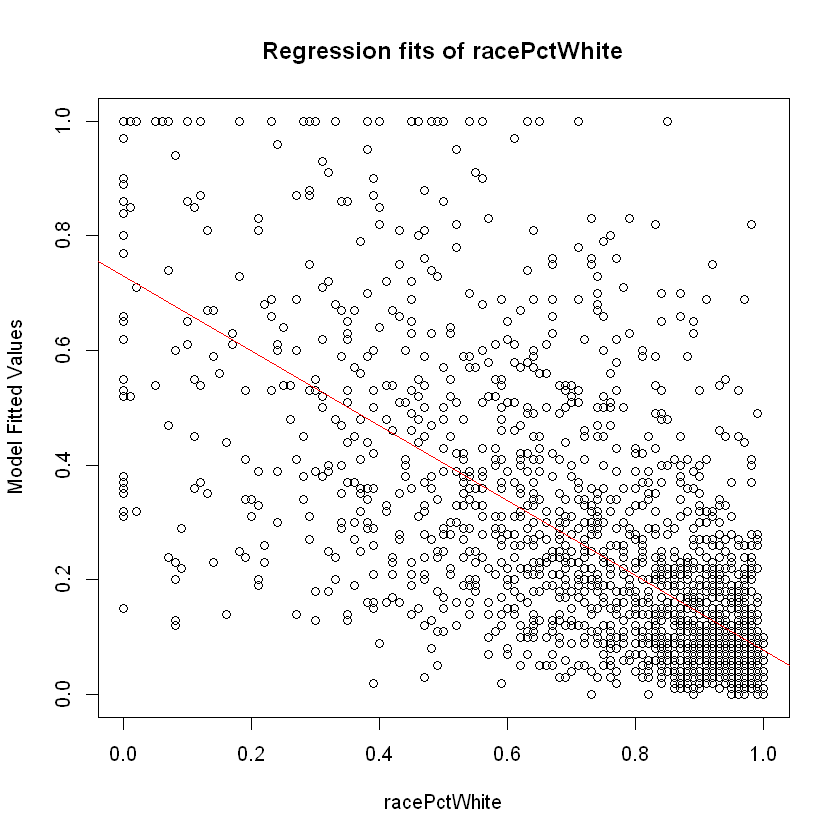

In [35]:
plot(x = d$racePctWhite,                          # True values on x-axis
     y = d$ViolentCrimesPerPop,               # fitted values on y-axis
     xlab = "racePctWhite",
     ylab = "Model Fitted Values",
     main = "Regression fits of racePctWhite")

abline(slr4, col = "red")                             # Values should fall around this line!

**Model Interpretation:**

$R^2$ and adjusted $R^2$ has to be in the range of 0 to 1, with prefferable bigger values. Adjusted $R^2$ also includes freedom degrees, so, we would use that for analyze. In this case it shows that this variable explains the variance of 47% of data.<br/>

Then we look at F Statistic, this value has to be between 1 and some arbitrary number, it is preferred that higher the statistics number the better, which is true in this case. <br/>

P value should be less than 0.05 so that we know that its a significance to the model, which is also true in this case.<br/>

**Conclusion:**  
The fourth model shows a negative correlation which means that an increase in population of caucasion people leads to the decrease in violent crimes.

<a id='slr5'></a>

### SLR Model 5: Can percent of kids 4 and under in two parent households affect the number of violent crimes per 100K popuation in any way?

Let's create a model and check for model assumptions.

In [36]:
slr5 <- lm(ViolentCrimesPerPop ~ PctYoungKids2Par, data = d)
printCheck(slr5)

ALL GOOD!


In [37]:
summary(slr5)


Call:
lm(formula = ViolentCrimesPerPop ~ PctYoungKids2Par, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52311 -0.09334 -0.02111  0.06499  0.81602 

Coefficients:
                 Estimate Std. Error t value            Pr(>|t|)    
(Intercept)       0.70918    0.01245   56.97 <0.0000000000000002 ***
PctYoungKids2Par -0.70938    0.01781  -39.84 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1736 on 1982 degrees of freedom
Multiple R-squared:  0.4447,	Adjusted R-squared:  0.4444 
F-statistic:  1587 on 1 and 1982 DF,  p-value: < 0.00000000000000022


A plot of the values to generalize what how many instances lie near the regression line. We see the data is spread most then the earlier 4 graphs because this column has the weakest correlation with the goal column.

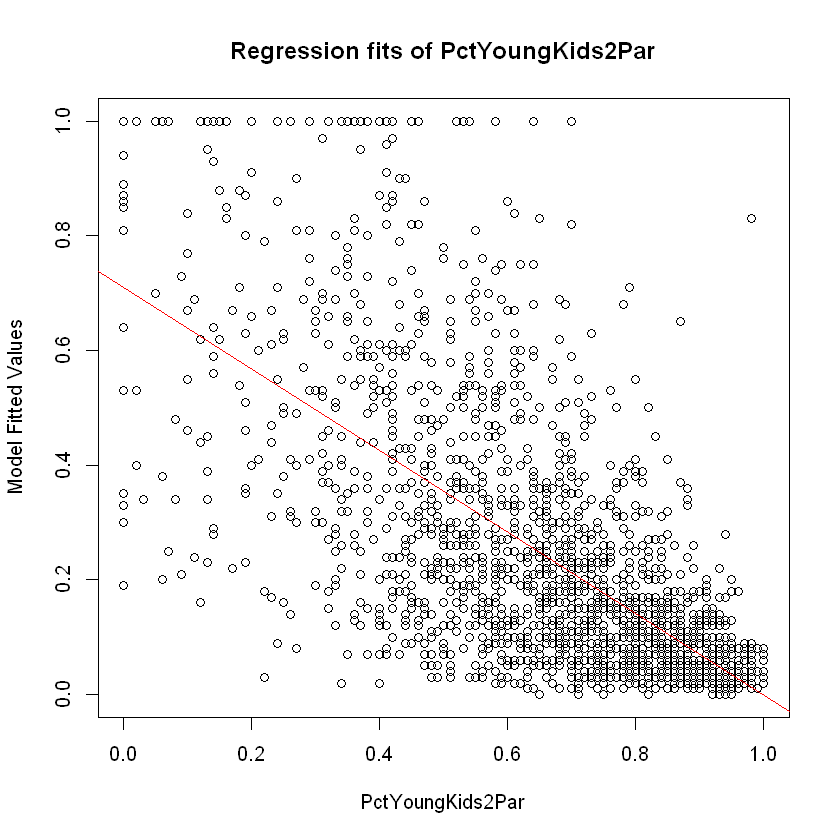

In [38]:
plot(x = d$PctYoungKids2Par,                          # True values on x-axis
     y = d$ViolentCrimesPerPop,               # fitted values on y-axis
     xlab = "PctYoungKids2Par",
     ylab = "Model Fitted Values",
     main = "Regression fits of PctYoungKids2Par")

abline(slr5, col = "red")                             # Values should fall around this line!

**Model Interpretation:**

$R^2$ and adjusted $R^2$ has to be in the range of 0 to 1, with prefferable bigger values. Adjusted $R^2$ also includes freedom degrees, so, we would use that for analyze. In this case it shows that this variable explains the variance of 44% of data.<br/>

Then we look at F Statistic, this value has to be between 1 and some arbitrary number, it is preferred that higher the statistics number the better, which is true in this case. <br/>

P value should be less than 0.05 so that we know that its a significance to the model, which is also true in this case.<br/>

**Conclusion:**  
In the last model we see again see a negative correlation between our predictor and goal column. It shows that if kids of 4 and under have two parents in their household to educate them and take care of them then it reduces the number violent crimes commited.

<a id='mlr'></a>
## Multiple Linear Regression

<a id='best_mlr'></a>
### Best Model Per Akaike Criterion

Let's use stepwise bothdirectional method to find best multiple linear model.

In [39]:
res.lm <- lm(ViolentCrimesPerPop ~., data = d)
step <- stepAIC(res.lm, direction = "both", trace = FALSE)

We can see found model below:

In [40]:
summary(step)


Call:
lm(formula = ViolentCrimesPerPop ~ racepctblack + racePctHisp + 
    agePct12t29 + numbUrban + pctUrban + pctWWage + pctWFarmSelf + 
    pctWInvInc + pctWRetire + medFamInc + whitePerCap + indianPerCap + 
    OtherPerCap + HispPerCap + PctPopUnderPov + PctLess9thGrade + 
    PctEmploy + PctEmplManu + PctOccupManu + PctOccupMgmtProf + 
    MalePctDivorce + MalePctNevMarr + FemalePctDiv + PctKids2Par + 
    PctWorkMom + PctIlleg + NumImmig + PctNotSpeakEnglWell + 
    PctLargHouseOccup + PersPerOccupHous + PersPerRentOccHous + 
    PctPersOwnOccup + PctPersDenseHous + HousVacant + PctHousOccup + 
    PctHousOwnOcc + PctVacantBoarded + PctVacMore6Mos + OwnOccLowQuart + 
    RentLowQ + MedRent + MedOwnCostPctIncNoMtg + NumInShelters + 
    NumStreet + PctForeignBorn + PctSameCity85 + PctUsePubTrans + 
    LemasPctOfficDrugUn + percentiles.PctPopUnderPov + medIncome, 
    data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46329 -0.07088 -0.01294  0.05080  0.72490 

However, let's check for assumptions:

In [41]:
printCheck(step)

NON-COLINEARITY MAY BE VIOLATED!
7.047825 8.450304 12.49555 15.71413 2.082618 14.58704 1.782634 13.45262 3.322265 87.68026 20.74719 1.140025 1.406798 2.231984 22.56326 6.550957 12.29182 4.150608 12.01559 11.36717 12.09563 10.78497 12.93558 27.51515 2.726622 10.58026 4.571682 19.51601 15.25464 38.76635 21.81395 203.9634 20.7648 11.54448 3.380691 175.4616 2.252973 2.305343 11.17981 16.76799 25.40194 1.939984 4.43068 2.450172 11.86844 3.25926 2.511755 1.505805 30.73336 125.7212 
Average: 21.9017 
NON-COLINEARITY VIOLATED!
TOLERANCE IS VIOLATED!
VIOLATED...


Looks like assumptions are violated!
  
This violation can also be seen on following charts:  

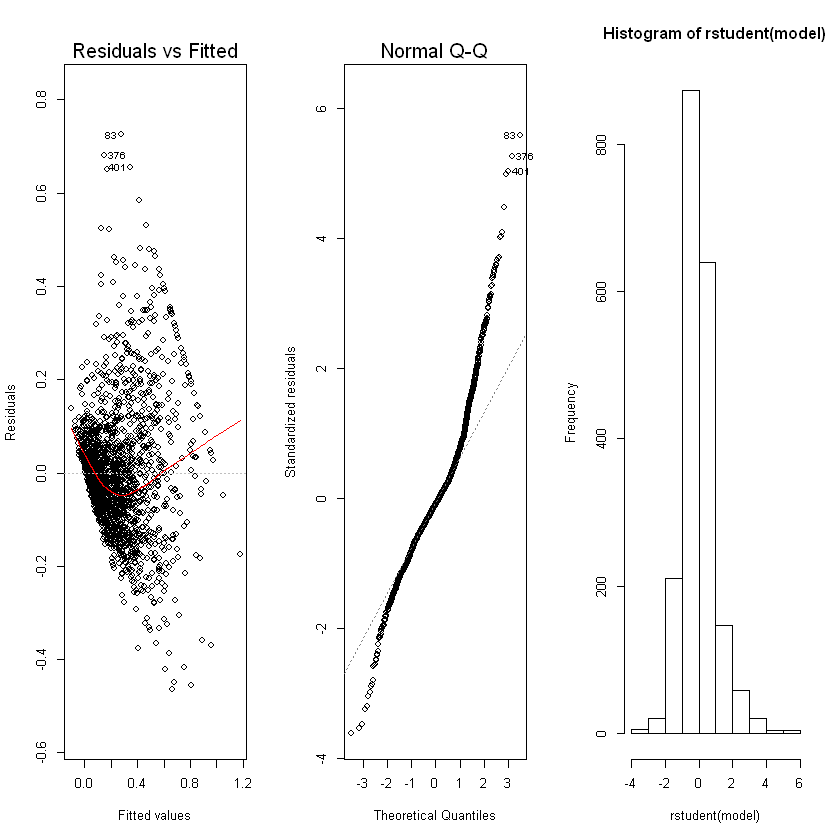

In [42]:
plotsForAssumptions(step)

First chart should be more dispersed, more random, while second should be more linear.

Since our assumptions are violated, we will do bootstrapping to create a more robust model.

_next cell contains function for bootstrapping (taking random sample from dataset again and again) and applying it for cases when assumptions are violated to get robust model_

In [43]:
bootReg <- function(formula, data, i){
    d <- data[i,]
    fit <- lm(formula, data = d)
    return(coef(fit))
}
robustModel <- boot(statistic = bootReg, 
                    formula = ViolentCrimesPerPop ~ racepctblack + racePctHisp + 
                        agePct12t29 + numbUrban + pctUrban + pctWWage + pctWFarmSelf + 
                        pctWInvInc + pctWRetire + medFamInc + whitePerCap + indianPerCap + 
                        OtherPerCap + HispPerCap + PctPopUnderPov + PctLess9thGrade + 
                        PctEmploy + PctEmplManu + PctOccupManu + PctOccupMgmtProf + 
                        MalePctDivorce + MalePctNevMarr + TotalPctDiv + PctKids2Par + 
                        PctWorkMom + PctIlleg + NumImmig + PctNotSpeakEnglWell + 
                        PctLargHouseOccup + PersPerOccupHous + PersPerRentOccHous + 
                        PctPersOwnOccup + PctPersDenseHous + HousVacant + PctHousOccup + 
                        PctHousOwnOcc + PctVacantBoarded + PctVacMore6Mos + OwnOccLowQuart + 
                        RentLowQ + MedRent + MedOwnCostPctIncNoMtg + NumInShelters + 
                        NumStreet + PctForeignBorn + PctUsePubTrans + percentiles.NumUnderPov + 
                        percentiles.PctPopUnderPov + PctSameCity85 + medIncome, 
                    data = d, R = 2000)

Let's find 95% confidence intervals for cofficients of robust model.

In [44]:
predictors <- c('racepctblack', 'racePctHisp', '
    agePct12t29', 'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', '
    pctWInvInc', 'pctWRetire', 'medFamInc', 'whitePerCap', 'indianPerCap', '
    OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', '
    PctEmploy', 'PctEmplManu', 'PctOccupManu', 'PctOccupMgmtProf', '
    MalePctDivorce', 'MalePctNevMarr', 'TotalPctDiv', 'PctKids2Par', '
    PctWorkMom', 'PctIlleg', 'NumImmig', 'PctNotSpeakEnglWell', '
    PctLargHouseOccup', 'PersPerOccupHous', 'PersPerRentOccHous', '
    PctPersOwnOccup', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup', '
    PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart', '
    RentLowQ', 'MedRent', 'MedOwnCostPctIncNoMtg', 'NumInShelters', '
    NumStreet', 'PctForeignBorn', 'PctUsePubTrans', 'percentiles.NumUnderPov', '
    percentiles.PctPopUnderPov', 'PctSameCity85', 'medIncome')

coefs <- c()

for(i in 1:length(predictors)){
    cat(predictors[i],'\n')
    cat(boot.ci(robustModel, type = "bca", index = i)[['bca']][4], 
        boot.ci(robustModel, type = "bca", index = i)[['bca']][5], '\n')
    cat('-------------------------\n\n')
    coefs <- c(coefs, mean(boot.ci(robustModel, type = "bca", index = i)[['bca']][4:5]))
}

racepctblack 
0.3997974 0.8268716 
-------------------------

racePctHisp 
0.1460145 0.2929858 
-------------------------


    agePct12t29 
-0.01541109 0.145562 
-------------------------

numbUrban 
-0.4262619 -0.1321765 
-------------------------

pctUrban 
-0.3400702 0.08352081 
-------------------------

pctWWage 
0.01993627 0.060119 
-------------------------

pctWFarmSelf 
-0.3528773 -0.1299486 
-------------------------


    pctWInvInc 
0.008760618 0.07415658 
-------------------------

pctWRetire 
-0.2721601 -0.04545537 
-------------------------

medFamInc 
-0.1472093 -0.03623148 
-------------------------

whitePerCap 
0.1064677 0.6222035 
-------------------------

indianPerCap 
-0.3566982 -0.07814859 
-------------------------


    OtherPerCap 
-0.0667268 -0.005535957 
-------------------------

HispPerCap 
0.0001123426 0.0007923618 
-------------------------

PctPopUnderPov 
-0.008789209 0.08588626 
-------------------------

PctLess9thGrade 
-0.4290189 -0.1553236 
----

Created robust model can be seen here:

In [45]:
cat('ViolentCrimesPerPop =', coefs[1])
for(i in 2:length(predictors)){
    cat(' +', coefs[i],'*', predictors[i])
}

ViolentCrimesPerPop = 0.6133345 + 0.2195001 * racePctHisp + 0.06507547 * 
    agePct12t29 + -0.2792192 * numbUrban + -0.1282747 * pctUrban + 0.04002764 * pctWWage + -0.241413 * pctWFarmSelf + 0.0414586 * 
    pctWInvInc + -0.1588077 * pctWRetire + -0.09172041 * medFamInc + 0.3643356 * whitePerCap + -0.2174234 * indianPerCap + -0.03613138 * 
    OtherPerCap + 0.0004523522 * HispPerCap + 0.03854852 * PctPopUnderPov + -0.2921713 * PctLess9thGrade + -0.05979452 * 
    PctEmploy + 0.1823342 * PctEmplManu + -0.06437459 * PctOccupManu + 0.09292444 * PctOccupMgmtProf + 0.1320807 * 
    MalePctDivorce + 0.3173939 * MalePctNevMarr + 0.1929662 * TotalPctDiv + -0.2972374 * PctKids2Par + -0.3650728 * 
    PctWorkMom + -0.1248435 * PctIlleg + 0.1172374 * NumImmig + -0.1230167 * PctNotSpeakEnglWell + -0.1488971 * 
    PctLargHouseOccup + -0.1594053 * PersPerOccupHous + 0.4226812 * PersPerRentOccHous + -0.2936809 * 
    PctPersOwnOccup + -0.8620327 * PctPersDenseHous + 0.2311005 * HousVacant + 0.17949

<a id='drop_non_sig'></a>
### Dropping Nonsignificant Coefficients

However, as we have seen, this model has some non-significant coefficients. Let's try to exclude them from the model:

In [46]:
step2 <- update(step, .~. -(medIncome + PctSameCity85 + 
                            percentiles.NumUnderPov + NumInShelters + 
                            PctHousOccup + NumImmig + PctOccupManu + PctLess9thGrade + 
                            HispPerCap + indianPerCap + numbUrban + racePctHisp))

In [47]:
summary(step2)


Call:
lm(formula = ViolentCrimesPerPop ~ racepctblack + agePct12t29 + 
    pctUrban + pctWWage + pctWFarmSelf + pctWInvInc + pctWRetire + 
    medFamInc + whitePerCap + OtherPerCap + PctPopUnderPov + 
    PctEmploy + PctEmplManu + PctOccupMgmtProf + MalePctDivorce + 
    MalePctNevMarr + FemalePctDiv + PctKids2Par + PctWorkMom + 
    PctIlleg + PctNotSpeakEnglWell + PctLargHouseOccup + PersPerOccupHous + 
    PersPerRentOccHous + PctPersOwnOccup + PctPersDenseHous + 
    HousVacant + PctHousOwnOcc + PctVacantBoarded + PctVacMore6Mos + 
    OwnOccLowQuart + RentLowQ + MedRent + MedOwnCostPctIncNoMtg + 
    NumStreet + PctForeignBorn + PctUsePubTrans + LemasPctOfficDrugUn + 
    percentiles.PctPopUnderPov, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48999 -0.07138 -0.01358  0.04905  0.71630 

Coefficients:
                             Estimate Std. Error t value        Pr(>|t|)    
(Intercept)                 0.6602455  0.0989922   6.670 0.0000000000333 ***
ra

Looks like we got more non-significant coefficients. We'll again try to extract them.

In [48]:
step3 <- update(step2, .~. -(PctOccupMgmtProf + medFamInc + pctWFarmSelf + PctLargHouseOccup))

In [49]:
summary(step3)


Call:
lm(formula = ViolentCrimesPerPop ~ racepctblack + agePct12t29 + 
    pctUrban + pctWWage + pctWInvInc + pctWRetire + whitePerCap + 
    OtherPerCap + PctPopUnderPov + PctEmploy + PctEmplManu + 
    MalePctDivorce + MalePctNevMarr + FemalePctDiv + PctKids2Par + 
    PctWorkMom + PctIlleg + PctNotSpeakEnglWell + PersPerOccupHous + 
    PersPerRentOccHous + PctPersOwnOccup + PctPersDenseHous + 
    HousVacant + PctHousOwnOcc + PctVacantBoarded + PctVacMore6Mos + 
    OwnOccLowQuart + RentLowQ + MedRent + MedOwnCostPctIncNoMtg + 
    NumStreet + PctForeignBorn + PctUsePubTrans + LemasPctOfficDrugUn + 
    percentiles.PctPopUnderPov, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49648 -0.07278 -0.01354  0.04721  0.73323 

Coefficients:
                             Estimate Std. Error t value        Pr(>|t|)    
(Intercept)                 0.6535190  0.0969030   6.744 0.0000000000202 ***
racepctblack                0.1901346  0.0295916   6.425 0.0000000001650 

Again, we will exclude them.

In [50]:
step4 <- update(step3, .~. -pctWRetire)

In [51]:
summary(step4)


Call:
lm(formula = ViolentCrimesPerPop ~ racepctblack + agePct12t29 + 
    pctUrban + pctWWage + pctWInvInc + whitePerCap + OtherPerCap + 
    PctPopUnderPov + PctEmploy + PctEmplManu + MalePctDivorce + 
    MalePctNevMarr + FemalePctDiv + PctKids2Par + PctWorkMom + 
    PctIlleg + PctNotSpeakEnglWell + PersPerOccupHous + PersPerRentOccHous + 
    PctPersOwnOccup + PctPersDenseHous + HousVacant + PctHousOwnOcc + 
    PctVacantBoarded + PctVacMore6Mos + OwnOccLowQuart + RentLowQ + 
    MedRent + MedOwnCostPctIncNoMtg + NumStreet + PctForeignBorn + 
    PctUsePubTrans + LemasPctOfficDrugUn + percentiles.PctPopUnderPov, 
    data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49916 -0.07116 -0.01360  0.04711  0.75142 

Coefficients:
                             Estimate Std. Error t value      Pr(>|t|)    
(Intercept)                 0.4994668  0.0884886   5.644 0.00000001900 ***
racepctblack                0.1738866  0.0293893   5.917 0.00000000387 ***
agePct12t29    

And again...

In [52]:
step5 <- update(step4, .~. -whitePerCap)

In [53]:
summary(step5)


Call:
lm(formula = ViolentCrimesPerPop ~ racepctblack + agePct12t29 + 
    pctUrban + pctWWage + pctWInvInc + OtherPerCap + PctPopUnderPov + 
    PctEmploy + PctEmplManu + MalePctDivorce + MalePctNevMarr + 
    FemalePctDiv + PctKids2Par + PctWorkMom + PctIlleg + PctNotSpeakEnglWell + 
    PersPerOccupHous + PersPerRentOccHous + PctPersOwnOccup + 
    PctPersDenseHous + HousVacant + PctHousOwnOcc + PctVacantBoarded + 
    PctVacMore6Mos + OwnOccLowQuart + RentLowQ + MedRent + MedOwnCostPctIncNoMtg + 
    NumStreet + PctForeignBorn + PctUsePubTrans + LemasPctOfficDrugUn + 
    percentiles.PctPopUnderPov, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49792 -0.07134 -0.01358  0.04710  0.75160 

Coefficients:
                             Estimate Std. Error t value        Pr(>|t|)    
(Intercept)                 0.4992803  0.0884562   5.644 0.0000000190068 ***
racepctblack                0.1755193  0.0269417   6.515 0.0000000000924 ***
agePct12t29                -

Finally, we got a model with all significant coefficients!

Let's check for its assumptions:

In [54]:
printCheck(step5)

NON-COLINEARITY MAY BE VIOLATED!
5.270023 10.97744 1.679539 11.1772 8.528462 1.279896 17.58535 10.35585 1.400104 10.49939 9.839275 11.21445 23.7344 2.254181 10.19866 13.02599 18.1847 19.97611 172.5977 13.79981 2.162346 149.6243 2.193532 2.020634 7.678263 16.14187 22.63625 1.832616 1.693014 10.52908 2.257268 1.474184 28.1892 
Average: 18.84882 
NON-COLINEARITY VIOLATED!
TOLERANCE IS VIOLATED!
VIOLATED...


Again, they are violated. If we will want to use this model, we'll need to bootstrap it.

<a id='predict'></a>
### Testing Models on Extracted Rows

In [55]:
error <- c()
for(i in 1:nrow(rowsToPredict)){
    error <- c(error, abs(predict.lm(step, rowsToPredict[i,], interval = "predict")[1] - 
                        rowsToPredict[i,]$ViolentCrimesPerPop) /
                      rowsToPredict[i,]$ViolentCrimesPerPop)
    cat('Predicted value is\t', predict.lm(step, rowsToPredict[i,], interval = "predict")[1], '\n')
    cat('Real value is\t\t', rowsToPredict[i,]$ViolentCrimesPerPop, '\n')
    cat('Error is\t\t', error[length(error)] * 100 , '%.\n\n')
}


Predicted value is	 0.2046579 
Real value is		 0.09 
Error is		 127.3976 %.

Predicted value is	 0.1295703 
Real value is		 0.18 
Error is		 28.01648 %.

Predicted value is	 0.5801227 
Real value is		 0.93 
Error is		 37.62122 %.

Predicted value is	 0.4218267 
Real value is		 0.25 
Error is		 68.73067 %.

Predicted value is	 0.03748375 
Real value is		 0.05 
Error is		 25.03249 %.

Predicted value is	 -0.05276577 
Real value is		 0.02 
Error is		 363.8288 %.

Predicted value is	 0.1100686 
Real value is		 0.09 
Error is		 22.29844 %.

Predicted value is	 0.1141852 
Real value is		 0.08 
Error is		 42.73148 %.

Predicted value is	 0.2517325 
Real value is		 0.12 
Error is		 109.7771 %.

Predicted value is	 0.19298 
Real value is		 0.11 
Error is		 75.43638 %.



In [56]:
cat('Average error is', mean(error) * 100, '%!')

Average error is 90.08707 %!

Let's compare those two models by Akaike criterion.

In [57]:
AIC(step)
AIC(step5)

[1] -2384.64

[1] -2351.785

However, since Akaike Informational Criteria is lower for first model, we'll still use first model.

We can see that those models have significant difference, so, we should not drop those predictors.

In [58]:
anova(step, step5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1933,33.13660,NA,NA,NA,NA
1950,34.27223,-17,-1.13563,3.896835,0.0000001321263


<a id='compare'></a>
## Model Comparison

Let's compare models based on Akaike Informational Criteria and adjusted $R^2$.

In [59]:
cat('For SLR1:\n')
cat('AIC =\t\t', AIC(slr1), '\n')
cat('Adjusted R2 =\t', summary(slr1)$adj.r.squared, '\n\n')

cat('For SLR2:\n')
cat('AIC =\t\t', AIC(slr2), '\n')
cat('Adjusted R2 =\t', summary(slr2)$adj.r.squared, '\n\n')

cat('For SLR3:\n')
cat('AIC =\t\t', AIC(slr3), '\n')
cat('Adjusted R2 =\t', summary(slr3)$adj.r.squared, '\n\n')

cat('For SLR4:\n')
cat('AIC =\t\t', AIC(slr4), '\n')
cat('Adjusted R2 =\t', summary(slr4)$adj.r.squared, '\n\n')

cat('For SLR5:\n')
cat('AIC =\t\t', AIC(slr5), '\n')
cat('Adjusted R2 =\t', summary(slr5)$adj.r.squared, '\n\n')

cat('For MLR:\n')
cat('AIC =\t\t', AIC(step), '\n')
cat('Adjusted R2 =\t', summary(step)$adj.r.squared, '\n\n')


For SLR1:
AIC =		 -1711.883 
Adjusted R2 =	 0.5452663 

For SLR2:
AIC =		 -1704.011 
Adjusted R2 =	 0.5434586 

For SLR3:
AIC =		 -1522.564 
Adjusted R2 =	 0.4997367 

For SLR4:
AIC =		 -1403.082 
Adjusted R2 =	 0.4686837 

For SLR5:
AIC =		 -1314.342 
Adjusted R2 =	 0.4443797 

For MLR:
AIC =		 -2384.64 
Adjusted R2 =	 0.6838367 



As we can see, best model is our MLR, which was found with usage of stepwise two-directional method, however, SLR1 (based on percentage of kids in family housing with two parents) and SLR2 (based on percentage of kids born to never married) are also quite good.

<a id='report'></a>
# Report

## <div style="text-align:center"> Predicting violent crimes from community and law enforcement data </div>


<div style="text-align:right"> To: US police departments </div>
<div style="text-align:right"> From: Ihor Markevych & Asad Mahmood </div>
<div style="text-align:right"> Date: 20 September 2019 </div>


### <div style="text-align:center"> Introduction </div>

#### <div style="text-align:center"> Goals of the Research </div>

This report is meant to provide enough information for analyse of the situation and effective resource management.
Dataset, that was used for this research, combines data of 3 different aspects - socio-economic, law enforcement and crime. This dataset can be found [here](http://archive.ics.uci.edu/ml/datasets/communities+and+crime).  

One of the goals of the research is to check whether socio-economic data may be major reason of crimes are commitment, such as percentage of kids born to never married or number of illegal immigrants or homeless people. Next, we would analyse data and find indicators to specify, which exactly socio-economical issues are causing crimes.

Investigating law enforcement can potentially show impact of law enforcement departments resourses usage on rise or drop of crime in different communites. This information will lead to more effective and accurate resourse managment.  

Since used data is generally available and not confidential, created models will allow efficient implementation of goals after completing this research. Our work to predict future crime rate will be useful in deciding budget when opening new stations or hiring new police officers, etc. Our goal is to predict total number of violent crimes comitted per 100k population.

### <div style="text-align:center"> Analysis of Findings </div>

#### <div style="text-align:center"> Impact of Separate Factors </div>

First step was to check impact of isolated factors.  To do this, we found how connected are all the factors with the crime level, then we ordered them in descending format by strength of this connection. For future investigation we took five most connected factors. The names of these factors and their impact were:

| Factor | Impact |
|:---|:---:|
| percentage of kids in family housing with two parents | negative
| percentage of kids born to never married | positive
| percentage of families (with kids) that are headed by two parents | negative
| percentage of population that is caucasian | negative
| percent of kids 4 and under in two parent households | negative

Negative impact means that grow of a factor decreases crime level and vice versa for positive impact.  


-----------------
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAAAM1BMVEUAAABNTU1oaGh8fHyM%0AjIyampqnp6eysrK9vb3Hx8fQ0NDZ2dnh4eHp6enw8PD/AAD///89ODILAAAACXBIWXMAABJ0%0AAAASdAHeZh94AAAgAElEQVR4nO2d6WKrIBCFydK0N22j7/+0txoXBmbYVdTz/UirwAwajzDj%0AEtUCALJRW3cAgCMAIQFQAAgJgAJASAAUAEICoAAQEgAFgJAAKACEBEABICQACgAhAVAACAmA%0AAkBIABQAQgKgABASAAWAkAAoAIQEQAEgJAAKACEBUAAICYACQEgAFABCAqAAEBIABYCQACgA%0AhARAASAkAAoAIQFQAAgJgAJASAAUAEICoAAQEgAFgJAAKACEBEABICQACgAhAVAACAmAAkBI%0AABQAQgKgABASAAWAkAAoAIQEQAEgJAAKACER1Mj9axHj4ZU/L0p9aG0+YlvOTnsu9ydX+cPo%0A2e2v5q/VVbbnv48/R4NVj5cTACER1MxtCePBdT+7LsxC+r4ENx1bzk5HHlbd0ezUs0FHIUJ6%0A6ladXk4BhETQDghVfEyKEdJVqR+tTUTTseXsdOJb6tH4d9RRgJBeZD85vZwCCIkwHjGvh1LX%0AGjrCLya0fJIJn1E4/H2MOvLY7Pgb+G4/7evjvZ+cXk4BhESYj5hZUhd1eQyH1+/fcXP70oaJ%0A32s/ldErvT5vXYz1z16YjD8/utnXc3b0/Kv1oY8j9BAfTvWmvQnLHrdFP8N/r8ffmHV7trrZ%0A96emo7HV78dFXacN1r3fhqFHN6B5+Xf/++f6GIe3YT8dGAiJYAnp96LNV77f/99mIV37WEqv%0ANP7fx1hkQZ9A9dxHR4/38o/eDf0QnxapvRHd3txS2KLRxMPyoo9HQyu6wcT7/a4PZqaXsUv9%0ALpn205GBkAjzmXg4zsdj56IvzEL64x+t9NGved362IEsjMbvk5H7bKXDyhC0ppCovQFiTxbS%0Az7t/0zY8DS+dmj+NVnSDOe/fk351L19/unn10pzFbYyiRwNCIiiN7mT6PiJe70Po399B8jcl%0A+neZhdQdLrTS38rutP7qYweyMBxtXbbr66/6Z38w92s7qx/k8Dejl/mPZu8NY69lDA3Ry19f%0ALz+9GK7Uy2M6Xcythg1+Xia5Wd6v1Ong5fquOQ9X/X46NBASQdNRH3L8ne1f7/X3fqFf+W8+%0ArO1K3UE3hit0oZ3O6+8T+uM9Bg1WXiFCovbeMPaELermjsM2vK6fepa7L73c5tz1u2Dc4Od7%0AkfF+m2etuhe6FeN+OjQQEmE6Gj5fdLk7WV/GQ3Q+ul9Wpc/3f+8DjizMh9Xb9u+0rBttiQtD%0ASNTeVJO1Z24RN17pQrr8vmYVGKbe/9jeu3T5i/HS9ebfow+U9B4eGQiJ0H/zv9PlFP0AsY4r%0Aej4fK7WPUVS/5oJ5oMcLidprjXZOId0er9Yq1bfg2SvlzppSU3pc997tp+sv56X9d9X2iNGj%0AY3KCTYxh+M7HGcs8CJEF4+i+0APl9e+ds7qZC8b5+fcdk0QJiRofa7D2DEPsoublOWyJMXjS%0AenTTLnM3DC/d5Pf68fUDIZ0VTRt9lumuT++ZGKm1Kr156rmDcUGNgQcb04QJyTIu2jMMDdyk%0AGKkdtuyqrTA3mHrXQirTy5CC4MfIY3KCTYxh/M6/hwxWl7f67v/c5qydMo5uUuk6BU4XY0HO%0A2hHXtCOaq5dp701g1m7Aztq99ErXQZXvFV80TUm9fxjDIuMUI9Jpmb7z8Tw/XUn5brnrSO/K%0AeqW/4/r224cbD2NBmzcOfOhWnELqPFj2BgR75ha1Rl+/ZrNzpZ8he6C5nTeYeP8hRfa49yBp%0A8/BvYK+cYBNjmL7zLgXWHVHkHudhQbuz4V2ZVBoj8pu1MNYfj3z6CINTSB+DDWJvhLdnbtHA%0A93xnw2x2rvRBlDXc2XBXNNlwG5qKQhraqUt/boGQzsf8nQ9X5d+3po1P2fx89LepmUKilfog%0A4vZlL8zC+7jY98Y5hdSNkB+W8RHWnrVFU1/nx4hGs9qWqD4FPq6gNxfq3ulgZXrpdtTl4+d3%0AvNuiPTwn2MTivPQQBYAOCCkc9U7l/dymyy0ADEBI4cxR/QlueQFxQEjhTI8RHP3ZGhAPhBTB%0A67PLX13M20YBgJAAKAGEBEABICQACgAhAVAACAmAAkBIABQAQgKgABASAAWAkAAoAIQEQAEg%0AJAAKACEBUAAICYACQEgAFABCAqAAEBIABYCQACgAhARAASAkAAoAIQFQAAgJgAJASAAUAEIC%0AoAAQEgAFgJAAKACEBEABICQACgAhAVAACAmAAkBIABQAQgKgABASAAWAkAAoAIQEQAFWEJIC%0AYGckHOXlhbOBCwBKAiEBUAAICYACQEgAFABCAqAAEBIABYCQACgAhARAASAkAAqwqpC+P+/9%0AReD743spFwBswopCel21Gypui7gAYCNWFNJDXf799P/9Pi/qsYQLADZiRSFd1M/0/4+6LOEC%0AgI1YUUjkBln33bIQEtgZGJEAKMC6MdLzt/8PMRI4Gmumv29a1u76WsQFANuw7nWkR38d6XL/%0AxHUkcCz2dWcDeaI36fFet7Fhlbzgacl1KaGbjH9fuc9LQnnu/j0XexLScMQwCykuGGPDp7jg%0AbWl3KaGbnH9fucdLQnnu/j0buxKSXqYcFcNdMMaUvOBryXQpoZuif1+5Qyjx5bn792xsJaSE%0A60hK/6tcNUP828bUsKCkBcaz3lIxB19CN5nOkPZyZ+UZsacXTHnu/j0d9QjJ+24jCEkqh5C2%0AZ0dTOwhJKoeQtmdHQqJHS+4cXjSGGCmoCaDsSkiqbedztL6Q4oIxNnyKC96WdpeQtTsJexLS%0AeMRwCylOcB3JWY7rSDHsS0gAVAqEBEABVhRSxNv7ISSwM1YU0heEBA7LmlO7n4v7lScFXACw%0ADavGSD/ux/lKuABgE9ZNNnxpT5sv5AKALUDWDoACQEiLkXwlFuwQCGkh0u8NWqY/YFkgpIXI%0AvFsV7AwIaRmU8XeZJqAaIKRlgJBOBoS0DBDSyYCQEghJriFGOhcQUjRhyTVk7c4FhBRN6MCB%0A60hnAkKKBaEMYICQYoGQAAOEFMY86XIJCVOz0wIhhUBfHKR9yrXAuYCQQiDaEfWC9PWJgZAC%0AsGZ17LCD4OnMQEgBhEkEQjozEFIAEBLwsS8hbZUVC4t+ECOdmD0Jabus2GJ3BYGjsCshreWe%0A8x0kEFxHOi07EhJiEFAvEBIABYCQACjAjoQUGyPtN2DZb8/Py66EFJMV228Kbb89PzN7ElLU%0AqXq/F3X22/Mzsy8hxVvY3/G4356fGgipNvbb81MDIdXGfnt+ao4qpB1HGvvt+Zk5rpB2m/va%0Ab8/PzGGFtOerMfvt+Xk5sJAAWA8ICYACQEi5qCGm2VOfQXEgpDw0FUFKZwZCykNZn+CUQEhZ%0AjAqCks4OhJQFhATeQEhZQEjgDYQUg52bWzBGCkwEIl9YBRBSOFxubrGsXaBJ5AsrAUIKhx93%0AFrqOFDjIYU5ZCRBSMKs+3xDoDM9c1AKEFAyEBGQgpGAgJCCzLyFtm6FaNR5BjLQv9iSkrTNU%0Aq/pH1m5f7EpIa7kXWXVExHWkPbEjISEeAPUCIQFQAAgJgALsSEgBMVKheAFhB4hlV0LyZKgK%0AZbCQCAPx7ElIvqGiUFZv++Qg2B/7ElJQo8z+IRQDCUBIC5kB52JfQnJO7RYSki/zgN87B+2+%0AhORNNjjaRjtXgT6DMhPIXxyeXQnJ436JrJ3Xp6c8phbYMTsSUsDUrfh1JJ/PsOkkwq7jcywh%0ALdYRCAm4gZCCOgIhATc7EpIQacRM5+KnfsvHSEyfEmaoyApuzK6ExCQTYhIMKcmIpbN2TElC%0AN5EV3Jw9CYk778bkw9JyZ8teR2L6lNBNZAU3Z19CEisGHcuxxleA6VNCN2vcsrMBIW0KhHQU%0AIKRNgZCOwr6EFBUjWZUriyT6/iFGOgh7ElJU1q5MOmw5xjeGI2t3DHYlJLZMyIexlSu62jL1%0AD9eRDsGOhBQVCdQeNtTePxAJhLQNtfcPRAIhbUPt/QOR7EhIcbkp1YcN9R6nyyfaEDatya6E%0AFJObqj2RtXT/at/+o7EnIUWdZGsfkZYeMXBpaV32JaR4C2c9ks6+/asDIR2Ts2//6kBI2Z6k%0AGdqmwX749p89J1HqPR+rNNnAxUoxQswtSqsSuP1bd3Nrim3/cYW0zhEiHq9bB/uhP52pfZ6R%0AYtt/WCGtM2cRZ1AVxCgh219BNzel3PYfWEhrULOQQthJNxcDQqoECGnfQEi1UDZG4mZjyz5T%0AQbt5vgweYqRKKJm1y33dWEoTvfIZM3i7zNr9fqjLZ9t+XdXlsZCLDSh3HYk7OyacMSObmC86%0A39O+L8H+riO9Lt2T1V+f3ae6LeJi13Dz9YQ5fPK0/+zxUh4rCumh/sahx0V9vNpX/395F7sG%0AQtozKwrp0jdU6tX/uSzhYtdASHtmRSEpNX964rt0F+sfBeOLgEI8x/8qe2jcollODnXOGSMV%0AYoMRqft8LTEibZF10lSU/QOY6Vk7Uit5N5wxa1eMDWKkx2v4v7SLLc6oyvoMqyvUSLyOZFhO%0AHpjPdx2pGAfK2m0xxx+P4BAlLdc/RDfbc6DrSBAShLQdawppYRfrHU7kGqaa3w0RKqTSMygI%0AaXsOJKS1YiQxsg+MkRaI6ZFv25xDCWmdrBM5ahOydgsc9ci3bc5WQtrvdSQyj1KDTxV+HWmZ%0AeRjybRtTj5CUTgkXC2EKiayMbQ+OwpGmdusAIQEGCCkG+0f2EgKewjFS3eP3aYCQwuF+ZG/r%0An9dDmqESVhXS9+e9j4Duj++lXCzJNJSQQWDbn9dD4rsSVhTS66plE3b4YF+NwU2NfTonKwrp%0AoS7/fvr/fp+XHT7YV+NBW2OfzsmKQrqon+n/H/djFE2ii0Wp8aCtsU/nZEUhkcDAc0G2qVFK%0A1aTbSjzFB8pS54ikqhyUKkm3lXmKD5Rl3Rjp+dv/FxQjVaikOtJtRktcR6qCNdPfNy1rd315%0AXVQ5vStFenCDsKhK1r2O9OivI13un2HXkQ6sJAjpYNR9Z8NxlQQhHYy6hZQ1vas7eCgWI4Eq%0AqFxI6YNS7emsQlk7UAnVCylVSfWft4tcRwKVUL+Q0qZ3iCTAquxASEmDEoQEVmUXQkpQ0jZC%0AUuP7zVfXr88lZoMLsw8hJUzvNoiRuAf/VvWcXA6y2YmQ4gelLQ7n2fHaEva4rD/zsnt2I6T4%0A6d3asxn9NtJ21cPWN49FwLg8+xFS9ffeQUhnZkdCqv2OIQjpzOxKSLtQUmyMtMBv/VmVC8dI%0AuS9/OSL7ElLd07uUrN0Cv/XHVF7ukUTkAwd2JqTKB6X460hhY4W/lu/p86UeSUQ+cGB3Qqpb%0ASbGERS9RMc7SARGxj+hrZH9Cqnt6FwmEdBR2KKQjDUoQ0lHYpZCqUlJe9BEXIwX58qXwckGM%0AxLFPIdUzvcvNWkX/1p/f19JZNWTtOHYqpGoGpfwzcuxv/YWMSQu/QBLXkWx2K6Q6lLRmjJDi%0ACzHMWuxXSFVM7yAk8GbHQqphUIKQwJtdC6mIktbIuuV4mVumxDvIqq3EvoWUP71bNeuWaT/F%0ACrJqK7FzIWUPSutk3dK90JYp4xqyaquweyHlKWmdGCLdC2KcvbB/IeW91jjF4YpeIKS9cAAh%0A5QxKhQ9UbhqlzGxBlEHbCKiSQwgpW0llNokL7EmyIMWmaBlUxTGElD69K3mIcnLJFUKuEMFK%0AHERIGYNSsUkTN4ErMDXLmhqCtTiMkLa/zcEppOKWQV0cR0ib33sHIZ2ZAwmp3KCU+JiAI0bK%0A7VARK0ty+qzioYRURknJD675snaFulQhtfdvBY4lpCLTO3L6jxsLhOtI+X2q/Ixf/4i5OAcT%0AUoFBiQQkiE5CwF46oJCylQQhRYO9dEQh5U7vIKRosJcOKaTcQSkjRqJ2yvwOZu5L9seXDy35%0AtSFGOqaQMh+tSM3acVa2fnAw6kVeySBrd1AhZU7vSrxuajhJ556rw9rLtZSnvBR1ZxVX4KBC%0A2vyOIX1Aa9M3KCz6kGuNCsLca2kOK6SNlQQhnYzjCmnbe+8gpJNxYCExg9ISM3nBZmSMJPVs%0AUoKz50p7pTE1xsZICbvh9DGQj0MLyVDSErkl0WZU1i436yYnGpn2CbsBWTkvxxYSnd4tMb9x%0A2Iy4juTqWcjr88mIxA4/ee/Vx8zQy8GFpA9KYfFGHGVs+qxElecaK9PkdBxeSPOgBCEFGSvT%0A5HQcX0jToLRTIQW8syFNSL455zw1VcMChCRzBiFRJa0WIxWxEvYWIVIeWDksf7HOLUYH4BRC%0AGqZ3q2btClmJOurDuhSlzTD/4CRCGgelFa8jlbESOw8L61L4bHGY3Y3zO6fVc3MWIW19710i%0Ai4X5sUJaphcH4jRC2vxtXUlASHvhWEJyz2l4Jelt6pv6OY5g3wVf92wvLkbyVAaHEpI3JGaU%0ARCLvCpMRybcg+fIPyNqV5VBC8ra1p3f2GbewkLJtJt4USwrYWuHXkQIqn54DCSkonjCUpLdZ%0AIh5ZOsYRH9MgjhfrBZg4m5DMG8K1vxASSOd0QuJuCIeQQC4HElJwPCI9WsG3Xyzr5m0a8iyf%0A8UifVe7vBaKfIhxKSKG5JU1JvqzdYlm33Ia5Wbvc/gHKkYQUfnZtiJQU+7/ekwWybt5mHsdR%0AI5LciyUylafkWEIKJ/A2h82iC5/jqBgp3Q0I5axCClQShATCOK2Qwu69Mw60Qq/z5hyZsZnx%0A16ycJiTrrqHKhLTjxMd5hRQ2KJF8nie+T4e7hUf7lCsH3tnAeCH3K9Rx+O468XFmIYUoyX4K%0Aboljz3fUc5VjsnaMl9FKRQdvTaKOJldIX9e2/b2q63epDtkuFiRkeqeM6ZM4m0onYB7GVI66%0A+9v0Mi9UM52qbJoZSaaQnt23cOm+06JKWm9fRjyktLaQSlQWG1Z41FbYpQgyhXRT/9ofdW3/%0AqVuxLrWr7stwJUFIy1JhlyLIFFJ3VP2oR/Hgu6QxD+OLUSSf5vsNSsdIIW9SpQ1S/XMxUryV%0A5aiwS+EUENJdPfcspG5QCruFZomsXcKDc2XuOqopyzBQYZfCyZ7a/TzVpd3x1K6jkc+FtKT8%0AdaTRfpTJZP8lfopwSSrsUij5yQalPrs98CzWpXZ1Iakhe2e7XXrevu+4AMxkp78vXYTUXv8V%0A6g/jYnnUkHOAkEAquUJahvWF1CsJQgKpQEijv6bxx0i0KGxC73s+L9e+2GS5gCPqta8nIVtI%0Az3ufufst1B/OxfK880XcJaWYW3Bky3K1XPtik+VSYMmbdGhyhXQb3gp9Kaqk9b+FfivYi7Pu%0A12F57Xqr5dkXmyx3UcZnedeXg5LJFNKXur26A+FLfRTrUrvdtxD+WuPA4CY5BkpoSJosF3z5%0ALJ807MsU0kW9lhjKt/sSQpUEIUFIhEwh9dO6Iwmp8DPoENJZyBTSdRiRuhtXCxLTq9wUkdk+%0AcHpXLEYS+sI2DMwAht2+l3qbBmIkjjIx0vOivop1qY3pVe5wyLUPUlKhrJ1Yl3swLyxdFnb7%0AXvqNg8jacWQKqb2rNyG32r0el7/Pz+tfbc+NEBFCiqwf1D5wTCpxHcnRl+hfYhmajNWChq+k%0A/YfrSDa5QuqvI6l7yB1Cv5e//fu6hAgvuFe5E3Kh/SY/SlYo+Airpo97fpvAS7aQwvlQ99ff%0Ax8fvn6Y++jv08l0sJKRNfikTQtozKwpJqdfw8TfL6569KOBiMSFlKSlh6iP/PrLSoxmm3LJk%0AW5RrQUilWFVIbXfhSVso4GKRGKkneXqXEIyTxwe5ymI5Zz+sF3Mt6KgAmUJSM952H+qnbT+7%0Aj25EcgZJEULKTBG52icqyXdsMuXysa885Zz9INWlZ+0Ax4pC+lGXx097v/wp6Xl1PwgY06vS%0A15E0kpSUEOrIs7EpAyeUCy6C5oHLvTb2jJSZ2n3f7gENn5dZdp+le7UIKdO7HCEJlSPfjhLS%0AC1CYQjHSK+ym1X8f105F90/PveL1fP3xSoKQTkmpZMNh7rUzCb33zr65R5ozMT9pZOhEuFPI%0AtVfkq7e5zwcmlJ+RQkL6cqezS7jYirDXGrfzucR3i47v5p8oYz6TuAVoJYolG9xBT4aL7fEr%0AiRlR5EGE/ZE9+XZV/d65QP9aw+g5ob9JgskTUEhI19h7VktdR1oFn5ISwp6oGMpHurME/4i+%0AWErFSNFGLCtKp4SLgnimdxAS2EpIm7uIxKkkCAlkCEmpxQaRrb6kwIuz8nXT+RpnWCLOZSwC%0AOeyixrjti/bvKK9vLrEaEJLm1ZmOmqZ3jhRZqyXK9FqBCyHdCO05k7Vjb0GK9y+Wnzqdt+rU%0A7vvz/Rzg/eH5WbKNhOTx3TiqaYOQMTwxTeQSqzwM16Up83YhQ0gp/oXyhKH0OKwopNdVG78K%0APdhXEv/kv3FW08cYWl40hmEIi9E4XyUDnnMHT6WE9O2/2e6hLv/6W7/b3+el0IN9JQk4ELrp%0AHYQU3osTkSukR3iMdHk/QdHzU+jBvpIEHQgNhBTRixORKaRZR/7fRyJaq/GCbNAcv5F/lcyI%0AkXyWU+88YHC51GMkEkkV9C/24jxkCumi/rU39ft7C/hV89pHpNCsUyNVk29vK3ovHENC1q6o%0Af7EX5yFTSN1u+/wbjX4C3sf1FyM9349P1BkjtfrZ20UjVtOuI/ksMyNGDpJLfZQgI1Jh/2Iv%0AzkIBIT27l0OG7MGblrW7vgr3ak0KvK1rpYBCd0NcnjugWYBMId3/pna/6tp+B52Kvh/9daTL%0A/bPK60gRZCsJQjoYmUJ6dgLqR5pD/KxLOFlK0pKckb9nHu1Jm+ERl+FCOvF0LYZMIf0FSG33%0AfiB3yJPnok7Sp3c0/l84QCfObJdex6dOIMSQISR/wjuZXXxxye+9e38OWTNt1RIwWTsmhedo%0Ar30CBxlCUpdH2V+OtV3UTZqSpt2nX9RZaoP1qd3bJ/Uf0J78BRIZQupunbstMyzt5HtLmt6t%0AGvMz9qNcQkih5MRIv4/uRXWPH1flNHbzveW+9w5COgqZyYbvj+6a0JfzolACVXxvQemqZCWZ%0A10WjLJBoxyrwPKYR5RIxUiC5Wbu2/ddlvz/KTvEq+OJC01Xx0zvfg32B7e2G3F0/uQ8OImsX%0ASL6Q2vbV/Qjf0d5rF34qTngZq35kJjzFZ37SAqMk5H4lpzvIKIQSQmqHC7Pl2P6riwkO1v1R%0AslEnlpL0MaitYR+eCoxI7h4E9WTVX8qEkKoEMZK7B4E9WVFJEFKVZArpuX3WbqHHACLTVVFK%0AyuuyESNZLzcpnGhDjBVEjpC+u+tIl22vIy32YFqs4fDpXW6XSdaOuwWoZKINWb9AMoRUxZ0N%0AJU+//nSXk1Al5XdZu45EjckPFia7IvalVVHtj0mGkNTls/SUznQR3peCTpNthSmpZJdxZ0Q1%0AZAjJ/5aGZPYppLDpHYR0SEqkv8uzUyEFDUoQ0iHZuZBqipF6GqFlej7Q/aaV8YUm5PY75s4J%0AeWPcm+n/nU5P72Mq75ndC6mWrN1I0/gSXWWyXjRFRz4ZZ6JLX2eQtQtk70IqmqLKGDc0Grtl%0A+lgndmMo0EeMaZXWRFmfgfancmtEitzluI5UsEmFLgJ7EN8TZSspx5jQUh9w2veRPhzv5M6G%0AUSeSXnw9O0+MkwuE5O5B0rHfZ+8gpFORISRFWaNX6W5iWzqPIGcyof/bmEJ6ZwYSH5nQdDNo%0AZbAWIiTt3RC2/6lnpn3eP217jjlbIHsSUnrgmtDSEVZ44u+3krjyhP5b0Q+TX2Bq0SGL3kIk%0AbgybrNCNSQ1B/tTufuluEvq+FH0/pCQkR1mIvTghiQcKY4w5dhv6o7OteYQndIMKRVCVN2vn%0AEBKxb5fThgkbc2QyhfQYfmHip+wbIvkJlaswyFzsMRzaDWsi1Lds9HJ9ghXVi7kb+qHdjq9L%0AVaaKaM+nqZsi64yetcPUULNvbozVK8bYqckU0vztLD+1W1tI4cYE+w0tTxSS6UUPi7zG9J4J%0AQjLLTSH5DYM2W0iXaURa/gnZ3QlpuvcOQjo+2VO7S3fv6vOiPkv1yHRhrk356opO6Bljov1J%0ASckzu9GDGm8EUvpdQS5j1i1EbIxkl4d1EzESJVNI028e+X+LOdnFvFYKfP32kluGGZPtN3p5%0Abv+HzyBjcjLCYVlvEtalhI05JrlCav91P3l0L/x8n9Sr9a4jxRoT7Q8XZ+fzfpLD4TNiRJqG%0AF30ssv2z5WHdxHUknWwhLcKhviHHD6EHQmKssBgpMKAqE70BCGkNGgjp+GQL6Xnvvqx72R94%0AOdg3SrN38UBI9VMk2fC37lJUSUf6RvsY5P28n1juCjjMGIa5K4htNjT2VHaUky65+wdyhfSl%0Abq9uR36d7TdkQxlV0ggpLl8KTs6qJWTtYvxzNxrJ7cVunIZMIV3Ua4l9eZwvZhpLhBejhI4Y%0AJFHnG8SGpnoKzjeicPeFz10KG9FOTaaQ3vdxtRCSgJ5m4JTki1H09rkpiyiIM9nzqn2qmkwh%0AXYcR6Uddi3WpPdD3Qg40RkkQ0lEoEyM9L+qrWJfanXwvIVE2PdDs6V2kkPSH8EJ7lja1mx3r%0A941bhl1CCsxCHCRZkSmk9j7cInQr1SHbRZ0ETmgNhYhKIrWk8kCXTJogIdkwFGslkmG25ymd%0A3TO5QuqvI6n7v0LdYV1USWCUbR4oppICD3TWVkjPooQqdMzoBWko9il0/4RVq59sIS1C/Ts2%0APDgwpi7W9C5s6tUGT+2Y6CbtgiyZupkPBpKpn68XgZ3dNRBSGhlHQOqPkqUcmzlCMo0JQirX%0A2V2TKaTpbHQ52E9f+sg5AhKVBCHVTCEh/Z7uOhJ76AVmoBJ/c9YVT2iejVDG/Uihsmr5ypng%0AK6Cz0v1GiJH6XzLXONt1JN9dNW6SlBR4o06ZrB1XLnpJ6VKYmd2QMyJddR0V/bWkXexY9101%0AHhLHJOGQk0///kcKfU8Jig8GBt6iZPXPNVbtl1IxUll2uWvj5vuJ07tIz2F9KhTwhNk/TlhE%0AyBTSQuxyJ8ceIeWUBCFtT6kR6WxZO4boI6TYoAQhbU8hIe0ra7fQtDw+A8VfnOUWojxryQFH%0AdOI+vikAACAASURBVKM9ZuF/k4q7PKp/8btpD2QIaa9Zu8USRQmGiZLS01lyok7Ot4nlPvsJ%0AHDNRRzhh1m7BM2L8UKdP73LO20KKTNGsm12uj1jLjUjpY+1uKBUjlWXJ/VzbHN14Q3h2JDFJ%0AQzBGyofZnUe2te2yGskU0kKcSUiTkiCkPZMhJPWeN4xs3Kto2/UcFQ390VkIaY+cT0jLxEh5%0AO2BUkhaJpPdSWZ/mghY2hcZICZ05YiQkc76p3RJZo2yTjWUl3aTvxrh1snbHzM3JnFBIC5wr%0A8we5prHGhfRekutEljHj9ruQ60gJnVlk3K+YzKndQuxs/xeJIbLfEB4I42YBz6cLq7KFtIic%0Adrb7yxw1ZvZuISCkRYCQChBw1ARckFRG9k62Is6zQiZgqtVvHiIeIaR0IKQS+AKCsDSCapsQ%0AK3L7sPieqbZAQIMYKbgJhDThzXppn/Ihpjol+a3I7aUCb2drTGTuDAipDM5JFZnnuCY9SnrX%0AvtZAET1KXpydMad27QKJzEVMVgyEtALBQuoQlVROSCHVQBxZQiJs3KuaiRKSqCQIqWYgpFyY%0Aq592neGTPGsnMmbvTJNTjCRcPZ0MiynCwT9z3Zfpf+B3GlbNV2v388AMIS3IfnZq1C02nqzb%0ATDM14ax4snZiitBRnpx/CKu2wC1ItQEh5aGsT6GeUsKIwdLwJrkRhSnXWtr9U+K9sVRInH/G%0AY1A1X61AZzUDIWUxzdm0JXfdwI2TfwjdZ0YMyLgYS+x/0YArqss7BULKYjEhqVa6zQFCqhII%0AKYsFhTQ8WhFtBkLaBAgpIV8kv2nE3cxRy8qdqX56x1WOCjjYGEksFzbMAVtNyjfGWdkXZxdS%0AQr4oLOsV5Yux0v9tHJWj+ke8iP2XGsZtU0IKEFm7hVhRSPH+jCYh15FoXbdJYpi/OBt1Uca6%0AjsSWk6ximBepWtgg5bOyN04upITZ+QITejFSKfuu/aBeZG/YEQKeBDKEdIQ7G6oXUsl37Qf1%0AAkJKA0KKdbi2kFZTEoSUw8mndgVipNK9sA33L0YJijFSzmdzm7QYyTZIzZyE0wspPl+0QIrJ%0Al/trwrJeCR1jsnp2QRwHSMElkC2k573bZ/ffQv3hXCxL3nWksr0Qs3rCxdmp3PoM9kvaxF9H%0A4o2eTkb5Qrq9wyN1Kaqk830PTtSQvZN2izvG8ljm25w00kknU0hf6vbqhPSlPop1qcXXZ9Dv%0AjgZCqplMIV3Ua5GYoaSxIiw9AXRWVn05f8PQUN7qQgp/Si9SSGecswWSKaR+Wnd8IS2dkgi7%0AhUa+OEtipKhbdMRBjCk4ZxYhkEwhXYcR6WdHP32ZQELkHdXEV3k8hMXXOehZO04Con1RHJwc%0APb08NWVipOdFfcVY8Hmt7MtKCBiimvgqq0EfspKsO+aIMad9cbpmFiBscpGbtbsP9zXcoixA%0ASFGVtXL/vXexQgoGQnKRK6T+OpK6/wtpF35LUWXfVUVC8t8xBCFtQraQwvm+7FVIfHTAPZPg%0AacJWtB9gcBtrPLOxsTK5ukrelyI8RsEZo70Q37oidsYxdTwWKwqpfd3Vrb9uu7epneNZtZhg%0A3WHZU5nevNM0TpeMSe+CuH0Jm8R1JqzNnskQUsLd3/+U+tfuUEjs6fm9WlvwNWErDZ8RD74p%0A6eLs1BdrkJN/nVbZq5hajBUf/v1zLNYVUvt7U/fXHoVkop/Q2/QOp0ZfnJKIraiFsJefRPW1%0A0P7ZD7lTu/vl2XbhT/AdQp/q8oSQDDPxaYzGfp0DhLQlmUJ6qJ/+7496hDb/ufqHr/r3+9ZC%0AYrJ3ENKWZAppkkRMPPmxdyG9Q4X+MzQGEB+Q4Nq7U2hjE0ZJQwzDxEjMAknxWb3wr5LPh5p/%0A4kzcpAOQKaTLNCJdyvTHdlEd9H4c1bYBMZ9YKyFfNi2YF2fjsnZi5cheSJsUb3/XZE/tLt9/%0Af54X9VmqR6aL6tBPsirsxOoat6R8oGPV1IQqyRgkmatF2sJkMvw6EjsuMhtE/QvXyUKH8r2Q%0AKaT3g33dvQ2xRpyOa96/Yljha5JeWW6vKykqLInqUlT7sP7n+q+OXCG1//pbhJ7RRrizXWQu%0AfRuqEpI+vYOQtiRbSItQ8+6tS0jaoAQhbcmxhLTKWKasz6gmwZXle+Vo9UbRWkyMMtUNiXFM%0A+3yoJN++xwZEVmXESObUrouSgu7+TnYR3EqNH4siJqK8TZLtu1Nk48VZLlGmtww06et5YFZQ%0AtJKw/3ZArpDGZEPQ80jfn+/Hl+6P7+K9mlqtMSZJiS5fk4jKZGPkEem9rqG1mOs45mdol9jh%0AxeqSzzJbue5QOJZMIX2p/hahoCdkX1ctm+AWXtIePtS0m2yMPyBpzFpMwJSyf8TohijdZzlw%0AY3ZNppCu0wVZ/zsbHury71379094zluKIKRIISntR8kgpC3IFNI0OgcM0+NdEB2eOyFqElLM%0ADKTcbIU/9rjLquOdPg3XxBCSdleQq7NzieFZn3NqMzS+f76NEZzvlGIjkv8WIbKTl7ggu0SM%0AFBMTF42fjRjJsm8nE5pGaOJq79sM0nL+nAu0yg6TTM+kDd8pmUKKiZGWHpEWydrFfOtFjxDx%0AqDeOcL2ksZvIWTuxs9SN5VlxqrL7F7YxxyFTSDFZu78Y6fl+Q/gyMVJbcmo1GjT+lqob5NuY%0AxwlTN3261phTP90MmdrJnRVmdcZsrtXnee9Kzu2Xb/w7CLlCGm4RCrqONIqu4/oq3Ktl2FJI%0ATvv62V0rc72ti2sfIKTpX+4iql556e2vm2whxfD96K8jXe6fi1xHWoC9Ccn1ti4IaUlWFVJN%0ALgJxxD3MZUexbk4PjDmTESO18/06bxq7YavPw8wYyX31tNXsG9unzSnZcq4bzu3zU/GcEEJy%0AI0bGvhthFvDvyNrpJe/pHVtZbC9uhpVZcPlntt+3TzbLipYmQ0j0fY9Ft6+mneW8NmKezIt/%0AzdSNHbKzY0FjNtTHDbM9aTlXY1oa99EOn+TakrX9vlE6ZhRfZsQvRIaQ7ucQEs9KAYHPjRC9%0A8Lc5xAREpKXv5ShR9qPKU+uuT4aQvtT18a/sb8eaLuqlbiHN2TsIaSUyhPT70U3uLh8LiKnO%0AfaVTuZCGn2+GkFYjQ0h//Hy989mlxVTnvmrZGCHPjKNcimHYbtiJtmZYJeXbWtKSWWUtGJGU%0Atspln+m/Vgsx0sT3Z3+h9QSv4yp0o0tgImv4tCuH5uOahs/qBbYXy+VavgVuKyN241GzdjOv%0AxymSDfJ5N8eMs1wxbphuCIm2Zkqci4MEM+KwIxKzsdJdP2G7Sd4+B4e+jnSaEanQHD0sbJBf%0AasC0J6v09tO9dyGVySpuIYywJoV2Zj3kCelUMdIOhTRl7yCkpckQ0jtrt0gKXDzI1hzaTWfm%0Ad5/YmQAhKddFTpeQSLv3mmYuGaeBQ5hvVdZXOYXk3HLSGX8tucq+yBBSdx3p6byJOxm+V6sG%0Am1x8rX3mJBt0Mx7PbJhvt1d6Q0VXNbSEuavH0Z515tlyFVNLLN8bGUJa/c6GVfe97whK70xc%0A1s7TDXuVMlXTNIZcxMp2ufd84tm+sFpHIENIa99rt+pswDenyeqMb9JjTr0CplZK7xpRoZqm%0Ad+Nsj5s6Mu0FZwFbruz9xNeSC3dHhpAWpFYhhZcX8hzjRq77VtIspHlBzEKkuImvdSAgJHcP%0AjiGkPnsHIS3JjoS0QowUdm+LfQ1TNpMwgyGWqZt5tuZtaHZ2+vlmco1W0Vp6Vs+2Ms45aUvf%0AVvgu5XJtdzjp25WQFo5PfVE2reYr95mJ7wbNunkaWp1t2Kwds0lyMsPjn3UsGgvb/t2wJyEt%0AfaoyzuiSM/2M7jWTNIoKI5oxovgamp1933s3VpMf32Ps66tU2Ig0DV9OY2w7T3md7EtIqzjN%0AjBFIeclQQR89Qk1S/41QMOlIsO8rD/UvrfI12QMQkuX0uEJqrZ/3g5BKASFZTg8sJOPJ2RZC%0AKsYphRSV9YquRspp5bx0lStGkXJjevTT0wwlRi+1Vcb2mRdvY/3PARndDN9miuV1ckIhRWW9%0AYtpz5UzWLddwWCJMTNE1UVk7WlLCP7J2GU2qcuE44wVmBaMGFivrltIx3RYzIjAtp1XW8NOM%0A9znogwQZN5jhQ0v0RfmXXy3p28ydcT4hbTYHLxQcMNV8q8yFxt+eKdEHlFD/gzB3Ol2LAUJa%0AjXqERH4p0+kZQgoFQlqNioTUar+U6fQMIYVyPiFt96X6bgngO2YFDI5EmJQbI03e68i79uWe%0AKfIZcucDXaW4ciaGLBoWbRFjnVFIqp2+4VVJSVc58mFagS83xmXdGqml6H+JrJ3PfwLbfL8n%0AFNI2Z6zWPyJxHWPP9UIiTD7vG03eJY3+rn25Z3rW0Xd3OLfKGnGMsVLYynS2mXGcUkjbIEci%0AUW2mQ58v4OxLTRrZWFhfUiBmYvyn2F8PCGk16hNS20BIpYCQREpPAEsLSbs6O0YjZBVpot55%0AgjnZ8KbRH0IfQxq2I+Z1ZWP/kAkckz8gzeduQEjLUoGQFghZU44WNkbqP2f5tMan3XM5pFfa%0AxdnAlIO9ik1mMOXcgrSV6RQ1Ful16SYVugjrQlkhJWjTpwpyINqruCaG/cYoYYVk94Wqyqzl%0AKEfWLqNJhS4Ce1B4dpfw/fL5sGGCNEyl+m6Or9kiB+/4rzC16wqbZjJpNjTWcPO7eUF+uYpZ%0AmXQD15EW5KhCKod+Qp+FNK8yhdQaxzahIesdQhJWxQpJcLNrICR3D7bvCU9RIdG7WCGkFCAk%0Azr199TLRSm4vZDNiQKLYF22RWrbJ/rXGTEPqzHFZVfNid4lf2OPDEjIQku18nrOzKbAoK9m9%0AkMwEZu2Cs3pNyzZkrPjKoyon7ZsagZAE5+QOz+S9lCGk96fDDHPRRruOxJ7+pU3qFhq+oeaM%0AWTW1V9OIZnTJrswa2z0QkuQ7b0KfGwnoZ+84M77+i6uaRju4wxp6S8J6eQQgJMn36YSk9Owd%0AhBQJhCT5PqGQtNscIKRIDiyk1KwQmb2XipGiOzPFSCT6IDUEk2z/pXwbDVjU/OSsK0ZiAh4m%0ARmI6q5UjRtqJkNKzQnK+aU0rcgrMZzIj39ZON4T7s3JCe/+9fsjapTfZwEXOGU/ONyVaSeqM%0AlYKjx6bDpC9FJlwhen82nlryiDcNos7OKmLsMBxVSFXNwdM7Mx10Zvsok3JlvWT8v2lctbiF%0AqDsrEsK+PQAhrcC+hKRaU0kQkh8IaQX2JiRzUIKQ/BxVSFkxUnHkGCWmJWnPvolECu7Yu+is%0AgEc3ySnJiJGEGE4Zzqyt8L8Dhvr27KxKQq3jCkmNHxWQnsKTs27Dp1bizc2FtX//IUqSs27p%0AWbuo7U8uX43DCqmaU9Wb9BSedeMaGT7sEUu13IJwFx0Z0ajJxpCScR3JGF6ke/2YrYgakXw7%0Aq5qJx4GFVCnK+JvWngk4iGHfghx2zSaNnANnUgyI5O2L2v6ixhYFQlqb/Qip9accIKQRCGlt%0A0r57fQL2jjOokBSpMM/Zphc1TGmCqb02z9I7pLScQqO9GYW1r1d2bp/R3FFOV9O/1i1IENLm%0ALrYjYVovZg6YNAOtFZWsGIr1yo3VnrXv2T7q31NOt5z0zHaZsDOXAUJanYREE3sIt5YQBLnI%0AJUp5D1TpvXfeFJ2v/2I53XJG6B5j2wAhbUBsPpGftM3znKncnAAOhxh5EdfYVGkpOn3qNNkf%0A1vc3hCvZvjm1Y7bPmoh5ynljunQcxjYCQtoBppDISueqSUhme99tCHrlJigzEdr/hPIEl6sD%0AIe2AjYWk/WoFbx9CgpDqx7wFhw3WyWVRvRaJLvRpmHFBl7lgqlXu3tZlPLjHBSx2x2ln2HJr%0A++Q9Qbvsdrk2EFLdyFm3sFpWZiH4Fh+6YObBuWQH13Fvl+2ee/dFkMu1gZDqho4Y40rzaGEf%0A/yMXXUj5PLyo1mqpFFu5sQYh66IO23G5y5wxJ+x9urLLdYGQqiYmevDNkJjghyyQsMkOq8bX%0AORQNi2ICnkCTGx08EFLVVCSkflBqISSP92WbVOhiH1QlpOFd+xCSy/uyTbZ3UclluxisFBtX%0AzsQ4fLXJihkWkYCpNcIWo7x7GesUQzFhmy8R584qeneIpy5ipMVdbJrPScOX1ZKzbpwZuYnd%0A3lnesF2Sm0h98abg5F2SXL4oJxHSIlYXxRgx5lW0nI5Y9rhFxyr70hEdfsiIYlXuPxszq2d5%0AEQdRYyvcWT8WX11cR1rWxbaz5yRIl5n+B8YYekuuyXTQO+2roX2/YPwQumVF7NIOv4UIIKQ6%0AqVdI7xejQEgGEFKd1CykLnsHIRmcQkjLxEjLTcidMUhLVjEvHyE908uNGEYon/wPMZJePq5q%0AHL9KxifiBC+BO2MHnERIqp2+4XpNUsu6/aisnSOf5innmgjtG2+T+E1y7Axfte05h5AWOK8t%0AMsgRy+7b69ox68bcK6f1jJaHjFiksjAiqfE3Z43hRUrEEZN0VeDOqJ6zCKk0y034oyzr0QkX%0Ao4gxENNeDngY+2rK3kX2knjxtl9uN5cGQkoDQnrfMQQhDZxYSAmzPf12G/q3HAGW53mUGoIS%0ATkik/D0PtKZe/CE+mWzHpmq2oq1q5ukiMw+dnUFIpZrU6EK180GX0GS5ybvPshjZq7l4rkUq%0AW02IM0XsD/+L7bvPpiElYf0L28rAnVEN5xVSvCPxcCuLzzJVjVsoyj7QFbcZPiGIq7QfQuck%0AYqja9pK7M6rhrEJKmDNYs7rFvl+nZTJPUuMtc/xsypyaDas0O8Y8rB2ndvP8zjG1U23wbQ7i%0ABDBvZ9QDhLRkkyXgD1S+lpwskDeDbKbujMk/dAv6e+/C+3c4IKQlmyxBbUIy33sHIS3YpFoX%0AUY4SmiwBF4PYEyDfBVXj6qz2Sco97YfsHemF4vwPnbJdZuwH3RhX4mtZlPMKKT6KrSTwlSN/%0ArpahEmtVkfL+4qyrvdil7L0gbrmvZbJnweoqTd68PpS6PQcjTiurHKwJ56VKAl8zs8CNlf4R%0A6d1YazmtIuUBI9LfQqP3QnImuUzaB7YxWuJrmezZZXXpJj2vS5/7ub+NbC+k46CMv/O/YowU%0AcudCcHm32NBeEP/t0N7qUvo3zdinJWExYDlWFNJDff2p6ety641ASOWoQUjt9JuzENJyTXou%0A74a/l+svhFSUKoQ0/RA6hLRck3e7oeHrdjuqkAolosKqaZXHg9IOm5RVHhADkcraAm1it2+0%0ADB0bI3EmxW127wzDGCmxVrUx5WmsKKSreo3/3Q4ppEKJqMBqemUuUcYtLF3eXZw1uqR109E+%0AfmfI7QNbiuVprCikL/Ux/PerbocUkva5YHtlfbbsIKQNT2O5lXWjY5E+SLALVpPWHHGmnIM8%0AIhmdEbbZP67II5pvYF8i+bqikNrH1P+nZ1N2KaTcyXdg++mgNCvrQwFnhivXjRGTpDO+Bb19%0AQ2oxMZJYznV27UgnnTWF1P7cx/9+PyCkxPaVC4k+OQshlW2yvYsVLqWuICRjmqS0Ru+leTY1%0Axg+k/P1fO7cc66npUzPNLExNxnZjZ/QuaU/O6s7m7SOdNbpn7QwrsxK6s6w9tyjnENIy8aXl%0ARftcoj05ogKTDa1V2ZWmsNvLxkhnqJdGW6V7JqvEjWnFyjE7i9tzYZXTOImQFrFqecn8urzp%0ApqEWc2zr7e1jVy5nhWQW8KplOjMVjNk7Pmvn6azVMfb7i9rZK3z/Wwlp1WRD7Dwg3VHmWc/Z%0AnpsaGZHKPLXjAx490TWWmFM7pagx3SNpMjsdTWuGh9+cJeumVcSkNqujG29OHbnyMNb4/usR%0AktIp4UIzbfzdJ2QrmAXuzoOEZAFpLxqTkx3D34ZZp/0r94/Z5kK3QRxSSKu6gJBCWpYV0jt7%0AByGVbbK1C//3sEBWRzYplribkK3Qr3SSaRYXVrCVSYn2aSy4ndH+0VWNovbb1mrJ9Y9ut91l%0AYzfpC9L+y9NhECcRkho/0sqLuhRLvE30ckfKIKwy19JuLxsLWBXw836FtjzMClNSjFWF9P15%0A7yOg++N7KReiReduXOCMJZsUS/xNhPN6a4wINP/GVzZKpBGJH2vMVdK49f7NWWH4kftHt93e%0AGGKM/+StLMiKQnpdtWzCbREXiSjj76ImxZKoJmGrAkvkGEmMYcgq3QptoqSf9wvsOQPjuR36%0AH2GlOCsK6aEu/376/36fF/VYwkUiENJiQpLeewchpXf0on6m/3/UZQkXiUBIywlJeO8dhJTe%0AUTJLdU9Z194X2vcc35bfFNmkWMIX2Bc/7bDD79IKS5gSV6KOtGdiKNLECLga2jN/jMTsUjlG%0AMneGy4pMdgyFEan3p8aPYi0LZe18WbUol8n2A7N6UnnTiMaYnvu2LCxrF/WVFsjqrSikvxjp%0A+dv/V1uM1KafkRxjmWxSLOFGjPendt41hqcQw0zuzChxJ+pE/8bwZa8a/jTC8MPYDxhrxbFM%0AGrd8RFV2mVi6yZublrW7vlw11xdSIsr4u6R9/VQb53I6tK2GeokcyZD2JIbSO0P6Z5aPrxhi%0AO8M4I92U97JYEvXFlPgW1xRS+/3oryNd7p+rX0daCAhJ6J9VTt/WBSFluqvHRRkgJKF/TLn+%0Ati4IKdNdPS4KYR+b5Ux3R6Fuf/h0uCQxknj/gmyfScTREt2/HCMxCx1Na1d2OONShMyWCTtj%0AKggJJQt8ixBSHgXyPU7DTFZKdOnNbXGr9BJmFdM+Pms3mhle55DszLeZnv3H7SaPlXAgpFyy%0Ar0AIZsdP3b52knY1YRaYRByxL2TdWrs9rUxHFPeI1I4PoYc5e3uyVpnDhzsFyow17PCT/S1C%0ASHWijL+xTZgFOSwh/zIxmFw5JobqabjKjGXOmNhzGV/PywEh1clRhTRm7yAkCGkkdzbgjIKd%0AXzefU3AKSRkzsHFOp6z2w2zMOPbGFuPUbrav5iI1t58+aMuuvNHaceWt1X6e6GnTRO/OFypD%0ASHWRG5/6Ql7tHOxqqS+QJnRBryUmA2g545JpYicD/JkLknJgymVnU4H/EJErh7WPBUJKJPfr%0A8H3DslBFvYgKM45Nc5XR3iNxtr2oHVuo7fCufUe5ZGwoDjqFec8KnvaxQEhp5E4QAuYcztxc%0AywYM/JyPTs3Gg3acOpntp8rEJZm6jXWZyaKaKzNTs6lnzeCFKWfav9fMWxMwqXZWzk7RORwu%0A26RCF5msIKSQlmFtmCa+YJ9ZxTUhJaJ95p6K8eKsXS46i9rlud9PNBBSGhBSnpCUdnEWQlqM%0A+oVkHxpBjeY5BdPeWCVNQEg1bW7Fumm18ikdp+fBtIXWLh/W6V6UYUy0b1U2TDZ2ua+9ZWX6%0Aw2yytX+XmdMRf0s3qdBFLgkhq5wMCCt3VAuzPHwyC6SWaF9uH1ZumGxi23NW7JKw/VsaCCmZ%0A6NObf8Rxj1i8ZyuWZ8c6ZhCyhydaTowxg8RQbI4VyjGiGCabhinn25tbMVcWd1bYIFUKCGk1%0AlPF3ocpMy+k47P8oobJ+qveWB4ZFvsqNVu5rz1jh7ItE7dJoIKTVgJCYytp77yCk8kBIZxFS%0An72DkJbikEIK+rbdlbmwjImRSHJLXzWEHUJlPisnxlBDgbucjZFoeSP455y9vcgBW9guxQXZ%0AfROVNQrMOsn5LLGWWNmRNfOVy6vE/s3lTdmsoG+XRn0NwUBIaxJ1KgzKOunn8mmVe0Rqpcqu%0AEUHrEju8aUd07Ig03XvnGhHJKqazYXuWtC8LhLQbuDk+s05cxc2A9Mr6gEFjFNlYWLkvoNJ/%0AvpmaZHru8++D240FgJB2w5GFpBoIaQkgJIZDC2l4rbFpEkLKA0LimI4mEpDMJUa1IWywsmqs%0ATfnOAsa+kDWbuiTEWMrRXr0frTD9Gz2XYzDNf0sX9HwEt38KASHtB0fWiqvGVLbqtkx5in1f%0A/3QrYnnja+/pH+vF4z9w1/uBkPYEc5LmTqxkRHhXs87LXGUuUWa3EUcEfkSxsmpy+/7eu9Yw%0AOfecHzGFEdfYfq3EHqRLACHtjemg15akWoExhNL/+uyTct0+55JYFtvPzhqHf2Jf9k8cm/b5%0ATS4BhLQ3Di0k8713EFIeEJLMe7ZjTMesMHs+kLTpIBt/vyuPH2q2r03NmAnWWGnq1DgNm11r%0AU0NF2s/2579jrf7eO9b/bJ+0n5zN2jC3fzam70XyNxsIaXfQ+Fo/yuVyvSAlmDc/Z2PvBWZV%0Asv0mqn++Tbb3T6t3OWrPu4CQdgd3IGmfxlGtH1VzgbkgHnu2ffaoFl1y/kVVDOWN5F8Worlj%0A+MrMXhT3ciwQ0t4gs6XxONOOt2nSQqZWc4FSWpNpYbbGTJ3U0H7yNs2zpqmX3jFuakVc8lO7%0AuXx8ctbyb03tiDN9l5DtZ6Z27Sy5MkBIe0Ppf11CMhecQuJXCUIyvYgdS7Hfr2oC++fZZG7/%0ALASEtDdOIaQxewch5QEhOSAHhZJXabMZ8sle0CSrmMrEit5EmyGRVS77IeVN4+uf7Yx2Q9j+%0AhYCQdgcJk5lg2huMM+XyqrDyJew30e3l7dfLlwFC2iEkTNaPFW0VGT5IXd+IQEyS0zs9ydvD%0AFzNiJI9I6v0Mutg/fngyFxS7f5YAQjomyvhrlvhiINkM074d2remSc5+RPn73ju2f5yztcMi%0AAoR0TA4hJPa9dxBSXS4OzkGExLz3DkKqy8XOiJ7jT8cREyO9S5gYZW44m2FiJDHGefuQ7UfF%0ASG9j74uzlhe5vbkx1vYH7LuEgApC2gMJWSeatWJWcQu2F6bc1750ecP2L85+zF5M2NkthLQP%0AkqYpZPghn84RwfRsjlX8iDLXbT32g0ekaXhpgkckq3/89i+wsyGkPaCMv2ktiRU5xmDah8U4%0ApD1jPypGIt18vxjFFyPJ7Zntl0nc2RDSDji7kNTw3jsIqUIXewJCUo3hBUKqxUXNWKGKdJwH%0AmLJjnDYwRrJTfEExDnXsiWGUx/5c0syRUmyMpYytIMmJUjsbQqoOJmuUlkgyWzqyWvpn8JH1%0AewAAD6ZJREFUK1depb200GS0921//s6GkKqDPSPa+bRQY1qmixlkmBHD6EVM1o20l0Yso4lo%0A/91hraRhBjHHiETakyba9hXb2RBSbSTO0YONTQdV/8eOMezgQm7ibU8qM8bi7DdNgH+mvB3K%0A7S7p5XlASLUBITnsNxBSbS6qpbSQ3tOpebaiTXPUfFQNS9PUb66tZgPsgTq1VNR0a5bPRogz%0AvWiempkLo139dQ5GZWaTxqndUN6S/mvzvFlk9l4PnOdBSNWhnaoLGOsPQRI/K7PAWcsqMWIM%0AppxZIJ/ygliu9bLxtiebJPafVNZXcfsvYEf7qxRoUqGLegn+7mKNKbJKPBCtWs4mCQeyXDnI%0Aftx77ywhOsr1vTTuP2Ydv6P9VQo0qdBFzQTOJkIsjZOmcWm0rwYv9tRKr2VM1sb50XwsGi3n%0AJvOCPvV6r9ea6PMseWrXDuVvl2p8nYNRmZktzuXadtvbP+0r8ldaJ+7pWCCk/TAJQVsi/ypn%0ALUeJWC5aDkxWMOWtmSxoHO1JL4gxcfvFVRASeHNQIbneewchreuifqImeExlbZ6mtHlaO07K%0AtFVGLc2YsivrUztSougqxr82WxsnW8Q+KbcXtFUNd3VW779ovyXldJdYq8QziP0F+KsUaFKh%0Ai9rRo+CUylxkTUukVSmV5VWLlTdF7Hu3MvRrgJAqJfhUKFSeVvmGn2GlfsbXjDEjkl6u7HI6%0A4lD/1iBj2JdHJK0v46pGH36Y/jP2h/5p5fYu4fZf8FcQBYS0AuGTc74yWcUsyGHDdEoWKpNV%0AemXSPqwJKYmOoZom3b68s8RVbiCkOoGQ/EKa3xAebx9COgkQUoiQpvfeRduHkM6CdZxHViar%0AxAXVajHAsMqozMRIYTEMSaHJMYxoUsrKEZfDxVmp3Oi/XU53CRcjBQIhVUpwukiozKWgyMLw%0AqZVwiSpHPsvTnltYorwRyrnO2uW+rQzb/y2EVDGB6SKxMlnFLJARgdQiJ+a8EYkZUVrSRB4x%0A5BGNZP3axtGlwBHJ6FLC/oeQzo0vFJh0MC+RVdP5e7YxaFGMcXQrssmYGKtpxBhIbynHSGH7%0Awg2EdGoOIaRW6e+9g5DWdXEyhHme8deqpYaggjuqtalbv2AKaZ5HqaFcDbOx4a+xwDSZXZrl%0Ac7/6v42nXM1bQcqnbTa7FL+Do1tASPtDDqP1uICN0rV1tMlQbrWkq+RgP6y8NZ0J7ZsmwP5g%0AK8x/7C6OrJ/WpEIXp4ITwrBgCcWQS9hRTQp8B6ppxSUUr8uppPGUy13mzw2h+7bV99fSTSp0%0AcSaU/leZK82gQa9lzoOmJmQepMh6vZyZ2g1V7IWoqR2Zp70/Gk95O60n5W//Zpeij0EI6QQ4%0AheSsJR5VPpOkPRPsy8kIUu5LRpD2TeMs9xnzJSPcQEgn4CRCapXzvXcQEshFO46MBbbWNPMZ%0Ap3bWNNAy+a41T+3GVYpUJqvmeRhpb6zylBvtrR9Ct+07ndmbrG8z+Z/deVFASLuDi9zFWu7I%0AnLXCNeEWli9vmlL27c0Ud1xf6P4GCjWp0MXJIOdS8cQ6x/fm6fu9av6kVowzOlk1H6XcIOMb%0Akagx74ikVP86h6ARxzdiWdssDuWO1S4gpEOj9L/6gjIqmE3ksEQ2rFcOiIGCypvE9swmB26/%0AvNYJhHRodi8k1TRJ7SEkUJL9C8n93jsI6Tg4kj/r+7fibaIART6tsGf4Q8rtsGT0RIOPwBgp%0AqbxJb28uMNvP7tOEryG+SYUutsOZ/Fnbv6mi1p+14iqLq7yOPe1Ty5umqH27/9ZeDdz7eU0q%0AdLEd1pxnS/+K+xRSfNNJXKtMz9XVjEiq/9WK6PbDJumDrL39rr0aBYSUhXuqvbL/SQfTp9wx%0AfSihMQaJIUi5bowLPvTKxCSzEFtu3uaQYl/sv7R3YoCQsoCQBGOlhdQ/OQshHRYISTBWXEjj%0AD6FDSMfEfbi6m0qhbkwbI1TRPx0xwFxOmjDtjRiDcczEKEz7EjFUk9lejftP2CR946KBkPIY%0Avph1GjJtyKrpKJk/fbZoE60NVx7YXl6VWT78EHpJ+8LOEXebvD/jmwx8f967rqn743spF7sg%0AZWBp04Yy18Cgd0ZItLVsQ/3A0jaGOaNz7eXhp/yIpMZ37ae31/ei44tbUUivq5q5LeLi0Ljn%0A6MFtRDM++4Hl01jnLFd6QNIOMYpUrpJjnG6hyWw/LTj3/IpCeqjLv5/+v9/nRT2WcHFoIKRE%0AIXDvvduzkC7qZ/r/R12WcHFoKhBSP7UxJ2x6NNH/x1Uzy6ePuXiwPxWRyq1+bJPyqcRcpRlr%0AFHHJLzjLnXvGV1auybudkhaKuTg2/m8zqI1oxmefC7btMJyLybny+dOwIhrjVpESsooYa2z7%0A3IJY7tkzvsJiTXowImXCHcgJbUQzPvuskPRP+9ijtXwHavqB7i0Peu+dr1zcM9MmRpF6lP/F%0ASM/f/j/ESIk4skYxbUQzTvvc1G7U0TRYKK7a+K9WPkyZxinYYGWeTZnG5iPaWMWNcGqsoM/T%0AmvSp3ezMuXdiST7Kb2rm+lrEBVgOZfyd/ycxBFONrBKbMPmHqBiP6+wgrH6x0e1HJRtCDsg1%0AhdR+P/rrSJf757mvI+2TvQvJ9967HQmpJhdARpjHjFcq6Trz05vfMJrMNsf5Ia1s+WTss521%0AjA0XZ7WJpLHArOK22eEvCgjp2EQlI5hg3JffCAz2w4z5tsKw3yQmGzzOWggJWIhnfP7sTMJ8%0AfRVTy26in/6nWlpl1mdYzsVKRnS2+idnteGHLtirqh+R3LsCQtoOMQYJC04KOVvA52BD/yF0%0ALkYjwVn9MRJ7zpop4QIkcXQhtY1leM9C2twFEDi8kIb33mkrISSwAI4YSShYwtkCPmdbjWFY%0AWZ9sCtFvPKE/iwIhbUhU1m4xZwv41Gw1jkQiXRXqf1Uh4cG+fSAGqUtErz6bJX3OtqZ770gJ%0Al3sM9L+ikPBgH6iIpqy5FYWEB/tATZRV0opCwmMUoCqaklJaUUhkrokLsmB7CioJIxI4MeUG%0ApXVjJDzYByqjlJLWTH/jwT5QH4WUtO51JDzYB6qjzPQOdzaA01NCSRASAAWUBCEBUGB6ByEB%0A0OYPShASAB2ZSoKQAOjJm95BSAAM5CgJQgJgJENJEBIAE+nTOwgJAI1UJVUqJAA2oklsl3CU%0AlxfOLnzDP/wX9Q8hwT/812ZsR77hH/4hJPiH/9r8Q0jwD/+1GduRb/iHfwgJ/uG/Nv8QEvzD%0Af23GduQb/uEfQoJ/+K/NP4QE//Bfm7Ed+YZ/+D+MkAA4DBASAAWAkAAoAIQEQAEgJAAKACEB%0AUAAICYACQEgAFABCAqAAEBIABYCQACgAhARAASAkAAoAIQFQAAgJgAJASAAUYHUhPS7q8ni5%0AVqzs/+u6rf8/vlf8Fiz/Px9Kffxu5v+18vf/94XTvV3I/9pCuvUv+786Vqzs/9GvuKz1TXKb%0A+7qs9y1Y/p/bbv/v5e1/PSX/0N+aKHX8rSykb3X5aX8u6ltcsbL/H/Xx6k5SHxv577in/IxI%0AKf+XvxWvu3ps5P+j9/xYa/+3nXN9bxc7/lYW0kM9/z7/qU9xxcr+7+8dsNahzG3uv6Tf4ynk%0A/19/IL/UZSP/at39/3fKvBFfxY6/lYV0V90Y/qPu4oqV/Q+s9UUy/n+Nr3Zd/x/qZy3frP9h%0AVruWkNu/8wbZ28WOv5WFZJ2AVj4jCe5e6raZ/5v6XU9Ilv+raj8v/fR2G/+fw9RupRlJ+2N8%0A+cWOPwip46sf4Dfx/6n+rTex4fb/vQ/2t/LffnXZhsvXSv4N5xBSMf89v5eVZpa2/35SsamQ%0AumTDx1ojAnci6VhrQDKcQ0jF/He8LitN7LipVZd43lRIXYz0u9b1B8v/Vze1+xPyikPSIYR0%0AMfttrVjZf8dttatYlv+Pfk65npCs7V/5RGb5v6ouPHutdyHR2NZix98mWbtfM2v3u27Wjrj7%0Avd7Wuxpo+s/5QfoS/tdO/1v+105/m76KHX8rC+mzPwM/5+t/1oqV/f/9v9q8jvG/tpCE/f+7%0A1k6w/L9HhNWuY3WQfV3s+Dv7nQ2rHUKC/54N72z4i45eXYzybyP/D9Xd5/ZY60TacYg7G/7m%0AxB39wfveIG3FFv4/1h0R7O2n/63v/3Pb/T/c67bm2Wzc22WPv7WF9L7Z9+1aGSu28L/y1Mre%0AfvrfBv6fty33/3D39Wr+W1NIpY6/tYUEwCGBkAAoAIQEQAEgJAAKACEBUAAICYACQEgAFABC%0AAqAAEBIABYCQACgAhARAASAkAAoAIQFQAAgJgAJASAAUAEICoAAQEgAFgJAAKACEBEABICQA%0ACgAhAVAACAmAAkBIABQAQgKgABASAAWAkAAoAIQEQAEgJAAKACEBUAAICYACQEgAFABCAqAA%0AEBIABYCQquD9q4GXD+P31Z9DYf+/6n5oVftxP/N3/r6u6tL9IKtoDSwIhFQF4w9wXsixf1VD%0A4d/H69L/0KkspMfbwEu0BpYEQqqC4fdMb/TXvZUmpJu6sG1GftTHn4a+1IdoDSwJhFQFgyhe%0AVC2akL6UMocXKqS7JjreGlgSCKkK6C9tP/6mcb/DDO298kepJ63weP/7vCl1exqGiLXnXQ0/%0A263U66ruq2zP+YCQqoCMIbch2NGEdB1nacM074/7MFB1fI12Xnog1Vv7fNd49KvvCrO9hYCQ%0AquB96P/2Uc0/dXu1H1qKTqmPv8FkrvhPXX7an0v370X9dMvX0c5XP3Dp1pT619V4C/L2Wnm7%0AzgOEVAVTnu3VRTvfw2gyCakbgMaKQ4UuHd4tPnUzv5e7aW1u9vfxvdLmnBAIqQr0Kz9zEmES%0A0uWzH1iGVVoO4vGnsJ+fsf7rcrOs/anr+XkjoRNYAOzbKtCPcUZIz7+p3jtrZwip/bxo14tu%0AV9vaO6CCkJYG+7YKPEJqu4uzt/F/ffXfFO9xfcdIv9fbr23tQ12/nr8Q0tJg31aBfozf7Bjp%0A7+NPC5/tGCN1gdG3IbjnW2mmtbFxCyEtCvZtFejH+FeXXHu8M26/c+E/1WXouv+fc9bu+s7J%0AXTut3FhrXYbhBzHS4mDfVoEd1XQZt6vqrysNhR+dXvr/712Fj3cmvOe7K1VsMPRQUxUIaUGw%0Ab6uAHuNdLq4bi76vupD+dPUx/P9J72z4bueUtzX0fHQVnl36HEJaEOxbAAoAIQFQAAgJgAJA%0ASAAUAEICoAAQEgAFgJAAKACEBEABICQACgAhAVAACAmAAkBIABQAQgKgABASAAWAkAAoAIQE%0AQAEgJAAKACEBUAAICYACQEgAFABCAqAAEBIABYCQACgAhARAASAkAAoAIQFQAAgJgAJASAAU%0AAEICoAAQEgAFgJAAKMB/8bCDln2m9JsAAAAASUVORK5CYII=" style="width:500px;height:600px;">

The first model shows that children beeing raised with 2 parents are less likely to commit violent crimes at any stage of their lives.  

-------------------
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAAAM1BMVEUAAABNTU1oaGh8fHyM%0AjIyampqnp6eysrK9vb3Hx8fQ0NDZ2dnh4eHp6enw8PD/AAD///89ODILAAAACXBIWXMAABJ0%0AAAASdAHeZh94AAAgAElEQVR4nO2d6WKrIBCFSZOmvV2i7/+0tzEuLDNsDoh6vh9pFZhB4xFm%0AJInqAQCrUVt3AIAjACEBIACEBIAAEBIAAkBIAAgAIQEgAIQEgAAQEgACQEgACAAhASAAhASA%0AABASAAJASAAIACEBIACEBIAAEBIAAkBIAAgAIQEgAIQEgAAQEgACQEgACAAhASAAhASAABAS%0AAAJASAAIACEBIACEBIAAEBIAAkBIAAgAIQEgAIQEgAAQEgACQEgACAAhASAAhASAABASAAJA%0ASAAIACEBIACEBIAAEBIAAkBIAAgAIcWiJm6fRYzHV/64KPWutXlPbbk4HbjcvqjK73rPzD/A%0AAeclFrVwLWE8uu7HswuLkL4v0U2nlovTibtTdzILIcWB8xKLdtkp8TEp5QJ9U+pHa5PQdGq5%0AOJ355noEIcWB8xLLdA097kq9tdARejOj5Zcx4bMKIaQ4cF5iWa6hRVIXdbn/vnb+vv9N+T61%0AC+73bZgw6ZUeH9dnjPXP3ZiNf70/Z19fi6Ovv1rv+jhiXuLjgGLbm3HsUUf0M/73uP+NWdev%0AXjdLC8lz6CflzMeehiOk34s2K/oeo6flgnsbYim90vT/EGMZG7Px67jzNjm6v7Z/9G7ol/i8%0Aadqb0O0tLZkjmkzcg0LyHfpJOfOxpzFdJ8/773CdT1fuRd9YLrg//pmV3oc9j+sQYxkbk/Hb%0AbOS2WHniZAh6W0imvRHDHi+kn1f/5mP4CgnJd+gn5czHnobSeN6JP/9uwo/+8bqA//1dVH9T%0Aon+X5YL7K7Qq/e18ToYeQ4xlbIwX6Nffn8+/6h/DxTzsfVp9Ny/Racu5xDV7Lwh7PWFojJH+%0A+nr5GaT45vMSOvSTcuZjT0PT0RBy/N3tH6/9t2Fj2PlvueDcSs9LbQpXzI3xAn2fhpP7awwa%0ArTxihGTae0HYY47oOXccj+Hx9vHLenn98R76STnzsacxX3MfD3P7OcG5TBfRcsE9nEofr/9e%0Al7ux0c/TqJftX2NaZQmAvsRNe3NN0p59RNR45ROS99BPypmPPY3hOvn9m/hcfqftCe0iMq87%0As1J/ny6/X3vDvtDThWTa6612XiFd74/eKY0TEnHoJ+XMx57GeJ1cp7zYRb9uiBHJrfQ3bfr3%0ASqNd7Q13RLr0iUIyjU81SHuWIXLTJyTvoZ+UMx97Gpo2hmc1U2zQ6xv/rKvbqPTiS88dTBtq%0Aij3ImCZOSI5x1p5laOSaEiPxh35SznzsaUzXyfeY9X1mq76HP9cldaWsq9uo9DYHThdrg8/a%0AGa7NjmiuHra9F5FZuxE3a/foaSF5D/2knPnY05ivk+k+Pz8/+e6p50ivynqlv+v6+jukBe7W%0AhjZvHHnXrXiF9PTg2Bth7NlH1Ft9/VzMkkLyHvpJOfOxpzFfJ79j6PE1Xj3DhTtuXJUlJKPS%0AlA+4OhtT/enKNz7C4BfS+2jDsDdB27OPaOR7WdmwmCWF5Dv0k3LmY09juU7u48KDYWna9Fme%0An/dhmZotJLPSEMJcP92NRXjvF3dtnFdIzxHy3TE+Qdpzjmju62Xp682Iq6zj8hz6STnzsRfg%0AoYco5+LEh/4EQhJBvVJ5P9dpvel5OPGh60BIIixRvZPuPjonPnQdCEmE+UMMxIe2D86JD10H%0AQpLh8fH8yMLFXjZ6Bk586BoQEgACQEgACAAhASAAhASAABASAAJASAAIACEBIACEBIAAEBIA%0AAkBIAAgAIQEgAIQEgAAQEgACQEgACAAhASAAhASAABASAAJASAAIACEBIACEBIAAEBIAAkBI%0AAAgAIQEgAIQEgAAQEgACQEgACAAhASAAhASAABASAAJASAAIACEBIACEBIAAEBIAAkBIAAhQ%0AQUgKgJ2RcZXLC2cDFwBIAiEBIACEBIAAEBIAAkBIAAgAIQEgAIQEgAAQEgACQEgACFBVSN8f%0At+Eh8O3+XcoFAJtQUUiPN21BxbWICwA2oqKQ7ury72f47/frou4lXACwERWFdFE/8/8/6lLC%0ABQAbUVFIxgJZ/2pZCAnsDIxIAAhQN0b6+h3+Q4wEjkbN9PdVy9q9PYq4AGAb6j5Hug/PkS63%0ADzxHAscCKxso9zkfHBY3NjaU7AxlS9/H+3qVGOWRG2stE7Xi7IdcZuBpCCG5ztX0sqWx6cIR%0A7AxlS9/H+9Ku4qk8coP3HGeZqBVnP+iSKAngbQghMc6lhJRrTLu2pTpD2VLMK99Subs8G7zn%0AOMtErTj7cS6T8DbcSkjtPkdS1t9tjOl3Z6HOUH3R9/F9na4g7UoyKvMbvOc4y0Qt4pRkuMx/%0AS5iG7Qhp5XcbiQEhMS0hJF/DrYS0uYugbwjJqgUh+RpCSIxzoS5kGxsbSnaGsqWYV76lcnd5%0ANnjPcZaJWnH241wm4W0IIbnOVd9nZXVEjSFrx9VC1q4pF173eI5E18JzJLYhhASAABASAAJU%0AFFLCt/dDSGBnVBTSJ4QEDkvNqd3Pxf+VJwIuANiGqjHSj//jfBIuANiEusmGT+3T5oVcALAF%0AyNoBIACEdHa2XSIsxeZHASGdG9H1UJvRwFFASOcmewVnUzRwFBDSqVHW333SwlFASKemhUtw%0APS0cBYR0alq4BNfTwlFASOemVnRRNquGGGk7F2CgTr6rtBdk7bZzAUZqPIEpP2LgOdJWLkA9%0AWohhSgMhgeJASFJNGnQBKqF99szztm4+NVsLhARKYnxLUVStnQIhgZKMEgoIpYH09VogJFCQ%0AeVLnnbodIYaCkEBB4iQCIZViz2cUaEBIsk0adAGqEBf97CVGwjetgo2Iy8ftI2uH7/4GGxL3%0AhGgPz5G84yaEBEAU/kgOQgIgCggJAAEgJNAKe4iEeNTQf8RIYGP2kZvjQdYONMFenhZxYEQC%0ALbD39QuIkUATQEjrmzToAtQGQlrfpEEXoDr7j5GWV6Yww15R9nuyAQ+ydqubNOgCbMC+nyNh%0A9TcApYGQABAAQgKFMOZBe5/UBYGQQBGMyHzvaYYIICRQBCNXvPfEdwQQEiiB8fRy749iY4CQ%0AQAkgpCJNGnQBigIhFWnSoIuWOUKKq2SMtNn5wQPZPXGMFFe5rN1m5wdLhPbFUVJcpZ4jbXZ+%0AsGh1V5whoFjDZucHH6PYFxCSHwipLRfNAiH5gZDactEuR4mRSrFhjIQvP9kTx8jalQNZu6Zc%0AtMwRniOVZKPzgxEJgPUgRgJAAAgJAAEgJHBk6gVMiJHAYamZwkPWDhyWmg+VMCKBo1JzmQNi%0AJHBYIKTNXRyZQz3Q9R6MdXEXPXA12oeQTsKhlhiFDkaPkUofOJIN5+JQi15DB6Nf3KUPHEI6%0AFYf6GEbEwczTudIHjqnduTibkLLqyvcFQjoaENImfYGQjoGWr0oMFSQzXfJZM/JgGDfCMZLj%0AxWsfQjoC+d99JZnpKpE1I2yybkp/6ReSDYfHulcmDAySd/EyWbOUgaH0l37hCyKPTX50IBlX%0AVArO6rhJ9gIhHQAIaXsvENIBgJC29wIhHYH86GTDGCk3oCkTikV5QYx0cPLzVZtl7drocpIX%0AZO1OQH6+aqPnSGvGlTqr2/EcCbRPpYBKEn+XISSwBRAShAQEgJAgpF3S3Idm6+TeRMGXn5ye%0ABj8022CXQiBrd3qavP03N0iGwIh0dnYYkDQIYqTTAyFJcHYhycwgWp+HpHxp1XlZ9S6eW0gy%0AMW3rkXHKl1adl7Xv4qlXNshcQq1fiKH+tX4jqMPad/HMWTuZSU3rU6OI/rU+Na2AwLt43tXf%0AEBKYKHuWIKRqVsrRev/aoOxZ6tKb7ElIifNibuiuHCMlz8PW92/t1G8PU8eC72LXHXxESgqz%0A+bpVg/UMZ6vzURu3r0O5XnZ1p3a/7+ry0fefb+pyL+SCshV96nx3rIp33Kwb57r+rc5nrWxf%0AizLvYvec1lUU0uPydxzq8+P5qq5FXKyikUhjg26sddnImduIV3RUUUh39TcO3S/q/dE/hv/l%0AXayikcsBQtoV3ZhlqCiky9BQqcfw51LCxSoauRwgpD0xJ+sqCkmp5TUQ823zjjQy0y/fjbSv%0A9aCbJLZP7lJJsp3ZDbsl6b3BiPR8fTQ4IrWSe9rgFxyDa/VWlmd0qRzZzpyG+rOjDWKk+2P8%0AX97FWhp5GlK2G+TwsXbE2TZrWMeZ1bDr3MIMe+m0nrU7CRkBTekYqGqMle3MatjRpRkGk9nm%0AORIwgZAynRkNO3tJUE0hNeWiGeImRXKzvSMLKeYsiQjJXVkHIW1LXOQr+1t02mu5JknI2I88%0AS+tjJGc4WmOvKCcSkva6tlasy3RVbpBIzLGivZZwNjUkF3pvJaQWnyNtQNw8Q3pqlTFPLJ3P%0AFLAff5ZWPUeihqMorxJNCCOOFaUj4WIPbCOkY1LnLHGfO8LUblMgJDlqnCVmOMrzCiEJkhYj%0AnWiszkA4JUKcbM/HYCGkbUnK2hUO+feObG7TNcYPR31lIX1/3IYI6Hb/LuVif8Q/RyqdhN4/%0AgiO2e7L938pQUUiPNy2bgCVCySBSqohzsr3DUV9VSHd1+fcz/Pf7dWlz0WrTQEgVsU928EuC%0AKgrpon7m/39a/BhF40BIFTFPdmg46qsKyZi/nu2BrMTsXSxGQvIvjH6yY76zDiNSDZr6Kn8k%0A/2JYzlLEcNTXjpG+fof/ThcjSY0lIkMJkn9xjCc78itUa6a/r1rW7u1RxEWbNBXdNNWZ5okb%0Ajvraz5Huw3Oky+3jXM+Rmrp2m+pM68R/ozdWNlSgqWu3qc60TfRw1ENIdWgqLGmqMy1DfAz2%0AtL+P1AhNJcqa6ky7uMPRmX+xrxmaenTTVGcahf00OYQEQDSeb2WgL04ICQAbMssAITXH9Mmi%0A5MNsd07Wbs8y8H8rA4TUCNmf0ms3S9BuzzJgk96IkdpCOa8ZDdui3Z6lwz87QtauKaaLLvni%0Aa/dJars9S8b/DBbPkRoCQmqYhKUMFhBSbSCkZklZEmQDIRl+VwbMUe1XxEjLV6BsSsYv/iUY%0A24wVMoKQDK8rc0+xX+K+86xdxi/+JRnbiDXDUQ8huV5XCCm2feZzpEZGJPIwc8eVZvJ962QE%0AIRFOc52XjhQaiUREu9HIMa0djnoIiXAKIXk5opBWywhCIpxCSF6OJ6T1w1EPIbleK8RI2fZL%0Ax0jJWcdqxgoiISMIyfBaJ2u3d/uiv9a5edZOZDjqISTLb43nSPnWC49IiVnHisbKISQjCGlH%0A7CoGayL4CSI1HPUQ0o6AkKSRkxGEtCMgJFkEh6MeQtoTYhkuJiwRzaCtN1Y4eBKVEYS0J0p/%0AiX7pn46s2j6A7HDUQ0j7ovSX6IsOAuuMlX3AJC0jCOl87CB66Qv3Unw46iGk8wEhFZARhHQ+%0AUi/R7O8OS8K2X05IJYajHkI6IUnRR/anENO65NovFSOVkRGEdEKSVKGc1xIQ9stot9Bw1ENI%0ApyR+njZd4WWVRM/jCswmi8kIQgJethSSOOWGox5CAl6OJKSSMjq0kNr5nqcdsz5GEv3MRT4y%0AH4M94Tetbv6JsWOwNmsn+inAFcjIqOd7eVwhSRk6O+ueI8W+DWWnDzLRkfdYjiqkfTy/Pzxt%0AvA2y38pAHwuEBArSwtsg/a0MEBKoTgNvg/i3MpxLSNIxkswcPt8K0dLY1WqK0nwb6vdS8tnR%0AKWOktj6lttZK6Hvr201R6j3boJeynyY/ZdZO9PYnM7zlWyFaGrtaTlEub0P1Xsp/DPaEz5Ek%0AkZnp51shWhq7GohEIqjey7JLGSwgpAggJAkq97LoyjoXCCkCCEmCur2sKyMIKQ7f7D7+yX84%0ARuCsEF9WPBtbSqy2zWX1rF6W7FLN6GiskGEzryuNuUiCz9ekrEUL1Qp6oRxz/hvM6tXrkryM%0A+lBnIaQ4+LHCfs2x4tqyS4ivzx+MKa2cN9ZKVk/rZcEuyUdHEZ2FkFYxX8fa1jpblJWMktZj%0AqIJdKveddeG7YJbZgjT0jvuBkDIp1qWS31kHIRVDm1kpb7f5JT5zCYQkQNHvrIOQyjEqKT2N%0AYCYLdFu8l5SSJmMkjSJdKvXsCDFSceKydsQboSkwLMeMkgazdgYlulTuu7bCnYWQ1jLO6nxT%0AO2JqoF/h+iZrIr2kuedIFtJdKvslQXiOVIHQHDpaSCCf2ksZLCAkASCkzam8ss4FQpIg9Hvj%0AcTGSQD8CE5Cc2ZTepsEJ4guPjOL6vLoWhCSBTNZug14k2WwwZfHCMxzJLN6KqAUhSRAakch7%0Amf0cSaAXy2tOeahNg0n0Ad+sLq7PArUgJAFCMVIbvcjppd6mjaN08EZHcX2WqAUhCdDGJXZO%0AIfmTDBDSrmjjEjujkELJOghpX8RGD2WzXtExUkI3smKkao+CwznvrOiH6TJipOJI5obK9SIn%0AUZiRtau2OCnm2VHGOxO36sopDPdFoEmDLoRp48dLop4jJXYj+TmSYb/gMUc+gk1+QuTpMp4j%0AtUAjMUbpbhj2yzkrtpQhs8sQUjUgJEHKrQiCkBwjjT2El7uoQl8EXqkbhG3tsbSskMz8RcmV%0Adb4un3Fq1+B6FqF4gV9vVLUbhOExmaHbl3FmJQO6sjkb7ZXvBd0qw1FRJIQkZUgOIW0TR5Z0%0AsMVuMVNuTz5rZ2qz0zYKwGft9F7QhWmO9I3Pt77/fVNv3+l2Yl2sstCUkkRmm8SRpR5smUnv%0A0gvp50jG8U3TuoLvLN1l/1leKaSvp8vL89mEqJKOKiQJBIRUhnK90C13mx1sUSFd1b/+R731%0A/9Q13VCci3UWIKRq1BDS33B0TCE9B6QfdZeecx8zRsrD/x2q7K4NKNeLyXKnb5SDXSLk+bCM%0AgJBu6qtFIbWXtcshLkXXxsGW68XL8hgdbbbSqmTW7qp+vtSlb29q15cKqStD3n5XPUcqSble%0AKKU6faOQm8G69moVlBuRvp55ho/noX2lG4pzcWraiH5aoNq3m7CnvGiM1H9enhFS//Yv3U6s%0AizMDIY3U+5KgjYRUhtNfNxMQ0kDNL9uCkATdr5yDF/g99dDvArYRI5XAiI4SG+a1017jCjy7%0Aw44mvm5D5u433U60i8qszQqJZpU0/Xg+kddG1q4E6vnsKOfI8k/JNh/su45ffX0RVdK2QlrZ%0ABeHnHPZvxJJCknXZEK9nR9lXaeaYxKql2OrvT3V9PI1/qvd0Q3EuarM2LCkQ1szzO8bwcSOp%0A+dlRckPrb3FWCumiHiXmFRASYfKMQpqio8MLaZjWQUiS7VmT5xNSl79CdW9CehtHpOfCVUFa%0AjZHSv/xjTT/o7+NQRDeOGSMt0VHikdlhpRjFY6Svi/rM6FeUi+rkZW2Sq6VYMXN3rv0jZu1e%0A0VHGkYVSnNkUzdrd1IuYpXaP++Xv9ePtr3ZgIcTGl0TOFwRGtE/rg+lMy4CT3Tjcc6T52VHy%0Akc0TYelT4n3/1wppeI6kbjErhH4vf0f2uMQIr8mLouq0m3d21IDIYMVShmLnx294tZDieVe3%0Ax9/L+++fpt6HFXriLooCIVVjzYqg4wtJqcf48jfLe372Qt5FUXYgJOrLEmpO+tYuYXrVWrey%0A7gxC6p8PnrQNcRdlqZob452xJWR+omIaYu0SprHW2gWqxd6mkjGSWgi2e1c/ff/xfHmOSN4g%0AqVEh1cyNZVyVxhutlrq1zmeG9t1a6xd6F3ubSmbtUoT0oy73n/52+VPS15v/g4BtCqlybix1%0AnmRMPayBv0a314Z1Lx1J9LXY21T8m1a/r7eIhl+XRXYfqS5AiAMIqctcodoAQjHSI27R6r/3%0At6eKbh+BteL7PJcbs38hZS5QbQKpZMNx1tqtYdus2RyJvJbIDK+xMVJSL5MfWEf1glnoHfWb%0AT9sjJKRPfzpbwkX7NJI1C60n4lsmuUmxEmO/I2uFWjazOEos2eAPela42A9bZ816cwnRuHQz%0A5o6d1EtP5fznSNPKOmc8CvSs7vn1ICSkt9Q1q3t8jhRg6xjF6EbS8ue4GCancixczjvkrEhn%0AspCKkZKNOFaUjoSL2kBIufDPjiCkdWx/XjKAkDLxPII9hZCUKjaIbH9eInCyclaMlJQ1C7qJ%0A8E90g27qbRLu0Pi69j0f2/uXMkyhHucsK2ArAYSUCZEVK5G1C6XIiPLQB9v4JkldEjqwwIqg%0AjIMJFBSi6tTu++P1OcDbPfCzZHsQ0uvVvCNq95OkrFnQTaR/oxtJN/Hk50hrh9pXy+DKOhV0%0AlvxQqwwVhfR408avHX6wzyAUAwlN3lkz+TGYTM/WWhl1FGqfEfDpDSteSVJC+g4vtrury79h%0A6Xf/+3XZ4Qf7DCCkdVae7brwCtXzCOkeHyNdXp+gGPjZ4Qf7DCCkdVZU38f8OPlphLToKPz7%0ASIbWdv9Ado5Rljk8VU63JZbk+d14/L82EmIcmehhrZUuRkemmyRnO4uRLupff1W/v9eIXzU/%0A1IgUzMpFJpqy15JRC+uSeh5XuZSVLrJ9dopwZ1m7Z08//kajn4jv4/qLkb5eH584QIzU99PC%0ANmZE4oca414ZvnHGPEdKvP3KPKxYYeX1uaO49v4UZLBhLQSE9PX8csiYTl+1rN3bQ7hX25Ax%0AFTeatBGw1Kbiz4ZVY6WQbn9Tu1/11n9Hqf/7PjxHutw+9v8c6QWElE7Nn9+rx0ohfT0FNIw0%0Ah/lZlyTWCEmfE5ppz9CkxJ7tlBFSoanRIWW0Wkh/AVL//H4gf8izzkXT5OeTdC3k5B+MJum9%0ACPayTLB+zOGoXyWkcMI7mx0JaV0+yVyr12t/PEJyaxW46gtosz/scNSvEpK63GV/OdZ1sQfy%0A8knLbExZU7TQPG26ws0rXXoeVmS2eNjhqF8lpOfSuWuZYWlPQsqD106ekKQpIaQDy2hdjPR7%0Af35R3f3HVzkPCOl4QjrycNSvTjZ8vz+fCX16HwplcFQhGR+zWF4jntFqiToiRiLsr+4qZX8F%0ANWVU91Hs6HN1k3/P7Pe77BTvmELic3OhrJ2RqGNXzYimHGTzFzWHo9qLg0avAk0ezx/hw/fa%0ABbFu8vyjI+eOag1CzKoZ4UFE8L5edVZXds7r97q6yVeJ3OvByA874sKiIok2CepGRxudBoxI%0A1TirkConGXYrJMRIkZxTSNWTdfsU0tf+s3alUzz2krhob0yKj2/vi8HYXaK49mvJiMuHFvPi%0AFGVYm/75fj5Huuz7OVLpFI+5HijBF5XIC7SPzP3Fdz4R136t4ShpraKMF6cww9749xArG0qn%0AeEz7+R8Ij/t4m/++XPdY+4rRUXgsLuCFKsyw9/f38iE9pbNdFKf0hDrb/tqOEe1rH2u96KhO%0AWOT3skJI4W9pyAZC2r+Qaj6Ctf5u4WV91q4EENLehVQ1WQchFXURNVPOihvi5uDGwrikr/CQ%0A+0rgxBiJ719MdKbZT5CRueRJxThzbWiv5SgVIxVEwEVk7mblB/OCtZyrJLpL6R0L9TIp6xdZ%0AYpRPtRKGI+L8FHtL1lIqa1cQCSHFGip0+5tr2cNLWEjj69rcU/JzJL5/oZ6bXU6Z1blnRkW/%0Ac4adKqtUCz1HKsd6F+WmzXGWjVrzdRbTpToT/iTHoS6Z5Tk6UvPr8jgowUwDQEhlLJ9WSGlZ%0ABgipf81mNTbuFWNhhSXmmGzLdBrBFpKyZ3isyzU9zw3WDYfmgVl7QqfELyP2kx9BIcWlQfIv%0Aw4T8EVOU4XOx2q6Q1me92MjSsMxmBqhagS4Zisx5Y8b2bM9D7XXH5qobdxfZMvAzlkR75b4S%0Axx+XBslPOSTlj5jCDK/6xu3yXCT0fRH9fsiKWbtAF0LvHZ9GoJZ/Bbo0XQ4rhbBWiIYxt8Rz%0ASkI/Y0m0j8vaeTwzr2nEtfTWWimk+/gLEz+y3xApMrytGiW9Eyx3QTd9jWi1Xg+VvF1aaq+a%0Amq2JMYjZ3FISOiWh6IhpH/Ecifesl3j7l9OzpForhbScXZFrn3KxDZHvik9IqcbyLwSjnUyw%0ATnQm0L9gkqHEhX4YIV3mEelgn5CFkBwr3v5FJOsgJE+Tu7o8165+XdRHuqE4FxsROeH2zM6N%0AzzTo+Th/PjBUyy7R51yDF0/P8z/GweyabEblvCNPaVJL9/yrpMNM6Zm31kohzb95FP4t5mwX%0A2xAZ8vNZO30XvxHXJK5aKGuXlMUIHZK+L/LZUYmsWsrxr+1Z0axd/+/5k0c34c/3NSCk6Psa%0AsxzVuH0ZI1LciBF3E7buxaOXuBEvRNQSo0FH0TZLPOdxniNlDXxbPkcqSBNCWoUxoeY34trH%0AWQ4ZjnOchpp+xlLQ5kpKHGaC27JNGnRRmNMIqRO3uZK9Cunr9hzubrI/8NLQ+5LJSYQ0RUcN%0AvWE7FdL1Fdypi6iStnpfmHRYlint1bMR196IxPSAKClrRZokK8YeeWd2xkOdjzm8XGmv9Vgp%0ApE91fTxP0ecRfkM2Mmu21lhGiohaQmNsGLU4+zlZQR/P4YjNWuaZlKCqs8XruiYX9SjR8Y2E%0ApPtef1/jh7fkFBEx4pDDTyhrlZ4V9DDN6lR4WXvlQaLi8Lf4XNdkeOMOIqSMSKYS8/xp2YqM%0AoQIm89sbz45CTZo6mYVYKaS3cUT6UW9iXeohJIsGhWQ8goWQpGKkr4v6FOtS35aQMuYJ7KPM%0ApPh+WQo9C2mZum0rJGspA92EWP3u7dK+WSmk/jYuEbpKdch1UQ0qRpJZbxIKyT1NtBIzWaB3%0Alj8Mvpcr2jsrgogmopmbHbBWSMNzJHX7J9Qd0kUtuERZYn+oq4orCDYxJBR3ba5dOBZqT6ys%0Ao24E2iuEJNWkQRe0Xzu3ljG7J5oQMU5cE0020ycDtdornwNltqcXqHo/i4epnVSTBl3E0YyQ%0A8voiT+yXBNlCMnYekZVCmu9Dl4N9sG8EQjKJ/q4tCCmtyfRG/x7gOZLm3l2PE6qs73Cb6B+j%0ASI2R7JYbnpuU76wzYyR9Y64xZyXX92x7VgjpS+ns/znS7FyP7DMWv9TJ2m1A2lc/6p2NO75d%0As2ZEetN1JPprSdsKyXz13zF991q91mtcSX+OZH5Ifcu7d/IPtfhXRWn3hs1nIBJIxUiybHli%0AQ1wxDLwAACAASURBVAENUTlULT9GaCe6EP69IyIG3DcrhVQICGl1S1nEfzcMQjp81g5CcpH/%0A+T0I6fhZu3CKjP00ApeIsoyxC+/csCIs59JxU/grVPPMjsa1Dc1lo8Iq8+Unp8ja8eXuBp+I%0A4hYfRdQKZLVKZ73U81sZStiPPFkt4e0YsnaUe27EeJVqr0a1yJssO+IZu+aNjKyhIKrclwRF%0ADt/t4O2YVIwkS4NncYYNWyKn/WwMZhiODI5Kx1Cq/pebNBIWuvg7tlJIhWjuJGqcSUhzdAQh%0AFRTSuBx5IqtzARctciIhdVtc1RCSIFudxKjDmJXAPqzXFyPw7cdXJ8YiNsKdyYc9Zi06Wv9+%0AJFwgbAy6NSVjpEJsc+oi00WhrFtkos2tHFqetqLPGe07EfshL6HKLaXwimXtyrGRkGJ9s0u5%0AieVxXPu5sm7GvzzNZywX7piXZ0cSI0LiuMY+p9uaMs+RSj69KGY5wmnc5ctWFjJTB86/7CPY%0A/KPc+vzEs1pIReQEIVWC9i+9lAFC8jaBkMjKU/6AMsPkJ2KSCunnOaYJ6Z+SUWg9U7qXwi1r%0AAyHZXmNDYrYyG5NSBXE+M0Lu2GSF458ajtYu5MmPdNqKkTxASJrXpGuDrcwLSXtN85lxOUU2%0AcfyTszrCWNpdJ/1GsLplZSAkw2/K0TCV2akdM02J8JkxwYlvYvinoyPCWGqX8nN/7TxH8gIh%0AScNeYlUjhTxnTJJBQEiHZ5WQDDbuVTPsV0hssg5CCnN8IcnkuzKWuGR8PiDpkwVc5amJ8Vg4%0A4lGvJ+dNHNLcpc2mXm3N+VYIqSByLmTyXTlpiHQr/BKjjPVI/EIbuon32RFxSCH/pWktC3F4%0AIaXbI5okWvEvIQo5jmvpq/zapY1IRi2ySegRLHFIxBKnimzmmOHgQpKJLurEKPqtPtgyVNnw%0Az2+MRC1loBpuFio1F6NBSBFNji6kuBVBEJIPCCmiybGFlPUDE559VYCQKrtYESOtW8yf34QK%0ARWIrM/59MRK5Isjn0qh14BgpLXd7eCGpvk9M7vApqkqOozwLZe3ifn6Pt3LYrF1q1vXoQvLe%0ARXxN4saFAo7Nlp4br/85klXAbJALvYMujVoHfY5EnAXvIHh8Ia3rwcY9KdsNMjqKc9nI+SkG%0AcXz+Q14hpJ2sbFjXgyMLifk12CiXjZyfYkBIwj04rpC4ZB2E9KSmkArSwNsTnRXS7yGhsIVo%0AItWNFP9P+Jx3nMu0ju0PxEhSXYjLCunVIhNZOQv3UurGNPE9O4pz2dpaN2mqZ+2+bk/Tt990%0AO9EuNiJq3FDua+henXgvT/1qhKD/PriUIc5lW6uv5an7HOn6ugOqi6iSdvMO6fPm8f/QyoRi%0A0UWk/wI/vwdWC+lTXR/Pd+5TvYt1qYeQ1vQlKCTIqAQrhXRRjxKz5a1zZYmzKa+QbGOq1xfX%0A5DomWsYJKfC5I5Ezn2TmIDPElUIaroiDCSktGeC+GjFKSsyafyKdlAevo0grKyiWTGmalUJ6%0AG0eknyP99GVKF0JZO8IYL6QUx1TLcNbOO63L959vRsjn9sjESF8X9ZliIeR1yxObGsN4nyMR%0AxtipXX7wpM0iLf8m/iyDUPCWZKZYwFidlULqb+O6hmuShSMJKdUYa19ASP5qoaR3tv98MxDS%0AzPM5krr9i2kXv6QIQlrrxSWY9IaQ1rBaSPF8XzYXUtTaHc/vGxlTp+QHtvyuqYB1bPpnvfBd%0AUl24s9Hxiv/Iw2aIT2PsPndXUUj946auw3PbjaZ2kWt3Qlk1TUVpS4hC3chfWxTqknoOR1Kr%0AftYugTKTMSkns2VWCClj9fc/pf712wkpYHssZweGuTzG2NIqeqVJyo/PUib58s7TMqJj8d2I%0AMWO19/d8N9QVUv97VbfHRkIKzcf1eyRVzSgv8OZH9i+9fI6OSoV9a9sfIVJaO7W7Xb76Z/gT%0AvULoQ12+ICSPf3EhdcXzJ2vbQ0j9Xf0Mf3/UPbb5z1t4+IKQxMqH6CjQMgkIiWSlkJYnjwmG%0A3kWFFL/mn5icE175JTa+GCltzT3Xv1CMZJRz/Tf2dWxJNpOxjESb9iTaaNtyjBR5mCuFdJlH%0ApEu6oTgXgZqq7yNirlctvS6fTsvI2qXk5iL7x9dKcDlFR6JZsexEG39+283aRfds9dTu8v33%0A5+uiPtINxbmIqRk3woW/8zGwxIZ9jrT2Jqv3L3JE8vV/omNL1pGZaJubrB2+KxJ9mCuF9Ppg%0A33NtQ6oRr+PoXsXNrktPy9fan3XkbWKYjLBf9PN7GedP9JRXIr7Pa4XU/xuWCH0lG6HuSYm5%0A9B5C8tgv+/k9CImpmWG8IBBSyEvIfumPk0NITM0M4wWRj5Gc6CMrRjKrucaosIkNCJgVZ74Y%0ASeuyZZ+IjpKPIqKE6UwcVpNWwyKDajFS/+8ZJUWt/s524a2pppfEWhlZu3BLrSCYoqIqJzjm%0AU4jjs6P0owiWpNfim7SbqDOolbWbkw1Rn0f6/nh9fOl2/5brVdztk7jXJz9HMqu5xqg7LlFZ%0AOa9ze/+IZHXZsT+VdWwvQ0cRKPF0Jo5Q1rRF6jxH+lTDEqGoT8g+3rRsgl94wuc3bqar3yo9%0AlVljVAGxb57G0QWJdxHXWKfpKOMoKoUydbxUZKWQ3uYHsuHvbLiry79X7d8/4XmXFEFIkbjG%0AOr0AQqrGSiHNw17E+DetgngSWAmxlZCGqVVYSNqkyuNFn6dpKX01bim7MtNLMplg+lRjc+Uu%0A9N5QSN45Ee1lF/kHGrERKbxEyDhJQg9kI4mbkBtXrCe6UD3df6OhaUxvom/wu9w+0ZkBo33n%0AFPBHwZbHnawQwWSH62Un+QealUJKiZG2G5HSElHZ+S5TLuMuVjVUZdewcl7pPj9fjWdHpbN2%0AITJuRzIK3oiVQkrJ2v3FSF+vbwivHSP1UZOGZc4WmpTQUzvDy/LXnrTN7YnK/AMqo57t82Wt%0As8rLPkcKEDFBtL2IzSk3Ya2QxiVCUc+RJtE9eXsI92o9kW9kXDVbO8xGyGSEkMb9+ueOGiBD%0AFScXUgrf9+E50uX2IfgcSYxdC6nzlW8AhFSkyfYuiNwXO48yy9n1PJyZqdaYmnMydLHrlYwS%0A/6PazqMjvX+xDxcFIv6MgKdajFQiOXgOIVHxPRHsEuWhlqHMQ4bnUM9durjMQWQWQSjZkG6l%0AUtaujJsVQjK/71G0Y2WO0hoXCEfuuEO09A1PukvtoZS1nDVmvZJR4h2ROt8KVbf/YSHFVQuy%0AbglROcoMfCuEdNuNkIhIIzQh10cPT4zCmjHaG+UZoYC3SfQX40c6zujfrih0fCuE9Kne7v9k%0AfzvWdiFq7pBCCnzuCEJyaE9Iv+/Pyd3lvYCYIKQ4L8GPwUJIDu0J6Y+fz1c+W1pMhWMkd6kb%0A2yQUXZglWqJvjpGsJXfeOTo1QyY6O1XThiM+RrLbq1AoQvbPu+Iv2Iv1lQWJjZGI/nm6vE5I%0AT74/hgetG30dV6S95SogE2meJoHKRFaMckaU+22RPbeqdd6Wof6FjjzQi7iGPJVSdNmek3Kr%0AvYSQ/njc20429MYddZ7oxd1eQ/die6WPkahTKSMCdaskOjvu6qJWqKaNiM4hEfaDg7jHcG5l%0AYWKuVqJ/3i6fY0SibIv70AeMKazSY6SQY6qc2Df+27m74mK4jOOf1extmGS42LsgRPKJWyek%0AvcRIlO1dC6nr4t5iCCmTmkJ6Ze2KpMALC0mb4awxZIcz0+5XHKK0B7JhISl7hmj+b72fnbvL%0AMsKX8JWDc06PkAwHEVMnaSFJZy48Z0tcSM/nSF/eRdzZFL1PyYS5VDA6FijrNRxjGCkBs8Td%0A94qOSM9Ol6gStrInZZHS/8hgnjWWQYHMhdE//v2x6me42NPKBsu4jJC0V9NwKGvHG6OE4O7r%0A/BLg24euiqBQ4vofJxHRa19UlaPJqHuP3YU0F+PfHa21s2wLTO3ocX7MkC1TO2ue45060bMt%0Au83rO+uoSRkz9fDP6rTK3qmLN3dp2PXPgByTEkS7TLMaNRu2+5DiIL1JSy5kzjpvZbo7Jtwl%0AE7rkWcoQ6lJINfknxmhZ5qqO97+RfQhJ2kpJIXlX1kFIEFJVF7FXuD+rZXxwz3idSvR5jmnM%0A+8CT9jxgyihkxV8St4t3Zp0MraXHTMxj7Rzmm5dw7s62H6ySYbUoZYWkppfEWmb8OQrHUpG9%0Ai28Zsuz0yByO0rJuUZXz20f1P81+EqFkyFoiLJ9QSHG3v9Ad2/rgnvZKjEjhOzZ3e1+wZnUh%0AK/bheEeUUPvw8OUfcVkrwZJYlpNdaEwKXTKnFFJCDxSzS7/7jgGRsZiB/8wGYTnkuXejo5AV%0AUUInI9tKvrEk+zWAkPw9aERITpIBQipkZa33sk0adBHZgyaERCTrIKRCVtZ6L9ukiIvIFA21%0AZCeqC0bWbemVMsqVUZnY5ZQHp/JOOfnxvcSAQCYr5t8V8sJ3WSa6kbHi9XDAB7KRKRoiqxbZ%0ABbfy6qydUR7reRmO4nJjkQeTxNqsX6hcJt9WLmsXYX+/QoqrqJjXCPvOiGSNCNpzJCtRR2Tt%0AjKxSaHjQy/mP7yUNr0bLDGJSfGEvpZ4jyVphrWuvTGGGvaKEXUROiOdp1vwaO28M2DfKdS/G%0ALr48EvdjsDnnP79le162w398EFKe/TpCMh/BBrrEAyFJACHtVUhWsg5C2pZjCik1RiKefBMP%0A46msWMxjeuU2scpDy+8ImGdHzPvozUquj5FYl/leElZWtMEhY6TVWTs+q2bu4twEs3Jx9tmO%0AU8+O2CahrGSBfFZG1k60/QYcM2sXffuys2qGC3pE0ex77kLciKYPgrMz//I7F/rzEjEjjm/E%0AEoR0ti6RWGTcFOWIz5FyzClm13zpO8798+I0ZwlfmRz4Rm/aZdlVm6TLfGeht2R3QEh9e0JK%0AkxGE1AIQ0uvl9XUD2tSs1+dh83zsNbQTkf2yoTU3d8UKKXU4enVa73/MZxqiy+laOxBS3czF%0AKYQUnJD78wNz5XEXW7l3K7vOiF0GqTLSOmP0j+gZ3z7Oi7FLe80h9JaspXbm4iRCIi4ERjW2%0AHLR9mkJ8qnCbJGTtEocjS+Lza1ivfVw5W2vthVo6ayeqymh/pZts78L70IKY2i1FypTW+E57%0A52nOrM6+yrku5UdHS/+N7oamS3HTKbrW2qlT0edI0vPEaIdlmzTownUXimHihUTvCpM6HJk9%0AJ75uvKiQmgZCquXCdbe5kJJlBCGxQEi1XFj+2FU92qSM/b4Te0LOfmbCO7Wjv0LV02n7gTHR%0AP6OEsh8XSpCfKSlAUroxYEp7rQGENPhbrjI7/6CXELuMyoQxI/PANulfP9Ri7YrqMts/qjOu%0A/eysXQGS0o1JxioAIb38EUuIiOHHGaQWC3rLpbI1Yiyv9h2zc3eFujy+OiMm0TPCP9Vzj7Ma%0AI5Lv/OSYqygjCMlwp5xdekAUuXLAMKZvsAVjloHoRU6XifaztOPth5wVwHN+dgCE1PuuyjpC%0A6rhe5HQZQtoECKn3XZU1hDQlvSEk7S+EJELVya0WQ2hr6eYYyf4YBhWD9FSM5GzQ34eifdnW%0A9BpKXjkpRsKx2YBr4oML+4rBnrgK5K041IsyfKY3adDF5GlRAZmVS8qKGbvcDarA+HYT3j7b%0AZaIgdJRJJya7fQaiWbt8z3m1Ti+k8VW7Yxu7iBHJM+JMRukRhRiR7G/0thN9voEnYYkNkZUM%0AQRxS+UFC8DlSml/tNbPWyYWkT8X1W+EUUBAxktIv8fmiNqyFfb1ens+OIqqZloldIWSaZFjZ%0ACXFH5q8FIc1/qwvJ+XFyupplGUISB0ISc7SBkF7REYTUABBSrvkleA7EQEoZ0YFRTrQ37DvO%0AZsNLdKTcWr1lX69G7Aodpd7zUDVjt+uFdhwKZeouMMgj7pR6a51QSJFZuYxywz7lbG7SdZ5a%0AxIZRS28ZOkpig68WKKDqhjpTNfmWDbJ2+cb5ESc0YhnDCzEiGTcuw9k8onTzBlXLHb56tzzl%0AKD0jkucuG5UVDN3LY4fPrcFzpEzbfAxkONevYeN61m/1ZkuimlXuREdkLbMD9C4eqrNEyySb%0AITcZ5ccBQpo3agnJWhHE1OqZWhBSm5xFSMYESb2SBnPm4LXhFdIrNFmCfVtIToklpKn5spRB%0AuXM2j5Cc2sSR9c400CskfbYXPOHelASEdBYh+eN/s9y62twmToFtXzdjt+8ol0YT0grfP70k%0A1AuiIWXTxZOsCLSPs38ATiIk3WooK2e2ZC9Uor3bxJJg11mVyVqEFXcXcWSs9sgU3FjASoTz%0AYpUE2u8jayfAKYRkz3OWqZ0+6zLmT1rj5batTeD6+XZuT/qWEr290p8dEfM0c4S0rCjDFHdk%0AtElqw6gcka+yLZuFgfZ7eI4kwCmFNLwqexfvlmjC22fbd12Cy0j7PiFlmlxb+aRASHY5236l%0AkLokl5H2IaRW2L+QQs8N7QeuPfEpN6PcmmfZD1yVx77h33jg2nWOS+4ZKXFIpH2nhO4fA3dT%0AiKnsnTSelL0LiQqj9V1EMoGP7Ilyvj3Rkt/VcbXyD8ndoPrHkpQFiPN/anYvJLc+O9bMl9sy%0AyCyN9HKtodleSynQY5nt//U6fGedsmtxIxI5VjD2zRKifx6ShhLOf9LAdmR2LiRl/bV36Rv6%0APZTyYZQTKx8Ik7x/vUkX6mXokETL1xI6/pMCIdkNpYWkfQwWQjouEJLdUFhIzFc/QkgHY+dC%0Aoubo1hzeyboprYCyZX3Kz27v2TD9D49gO93zXMPdZbQnYriloe2STfEJpdP8KUT+MI6I55Tu%0AXkiqn7VB7YrL2pl1A5VDWSutSRdMEfKHFOpfjP/1UkpKIR4c77HuXUjkXYJJjhnPichbqXHH%0Azx2RJvtq+oEJa3gIjRjEcy6jIf8pQtM/UZAOf5rIjUPjPaX7F1KEIeKy4if3RpOMGGne0c3t%0AIz3Hddkw6fPv9RKJkJlD4D8XEJK3Sb6Qxo/BQkiHAULaQkjTx2AhpMNwaiH1ZoxDBU/Ewjhu%0AmYNrkokh5mdHyvTsxGB0lx2XRoEnRgrFgKQ7b4zjWxKYaXK3eE/p4YW0qITOnfElKeWmy45p%0Az5rku0wVEJ0JHFLw/GSXyzTZBwfP2oUsOc+RjILQiBMasYjb7/QlQc5DH2JEYcYk26VRwD5H%0AsgbRqHEhNHBljEjRY+H+OPBzpChDryuBinRCMVDAJFWr0+sR/gmXSbD9Mw4p0nLcwSZ1M6PJ%0AEYCQmJJMIXXmClUI6SycUkivOGKZ2s17xiZTsdaNZbY1FWlNllqdMtv7hGS0N2Zz3knZbJ8p%0AoIXEmNTc+8v5/gg0EaN0luO8UzszOnm9OvF/b4aRGfmHsdb4JUGEfcN/wGV2/E+4DDXpic5Q%0A5WxnZJrIUDrLce5kg31VW9rhVaN3hBei7qszyonKvEvDvu6ZPyT+WAmJsyaJg41zxrNZ1q60%0Agr32jy4k91qeZ1tLCsyYLanenJX1yxl8bSh6atctz2CV5cfqBeXSsO89B0ZLusCegSjrr31+%0AQuVMT1hKz7AYr9bfuvaPLyTadmixgldIdvmT+eN7cckE3mWEkOhy/o0OXWKlL8E6QEh1XRQR%0A0hAdjUYgpG2AkORccM9QjQ19zqWm6Z72DNYq15u8LBkzxGFD/3ITpQyTzNTO9s/Ytw/D7kxc%0AQUDU4fJ9UPoovPaPJKS4/IEnBRdqTzVR2s/vMeU++3w50XN2V6AgGP9vlh8QpfRReO3XFNLj%0AXanrl9YpYRfzHV3b6N0NY0Rwhx9rkNKa9Howvwxf3WLfHZHcziir8rJh2ad6rneGOgPsaQ3F%0A/9vkB6QpfRQe+xWF9Lg877bqNnZJ3IV+D/fEQGzlyPUNRsn4AxN6e8M/YZ8op3oW6gZoi4pC%0AuqvPPzV9Xq6DkYMIaVqg2vuEAiEdn4pCurwa/l7efo8ipG7+oZbeJxQI6fhUFNJ00Tyu1yJC%0AWmIQOxE2hx1G7o6IYajgxMkHLE060zIdIxHlTGfNwyACptVwiUzzKEEGFYX0ph7Tf9cyQhqv%0ABf3CN0uIXZZKIsqnal1nW6aaxJVTh8GVZ0MdH3t+QBoVhfSp3sf/ftW1hJDmEYMbfnTbxHMe%0AKlFnjljj6yvpbZhJGJGs4Y0YcbTOSo5I1vEzGxBSFhWF1N/nK/srMIdY82YSYcU8WVq22Fqm%0Ac72l0X6OjpzyUIxE2CcOWB8qqPIMDF/EBtU/EEtNIfU/t+m/3/d9C6njyyGkU1JVSAVdLEPc%0ANHVSS4kaX+cLRq+tRyPabEs39moxtVPmx2D18pe/ntgw/C9dNjvpngFaSBk5AeOQ9U4sJRBS%0AkDYeyBZ0kRJGkxvGK9t+fO1y7evHphVYXdZPgdmGOL7082NIk+gZdMThPfEHEZLeyhSCvou4%0AdhVdi7rex1cjOiKFxm8QHXMvcdMwK7Hok2Mfn9Nx6nYAXLwnfishiSYb7EnLMrWbJy32/M7Y%0AmGOYMdFmG9Ondh1bvpi0N4xyu8vEzrmD2h/6YBPPj2GLmFpmzBnPg//EtyMkpZPXI8Vs8GkG%0AS0h6z8jy5Qcm0u0bZ47vctLBxsE3yTB2WtoUkqiLakJyfmACQjoPJxCSeZ1aK31eG8urPt0z%0AKxPPUI2WXadN/ZTr2bLP+Sd7qbWfa5CjtmWfr8aen8iSFWw2Qyzr2HuuDiIkNb0wG8Yrv+Et%0A78xdIftseaiXRLlZK65aYFewJJvNchalHXvtVxXS98dtiIBu929pF/y9Xh8RRtvahmeJj1Xe%0ALVaIgcOx33v8O73sqXLnRND2+WrM+eHPnAxFBrk2HHvOVUUhPd60bMK1iAu9rVo2iJUF+g19%0A3DR22SsThh9q8b9Tyvob4z8lbOLtB6vVZDP/2x54RSHd1eXfz/Df79dF3Uu40NuKCqmz24cc%0AG/9DSId2nOs1t6MX9TP//6MuJVzobQWF9FoSBCFFASEVbPJqp7iNPBfEA0sn0dabMYobPHli%0ApDlFN//8XmyM5ByJ9coEVGQizyj32/dUM09ZaIPdFYX/dsM1EojUshxLsdsRiUhhRWblqPZ8%0AkyE6ysjK9Ww5a8zTP7fctB/YRRRk5P4iyWgpk2/bLF04OK/SZOAvRvr6Hf6TiJG0a8u64zNZ%0AN/+IROx6vXb6iDMPUr0zcMztnY7aWjIqu+2V0dC8y/L2Q7vsvno22F3RJA8vUmOJeAYywXWV%0AJi+uWtbu7eGrGXah30rHTWOXnXVbdhExklFutJ++GZ9xacRAkWdG6X/1DWVVcCqvhHW8eaRV%0A1Vkhagqp/74Pz5Eut4/Vz5HqCKkjri0ISRwIqRRtCEn7ZnzGJYQkAoRUiggX46WrX8F01o2I%0Akfzlc3T0Muxk5cjkmhHdmB215+2G6BTzulTmLadCZwUZzwm3BomeVXRWhv0Kaby8Vb/IydhF%0AbSSUj1+2xbc3u6HtorrJ7srIymVTKWu3tmf7ZLdCmm/1znOY0IjED1/aro7NqtmDhJMPJI7E%0AHpP0a0bfcLNOxUYkTy/4XeXYMN8mw46FxDQKxUgx5XN0NCto8ZAUUKyd/UtGD0eIRNoFQiLK%0Au9kchATi2KWQ6HmA6rWp2fwy/u3HmQ1Xru16fX5vaTe3nHdpkz7d8xQ/GbNN469THjrKxIvf%0Aa5ix1dKkqqW+JLJDIbGRqSeZECrXXjtn19LSMWl5dsuNGIttzx8lGWP5m/DlhK2WwvyW+pLM%0AHoXEVYkTir+864wL3Sw3dhGel//NiaaxK1IbvLNQE76csJUi1NK01Jdk9ickdrbDT+36cerm%0AmfqNr505G3Rndf1i0vZshF1aP60ddnnoKKOnOxHTQMdW4tSxKC31JZ1jCWn487qc3auaL59i%0AqOWHWqj8AiOUiHKif/FCiibnQmzp4m2pL+lASPOG6pxdEFJFWupLOvsTUk8+o9Qei4YfyJIb%0AXUc9sO359k5/6RhIT+EZ9kOngDlKX5MYw3QbmXwZbyXGfk7/m2GPQlL9fLmau8ZXfsNT3qW2%0AD/l3O8u3TzrKlCZB3GRKPryV7EPeD3sUEj8i8CNOoPyZrCMHIXN44kYkU2v67dcYq3T74VPg%0AHfeYRhmXoX5+1sFbibUvMy5uwv6EREyliRiFTCaw5e6XmxgBDdE+8jTonU2KAdijLHH+ZSzz%0AVsr1vB0gpGFlHYS03jKEVL6JpAtxIXVmOYQkbgVCkmoi6mKWzRKQ8GFRMGtnRkcv86Gsn9FF%0AfV5vxEjjY1snRos9BaEYSTCgsCwb9uPdkFYCJYdhj0Kar9KUrByzq8tub3TG6BhXOSkrFcra%0Aiaa4eGcpbtZm7XbNDoU0jRiv/8b6zCDSkyPKvDE/OzKbaCaJ9sZNWrmv1obciMQ6FsAZd4iD%0AybASUXIQdimkpUYohpmvYLt82OiM9kQTyr7ROaX9JbpkdEZZbWKOj62cZCwD42AOPisT4cRC%0AGj4GCyF57UNIsZxXSJ3dHkJy7UNIsexSSHFZudESXT5+ozfRflGSnaKzdETEYEaXxg2ifebK%0ABur43QIhiP4DDzsUUk5WzS7vwu3ZctNwXHuiSegUsLWIzoSaZJDUWbBLIY2voaycVs0qH5J1%0A1Ig0midSdPqr3gs3K2cOb+YoYYx4oVPAjUiGM6pACKL/gGV/QjKiAz2giY6ROrsyEQNFxihs%0AjBVsGTiNfC22JM4wKMP5hNR1vV0ZQgJr2bGQlqnXMM0ZX6fZFlneD9HRy8okJLt9P/9d5mnW%0ABGcpn9sbXdIquVPD2TI39ZuOUpsHkscfXQAqsD8hLdHJfDHGJgteC72VYSWtve5ZL7cLUvun%0AN+ndDer4EwpAefYoJOPaYy9UqrzzC4USgtYffc5ICsVwudQy2wfL3aPkjz+uAJRnh0JaZkXk%0A1MyYbenl83fWOfMsu30/z+/YGIiYRy5TK6N/c3u7S0t5P5b3hhdmajf3P6UAlGaXQlpq0Bcq%0AvdERZmdVRLS3hbSU00KI7x/fHhO1vXAaIVk/v2eYgZDAWvYqpCVS0ZJm5i5t6jX8OHlvIUB0%0APAAADUlJREFUPSPVsnJkE3eDaKJN9OZXqtzon9aEKO8Nk+ZBY+rWKvsV0qiFWRK+rNj083tc%0Aeah98XL9kHp3g90FWmG3QiJGFGqQGf50+u3dHATSRiSiiTEiEoOUraKp51a5dki92d4+KxBS%0Ak+xYSHpFZe/SYpDXyrpwDJRTzoZNKnDZh2Ig9sCgpDY5vpC6NUKBkEAcRxdSt6xQhZBAOXYu%0ApDmUYGIk4stNQlm56PKxo0QMtRwCfyBWORFDOe3Xx0hU1g+ZQBF2L6Tl+nOzYsvP79HlFbJy%0AoY5TR8G1X5u1o9ojEyjE7oXk3L6XQaRbN+LElC+zOm1cNIcXvut6is7o/2KSb5IBNaKtH+XA%0AwM6FpEcnVozi/PyeaIxERUfZZ4aIsQqcZirGQtwlxWGF5P78HoTkGoaQpDiokMYfmICQHC8Q%0AUhl2LiQjOlliGO7LTfgYSLOVGCPZ5UvX4gMaNuuXY8zjxTWsewYr2L2QhrHCfH19heq4QZTz%0AGyLlRsdyjsJtKZNbQ9auILsXkjtidIJZOV/54N4s1/qeNNkjs37O+RAYkxzJYEQSYudCcmOk%0ArkuPgfqxvGfKk2IoPXiKPJJQ5XKRDGIkKY4mpC5HCBAShLSWHQtpnJOo13zrNaubn8HOL0a5%0AvWuamo3lPVM+C4Uq70WENGYu/KcDQmqX3QqJCvY7d5dQMoF1qUcvK2IkzQtZnmIsiXKWT8Z+%0AhfR61a7nrishlHQh9rqxyOMNCSnFWBLlLJ+MvQppuVyneVbHT91CUzvv1M079ZszbeYINfYt%0A9kyFpnZJxlIpZ/lU7F9Iw8bwe0dxyQDRZITMyUCksn8OIiTmByYgJFCJXQrpNRnTpl78M9i0%0AB6pU+1d/WJPU1I6d4XHTKEuUodkWZmPtsUMhOcF+1yUlAyqVG511/icPidgIVQaNsEchja/T%0A8ND5RxTviNMHyqcEg+XSHbG0V2N4Icrpg1qUEZozCs4pgRj7E9J8UQ9/XitU02Og0Y5ujGrv%0A1sqxb8RYwXlroBoCqibZu5C0n9+DkMB27FtIxgpVCAlsx/6E1C8xSheTdUuJkQbzZIxklGu9%0AMDbMcu2P+6odjp03oKvFl4Mt2KOQhtv7EB1tmZULlRuddf63DiawK9QEbM4ehfS6/XcxI46v%0AfLDlltuVNZfT6MGOWFr50l1twxl96OHFrZZWDuqzPyG9yjr5bwkKBkR6t4xIJT9sQcBzFHYq%0ApC5DKBASKMcuhTQsZVDLPO31QuxKKh/jm/kvU973y9YipGUj/iDnCSaE5GEn89j9CalX/M/v%0AEbsKl49dSo//NSvQEc9uMiv7E9L8+b1eXCgv38Hy5c8aIRnOUlqeit3caHYnpI6deq2d2i1h%0AUah86KFaNbVb5nQ7mbpsw36mvjsT0vRVxDnJhBLl2cmG/Vwhm7Kf07QvIXVzGYR0CvZzmvYk%0ApPF3w2IfuIqWv3pF7NL+hKdpWvluJv/bspvTtCMhzR/fK5ZsyCgf++vuoo6KaJJ3fs7Dbk7T%0AboS0REebjEjMrqXH9iDFHtUyJu3h+tienZymvQipW6ZRNWOgefzoLf9EH0Pz+f3M90E6+xBS%0At2QZICTQIrsQUqfvhJBAg+xASF037x1jFGOjdIy09IfI2i091mMkPR/hHNXZdLSTGGct7Qup%0AW/aOl6eeIquUtSP8G/1l2xO1Vp+dPXGaY25dSF2n7x3v+xWzdvodlR+R9BHLGHiIcetcnGYU%0AblxIHbFTaRulYyT9YPkYiehZOBl+Cs4TFzYtJH04gpD2CIQk2yTPRUfthJD2BIQk2yTHRde5%0Ae0VjpMEkWb4cpSL88yVmjETk9rZg27jsNLeTZoXkyKjfJGvH+6dK/O23YOtubO2/GlWF9P1x%0Ae15n6nb/Drhwh6PeGREksnI9UW4Ky/XvKxn+N41ty/YjwkkylRWF9HhTC1dvVUpGVFiUHwMR%0AAU0orOHn+0RY1Ehw0Eg3TkBFId3V5d/P8N/v10Xdk11ASOk00o0TUFFIF/Uz//+jLskuFiGp%0AedY0b8yvxi6mfDHnE5IxJ3mFPtps0O3ZKiEVmgBBSLWoKCTjUvFfN3TheJ3q8WtWMkF3oZhX%0AM0qmTBI94wwHKReSbx8jnYQdjUjCWTvTpvaqd8HcIIRIWDF2+Y7SPt4iQiomUWBQN0b6+h3+%0Ay4uR+t7ImqllI2lqZ0/NqOHKmhPNUzdnakhaMXbFUHQCdpKs2dZUFFJ/1bJ2b49cF/QlPr8G%0Akw1x/We9MEJaBSKZ/VNTSP33fXiOdLl9hJ4jRZRBSKAhqgpJxoUVvTgPVJVeYD0qfb3GzHbI%0AzIFh36y+agKFlMDu2aOQAsmCpGRDjhe3/dqQHimB3bNDIRm3f3aJD7UeaHoOFOHC9NK79on+%0ArhqTIKN9s5WQcp4jsRWJGEgfSkyD2QEJ3xAxDmhHSEonrS8QEtiaXU7t7IoQEtianQvJzsct%0AbccNInrJDmj4hsi6nZ7dC8nNypkFgik2viGybqenqpDiP9iX0h1yic+yQURc2SkyviGybien%0AopASPtiHixLsjIpCWvvBPgDapaKQVn+MAoBmqSgkI4oQeiALQBtgRAJAgLox0toP9gHQKDXT%0A3zIf7AOgQeo+R5L4YB8ADbL3lQ0ANAGEBIAAEBIAAkBIAAgAIQEgAIQEgAAQEgACQEgACAAh%0AASAAhASAAI0KCYCdkXGVywtnF77hH/5F/UNI8A//rRnbkW/4h38ICf7hvzX/EBL8w39rxnbk%0AG/7hH0KCf/hvzT+EBP/w35qxHfmGf/iHkOAf/lvzDyHBP/y3ZmxHvuEf/g8jJAAOA4QEgAAQ%0AEgACQEgACAAhASAAhASAABASAAJASAAIACEBIACEBIAAEBIAAkBIAAgAIQEgAIQEgAAQEgAC%0AQEgACFBdSPeLutwfvh2V/X++bev/j++K74Lj/+ddqfffzfw/Kr//f2+4ebaF/NcW0nX4sv83%0Az47K/u/Djkutd5I63Mel3rvg+P/a9vh/Ly//9ZT8Y/7WhNT1V1lI3+ry0/9c1De7o7L/H/X+%0AeN6k3jfy/+SW8zMiUv4vfzseN3XfyP/74Ple6/z3T+f62Ra7/ioL6a6+/l7/qQ92R2X/t9cJ%0AqHUpU4f7L+v3eIT8/xsu5Ie6bORf1T3/f7fMq+FL7PqrLKSbeo7hP+rG7qjsf6TWG0n4/7Xe%0A2rr+39VPLd+k/3FWW0vI/d99wzjbYtdfZSE5N6DKdyTG3UNdN/N/Vb/1hOT4f1P9x2WY3m7j%0A/2Oc2lWakfQ/1psvdv1BSE8+hwF+E/8f6l+9iQ11/m9DsL+V//7zmW24fFbybzmHkMT8D/xe%0AKs0sXf/DpGJTIT2TDe+1RgTqRvKk1oBkOYeQxPw/eVwqTeyoqdUz8bypkJ4x0m+t5w+O/8/n%0A1O5PyBWHpEMI6WL329lR2f+Ta7WnWI7/92FOWU9IzvFXvpE5/t/UMzx71HuQaB2r2PW3Sdbu%0A187a/dbN2hnuft+u9Z4G2v7X/CC9hP/a6X/Hf+30t+1L7PqrLKSP4Q78tTz/c3ZU9v/3f7V5%0AHeG/tpCY8/9b6yQ4/l8jQrXnWE+Mcy12/Z19ZUO1S4jxP7Dhyoa/6OjxjFH+beT/rp7r3O61%0AbqRPDrGy4W9O/GS4eF8HpO3Ywv973RHBPX7zv/r+P7Y9/+Nat5p3s+lsy15/tYX0Wuz7cq2s%0AHVv4rzy1co/f/G8D/1/XLc//uPq6mv/eFpLU9VdbSAAcEggJAAEgJAAEgJAAEABCAkAACAkA%0AASAkAASAkAAQAEICQAAICQABICQABICQABAAQgJAAAgJAAEgJAAEgJAAEABCAkAACAkAASAk%0AAASAkAAQAEICQAAICQABICQABICQABAAQgJAAAgJAAEgJAAEgJAAEABCAkAACAkAASAkAASA%0AkAAQAEICQAAIqWFevyV4ebd+df1rLBxfav4iOODAm9Aw089yXgwlvamxsIeQ2gFvQsOMv3J6%0ANX/zW0FIDYI3oWFGiTzUhdgLITUF3oSGMX9/+35R199xvtc7Qvp8U5fPV/W/infIqzI43Q1j%0AjEjXIVp6MEK6Dbuv/VTxHUKqC053w7zE8DvESP/U9dG/P/+jpnZfz9K/YOrr+e/lp/+5QEh1%0AwelumDlr93gOOd/j2EQJ6ab+qvwV357/PtPjXxBSXXC6G0Z/jrQIgxLSJDllFoNq4HQ3jC4G%0ACKltcLobJkVIdkUIqS443Q2ji+EaiJG+poqIkTYBp7thdDF8PvNy91fW7ncunIT075mq+6tz%0AQ9ZuI3C6G8YQw/QcqX9Tw3Ml8znSdVmUd53DJVAPnO6GMcVwV+r2FMr3GyGk58oGNS4Tfy6B%0A+IaQ6oLTfVBeqxxALSCko6HUv75/3MwV46A0ENLR+Bgf427dj5MBIR2Oz6tSbxiPKgMhASAA%0AhASAABASAAJASAAIACEBIACEBIAAEBIAAkBIAAgAIQEgAIQEgAAQEgACQEgACAAhASAAhASA%0AABASAAJASAAIACEBIACEBIAAEBIAAkBIAAgAIQEgAIQEgAAQEgACQEgACAAhASAAhASAABAS%0AAAL8B1rMXVUjFyjEAAAAAElFTkSuQmCC" style="width:500px;height:600px;">

The second model shows kids born to people that have never been married tend to commit higher frequency of violent crimes in the span of their lives. 

-------------------
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAAAM1BMVEUAAABNTU1oaGh8fHyM%0AjIyampqnp6eysrK9vb3Hx8fQ0NDZ2dnh4eHp6enw8PD/AAD///89ODILAAAACXBIWXMAABJ0%0AAAASdAHeZh94AAAgAElEQVR4nO1diXajMAx0mjTt9gj8/9duQzh8SD4F2DDz+pKCLckYD5aE%0AIaoHAKAYau8GAMARACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAA%0AQCQAEACIBAACAJEAQAAgEgAIAEQCAAGASAAgABAJAAQAIgGAAEAkABAAiAQAAgCRAEAAIBIA%0ACABEAgABgEgAIAAQCQAEACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAi%0AAYAAQCQAEACIBAACAJEAQAAgEgAIAEQCAAGASAAgABAJAAQAIplQE26fqyiPr/xxUepdk3lP%0AlVyMDrjcvqjK70YlFd3E3/uflVFlwMQpACKZ0AbUdQ3l0XU/nk1YiPR9iRadJBejE+5O3Ult%0AMpG+dJVeEycBiGRCH1Hic1IKkd6U+tFkEkQnycXojG+uRalEehid5DVxEoBIJqaB9Lgr9VZD%0AQ+jNDMkvw+GzClMo/sTfrHf96R/vr07ymjgJQCQTy4haKHVRl/vva+fv39C5fmrTxO/b4M3o%0AlR4f17+C2z93Y1b+9f70vr4WQ19/td71ecQc4stcYeib4eijjuhn/O9x/5uzrl+9rtYm0r/b%0A35631wE9yz7f1NvfXPN5UddhyrmOU48lPZmwxMdOOjRAJBMOkX4vmsvy/fr/uhDpbYil9ErT%0A/0OMZWzMyq/jzttk6P7a/tGboQ/xedPUN0HX5/hn9hFNKu4eIk0KhwMaD/iPD/d53+2mz2S2%0ACVv8bY2AszKASCamMfGceoZxPo3ci76xEOkP/8xK78Oex3UIH4yNSfltVnJbtDzhZAh6m0im%0AvhGGPp5IP6/2zcfwxRLp82/gP/r+blDzT1pr9Avfcw3dBCVuTaHHA4hkQml4Xk9fg+LxGsD/%0A/sbJn0v077IQ6TlizErPS3c/hONv1sY44J4Jr8+/6h/DYB72PrW+m4N52lpMjV+avhcIfT2h%0AaAxg/tp6+Rmo+GZa0a4Qby8ry3zzd3R/curtZ/hadL+ZFkcTlPjhASKZ0EbUEHL8Xe0fr/23%0AYWPY+W8Z1m6lJ8umcMXcGEfW+zSd3F9z0KjlEUMkU98LhD7miJ6+43gMj7eP354jktkGNbto%0A35b26+Ky6iYc8TPcXQKRTMwD4uNhbj99lss0iJbR/XAqfbz+ew13Y2MZWS/dv8pwq2KIZOqb%0Aa5L67COi5iuWSL//7ldl6DO/nvircHkQJhzxE0xIIJKF4eT/PofI77S9jDDlEsmt1N8nUv3a%0AG/ZATyeSqa+35LxEut4fvVNK2+7/vWnHwxDp2UlvZieNJkjxo+MUB5mA8bRPTssyCRkb1qC6%0AmGPl8e+VtrraG9Yl+vcV/ScRyVQ+1SD1WYrITdr203V9e//88RHpcVnaYNOQEj86TnGQCdC4%0AMSSabrqHT8RIvVPphS89dzBtvD5vTEwTRyRHOavPUjTiysVIWp0xh9D7iHTVlgNZJkjxo+MU%0AB5mA6bR/jwnvZ6Lue/i6Llk7ZQ0qo9LbHDhdrA0+a2eYNhuimXrY+l6IzNqNcLN2D862b0Z6%0At+ZEwiJmpDNjPu3TdX6+7fLdU/eRXpX1Sn/j+vo7pAXu1obmN45417V4ifS04Ogbweizj6i3%0A2vq5qLUqvWabrwtPpB+jI9xJzxU/Ok5xkAmYT/szBfa8VhvLnMeNq7KIZFSa8gFXZ0Nzi5Zx%0AH0ek91GHoW8Crc8+ohHfy8qGRa1ZaVzA8bwD+00T6d1HJFL86DjFQSZgOe3jjfnX0rTpQZuf%0A92GZmk0ks9IQwlw/3Y2FeO8Xd22cl0jPGfLdUT6B1Occ0dzW5UmiSa1V6XmYl/ef32mthKbn%0A9XXxEYkUPzpOcZDSeOghCgD0IFIS1CuV93M1FpwBAIiUhCWqP8WqFyABIFIC5ocYjv94DZAI%0AECkFj4/nIwsXe9koAIBIACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAIAEQCAAGASAAg%0AABAJAAQAIgGAAEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgAIAAQCQAEACIBgABAJAAQAIgE%0AAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAIAEQCAAGA%0ASAAgABAJAASwAZEUADSGjFEuT5wdTACAJEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgAIAAQ%0ACQAEACIBgAA2JdL3x224CXy7f69lAgB2wYZEerxpCyquq5gAgJ2wIZHu6vLvZ/jv9+ui7muY%0AAICdsCGRLupn/v9HXdYwAQA7YUMiGQtk/atlQSSgMWBGAgABbBsjff0O/yFGAo6GLdPfVy1r%0A9/ZYxQQA7INt7yPdh/tIl9sH7iMBx0JbKxvGJ3pfX/zjvaEHfw15fcPYRVVmG8MbJsp5ZYH2%0A87WyVfIiGSiVbxgtEWka0frA56vxyg3i2CxSpmbWGFGZMkyU88oC7edrZavk9WegVL5pNEWk%0A16fSN/hqAeWsMmNXzxrj5XljhH6iyWz7+VrZKnn9GSiVbxp7ESnjPpJ+df3b4E6bsr7p8lFe%0AV2bsGusZlXWVRmP6Ud41rO8jRKgms+3naxEicSp5/RkolW8b9RAp+G4jEImrBSLtj72IlGEC%0AROJqgUj7oyEiTaNZH9RURb7ELUeMxIlkoFS+aTRFpOG6jqxdlAiydtuiJSJNI9oY+J5qvHpd%0AHveRUmutJ98w2iISAFQKEAkABLAhkZSJNUwAwE7YkEifIBJwWGzp2v1c/K88ETABAPtg0xjp%0Ax/84n4QJANgF2yYbPrWnzVcyAQB7AFk7ABAAiLQCku5Lnvgm5pEAIokjaaXMqZfVHAkgkjiS%0A1m6eeqHnkQAiSUNZ33KVgYoBIkkDRDolQCRpgEinBIgkiSEDhxjpjACR5MA/uBeUWbFVwCYA%0AkeQwzy64j3Q+gEhiQLxzZoBIYgCRzgwQKYRo18tLJDhwBweI5EdKMoDPwCGlcHiASH6kpKc9%0AbwhL0AI0CRDJi8S4x/+y5XoOCxAHiOSFDAVApOMDRPICRALi0BaRts99yUQ3iJEOj5aItEfu%0AS8YmsnaHR1NE2sq8aVWEALiPdHA0RCREGkC9AJEAQAAgEgAIoCEipcZIhwpLDnUwR0RTRDrt%0AE3OHOphjoiUiJV2XD3Xr5lAHc0y0RaR0DYcYfIc6mIMCRGoAhzqYgwJEagCHOpiD4qhEOlZY%0AcaiDOSaOS6QjJboOdTDHxGGJdLBbL4c6mCPiwEQCgO0AIgGAAECkbBjeFlyvkwNEyoQR/yMZ%0AcHqASJkwMtJIT58eIFIejHukuGEKgEh5AJEAAyBSHkAkwACIlAkyRtoodxcygxTi9gCRMkFl%0A7bbJ3YXMIIW4B0CkbDj3kTbK3YXMIIW4B0AkMWwUKYXMIGDbBSCSGECkMwNEEgOIdGa0RaS6%0A01GIkU6MlohUezoKWbsToykibWU+G7iPdFo0RCQ4/0C9AJEAQAAgEgAIoCEiRcRI+cEBwgqg%0ACE0RabV0FRJdQCFaIlJo3sjP6tWfDwQqR1tEihJKF0b0BZQCRCqSBIAX2iKS17VblUhJyQii%0AMpIZB0dLRAomGzyyMfaE0hhEZSQzDo+miBQwv17WLomiRGUkMw6Phogk7YDFSyY5jURlxGDH%0Ax7GItBJAJCAEECkCIBIQQkNEkl4itNZPpFuVZV6LsmnWDynGdDRFJMklQhtVlnlR16ZZP6QY%0Ac9ASkUKXytLcmrd65lw3mSm7yG+a9UOKMQdtESlKKDeSWQMyZjaNsRDQZQFEWhUg0lkAIq0K%0AEOksaItI+TGSI7lRJJBlZq/G7mDsMGiJSPlZu/2Wv2WY2XutHrJ2OWiKSEHz3IxFSlby7ixX%0AQPvM11IC3EdKR0NEynfem3L7m2osMAFEqg1NNRaYACLVhqYaC0xoiEjx6aR9s16lkGosIp0t%0A0RSR4tJJe2e9SiHT2KYO+QBoiUiRF9n9s16lkGhsU5PwAdAWkVJkzz2G0AsbA0Q6JtALGwNE%0AkgTlk+3jVBb1QlN+sCQKDvx4RNovOqDi+91i/vxeOG2aoujAj0ikmsZuVayOlNQ+T4WiAz8g%0AkWrypmrzM2PErO/ToOzAD0mkfVAbkTLRYJNlACJVAhCpbYBItSAcI0V6W6Kuqa4s/4b2GYAY%0AqRKEsnb5S5xk2rSH/ZbQTNbu911dPvr+801d7iuZ2Bn++0iRVzzRGUExn36hM9LoiTbuIz0u%0Af+1Unx/PT3VdxUTViPTBRWMUXdlpg59NsCGR7upvHrpf1Pujfwz/y5uoGiDSkbEhkS6DoFKP%0A4euyhomqASIdGRsSSanlMxDTrXWu1/j9pHiddIyy2lOIg+KsGAlIxw4z0vPzsceMtMYv+qXo%0AjFyLJ/pgX0bWDsjBDjHS/TH+L2/Cj/wrMi+ZptOdvUh50Qf7ku8jATk4UdYuP0bgJUvjjtXi%0AFgREG+NE95FAJGA9bEmknU3YYys1S8AQSYvpw4roxAKI1D5ORCQzHkmKvD0xUmmygdVcCKTo%0AtsWpiKQP5KSBJpS1I0yulklDim5b7EWkve8jpbo+jB+Y4toxJlfLpCFFtyXqIZLSIWHCb9/6%0A3kANwpYj40yuHWUBRAJEcFYiFQXjxK+Wr2ASrllLOC+RsoNxM2dRmLVboX3AHtiUSN8ftyEC%0Aut2/1zKRgNwrvjWxpKhJqIv0dVvYkEiPNy2b0O6DfduEOgioGsOGRLqry7+f4b/fr0u7D/aB%0ASACBDYl0UT/z/z/tPtgHIgEENiSSER/sc0NWBKtEL0mP9yGfVx8wIyVjhXxa0uN9yOfViG1j%0ApK/f4b+mY6R+hRmBnH44K8jn1Ygt099XLWv39ljFRJtICogQPVWJbe8j3Yf7SJfbRw33keoB%0AiNQ+TruyoSaASO2jLSIdNV2VFPYgRqoRLRHpuOkqrMJrHk0RaSvzOyBprj3qxNwyGiISggOg%0AXoBIACCAOonU+ezWT6RtXC+J15EDUqiTSKqjqNRIjLRNMgBLiOpCpUQiJ6VGRsg2fOetNHK9%0AORiqJRLp3rXgs+z9mEU7HvChUC+RetK9qx8g0ilRMZGYnEPtAJFOiaqJ1DKTIp+J8OnxiiTG%0ASBk3fFvwo+tB3URq0r2T+RG+kEhS1i5nCVIbmZ1qUDmR2pyUJH4WNiyScB8pe1EsiBSL6onU%0A5KRkISNsEY10kpRNDAKTklA/kdqclAyASMdHC0Rqnkkg0vHRBJFac++2iZE4Y0Q5YqTV0QaR%0AmpqUtsnaRVbLSMEha5eDVojUEJO2uY/kM0aU4z7SymiGSM24d6LRTamxTRtzarRDpFYmJRDp%0AlGiJSG0wCUQ6JZoi0iru3TbvH07TEJGIizSG5NtGaItI8pPSNm/EF5VP+ulNJN82QmtEkp6U%0AVrlil01yiZNMwvQFrIfmiCQ7KVUYQyDsaRINEkmSSRWOShCpSbRIJEH3TmxUyr0bK4JIg0oQ%0AqSo0SSTBSUkmRhJ9N1YwRkL+oEI0SiQxJsmMSn7sZxAVibgW0SqR5Nw7gawW743luY7eJsG1%0AqxLNEqmmdQ7SRMo0BuyIholUzzJWEAlomUjbTEoxzxSIxkjBBsmrXAXnuhPcNpHWZ1LcU26b%0AvtG+jWRDG62UQ+NEWt29U84nU2/L31hp4VrfyrwphdaJtPKkNA2Hsw2LYpwukmufSKsyCUTK%0ABIi0isi6JlZ070CkTIBIq4isbWJ9Ji2f3tpE8FIa0LDyRIGxa99I6myXnmMQab1JKeXdVFSt%0A1Z7yC730a++s2d72t8ZBiLTipBT/birqIlx6YWbliQJj1/4zQgu5RTkchkj7rxiiwoLSUIGV%0AJwqMXaeLUfbGcYi0+4ohEOnMOBCR9p6UQKQz41BE2vmX0K2wRHvYQem7snTy7+VfSoxd0TES%0AXp4igmMRyXXvtkweUVkzfV9OW9isIa8/6SX4eIpQCAcjkjMpbZu8ot7cSMwYyTpJSW7GYycx%0AUnugTfsn/xrB4YhkTkq7hQqhGKZUmZCZUGWEWrE4HpGMSQlEytWcoezUOCKRNCa1SSTbKVuH%0ASIvPGEGk/JTDSZIVhySS5t7t5uMThiPbQmUWWMlsM8Z6jWCMlJ1yOE2y4phEWial3U5kaC2c%0AR1L7DEpmm5kYEqhsZAUDKj1mMiQbw1GJtLh3u7kWodXZnJj1HZLMM7NYibiPtEZ0dzQclki7%0ArxjKxTZjTzQlsYZkazgukfZeMZQLEKlJHIVIpIPiZ1Kkz7f5y0uUkU8LaslsXzh4SfhdwBIz%0AB8ExiMSFzB73TmgJTQZkVuUQS4TWawWydkEchEisFMuk2Fx0VnuKVMbNSFpeOrN9Se+8xH2k%0AAA5BJJ8nzkxKkc77Cj5+SGWcSX2qCFbOwHmCGyEcnkjMpAQi+QEiJeIERKKfUoqzBCJJKz4q%0ADkGkUNhBuXclMdLav1rOxkhuIs1UFnodV0LDT5NuE8JBiBTKDblMys/alSaisrN2SQ8Oljb8%0ANOk2IRyDSOFrLTUnZd5HKr9WZ95HohNpzIODRCsTG36SdJsQjkKkIOR+KtP6lgarPym4Iioj%0A7FkTpyGS2IohEAkgcCIixU9KoR9DNr5ZkQzXyPusnV3gffxP9foLHOZoilRcHVp0Ks9EpMhJ%0AKZgM0D55kYxgPfSsnRkDESbZ8tKnijZFm2mOcxEpikmh8RYawnFaeMORWTvCJJu1U+6uetEI%0A3y2UEunzre9/39Tbt1SDXBOiCLt3ER5QxDsVMvyoRSTil1xCDqbh2hH+Xb1oxwM1UEikr+eZ%0AuTxPkCiT1uzEEJOKKCCsJb9yKPNQL5pq7IJCIl3Vv/5HvfX/1FWsSf3KnRhgEoi0L5pq7IJC%0AIj0npB91l3a91+3ErvOm2PKjm8CuRC1Jjzn4y5sKO5pq7AwBIt3UV1NE+mtq50ux5efbAruS%0AtJQ+/if0YN4OaKqxM4pdu58vdembcu2eyv8mJdde5FxAKxW7j0Q3Kc4kX95CmmFGU40dUZ5s%0AUOrjeehfYk3q1yXSqFtnUoVueYVNAnwoJFL/eXlGSP3bP6H2ECaEMemu4Q3hPCpsEuBDKZHW%0AwRZEUvZ7jasatRU2CfDhfETSoo+oN4Tv5LCTD1MItSVOTX6M1WKMU4piIn3dhszdr1B7KBPC%0A0LJC4TeE75ZCWuGJwiQ1+Vm/NrNupSgl0vW17ERdRJm08llYrphd5+yiWrIHkdwZSagtcWry%0A70O1eR+oFIVE+lTXx3MIfqp3sSb1m56FwNtYre/NQBgWakucGqNWkuWTRneFRLqoxxpT+ZYn%0AwcskECnZMoiUIzK4dW0TybsgHERKtgwi5Yi8jTPSc+GqIFJaJZAi6iqLkYgfMmd/2zxB5fQv%0ApWZ6CoquhRgpCJkY6euiPsWa1Ke0SmY6HCalWrJ22pC2smbZbQml4HiTrEiksdOgNGt3Uy/E%0ALLV73C9/nx9vf7UDCyESiJRYn9PSsVo2vykyHRIxPeS2hZje2HK6Fu4jBVBKpOE+krrFrBD6%0Avfz17+MSQ7zoVsk45E9pnkkbY4XoKCQ/87TIyrlRTKR4vKvb4+/j/fePU+/DCr1yE3JEerp3%0AVQwhEKlJbEgkpR7jx5+X93z2QsCEIJHMBeGZiuJ8Gu8zFz4i5XhbES/iApHKsSmR+ueNJ21D%0AwIRUjDR8Fr5CMjLKDi3+IQ5JEbXSjfGVyRgJSEEhkdSCoNy7+un7j+fHc0byBklbZ+0mLWXv%0ANY4ciDxRzMYQ7dNrJRkL9FJpVhDYkkg/6nL/6W+XPyZ9vfkfBExplUyKaNJSwKRINzMiBqJd%0AP6NWqrG4x2nPmG4Tgoxr9329RQh+XRbafUi3Sgr5k5IckSIE840Bq0AoRnrELVr99/72ZNHt%0AI7BWfNfznsskEOnMkEo2NLzWzkEak5jfJ2JrUfc94wKeuVbCeqE5IZfuuvGV4QG6ECLSpz+d%0ALWFiQyS4d0YagA3Wg4tvosL8qW5KZsConJJMiDwYYIRYssEf9BSY2AXRTDInhsilr9mLf5bX%0AeUeLONNXLJHYyklqTgMhIr2lrlmVuo+0FiKZlBHdZMjLiCTdcBVt8hkgFSMlKyETvPG59NUR%0A596BSMALexFpdxNhxP+WEogEFBBJqdUmkZVPUmRrYyYl9ifIDWPkCDYCnlD7tHxB2KS3ldEx%0AEmclrKYKl2JjnJBICVmnMJOyF9+YKbiASjP3lp412zRrd86s3qau3ffH6znA2z3ws2TrEinB%0ARMTv+/mnBzbFNreCL6F3qYIZKeF657PiV3POrN6GRHq8afOX0IN9GUjz8QPuXUgZW54Ugxgx%0AjrlIPArbRGLFkk1Dikjf4cV2d3X5Nyz97n+/LkIP9mUg9UQXva4LRDoLSol0j4+RLq8nKAb8%0ACD3Yl4HkE+1jEogkKNk0Com08Cj8+0gG13a8IZvsw4dffBeOkRIEibDKipH8JmehwPqJtSId%0AxEgZIhf1r7+q399rxK+aVzIj5WSVeCZlp7CCWTG9PCNrF1rRt17uDVm7DJFnf338zUY/Ee/j%0A+ouRvl6PT+waI/WhazEFz6QUUsaW84LETR993WlU+wl5Y1d43si/pYH7SMkizx77er4cMqbr%0ArlrW7u0h3Kq1Ufg+h1SURhpspDV+nzSSWQ+FRLr9uXa/6q3/jroGfd+H+0iX28ee95EysS2T%0AQKTGUEikryeBhpmm1Z91iUfZm1FY0OuBViXSS7+2RClVObeE6cQoJNJfgNQ/3w/kD3nKTNSD%0AFZgUWCKU3xGE/JT1czMPaZr9TT4pCogUTnhno9ZTIs8kz3jvi8amf8VeUVZO++R3nQ0FRFKX%0Au+wvx7omqoO0e+fzwEq9JcYBmwa9ynTtQtHXSVFApOfSues601LFZ0SWSTuMyplImVZAJBIl%0AMdLv/fmiuvuPr3Ieaj4jokwCkY6CwmTD9/vzntCn96ZQBuo7I5qfJOreZQUc/gf/UkwmdjT3%0ALCJipOKsXd//e2a/32VdvNpOiRWZCzIpIwUWevAv0mR6siHpWcSzoZxIff94/gjfkd5r58C+%0A4kpOSsk3ZQIzQsycFD99kVZwH8mFBJH68casHCo7KUQMsPGKIQ1sjLL27xshEvIBM1IEqCG0%0AG5NApCqBGCkC5BBaacVQECBSlSgk0leVWbs4hz3pTSDL57Iz+6cyywIKT4yU/FaUGHPWuj/l%0AFhB1T4cSIn0/7yNdqruPlPHgW4bK51a3y4NvpVm7bGOhBwNPnbsrIFKtKxviHJxEN4h+aVaW%0Ae1fugLGLf+RnJLOxzNPv/K7zoIBI6vIh7dLZJkpk/TpKHf5JLp1Jq4UaayhmdbKR2lmZVECk%0A8FsastEOkVTypAQiHRIS6W95NESk5EkJRDokjkcksRgpen3BwqSktW4ZKS7+5Sfs+1KSkmtu%0AAdtYxEgmjkgkkaxdSvno3u2+1o3IqqUk16gCtrHI2pk4IJEiJ4b0FW0e+S5ORJPMuHyPIp65%0AwM2qpUwcdAHbWNxH0nFIIgm2ILYlXaJIRkChTzWmJB+wxFUONenc0U8cQCR/C6Jb0nUg0plR%0AQCRlYotWCZmJUOMdO7T8lHPwiBjLbULvTLBf1L1ww5ZUTiWHSIRl+yjsJrnvBLPDJxBrQUtE%0AEgpmI5MRbENY+U6LlEgRXTAp2WEu1HElFSGy7KKVEVrY9lGRlszJOAxKXbvb5blI6Psi+n5I%0AjkiesmTlQSKxA4WVV6qLEIklklFZFwlQwKILW+IeBc8dnrts+8+GQiLdx1+Y+JF9QyTtHfkK%0A03WHvTt6mPvkmQXh06DTBl/ItTOsGK4bLel6ddp9JFvZpMc8CkMxo4xuH1BMpOUcre/abU2k%0ALHlyxRBNJG8raCJ5JXmVhDxNpMz2AcVEuswz0vpPyDZBJHLFEIh0fBS7dpfn2tWvi/qQapFt%0Awt5bfOpK1XjkBwfIwyRNMNQKsjL1OqyYB+9YecN+dPtCN5TPmM8rJNL8m0fh32LONrHsVdNH%0AmfJCNcElNq57J5S1Gz85NZ6sGyHv2o9sHytPqTkNSonU/3v+5NFN+Pk+1qHY7D5SjvxykXYn%0AJfs+UkQrnMqzfvb5Ov7BO0I+tMSHa58xvXnKz4ViIq2CJs+C7mGt8WYUKixhQxWiQCisQfRE%0AAkQSgzmC1voFGBCpThQT6ev2nOFvsj/w0uRJsEaQOJNApJohkmz423cRZVKbJ8EKDgj3jgor%0A9H3LPVSqcjhG4hvjrettH6F5Cbi8zTwVCon0qa6PZ0d+nuA3ZINw0lVdoNzaF5lVi0uuhbJy%0AMe2PqJZh5pgoJNJFPdbouFbPgn11NplEXaqV++nuMvVbJewskvzgXeRUYsxIfDNPhkIiDScW%0ARGKhu3ehGEe/xvf8Hc/VYpBIxUa1kwZEBAqJ9DbOSD/qTaxJ/aHOi/ZmFOvb3gcitQyZGOnr%0Aoj7FmtTXeF7yvZWZSdJEinTdou/7Lm3x3rA17OcRKcUbbQWFROpv4xKhq1SDXBMVoMh77cxH%0AZ0tiJLtaOMpPSTBMipX2SdRVxAarP2Ayqa1Vo5RIw30kdfsn1BzSxP7IGC46RiaVZu0okVAr%0AQy13KKx4IptEczciwTapsJf3RTGRVkFlnVkcCXQzlfyul/8+kl6NaFLIdSQ1md/6ijxnWBuu%0An+0HxoNtUtvxFogUAYFTLL3OYR0iLf+WPq/EA0SiROar0eVsP32ZCmEmgUiVQYhIv8e+jzQP%0ArtgMGAHBBeEvD8xYqDPs1j59+wLl+sHy+knFkUuMFv1Jba0aBUT6UjoOfR8pFP8btdhyISaF%0AsmpJbfIn5zz689cGJbW/GZTMSG86j0R/Lam+zgw9Xb2UeNouwyR2xqBnhIxZlJnxrLr5Mwrb%0Amee9j7TSgVfZnRnxhg0J946NYUSREbAkibQdEBEoJNJKqLJ7BYgkMSmBSFVCakY6dNbuBREi%0AlU9KIFKVOGTWbiVXuzhGemFeMeS74RrZjOgYI+7lKzFPDPJmkn5VvekUHYEDZu1WS/6UZu0m%0AdDZaaEQAACAASURBVP7KkWZSsl6ESEZWLmQmqeObTtERKJmRKs3arXitK7mPpKHrfK0Mt59Z%0AQhSnUrGVrV3cwbBmkmak1fyGnSAVI8miRGsT3rfnV8my2x9SGXplcqRhtloTHb8aCom0Eg5P%0AJM+vkoFITaKASM/ZSHPudm6VI1v3+VTTL6G7JdZ3vEpWEERaH8cjUgX5oJjeUMOkFB0jxakk%0ABI2SMYZhVhZEdpyuzGifT/5YARGB47l2u+eD4uyr58v2Y7Ni0SqZWkbWrnStG58CDNkPaW4Z%0AByTS3pe/2BlRDT+VyZRkq/SUjDMSOaOE5AllWpM8Ko3yA6PQtVsJLXd5UqgQt8xBJvrQZw8p%0AZWzAxVc+KIqJtAqdWu7xtFETtWIIRKofIJI0IkaNcUO1cwp4lTmPSdhalrim5NSBSBZAJHGE%0AAgI7Mu+sAl4lUZ4SxmtayuN/MkaKqnxMgEjiCK6Vsz/ndwxpn7xKi0isDKuFV5aCyIV5ceUH%0AAIi0ArxO05zh0ra65V/m4DVHTC9PdJrUdM5IZYkILSXnKx8RINLWoIhk3JxNiTSy+XCGsGVT%0AFBHJwM6tagYkkZ7uHYjUMkCkFCQdJnfD04mRXujcXZakscSHUOazz9/jZZ7J8B0GW2txHSNE%0AjoUCIq2IOs9DUsjML8Hh1tN0HaufX+LDtimUDAitF+IPI7J9AZGjAUSKR1Kii6gcnAS60BIb%0AY4mPocxvn2y5b3r0HUagVnE+sE2ASNFICiuIyhHy3Nq78XP0m7SNuICKt0wHbEltpttX6Tlc%0ADyBSNDYgErNiCESqHyBSNLYgEj0pgUj148RESs4tWaPNL++LkbyN6QjNbAzCtyAcI7maiSZ5%0AzGitRIx0XiJl5JZKV8VE5sYG945Osb0+9Y3SxrLKcrKCAZFD47xEyjHEXISDlT27XGXkQ+jE%0AfZqkVTmh+0Sh+0z+JpPtOxfOSqSkgGcFeV7Z82N58d1eCB2f6PEfAQVEanplQ91EWtY57AUQ%0AKREg0j7yvLIpUgKRmsJZXbu8GElQnlSmJ8p8v4TuLwhWjpH0xUjjkr8ePFpwXiIV5pZEc1N0%0A1qvrPWbyF/6lLZ/j83kJ9k+AYiJ93Z69efsVag9lYiWUuqOi7qxxkZ80+961nzQjWFnBOEnu%0APpIxfQIjSol0fV201EWUSac8Q0TY0bGvCE+KUagYLEMyw/J5UEikT3V9PIn0qd7FmtSf9CRR%0AI1R17j62cpxmEGkVFBLpoh6y0YJrolok3RCNUEYSaZyU5vDGrkSasC1P3mIxkRYH1JY/vZ9X%0ASKTh9JySSBlLhOKUORxYIiUjZUBUZi1HSlLK9M8ly2CHTcg8FBLpbZyRfir66cttEBqOOcOV%0AGI5D9o5ap+pZPudazsjaEZJTKwmiuibPBpkY6euiPlM0hKzWf0pCDlKeA0U5SH/7OvJ1Xd5F%0AcHZYo6Xg0p1OWzHhOtomT4dCIvW3cV3DNUkDiJRYOeZ1XbwymYHOawGRyok03EdSt38xcvFL%0Aiuo/IxsTqe9ApLpRTKR4fF+OQqRX8kpPYRF1AuWWspeIp1anva7Lv2qIipG0JnkkyQ1Xi1mL%0AaH+c63isRN+GROofN3Ud7tu27drFLZGJDOkTlHX8qh1TF5EMCFiJS0ZQtQjNSUuQArXaQQGR%0AMlZ//1PqX988kcZPkRkpPFcstbqOm3FMXZQy/7xnlHimR03xWItof3h6ja/VDrYlUv97VbdH%0A20Sah462xdXKCWh8tbw5h/ywzShJapKd0UuVr/pMJ6HUtbtdvvpn+BO9QuhDXb5ApLRqSy1f%0AzgFE2hOFRLqrn+H7R91jxX/ewtNXzd27K5HG9xqTIiDSnigk0rL2K0HRe1NEcmivzM+4FBer%0AnQqlWJPPgo6NvsJhG9fk2BjJNeaJkWLCPr7/WkMhkS7zjHSRaY9rYl+EUmBxKa4c/axJ9l37%0AkYnEkMmkrBuftctuTJsodu0u339fXxf1IdUi28S+IC/P2vDxXL6jLrXELMKaHAvUM3uXMyP5%0AmhxzH4k2xtxHCs9rof5rC4VEej3Y91zbkKrEa7iajs2PO7L1h2KgZ88RL76LbotMdGJoSTmK%0ANRpTA0qJ1P8blgh9JStxx0FyLn0DVEqknnrvHYi0J4qJtAqq6ddaiaRl71LbAiKtguMTqWx+%0AC/nwpT4+Ic+qNBNl5s9WhJb/8SsP9HyBp512DDVrYSz7OsZoTOSSxNpR7to9o6So1d/ZJoo0%0AqeljHfkV9IcSgVO59ltKoUQZn5VLSrERIqx8TmNaRimRpmRD1PNI3x+vx5du92/xVnk1Fc1J%0AKddqGf3srSktUfZEt5QY5YTk8mnqV1S5X1435rPMdYylDDPSE59qWCIU9YTs403LJviJJ9ax%0Ax/HByWMx3jGU83NhIUlCnthIeu9qKLpqFIVEeptvyIbf2XBXl3+v2r9/xPMuKQKRCFDHoj+E%0ADiLtiUIizbN3hH8zrYJ4IrASYnsiZThoG2XpjWhk2GEUL7eUmOHMSi5+Yh6RdLmXkagbFyAS%0AJfKWsERIkQyUapVXU0hfRsi7UZTsBvO2SZ1JbjkrSSzRSYuRloZRrfQdEqEsJFM/NoyR9piR%0AYheOpVvdaAQYFKGP5fkQOjuQWcmpIIoCbKKNkI+Y/BllTaOQSClZu78Y6ev1hvDtYqQ+ygPL%0AcDA28kksp405ls4c0Y48IbmM4zinzL6PtBy/5tXFXlySF/Y1gFIijUuEou4jTaR74u0h3KoS%0ANEMkrlrXMQVsM/UJwafZ3zAj0jn3byYVEykF3/fhPtLl9rHZfaQoNE8k7ZYSJQ8irY9NiVST%0ACcKecIwk4rPMYzR027KjTYaeAtT1My3QSri1PdNGqJWbJjq3BYg02EsPeZPi83zE58O6jqrF%0ASoaW+BDyfJYgI2WxHvbJXxQQyXzfo2jDd7igSN9HEnNz4q71T3SEyfBz6f4sgWI+c2akjTy/%0AfRzMAiLdjkQkaYjGUHHKFMGkUIykxziUfr2EF4mLkTYNK3eLszNEPtXb/Z/sb8faJtrFLkR6%0AZe9ApC3McGYzRH7fn87d5X0FMoFIGcqG0g5E2sYMZzZP5Ofzlc+WJlNLRGK82rCnPgrGrU9b%0AYpCAya4zyk1JTd4KeJa6vSWvayFEnOjIFyPFRHrFaC5GGvH9MdxoPejruEIIZcVCgpFLmBYW%0AeETGAuN1XaakLs/XCshT7XfL+aMIHGsxmsvaLXjcT5ts8Fz+orJ6cZdP44ofMqmMn2925gr6%0A1hGvX5d31/aYM1bokDeZkeImeXGbxSKnnpGyHXL9uh6UN2KQkIjScw66ZEiebxJ/lEbLoo6i%0AoZObBMRIRaiTSEvOAUTaCgVEemXtVkmBs4NkyyUmcVkA8zvexGQpRl7zn4ZVPZpT5Tb29d1Z%0ARBpFlVpM2n7a0iRDf+8epW2MJpLdfyASI/K8j/TlXcSdDbpV2warccbiYhxeMDZG0humt4xK%0AAwyfXUdI9svwprSM/7tHbrSSMEYcRUjL0VBApM1XNmx0ItixQVbOJbdQ1o5o7FTeuZKOvKmF%0AbRJrkr/qxHHrOCgg0tZr7TZyDXzeClk/99AT7iNN49tx7ejGjio7U3J+Bk/36pQlt7zui/PT%0AaD8vzo/bI522EQqItCJaItJm0OeA3kukCR3/ui6aSM4G34xTZxYIgEi0mUMQyVwQDiKtiYaI%0AtF2MZNzDLHVHCPlob85u2Gu3tkEHdJrk65fQiVrWYxTarVJyPZL26TkNmmGyVk5fNuIONkWk%0AbYJVPrLPVxbYlSQYzNqZG9abUWxBvsQtD3QJ34qUAw92Q51oiUgbXZ2MK3LpLEjIx6n0XdHt%0AO0DmLnvG6vp5ejFqaTeVyBnppdxRyU/S/LzoOaQANvJCytEWkbZAUsCQpIzdFSeYY3L46DpX%0AjT5vUNGTsQzCWBmRHTzlHFJp/28HEImzfRwi9T37q2QgkhRAJM72kYjkvq0LRBIGiEQYNwKG%0A5bNYWYpKX0BCxEic/mnDeYXkHAPpWTsnLFRGwKQn+nxNZlpJP0bhj3tL+38zgEiucTV92Bul%0AylJU8imypOTYsmExKZiVC5UHjjWUW4zsDGTtilDPjBS6YiYqS1HJZQ3JGYfXP2/Yk9KyXqg3%0A5x2dOO6MpUiTjmGylW5fhGcc3EcqwJ5dJ+qWlyoj5I1dafrd9xrPI3z+NHXp+vXZJWiSaGVI%0Af9sAkTjbByQSl3MAkcoBInG2j0gk170bP0GkUoBIjHGhJpjK/Ok2Wl6PK9ywidTvW/nQmbuU%0Ao0UZgmZJKEYyGk600s36lXd2JTEUiOQaV9OHsLKcdCAhz6rxlGu7OmMXkZXrOWWhrB3b8J4y%0AmdQNcWb2BIhEmZc8M4syz1TCS5v5tNcnM7Fpw500M81Jxi+h27ntxbBjLHQfyW663Up6RivN%0AihrK9gOItBmM8R4ZHOjVQiL6Nd40Y69c6Kxdocayu5JAta8UpW2SA4i0Geoh0vMpJRBJFiCS%0AYXdNb1uOSIYfpqyRSRNpyRy8dnX6rlmL7SbaRCJEGHnnQJZmkkTK7HkQaXcTlFXVL+d5Df3a%0AZ3yM5HyykftUTpjRj2xkkrFLV8m2j88SEPI9J0ll/fJ7PrIb1weIZFtdkUjsQIyTMS76xKiM%0Ay9pNu14/W9Hr8ton1T6eaIS8eRRs+whlSUDWbm8TvNEVjaffRzKrGSuxXzvGAqOubYZwyp5b%0AnentMS/1WhTpWozOouUNSc0uqZmRjADuI+1rgjdaxXnh4SOSV8SoNfxLvSGc10VwJ5VI8e1r%0ADiCSY7Ty0ylIpCF7Z6sEkbIAItlWZ9s5flikIVdZgjEjIPGMfc2Pst6w9RIZdlkvvptdR1uN%0A/bAFv0H1XygGyo+RqgGIpFnVA9eczECGmQxjbNaOrGVUJqy8fkvJLSeNca2MLA8dElveAEAk%0Awy5zERW9YhLKEo3R95FIK+5c40wi3aQl9OBdeEbiJ6HQjF5JyiAfIJK/BW5AIKp5NWP6VNAT%0Aj0noVow3hJuGZwb55IOHdAaASP4WnIFIxjJWECkPIJK/Bacg0viUEmEYRIrFuYiU4ImLxUiO%0ATUKZHoOYG6SW0MI2TaUb3dCH1OkxEhPqGOXWBntIVqZCxba/NZyJSEm5IaGsXShFZ+waP/UN%0AvjGBJsVm7aaN189WaCJUywiVXGN4+3Htbw2nIlKabpH7SKRN5j6ScRHnpw/l7qJNL5d/Iqvm%0Azjud78E7TYsxPZHTpyboNlbFtr8tnIhIe7jtKTaNuqGN0DKEpFaMqsZlDoqprM9Rk322sqlZ%0Aj7EM+eMwCURaFU0RSbs5S1UGkXwAkVZFW0QafgkdRMrCiYi0y6nz2PSn86wNfmEbmwIzYqRF%0A0NfK51NKdtizyFgxDh8juUv6KHnt+Mj2R6KS5N+piKT6+TxuBdZmKJ0XmbXLyJrxrRw+ydd1%0A8SpdzUlZv0AvBVFN8u9MRNrn6uVfC+epy1zX5w0mK2bqV448MyctWblOr2zKEInAYIpRzxdy%0A95HyfYVqHMRzEakeKOs7vjKxQXBEv9SPmyGTc3nXkfJJTaI2WCR1hpCkNECkfVAzkYZ3DLny%0ASU0CkVYRqdDEzogYAYsfFEGkl59nVNWSAUPJUkTnJ0aRQWc3yy3yTGWifYvTSR+m7cHGd4a9%0AyzC2K0CknRBy7qlgn5BURuVeH/r9MvzMlIFbuXdqjT9bQciH22c0wz1MNs0Q7IyA/V0BIu2E%0A0AjQRrBn7BEUsgqUo0Wv5hnhnStPVI5sH3FkzmGGO4PYBSLtbWJ/eFOIXteKcI2UlTyjXS/j%0AnpJuxxR5YXozCul6jZWJ9tlqCKfQaCZxfDZo+y85uHY7m6gcNpEiKkc+L+QjkrWrY0s87SMq%0AE42lWsYiyf5OAJHqRBVE8jyEDiJZAJEqhHFDVLsVywt47pE6S4SUIWKYdHZ1nStvmCRLlk/j%0AkKzyxfWMPj5j10uta38fgEjVwcgfxAXTlAi14e4i5M1dnSNvlrMlRPtKj486ZNf+PgCRqkPB%0AFdudJNzpZ56kNMXEJDVf8TtX3qjslBjTj6lfK8+acc2dLyuE/T0AItWG7BiCerJBl+cVG/JG%0A+VPZtGIoJM+3kijXZyePJCufVL4FQKTaUB2RphVDIJIPIFJtqJBI46OzAXkQaX2RPU3sns+J%0AAp/VWnZRlU2RV6EWA5klZlhDbBgx0hhwvfZ1brnWMF8M41TueyNG0ku4cxWKpMhe2hZHJ1IF%0A+ZwIJGW1PCksXcSVj8zq9WTlzpebi0zUBY6PP1ehs1jBWT48kYT1rQP+ih2YfnpdpHcTfYY8%0AkdUzNzwz0vhL6Pq84N5UChySVaJl3TwHxum3a+x9sTw4kWrwnsPgYwii4XEBQ+gRJSOgUmMM%0ApYkQlcfXdcU1KaP9+YdcA0CkCtAIkXr9V8nk2w8iyQNEqpJIysjeSbcfRJKHnAne75ZFmY9O%0AhA2+gMGp3HMxiOrdGMSIoczoyF2sYAZczxVDyjLJrGwgdvWeRKTecKokZv3Drjg8kdT0sSZK%0ArfCJtIzKpVk7f3nnKSfsB5pEHRh/yKFu3BNHJ1LpXBFpQ/vM1KBPAi9lfMOZ+zDWjGBk5ZYC%0AY/rpiRnJsO+Wd8bvNxON9ewaP9kjy72PVAGOT6QNIOPD61fvoDKjciggokr0UMiIkQwRvfKs%0AsmMqE/r1f/PXlsr077oAkQRwMiINTymBSCZApDg4Ib1RaH1nmpgsBZW94ozlhqma9jDlmm7l%0AEElNOxduLCKTH6aW/4e/zq689I/dGWrqtKWVqd42iJSL2nosGP9rnwVWFls+ZcXJBl2/UT7u%0AIZQZ8s+vzqxsf9L63SZFQqZ/VwWIFAPlfFrl6WOD1xJSRo1KY+xzyjxE4bjHE6HjXtfla8z8%0AmXiKkbXLRGVdNrsm2pZdReQ0a7dmwo1hXDuifHbNlqJFGeGahV275//dXNm+oWvonw5M8zaN%0AoqSeqRcgUgQiiLQdjMYQyQai3CaSrczYZ+zSN/Q5atjsTGNU/3jlDwUQKQIgEk2ErtONgUjr%0Ai1RoIgnK+dwRugOljI3JDTNu2Do3XI1oxbzV6e5SlEnt7ixRzuon7xEnOW1G3Rg/OFpZMUCk%0AGISydvs1hk8WJJUbivXD5Mtfn537uq5s/ZEHbvZC7jmRPplbEunxrtT1a1Ti1bL7YHVgppx2%0AhjO9sJNQaEZQZrmzq9eP2ZqRRpHlpzLD+o0ZS68Wd9h6XY2bBaO4SSI9LkPu5vZS0hiRaoMe%0AfPBhEZUMMMIqIoZiYxijXGeSpzwjRmNBHHJ+wJViOEnhuiID7urzj02fl+ugBEQqQkVEMpex%0Agkhrigy4vAR/L2+/IFIpaiLSOCmBSOuLvORGwcf1enAilYZSVHLKLp/HMREDEVk3I4Zhs3rG%0ALsM+EQPpAY/GpKB+45CMgM41aR629rno1/alIFvQq29tkQFv6jH9dz0ykUrzQaGslidFpu+i%0AKhMiMvKv9xqX6md38R2T3dmlZ8nRt4nIgE/1Pv73q65HJpL2WSxPKNNnhNCM0xtziVnOZPWM%0AXYZ9KlG4lM958LB+4/jsrKFl0uwaYqrOnv5lU7AbEqm/zy3/ChxEy0RS1neRPKGMLdcv1ZRI%0AKIaiTOrlVC1dmZlzSNfP72oBWxKp/7lN//2+g0gx8i0Rycw5gEhriFRoYrElOsPLE0lzh3pj%0Alx7sKzUfhlJaeb98v7wotYz9RX5JDWg+oVmu1xpVGspeXx3dPpsoRnmvsYYwktmL8RA6/2cn%0AknTM2ff6oCmXT0o2jMVEuS24bMSV8/rNg9VzDq5+qv36IRP207ouHWJmTk8keXul54ZKTnHl%0AJBHsXb6xzROFKA8QcUBHto87pCBR07ouHWLnfy8iVZJsUNa3kNbCAbDIz36QVqi7QEppG4Q3%0Apftxiy7aD1xs2uWaM+e6XvbBdm77+t5Q7+jprQpGY1eF3Pmvh0hKh4SJqGZY37WBaN88AIcv%0ApW0Qwboewxi69NkhWJ6UDJjea+zYp9rvFpj2QaQygEgjWiTSa1ICkdYQqdCEYclnj50fkybO%0A3MpE+9j1PNQ9UGVoWVy/acMsWQRteaPEqGyGTi/J14vvlH33V/fW5k/D6VuO1dIf6qxcLyZ8%0A/pMUrS1SoYnJkurn4ZJUnhQM51fmkw3jp7FB7NLkPeX6Z89WDtnXyrv89lH2Q52V0r+UfIak%0ArWgTkRHfH7chArrdv9cykQ7/tYy9YiVdykoqO+0jl+AQk9QoaEXxziRjz2i2YWKuImY0p8md%0AOSMZtZjpyZrXHP2hzsqckyRotCmRHm9aNuG6iglxKOs7XJCkJaeyUa5v6JdySt4oTw17mMqE%0Asqnq+BD6Uk7pD/UvezBGtRqWQWxIpLu6/PsZ/vv9uqj7GibEASIxJsNEGhPhSzmIVC4y4KJ+%0A5v9/1GUNE+IAkRiTMUSabs6CSGIiLznFbYiZkAd7huaCGB87fJ75RB2VFVvKyRiJMOYPa3yJ%0AOL2Eygo65ZpI17nGlHUwRlzmdJl5MG5fEwfjAX+uiiMlzEh+sFmdyKxSQAtVzqfIQuVsk6IS%0Abb6sWnZ5F2hfSv9SdYmDYcHXipP3K99EZMBfjPT1O/zXTozUe65VRNYpQ4smb01CTgldbmfd%0AKGPKrEtMctyMZUn21iTkmxFfu+yfymTmQqpT7IOh+9o5GBb8uYo9i0Hla4u8cNWydm8PX82a%0AiOSFsr6ltcyDMrM8Q4sR9hAxjhG26JJM2NRNr+uyDlI5GwGU9nWol8vO4pZE6r/vw32ky+2j%0AovtIRQCRmHLdmMkkEKlApEITMgCRmHLDmDEpgUgFIhWaEIKAd+3VoozPyKyVN9GnrHJn5YG1%0AYWfl7BjJ0a83djLWxWQdl4Oy2+e20gsmYKLlkzR7bG4iUqEJIQjke7xaiKwYXx63SzQrF1ve%0AOY3JaSzXS3GdWZr181vdRKRCE2KIyReVaAldkUPTj1OLnT6ISaD3zEijFnesm5XHasOCcPdg%0AlXtk/PQY19ee6YWf0YvPIojUDJT17a2WFBDxOvXKocUMVGP1yl2oMW7YFWmMsrxC5ShN64pU%0AaKI9tE6k6VfJAo0FkQRxPCKFXAfCtXKq2N/+kFpprplVrmZ3Sk05A+K2pu5zUUQy9NvtH30+%0As3LXcfmDSRndvuVeb4QDpnVPQuVgzVhN64pUaGJThIJZKr4mammfvvyEodKtpu/ig3mDWMYn%0ApZ9ovyE/bXTecr59gUPmjz+ycqhaGCDSFgidLmqgErWM4caqpAYqX64PVL0uTzRWf5Bo/TIp%0Akfr59jmt9CC7chFApA0QciBmB2f4UnzlxVvxqrRdK6PaWDK7TLPrREQqfbTrZrffcP10K2Ok%0A5Hh1lmtntO+1EepF+/jjKwfrRABE2gBiREpVyRBp+dYtM0SK0B9KRpjH1zHloY14bqRWlgCI%0AtAFApF4v7zqfMRBJEAcjkj5otJ2LT6GX+7x7RsQs6fV8mLkEZ3GgZiaMn0stq4Bx7Sj9xBIi%0A1VPlrxffafr1Vtjtc+SJg+WPn+rFVQAibQEipA3G1wEtwQ1DGaufKDcLWPmi8q6gfXw5u2sD%0AgEjbwAlpyRlFu+JTOigRt8S6vNuXZ+qKTsxIxPRlzZiGfm5GImc8Nbh3hn6jlcaR2TOWIg+W%0AO/7NACLtA2V9F4kYJcQGEQMR8lQ5IW+EXWw5sWHpd36VjDq+FPvU8W8HEGkfgEiv31LS7IBI%0A8gCRkkTaJJK+jBVEWgfHJxI7qLUadsBkiTCRxDK4AjGSkYLjsmLKUWnEQJb+yBhpbn9nlVAx%0AGpX104/P6Zlwzzr9JwAQaSeEskpEiiqYqDMldXl+F1tOKUuRZ8t1xR3xui7q+OP0x/VsSq14%0AgEi7wX9F1LijuStsos65ls/y2vRBXMSJGYOc+IisnKOfmpHIGU+33zkzmnX8zIxJT68xPUv0%0AnwBApDqhX117okOU/q16pxYvPw/apZyPQdgmEZWp8lAko9Tyq2RMud0+mUioVJ5VuK5IhSYq%0Ax3mI9FwQDiKtBBDpRESasncgkjxApJ4OWMYyZQwqbaQ6MRRZwsY4hohmzFLJBkROk+f2cWHT%0Aq0LHHpIKyOvtm/8nwib7WHr2KDMBIlUKMytFlWgFkVkvorK54ZrUN0gRVj7S5OtruDkbbD8v%0AHzhk91g8G3kAkSoFecUdS5byZad9RTcuz+z00LszSm+YNHW6IsZcZjaZmASNGcucXjpFHdLc%0Afk7enf6oGZE6Fs/0lAMQqU4o6zuiJFKE2HA46NNpiIxj3Y1hCC2EiN6KjnpdV0h+nlIWu4R+%0A9liCJfEAkerE+YhEvq4rJA8i7W6iStiBveVUaW6U3UdKF7U9pMnbUo78vHN02ghjesmyS00f%0Ay8aixXDtlGV6FlkaO1npFhG7M2iTDJGIQyK6NKYkHiBSPTDjX+3TCtb1ElfSF+a78pGZAaOA%0AKOd3OfrJjfGzc17XxTfJPRhKpdFLbscFS6IBItUDaoS7JZ4hQhHFUeYZogFj5Nj3E1U5LaOJ%0AMFvpLGNEK5OIbvSSuytYEg0QqRrYDobt55nJMVKSct0mCUXJq0lo8YMMY2pO7umD2uvajd6Z%0AFdAY/p3l7Bnt6wx5wgG1XTe9Mxb9hGtndKnT+WU0ApEqgk0kuyQyJUATiZEnNNtEmkv02cEh%0ACr2rp1nhbV/Hva6LV0l0Bl++EkCkagAijSJdRJNApFpMVAj+1CuqXEtxGSXsxvyp+THzsFPz%0ADVFjl+otD2zZ5W5ElfMbs8i0jHVurNEKU8Rx7czK8b1fCBCpHgSDYb2cj6zJavpnXLlb2VMe%0Akk8tj3hdV1z7Us9BNkCkmhAKht2pRJ8raDXOWCQmNusiTswoi5WSGWlsMju9LCIdNT0Skxgx%0A4xqVNwOI1Cb0CaVP6jBlfffaaF22CP3GrowYKal8zjkwLQvFcJuPIRCpTRyeSP2Yc2BaBiLV%0AYqJxnIBI+hvCQaQ8gEhBzAHBayPuVqOT1TKVTZ9EDMKFJZ4YKVRO6LdEus4s8cRIzC66ieJF%0ANAAAEENJREFUL/iSfIBIjSIyRcVntShlrko7U7FxeVeqn+8yrpcyASI1C+3yqk8SViX3k5iR%0AjLFoTRJO1s6q7J1xQuXm9OfOmM8X3+mV9fb720d0iTWJM72UCRDpAFDWN10SGUMYMQgRlhiC%0AegkRtvDlVEBGx0Bz9s5of6h9RJfwx8/3XzxApAPg0ETqp+wdiFSliSPh2ESaHkIHkao0USVC%0AuSOu3IgxjGrKCRjsGMmJ1wMxjPJUdrNmhuXYGMmp3Jn67bDJ12StsfPxL00ieikTIFI9COWO%0A+HIqa+XKeMoJeWpjt/KOK+ePP6Q/pecjACLVA+JSGVluZbW0aua11smKWTPGKM9ML9Yut7I5%0AI4y19BnBnVFM/ZqIVXn8JfSYGcma0fTjc2dsqpeyACJVg5CnzpfP42T40ilCyBi7dEkqhtE3%0AIsvjYpRIea28o+y7R8Hrz+nZeIBI1QBE8hKpf/2WEohUmYn6EE8k2zWxB9LLg9ODbbWIRBNp%0A8aPmcnvXsjF/OkTSQxND3t5Y5OnK6vWUkiFvHYVX/9ILRv8txnzDzvEGubOTABBpJfgvm3M5%0AFSwT5cvwtSNz3Ywi5JcvMzIndynnk2os26S08s5/SEn6e0PG6VKz5wPlS3+mAERaCZGnk+Ab%0AO1DMDcKM7ECnFacOdL5yP6wY8hrz6V/q2heSUM+7XU5XSQKItBpCDsTgpUz/E5JjuZrrKd0P%0AW0Qt18b61LwdpfmJxK7FmO5AOY2lXUN7Y9lFV359dsr01hZjRvto+bFLls6Y22coc7qd7HK6%0ATgJApF0ROqv62F1GpVeEt6KPOmIXFWMZVohyo0n6RmR5xx2S0b6QfqL9INK5cHYiDb+lBCJV%0AY6JdKMPDc10zfVCYMUqU69hPTtniZ80mnV1GY+ZPrjG6a0htxJZ32i7TqX0dMivvdAnR/qUb%0A2C4nu87bsVIiFZpoF0Zk7AQ4vmBbF+QVh+QrKO8E9BP9R/Qvu8vpPF+hmEiFJtqFcXlU1Kc+%0AcNwrtkfxq75pRZd0d+lXfHISMuwLzUjPh9Ct6XFpn0eZ2SXGMRm7nG7CjHRAKP17HkHzJ995%0AyvpmysexpivTrRi7lqu4raY0hgmWZyxzII6c6JO4XaymBIBIuwJEeu165RxApL1NNAsQadrV%0AgUgVmGgX80ghApLe13d0ORvDaJWt3BcTg/RkZd2+WIz02ujIGMgj7xwy1SdG//p6jujcJIBI%0A+4JKQemfIUGPMldl0GSgMmUr0P6E8i7tdV38wbBdwvec3bm+QjGRCk20DGPGcMeaX9DaY3xG%0ATTJk5UXLhjOS6lXnGPPJE4dM9ZlzSOGeBZEaRYzbHq2GiEGIGCEUw/REjEJEGqx8SD9d3kXL%0Ah9pHdExC/4JIbQJEmjZe7zUWaB/RMSDS4UGfaMoB0fcZ5boDo9TLEVpct8XCKyifay/15srK%0AqrSU95OHOFdw5OcNSiVdblXuAuWR7Yvo34gTkgAQqQYQF1QqJNb3UfGzsjfmXU61uS5R2djF%0Ab8SVGypD8s+6r4fQ+fLY9gX61wsQqVFEnnvFfE4b/EA1q7nl3EAkB7KhpZRoxAb7uq6k9gX6%0A1wsQqVnEeCP6PqN82dC9HsPbWaqFXCOtqGdcq0WLXT5vECqpckN+rtwFyiPa51yDEmgEIh0I%0AmUTqNbow8qFg3dhljE2LSDHlRvtC8kvlbsXXdcUARDoMzk2k58v2QaQdTBwQpH9Cfc5uzjxe%0A3V2ja0OUWLteG9oupe8yKxu73A2trqfcqrxsdIT9Ptn+0nUjy4iYiu38JIBIlYKKj80we/hw%0A4+/esytQ2RllvmA/rpy3H5Lv3Nd1rWCf6XzvqZESqdDEIUFdMfV94yQz/KsXEFdkYnqhKitq%0Al3/GEZ2RLPuda99un8/+cuDL8WsbernTzaFzIyJSoYnTQlnf3l1K+SvP45TZpcsbKokYhdBC%0AlbPyg9D4XuMV7TODE0Q6G45NpH6KlECkjUycFkcnkurWtQ8iVQ1PPkhQpRPDTPv16MTYpbQN%0AqjKR9TICjqwYqSjGev0Sery8exRUuf3p9nbGCUoXqdBEVRjOlyyVCJXjrulLK8+vbJQTIvuU%0AS7yuiy1n+jt0QkREKjRRFbzXOjGV1iShlfMzUh+obF3Ldf3u9BQ3I/GVg/Kz/c4uZ1UG7Dss%0A8/d3EkAkaSjrex2VVIxgBAREZaKc2FB6DDHPVd5yYkO0nPhVMkrebSVVHgMQqQKASCuUdzHy%0AINKhACKtUd51YXkQ6VhIPWlsxLsUECrHXWSMZFQ2yu0YZBl2rxho2SBiDKvcsB+KkdzKsTHW%0AtEG+risiRnLKY85JTKVikQpNVIUxki2sbBQQtaZ4efziKpvBNVuZKKd27VreSemPOCvhKgIi%0AI74/bs+mqdv9ey0TrSLyujdU1T59BYRKI5FmlBNzGTOj9J4Zy7jIM+W+y7+bKCuakV5vRgnI%0A68fHl0eelSTkjvLHm1pwXcXEGaCs73BBWjWjfB5ntkioFlFOVVZq2SCsGJUJEUreKo9/XRdf%0AHjMgNyTSXV3+/Qz//X5d1H0NE2cAiOSXt8u7wxHpon7m/3/UZQ0TZ8BmRNIdNLXs0r770Smy%0AiUSUL36imlQvftTrgyHSXLKM7aWyJW+rHIjQ+V/XFZTX2uRxwDckktEIf0gAInngDrdQQVq1%0AiTT9MnDMXaqfz5+5QewyIvfe1qyIcrNhSfoJlUO1zlMeI28ev6/XkoAZaV+w59N7ouOrBYig%0AjFHlbBC7LJOhgUw1Jp8Iw5fnvXdx+l9t0T7dXmP7k0XuKP+Lkb5+h/8QI5WB9TA8rkdKNds1%0AM3Yt37MzZgw/Y5dalKg+4NoZdmfzvV4yqlx26cpola/vjnldlwq4dvPx98ugpPtuQyL1V7Xg%0A7bGKCUAIxKixieSvFkhDUJE9cdpT9PMqnx8dWa5vhJpUD5H67/twH+ly+8B9pMpxOCK9XrZv%0AlzdKpJpMnBkRrh01tMddRglfzd2Yd2n6iXKzKcn6KZUvk+PNWaXtsiovrp3RSr4tdmESQKS2%0AEZlscGsR8TeljM8sELv4NEOGflbluNG55XHybFu0Qnq3DyBS2/BeWLVyYt4adxklfDV9Q9ul%0AX/Gpcp+ygH5O5WRyfK+xMePoaQz/jOSdyvcikt+5AJHWg9/VD5evbX81kwMtuj4U3IXCNq+N%0AjGYVgrzMLJAwAZA4N5HmN4S7rWiTSLubOC1OTqRn9o5uBYgEJCE2RtrL/somp4fQ3VaMu5Qj%0AEm8io1WrAkRaEZFZu93sr2dyMjw/hO7LSia2clMi4cG+OhBzH2lP+6uZnA13PdmKyEQiaSCj%0ATekiA/BgH1ANOmmFGxIJD/YB9aATptKGRMJjFEBNkGXShkQyXE7ckAX2hiiTMCMBp4Wke7dt%0AjIQH+4CqIMekLdPfeLAPqA1ik9K295HwYB9QG4SYhJUNwMkhwyQQCTg7RNw7EAkABJgEIgGA%0AAJNAJAAQcO9AJAB4opBJIBIADChjEogEAC8UuXcgEgBMKGASiAQAM/InpUqJBAD7oMsVzBjl%0A8sRpwjbsw76ofRAJ9mG/NmUN2YZ92AeRYB/2a7MPIsE+7NemrCHbsA/7IBLsw35t9kEk2If9%0A2pQ1ZBv2YR9Egn3Yr80+iAT7sF+bsoZswz7sH4ZIAHAYgEgAIAAQCQAEACIBgABAJAAQAIgE%0AAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAIYHMi3S/q%0Acn/4dmxs//NtX/t/+N7wLDj2f96Vev/dzf5j4/P/d8LN3hayvzWRrsPL/t88Oza2fx92XLY6%0Ak9ThPi7bnQXH/te+x/97ednfjsk/5m9NSI2/jYn0rS4//c9FfbM7Nrb/o94fz4vU+072n7jl%0A/IyIlP3L347HTd13sv8+WL5v1f/907je22Ljb2Mi3dXX3+c/9cHu2Nj+7dUBWw1l6nD/Zf0e%0Aj5D9f8NAfqjLTvbVtv3/d8m8GrbExt/GRLqp5xz+o27sjo3tj9jqRBL2f61Tu639d/WzlW3S%0A/ujVbkXk/u+6YfS22PjbmEjOBWjjKxJj7qGuu9m/qt/tiOTYf1P9x2Vwb/ex/zG6dht5JP2P%0AdfLFxh+I9MTnMMHvYv9D/dvOsaH6/zYE+3vZ7z+f2YbL50b2LeMgkpj9Ab+XjTxL1/7gVOxK%0ApGey4X2rGYG6kDyx1YRkGQeRxOw/8bhs5NhRrtUz8bwrkZ4x0u9W9x8c+59P1+6PyBtOSYcg%0A0sVut7NjY/tPXDe7i+XYfx98yu2I5Bz/xhcyx/6beoZnj+1uJFrHKjb+dsna/dpZu99ts3aG%0Aud+363Z3A237JT9IL2F/6/S/Y3/r9LdtS2z8bUykj+EK/LXc/3N2bGz/7//N/DrC/tZEYvr/%0Ad6tOcOy/ZoTN7mM9YfS12Pg7+8qGzYYQY3/Ajisb/qKjxzNG+beT/bt6rnO7b3UhfeIQKxv+%0AfOInhsH7OiBtxx7237edEdzjN//b3v7Hvv0/rnXb8mo29bbs+NuaSK/Fvi/Tytqxh/2NXSv3%0A+M3/drD/dd2z/8fV15vZ720iSY2/rYkEAIcEiAQAAgCRAEAAIBIACABEAgABgEgAIAAQCQAE%0AACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEA%0AQAAgEgAIAEQCAAGASAAgABAJAAQAIgGAAEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgAIAAQ%0ACQAEACIBgABAJAAQAIhUBV6/Gnh5t35f/UsrDP+q4Oebujx/kZVVB6wHEKkKTFS5GEP/TRmF%0AgXN1f2l4sOqAFQEiVYHx90yv5q97K6V/BfCj3v849KneWXXAigCRqsDIlYe6EHvjiHTTKtPq%0AgBUBIlUB85e27xd1/R0dtN4k0tdNjT/C/bf3Q10+Bpfubmky1Okijzd1W/1gTgkQqQoYU8h1%0AjHUIIn28Yp/7sHfY+LpOO0YNV0udIXJT8PbWAYhUBV4j/3cIav6p66N/f/6nzGTD8O+/Z4XX%0Av3/VPsfP2YX7VF+WOlsEWAUgUhWY02yPZ7DzPU4mLpGm2sPH9/D522tz1u/lZqtzRIA1ACJV%0AAf3Gz8IYKtnw+/Vx1Rw+/fOPfpero84RAdYAurYK6EPcS6Sr5uX1vU2k65urzhEB1gC6tgrE%0AEuldvX1+/TJE+n27/rrqHBFgDaBrq4A56TgxklmPIdKXulLqHBFgDaBrq4A+xD+fubX7K+H2%0AaxU+0wU/dIz0u/DIIpIlAqwBdG0VcIOaZ8LtTQ15ba3wPqbjvl0ivRtZ8p4XAdYAurYKmEP8%0Ab+zfnnPR95tNpCddrt9fz+UJNpEUQyRHBFgD6FoAEACIBAACAJEAQAAgEgAIAEQCAAGASAAg%0AABAJAAQAIgGAAEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgAIAAQCQAEACIBgABAJAAQAIgE%0AAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAIAEQCAAGA%0ASAAgABAJAATwH5BSYzGjSH2JAAAAAElFTkSuQmCC" style="width:500px;height:600px;">

The third model clearly indicates that number of families that are headed by two parents reduce the number of violent crimes commited. 

-----------------

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAAAM1BMVEUAAABNTU1oaGh8fHyM%0AjIyampqnp6eysrK9vb3Hx8fQ0NDZ2dnh4eHp6enw8PD/AAD///89ODILAAAACXBIWXMAABJ0%0AAAASdAHeZh94AAAgAElEQVR4nO1d2WKrIBAlTZr2dkn9/6+9cWeZYR1RzDkPaRVmgXCEGdGo%0ADgCAYqi9HQCAMwBEAgABgEgAIAAQCQAEACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIAAYBI%0AACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAIAEQCAAGASAAgABAJAAQAIgGAAEAkABAA%0AiAQAAgCRAEAAIBIACABEAgABgEgAIAAQCQAEACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIA%0AAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAIAESaoGbcPjdRHl/546LUuybzniqZ%0AibkDLrcvqrhX/KbUz3DweNZ7DP/9KPXmNDDD99YBIk1QK65bKI+u+9G7sBLp+xItOktmQuuB%0Au1M4uvG08DEc/ntW+pqNfnBESvC9ebxOSwPQhpESn5NSiDRf9SeZBNFlvsiD3gPfROHz83u+%0AyrwvlL0OlWkiJU3EjeN1WhrA/KU/7sNaZX9H6MMEyVzDX9QCcSq8TCu6gW39P8813oU1DSK9%0AINYvfaXURV3uv+PJ3+c1+PqpXWp/34YFkF7p8XHtY6x/7sGi/Gu4lH+thr6etd6NeWSuO/yd%0AJghb3wJHn6locvLf7fn/2+zl/TlzXScR3f1F/GcmyVJzceNprvfgOTO9jdPW10i6vvC7b4qm%0AavXd7MpzAkSa4BDp96Ktcr6n6Gkl0tuwytErzf8Pqx/jYFF+nU7eZkP38fhHd2MafeZgNPXN%0A0PVp43ZRNTo51zK8vDtttHtAq7nonnjzdPtrVPE+xkpLUy6/i4LVIcPMSQEiTZiHUT/1DON8%0AHrkX/WAlkhquzXql8Wr9uA4xlnEwK78tSm6rlh7vuhskkUx9Ewx9FJEGJz+fbHoMg/+mt+TL%0AbqPSZqSLWXPR/RgrXZ6r37dhBTyt9aymWEQyzJwUINIEpaG/co7D7zEO4H/PQfAceP8uK5H6%0AsWlWep7sL8ePOR+8Hkxj9HkRV5/P6h9quYz3Wt+N4W8u7fQ/mr4RhD6rRYOTb6PoWPz0+PIz%0AEPLNct+OkYya+pz63f32s9G9V/uzTrmX74GsOienP6aZkwJEmqDxaIgfbktYfRsOhpP/1hHi%0AVupZNocr5sE0ot7n6eS+BBZ9jUcMkUx9Iwh9Vou+rOOlJY+3j1/LfeNS8mPVXHQP2e6Pvui7%0At/4xuWA1xfxjmjkpQKQJyxj6eJjH/TX2Mg/RdYQ8nEof09pmGL3GwSQ2S/VXdNU5lOkME9Zg%0ANPUtNUl9dvGzwr/7dVxmGXUM9+1LCe3VrxpWdb3mfjK66rOd4/T6RzNzUoBIE4Yv/fc6h8v6%0AsNIGlTlCzErdfR4uv/aBPdDTiWTq6yw5jkjjP//eiJa47s//Xu+PztG2HD2vKdN67jr8d/E4%0A7RDpxKPtxE1Lw/QtX+e82EX/1okZya30XNn8GxNkV/tgGanLDKLffIkikql8rkHqsxT169G3%0A988fl0gXmivU4XJ0H3KB/f6GZ+hzmzdBeIl0OTOBZrxAE+OgcWMIiW96hEHESJ1TacSXnjuY%0AD8bPGxPTxBHJUc7qsxS9TU4Ox1crRvpy60+4kjHSkOEY0zE/y38BIhG9dD6ASBPmofA9rVb+%0AjXmof8MUMGftlDW6jUpvS+B0sQ6m+lyWLUikh61vRDhrp/8dZyQjF2e4b4u7WTsteBz+u6yL%0ANZ5ID9vMSQEiTVjGxHydX26jfHfUfaSxsl7pOa6vv0Na4G4daOvGCe+6Fi+ReguOvgmMPkvR%0AdVQwpe4Xjz/tNlribs37YnTMvr0v/zFEmoUMMycFiDRhGUZ9Cqy/9n5NX/4wfKaDq7KIZFSa%0A8wFX50Ab0+u4jyPS+6TD0DeD1mcpmnZlqMswkL/1nQ2G+zaRjJrvi+l+Wv63NP4f6bTlu2Hm%0ApACRJqzDaNoCMG41m5/N+Xkftp3ZRDIrDSHM9dM9WIn3fnH3xnmJ1M+Q747yGaQ+u0W975f3%0An9+xXf2+t8Vj3X2bSGbN2Y3hQjPt2lNLgp0m0iJk9NI5ASKl4HHqWyFAAUCkGExrmJ/rqW/O%0AAwUAkWKwRvUvkMgFcgAixWB5iOHU8TJQABApCo+P/pGFi71tFAAmgEgAIAAQCQAEACIBgABA%0AJAAQAIgEAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAI%0AAEQCAAGASAAgABAJAAQAIgGAAEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgAIAAQCQAEACIB%0AgABAJAAQAIgEAAIAkQBAACASAAgARAIAAYBIACAAEAkABFCBSAoAGkPGKJcnzg4mAEASIBIA%0ACABEAgABgEgAIAAQCQAEACIBgABAJAAQAIgEAAIAkQBAAFWJ9P1xG24C3+7fW5kAgF1QkUiP%0AN21DxXUTEwCwEyoS6a4u/36G/36/Luq+hQkA2AkViXRRP8v/P+qyhQkA2AkViWRskPXvlgWR%0AgMaAGQkABFA3Rvr6Hf5DjAScDTXT31cta/f22MQEAOyDuveR7sN9pMvtA/eRgHOhrZ0N0xO9%0A4x/i8d7IcuLA40ugWlw561KS/si6RDN5+4TmpAenU/zL0Z+CzRRHmK4iImNiHgv6wMgoJw48%0AngSqRZZzLiXpj7VFNJO1T3gR2TPp/lHGJLGZ4ijjVURkTGhf13KQUU4chDzxDN6EcqpuqTxR%0Al20mL5/TM+n+UcYksZnieONbixBKvFrIQv2C+Txwui2yvFPOQdgRdkUUVT46Q7iUpD+y7jKx%0AxNgnvIjsmXT/KGOS2ExxkvVtRQgljpbgu41ApKi6IJK04iTr24qImACRouqCSNKKk6xvKyJj%0AYhoH+nBQGeXEQcgTvlpKOVW3VJ6oyzaTl8/pmXT/KGOS2ExxvPGtRWRMIGsXZ4toJmuf8AJZ%0AuyzjVUSkTOA+UlRd3Eeqj7aIBAAHBYgEAAKoSKSEt/eDSEBjqEikTxAJOC1qLu1+Lv5XngiY%0AAIB9UDVG+vE/zidhAgB2Qd1kw6f2tPlGJgBgDyBrBwACaItIO95wA1bga3DREpF23QICzMDX%0AQKEpItUyD/iAr4FCQ0RSvkKgFvA1kACRgDTgayABIgFpwNdAoiEiHXpx/kKJrCN/DfuhKSId%0ANl10XM82wEs1NhotEem41/0Xu0gf9WvYE20R6aBA2ACASAIAkQAQSQCbEumMLzg4IUAkCWwX%0AI53zlTsnBIgkge1G5WYUfbH8yOYAkWSw0Tpps0UjwjphgEiHBojUCkCkQwNEagXnJ1LbySnE%0ASI3g7ERqPTmFrF0jOD2RhPXVB+4jNYGTEwmhAFAHIBIACABEAgABnJxIx4yRRKMThDqHwOmJ%0AdLzklKhLB2zfa+LsRDrgFVt0kjzkjPuKOD+RjgbRsA0x4FEAItUGiHRKgEi1ASKdEiBSdSBG%0AOiNApOpA1u6MAJF2AO4jnQ8gEgAIAEQCAAGASLvhgGuyA7rUCkCknXDALMEBXWoHINJOOGDe%0A+oAutQMQaR8c8E7qAV1qCCDSPjjgqD2gSw0BRNoHBxy1B3SpIbRFpBNllRIDkhotX1w6UTdX%0AQ0tEOlVWKakxdVo+WTlVN1dDU0SqZb4OEq77tVo+uHSybq6Ehoj0umv4qi1/3W4uAojUAECk%0A4wNEagAg0vHREJGeZ/s1/Ct+wVXDFsRIOWiKSC+bTqra8tft5hI0RaSXnZEq39rBfaR0NEQk%0ALN6B4wJEAgABgEgAIICGiNR0OmmHsAORTk00RaRm00k7eN5uZ7WJlojU7kV2h7m05em7RbRF%0ApEaxQ3SHgLIyQKQKAJHOjxcm0tbrxFW/Mh5QKFQWWd/6C2yMlyXS1sG4ob/UWIY8YqS6eF0i%0AbWzI0F9MJF1ZpAiydlXxqkTaeulj6C9d2uU522qKs02ASBX0lxpDwHN8gEgV9INI50dbRCpd%0ArWjydWOkoLH53T3bbo7Cam8ztEQk0dzXobJ2GovIWjLOIv+wIZoiUqF5S77efaSgMeV8epXl%0AOuTRDxSiISKdN9KYR/i2I/247T8DQKQDAERqHyDSAQAitY+GiLSOs8yAoVR+O4RjpKlekeOI%0AkTZEU0Saclu5yafjviQ+lLUzapVayZYHPGiJSF3xS96P+5J4/32kqY72WWIF2ABtEUkvO1+o%0AFECzjr8EQKRm0KzjLwEQqRk06/hLoC0iicQ4h4yRYtCs46+AlogklHVrNnnVrOOvgKaINH8K%0AbgJvC806fn40RCTECMBxASIBgABApAy8xgqrUivjzBy+yxsi0lGyVq8R81dqZZyZBrq8KSId%0AozsPwueNUamVcWYa6PKWiHSMCf44K8wtUamVcWZa6PK2iHQEtPCtlgNESgSIlIoWvtVygEiJ%0AAJGSseOCXXRpu/UzG3FORJnx1ar6DhtPtQzN6SIHNJGP3XIeooa3fopQyI1QrapvVfNWzNCd%0ALjLi911dPrru801d7huZqIOdch6ik0RYWRP3kbaeOKP1VyTS49JvOP386D/VdRMTp4ZopNBC%0A2BGBrZsRr78ike7qOQ/dL+r90T2G/+VNnBogkouXJNJlEFTqMfy5bGHi1ACRXLwkkZRaPwPx%0AW82vNyMUOFSMxDpTNSu3163yV4yRLhqRHkeZkXJ+VPJIWTvWmapZuf02b71i1m6Oke6P6X95%0AE+nIuKId6j4S60zVrNyOXfKC95GOmLXLWGMfKrpgnanq5aG6ZCe8+H0kEGlTL14INYlUbkJ8%0AGj8nkdTaT00S6Qib/FPREpG2CCzbipFcEM7o3VTJS1FjB3nsLBFNEWkD8y1l7SgQziiuoKoX%0ABcq0z3awF5Ey7iNttFpp5z4SDdsZtZ6v6KWcsUMtneNxHCIpHT67jfVwbbTeTY3639DSrtEe%0Aro3Wu6lR/xsiUqOL52zkrpYa7qbj/n5VEE0R6UhR/tbIb2yz3ST0bvd9UJVI3x+3IQK63b/z%0ATBwqyt8WJdflRrtpaXKL/lck0uNNyyYcZIvQYdFopFCCtptckUh3dfn3M/z3+3U5yqbVo6Lt%0AUZWFtptckUgX9bP8/3OUxyiOirZHVRbabnJFIhkL3+M82HdQbJ+72i8S8d4obPS7x4x0UBzm%0AibV6lttM102oGyN9/Q7/IUaKwbYzxn6Xf4/lFtN1E2qmv69a1u7tsYkJIBL7BSRth0Is6t5H%0Aug/3kS63j8z7SIAUQCRhtLSzAZADiCSMtojU8Br6aDhkjNQwWiJS01mdo+GAWbum0RSRapl/%0ADRzuPlLTaIhIJ11cA6cAiAQAAgCRTou9F1CxryjNe3f50dAQkRAjpWDvkD7S/mn2CzVFpMb6%0AdlfsfdWJtM9W29v/VLREpNZm+z2x9zo40j5bbW//k9EWkYBY7D0QQaRNRA5o4uTYeyCCSJuI%0ApOJvexOVsd2i9KBPyanBsYgYiam2vf+yX8kxiaT+zkWl7dIkh816HT1rJ63/oER6TkpnotJ2%0Al1eP5n0zM6Uz0tb+S38lhyXSmdZ32y34DxtKlMZIW0Pc8IGJdJ5JCUQqrCaPlyLSaagEIhVW%0Ak8eLEamISge6e7tLjDTX2OdXvyObvFty8YVipAmZTNo7a2Vgh6zd5pYD+kuzdlvjZbJ2K/Im%0Apb3vo1iofh9pLtU+N7HO6y/d/b01XuI+knmYQaXDBg91sXU3oJtnNEGkjPUdvuEBIFItNEKk%0A5EkJ3/AAEKkWWiFSMpXEgoMDJf8yMHfDVq2Q6ua2e7lriUiJVBLKyhwq+ZeB+ecku41aIaO5%0A9V7u2iJSYqgkcpE7WPIvA+teto3mJIFubr+XGyNS9a0O54gBjt6Ko/sXg8aIVJtKZ/iKj9+K%0Ao/sXg+aIVHdX+JZfcf6aKPUNVkcfqEf3LwYNEqnqpLTZ6j0/vs7YlXP0GOTo/kWgRSLVpNJm%0A+aT8scNK8iqPnhU7un8RaJNINdd329zhyF/NsJJelUe/T3N0/4JolUitP6pUm0jAxmiWSI1T%0ACUQ6GRomkmr2XUNl90gzYqSW0ciir1kijfFpi0wq3bVz2DdwbYFm2tQukcbPBieleeKodx+p%0AYTQzy7ZKpDUgaI1KCGUS0E5ntU+k1l6A187YOADa6awzEKmtSamdsXEAtNNZrRLJWjy3RKXE%0AZX+duGfv6IqzH9tZhHzdJrVLJCud0w6VkhJRdbJWe+fGPLsEozwjatVuUrNEcq84zTAp5VpZ%0AJ2u1d27MZz+mswj52k1qmEgO2pmUolEnRtg7Eim1T8hXb9KZiHRCKoFImfIgUqGJkzEJRMqU%0AB5FKTVSflLbdZpC21M81GbYS0pyUNXNKSgOaxBgprpvSOvN0RKpMpa03vqWo2WD7Xn55UiKu%0AtLNK7WfX0upH1ywRqWziCI+ii2WN4i+MJSbLXsWfNCOQJaXTd8KMGNdNqZ15SiLVm5TYpfgO%0AYcd2JkOak2KUNgKyZC/PSaRqVAKRmHIQaRORPUxsTiX957gLiCS2k0VuhNouVSBSvf08IFIy%0ANmWS9nheSYwkuZNFKCyjIveA5tIYqep+HsRIydhyUpo6ujRrJ5aTiDcZVKN9Rmouztq5JrcD%0AsnYZ2IxK69RfdB9JOGCQe6F96tKr6D5S7bAJ95EysBGThL77vSNvAqdKk9TD6Ym00aQEIrVt%0AUhznJ1KISnOYk2hTKrKfPg37Wyw90l2qaF8ZKdAm8QpE8lEp+91YsluAdGXbBMPJLtW0v/eD%0AhQJ4DSLxoZJyPqMhdEV23ha5TXo21aVgHUn7mJE2wgYm6ElpWVltZTYKRowQFzDsHVaI2t+7%0AMRJ4GSLRVAKRMgEiWXghIlHrOxApEyCShbaIVBqWuJNSQYw0axC7CZoXI+30Iq2wlxmveBFt%0AC17HxZmQyO3YVMrO2gn6ZGlJyprtlu8qfRaQqtxyIrApIomYtyelzPtIs7T2WYLc+0g7rknL%0AngUklAknAgWVRdvbWkTEhNRKWnKrw96r+73ts8hwrO2w6wWJJEmlvQfy3vZZgEibiIiYmAPr%0AAvvLakSKSsLfV+ZGpTVPsXFQkPr+iHpECm0o3zzz0BCRZN81I8okmS7JaZ+Rddw4vk7LH2if%0AsfrTRWZJ1zNDWYXMw0sRydAtMynt/YSrbn/r+DpJf9Xti4RnZiLULZdGKZE+37ru9029fUs5%0A5JrQThYt7ZylgxSVRPNMye1T5mjZbryk6s/omMy+pD1bldUImAqJ9NU7e+lvZ4gyaZNkAyF/%0AqBccb9A+URw2sRH0rAEiXdW/7ke9df/UVcylrh6RDvXWfRApFycgUj8h/ai7dCTHxEiesnit%0AlrwolcqWeeH2Cd0DLVpBHY9HYc+OHyP138hNfVUiUmmygZYXo9JG/omVp1UTFNwcovuVMl0o%0AE7mqny916aos7brywJ6RP0wqvHTGieqfAjf3/qVZHhlvORJ2oEzkq88zfPR+fom51JUNxhyI%0ATEqNxCjHDXWaRiGRus9LHyF1b/+E/CFMVIEAlUCkV0YpkbbBHl9yMZNApFcGiLSgeFI6ZoxE%0A/DxenTeNHOopvaPHSM8o6TZk7n6F/KFMVEMhlY6YtaN2oVVJvh3qKb3jZ+266/iQprqIMmm3%0AZUfhpHS8+0jEuTozkuitm1Jlx7+P9Kmuj/7L/VTvYi51OxJpz60OpcELJU+cqxMjiVrZomek%0AUUiki3psMW/uGQjvRiUQaStlDRBpWNadi0i7UQlE2kpZA0R6m2akfuOqIDivat1Z35hJTDNK%0Ag5foGMmtFmshvv9LAz6j/GVipK+L+hRzqeO8qrjXa9Pf+uOasUVuSjJrl/aEbKByUvkLZO1u%0AakTMVrvH/fL8/Hh71g5shGCI5CkTx3ZUYptRnk6Luo+UPbEn9n/ZTTGr/DXuI6lbzA6h38uz%0AMY9LDPGYlY+ncAPU/q2/2u1LRdWw5+id4aCYSPF4V7fH8+P998mp92GHXpqJ6n1b+bf+jj52%0AQCQfKhJJqcf08Vzl9c9eJJoQ6NukCf5ZOZ5KAi+qOujYId4JIfDMAohUQqSuv/GkHSSaKM7d%0AZATLcVRK06x9xhXsCL1l06fMU3SJMdLhUUgktSIo965+uu6j/+hnJG+QtE3WLum7WSrHMClN%0AM9eMIz6BalKoW2ebUgoc4KFWUVQk0o+63H+62+XJpK83/4OA7IRf0rNJqwWtcnhSSl2HsM04%0A3BOoVsv0rGLxomz3h1pFIbO0+77eIgS/LivtPqS9CiOXSGEqNbegjwbRstNFNzIQipEecZtW%0A/72/9Sy6fQT2ih+MSKH13XnHDogUC6lkw3H32tkv3MxLCfgnJfJWatUH27YyRvQZ2Y0y+3ki%0AW3HERZ8QkT796WwJE5ma9KxTRtZuPeGj0taPz1WNzEObc0Kntt6CdMw0hFiywR/0FJiQ0LTM%0ASYn3kcwTPJOIGangukzp9yvb0ljMFqOwSIbhwmqVIUSkt9Q9qzn3kTIgu2DnJqWMSCIJVcOS%0ADGUy9iO1HDQGk4qRkpVQl7mEXHqsGetvKWgqgUgS9kEkeRyWSDSVQCQJ+y9LJKU2mUQyvfJq%0ACutLaADLpJIYibe/Rl+JMVJSCqws6ybzPpXoGMkwdpD7uqcnUlSKJy0R5E5KpVk7vrI2ytOy%0AdmkpML1yRlZMJpGWk7U7zE6jqku774/xOcDbPfCzZJINj+F46kWYohIV9MXq4+3PJcnX3ejL%0AO1E5+bIo9YavKMOGsay5egtUJNLjTZu/Mh7s2w4Zy27RR5V4+9kBQVLAEV47ihiTgWGsavTo%0AhRSRvsOb7e7q8m/Y+t39fl0yHuzbDjndLfnUH4iUa+w8RLrHx0iX8QmKAT8ZD/Zth7zulqMS%0AiJRr7DREWnkU/n0kg2uVbshGInMcyf3WH2s/e4SXxEhTkTeRaBxsEolw9g1jZ4mRLupfd1W/%0Av9eIXzU/7oyUn9uR+q0/1n6ljWtu5UiX4rKKGUizn6FGGIVE6l38eM5GPxHv43rGSF/j4xNH%0Ai5E63+XXD6lJKfLyL6OSqJaQ9SNnBPG7Nb6pxJkRvYoOfx9p+F/1P3/5GUf6q5a1e3sIe7Ub%0Adnzt/oaIDNs2i0Gqhl0SKCTS7bm0+1Vv3XcU7b/vw32ky+2j4n2k7XFGJoFIiSgk0ldPoGGm%0AOcnPumRBelLabDUSWkCu5RFE0u/BSm9teTkiPQOkrn8/kD/kKTPRAkTvKm0VHydtRArGSDrx%0Atkg2sPaPiQIihRPe2Win/xZI31XagkisYuWWx2XNDPJVytodEwVEUpe77C/HuiaaglT+zvor%0AhtBqzb4d5F0HrsqUux6UQaV0mxAKiNRvnbtuMy211IMrZCalwxApXllzAc0GKImRfu/9i+ru%0AP77KeWj1G5GgEojUJAqTDd/v/T2hT+9NoQzs9Y2UrybEmFT1HicRIyUps1wu9bytRd2I0qxd%0A1/3rs9/vsku8ffpRJL4tn5T223WTYpLfKFTqeWtphhHlROq6R/8jfAd9r1261WLbElSqvA9U%0AY0GmMs3lUs9bS3yPkCBSN92YlcMuvSi30j9ypLQd9Nmpy/e8wZb3wIzkGBUwLjApWX8bAIhU%0AJnKaGEn0GyylUoPDCUQqEPmqm7UTSucwamQX5+QL8CTehxIhK/lkQXz01HKMVDyySoj03d9H%0AutS7jySUzmHVSKeLbCblZ8WSIPqsW0o+r92snYDJAiJV39kgdKnyqBG+gWFNSon+5zoTMpPk%0AhnI+vbUbvY8kMLIKiKQuH9JLOtsEbVdGd5XvSqdSJcMhM0luzCOszZR0LCS+mQIihd/SkI3T%0AEElf34FIR8XORNoQJyLSOimBSEfFixEp4tuMfOXt+LnBSpyOEWYqiY1GfyIt1L6sGCn/lcTK%0AyFfIDx6JgGzfGGlDMCNAJh219V42QvNIJdmsI6ssslzGWJK8fJcX96mYZy0RKXT1ib6ubLSX%0AbVJJav5bDEuZoazMNQLtS76PlD8juc4KE6lQp9jypC0iRQklLP5FGzOpYu7si7+V1T+ERNuX%0Ar0x3douLV2kz5boJRBKDn0hiVAKRHP2NE0mZKHYlwiuvmZ2IpCzm0EQaav3l792xX4xAj8qY%0A12llQIBISl9uxo2W+F1JXRc5AJ1adMtyRnNLRAomGzyyZZU9ajSf+BhpDmmfk1JWssQoYQMO%0AtlYx8pVpfTJ3TNJ+o3T9aSpD3RiN0qXd7dJvEvq+iL4fkiOSp2woSekBqRSa/jnRxdW81vr7%0Ay7kQGCVsoomqFdeKEESzdnGsjOSueyFLUxnqxmgUEuk+/cLEj+wbIkmvIhYY+U94ZsLyidlr%0AZqzGWCbx7XPWa+RNGbqWEPKVjVeW+UPFfI1d1Jdt6M9XGerGSBQSaW2D4JeWT6TqSPkK5zHE%0AJR3iiVTiyx4wPNugMaIq9yHSZZmRtn9C9ogDJYdIiqESiMSJJOkvVbkPke7q0u9d/bqoj3RF%0AcSb0s9PSoPo2ex7pq/PBf5JKvK5EKzIP9gk9E6F7Ni7wtFO8Y0mRSn6MlF+NlMoXmX/zKPxb%0AzNkm1rNTZKDm/w+ApHyR7j/5/CynK81KoLKosjgQ7SdUmlnHFMOyicCsJpcSqfvX/+TRTfj5%0APu+MlHfF2Awpl3f9ipz2KHqClVD/JF2+pTrb2LXENMaytUHmKFJl5ftIG8IXI5k3StrDugbf%0A5rf+Qmv8pIBCsrNlHDsqQKTa0MfLFkwCkXZBMZG+bn1n32R/4OVViLTFpAQi7QKRZMPz3EWU%0ASVyMNHweLEZKhum/QaWsxbl9dzY2RvIHZGRnlyXyQlnXUAx1aBQS6VNdH32rP2v8huwRs3YZ%0AsP1fn0XPaBixXygya8fWYlNspf0fmbVr8/stJNJFPTLThdEmjPNytzb2hO1/waPoyvkk9FP2%0AeWPWjOXsO89eEYSzrlFZx2OikEjjDqquFpHOimFSyokRlkGfKskbY0tKw6ZI+UZDpUIivU0z%0A0o96E3Opa64TBdA/YDH9CyLl6d8XMjHS10V9irnUNdeJqSCXXn/eERSIzykiESIxD/7RJese%0Aa2q/L74AACAASURBVJsIXjMR8rqInozw6D8iConU3aYtQlcph1wTZwO3FJ6SDp74nypxPnkR%0AMyXBG/MrM2OckJmQvFE+fRpuyscN26CUSMN9JHX7J+QOaeJkYIfwsGsoSBerRB+CAZEQAzq2%0AROkFIT7ypwh5VySo/5goJtImaKDjsuFbwSn6qb+IRV/E42nOqs57H4lUxiTyvGa88nr5tEBV%0A+iZxb8sPBRCpNvxjw/N8RVK3xI3wfGVJZkKWbSKtJ1+GSMul5dL+T19WQmhsEFQCkY4/IISI%0A9Iv7SNEILvtdKsVGCv6NQvnxhidGmzJtvGX/3V9XxEpmBH2ml7bSCOovINKX0oH7SLGISETl%0A/dZfKN2VnwGL3E/EuxGwnJ+1i9Nfigj9JTPSm84j0V9LOjWRYi6fzqQUc8UlpoIMLYxuRlJ/%0AKzhlWWm1wvqpZIRfUjmfWyBCv1SMJIuTEykG6Q9Y7BFPGNFNXAxV1b6klcAKM1/thgCRuvSn%0A/kCkhomErN2GSJyUQKQTEAlZOx0yr+1QzFu7WJFlNPlUxtuPqhWKUWpFL07ucBMrwSoZWpG1%0A45CUQmIrTwXUXaWASKg8w9mkrF2G/nyY+b6tbCFrtweSLsJs5aUg5aaS/8E4qiDOWV+t0H2c%0AGnd4yNyhuBV/hQydhv50+UQTrSEpLGArawXWpBTSH6MyWllKrf1QJ1KK8WFrkQOa2AziRLJf%0AkBLQDyLt6EOWiBrD2hk7e3UYbEAkY30HIjkAkQS9IpRsvDhn7Wqf0ZUdZy0t2qQU0m+V2888%0AiMVIov2bsJmBknY+q+O0S7ut00VCltl8k3Mq+q1d7F410aydaP8mba/j5Xf7yrszE0lKUY7t%0A1PtIcVf8P7aEt29qFryPJNq/hrIszXX2gPscyBfZ8u6AmIajLusNxDp7oP13oooNZU19cyuK%0AibTNDTAxDU18HfHOplIJRKoFEOkASHH2z7fAYxZgAt1gJwMEFLtKdiGS0HLwrETaN4WTiiRn%0Ap7d2xcX/Mt3A5y+EVOrKqn5zYgmK8xJpzxROKtKc1V5wbBLJPSXUDdRAL1RsquSIujnEWHta%0AIu2awklHmrN/1GtZmTWRQDfQS68ixc6qrug+kpgb5ZpyjB+cSKfGclNpPbVdcLFBDHOQGPYg%0ARDJQ7EqZVy8G5b7gGERKB4hUpr7moi/DWIzI+FvOvhhJ8MmGcDIg+Yao/uRDjny4cpSyuTHF%0AS8sCIm2ITU3UDWbTjcXv2vkz33AcGbKXusTnC1MUUyqz5TPKzWrlyY5XJNL2JoqMxYr0X/+f%0AeyqoJav9/iu2cj7DCvUZKUveXzlambNFK298vB6Rqq7OM4yliXBbHXgtG7R/WR/FKybCrnz5%0AjPKQM+lXmrTqmSJHMnEuInFUApH85SFnQKRo3WchEv0CPBDJXx5yBkSKVe4zIZjVS1twUy8v%0AiXDGnpT8bwLJiwG8CMc4/scw9oyRWGfSRsErEknNH3nlosaIujkpJJ1KoRTYBlnLDJMHydrJ%0AONO9JJFCF3nhK3b8hW0xHJV8s+A+il71DVn++0BkK4hEYP37SKwzqaPgJYkUZbu6D5ThBGfm%0ASWk3/3kc0KUQkl0uIFK7OxuibLdGpJlKBxy1B3QpBBBJzHZ7ROqMXUMHGrUHdCmEmkTaELv2%0AuHCMVGY41Zk/r0jk9S5741lSjJShLP/lLclAjFRuXD6rlW842Zm/P1YkbftZuv3ttvfxWjb7%0Asqpn7b5uvbXbb7qeaBPVsdsjgSJX3J5K9Hykffqc0KulXJh9dcs2nPP6N1w+1L2PdB3DI3UR%0AZVJDi+kjgvlVJesvA6NaSqggGgkRygRiyA1RSKRPdX30RPpU72IudUfol7ZB7r8DkbZEIZEu%0A6rHJnXJJZadA6tKI+oEy+++o0tYcTSRbntGfB5pI0xaqVfNpiDQ0DETaGjld7FLJDH5GlVRM%0Ab1TTDwiXdHlKf5LLrBe8yxvGSGkoJNLbNCP94Kcvt0TecLGZRI1AfrwSB4RLyj6QGuF81k6U%0Ar2KQiZG+LuozRUPI6gE65kjIXcA4k5KzJrKXZXY1+8B2yZIXXXMRa85hE5y9kjwCjYqJ1N2m%0AfQ3XJA0gUhLyRyX7rnAvkeJdYuU3CF5KXd4WpUQa7iOp278YufgtRQfrpL1RMir9j6KDSFIo%0AJlI8vi8NEyljAVG65kh6mII3xkxKS1ijvYPEo5l4ME9bZym3VonLnMDscpLmyJ1GccpCziUh%0Ae3g8buo63Ldtbmkns8Ul32RImb+cvqs0Dfw4zXzkr5fLuez1JUUz73mSzYiKcfookYzd3/+U%0A+hfj2OGIpH1uJ+KT93dwyBj9fpT1poxnVHL6F8FVXtRlWoi+9eXRTHqeYDm6cl0idb9XdXs0%0AR6SMBX9pjJAkH66c/tYu/TzxvKghyNbiUdo/kZoJM8I9a9dMgCFyu3x1ffgTvUPoQ12+QCRZ%0A+ZjKqW/t0s+DSJsT6a5+hr8/6h4r/vMWnr5ApA2+bopKIFKCsqiaCdBF1htwCYreWyNSzoI+%0ALOLPLSWu5EO5twEsk3hJ5cRAlEnlfDLaAlm9/ESnlu9YaK0faLW26NliIl2WGemSrijOxBGw%0AQdZul9wSsf8uzs2Af2wt3lZpk3kvqQOj1hY9W760u3w//3xd1Ee6ojgTx4D4fSTjulh6eY6+%0AbpJU8rs5aubuI5lakhJ1ZZMwK6k6cxK1ty2pbXq2kEjjg3393oZUJV7DxyOSNEIr+XxlIXCb%0AhtI0Z7gcEsnvhWUxtx4RynL0x8uUEqn7N2wR+kpW4n41ybn0lrEfkfj9dymaQSSmZobyDQEi%0A5SuLQDyVQKRYGRApA9nbt4ysFZP1ynIoUn6xP7wAj80assk1qkCXLNvMEIqh4ryku5TJPQYR%0ALVO+tOujpKjd39kmDobsfBOftcrPV2Xb/4tzhsh6GQVseYaXSVm9UNYwI6uY4/NaMUmtKzIn%0AG6KeR/r+GB9fut2/xb2qB+IiFXfdsq6YRNarwKkIedP+sL6jLt/sxEAVuHOBd04KeOm/zxT2%0AMjRj5fRypEwhkT7VsEUo6gnZx5uWTfAT78hEUtZf+lRIME5EFI795QXHcZ5RBfo50SaFejnJ%0AWI3OLiTS23JDNvzOhru6/Btr/z6J591SBCJtAML+H4gkhUIirdN+WNG8C6JHYCcEp+wIifFU%0AIi0+r7WUvVwS8IrtGcL+evCclEZn1nWacWAoIlz2ESk7JcMYSyWS28lb3lgRm5HCW4SMRuTc%0AkC0NyYUQWr2blTWfp0/3VLlLbM8Q9g2X1Zq/C2Y+KJddzbyWpO8v1Muh/jOblG4/FYVESomR%0Aimck0bGXj6QhYlKoW6+Tot+qh8iufcNlNf6ARRyRiAI+q+e6lPT9JWXtKHnd2AbXLtpevkhC%0A1u4ZI32NbwjPi5EiZvNKiF+0WD7riTrBdQbfM4T9tWx2Zl3fTVXppZ0tT5wjVlMxXtJIuI9E%0ACNt/5VfTtMFskX/RbxFaSNfj7ZHs1XGIFA+B8ZRnJdLYdJGetjoovWqZf3UafiD7xURKwfd9%0AuI90uX3k3EcCkRKsRBqbVzvaXSUQqcjgtiIyJuIfFogzUiNvkRYqTC4le0aqdG6Y0pJzn/55%0Aw/jQoso55Wu4zN1nv0vEYAnHSKGlq080plKxiIwJ2fhcUlmSmVAwn+EZbyUYk69DcvlZ9IDL%0AcU3KdykEzeVilyjFwXO0cLgKJ2K+71F0SFaYkcKXJyGkZibykkv8jOD/aowH91Yq+aaX2EmW%0Aa3hpzyvnk3aJGCyhvnAdi3a2gEi3ykQSXeOKKpOBfnXtSj2LbJ9dLeK3/gjNSZ1Z2vPz0NaG%0AeKlLvEi8mgIifaq3+z/Z3461TZAnQaR4ZalEivitPxDJK52AWeT3vV/cXd43IBOItBeRwr/1%0AByJ5pROgifx8jvlsaTLRXonFSKuaA/FoGSLLSNFTeHFrZ63W0r64uEC30v8sul1L63nLP8NY%0ADDwPkETd8NWNWS4RDUvoP6oV0S0rI1KP74/hRmuF13EJJdqIrM8xYGa1iIM4eUpZ0KZp8i8i%0Aa0ecSmqmexDKmvFdEkwRpvef5xwtHK4SFnncW8raEVfUo0CbhKzpaf30SJu1IlNk9vQ8T0qm%0AZmcSoYzFIfBqSX5G8E0yMSnCiDkpMCP6RGMqeUWqzUjKV5iu+3AsMqBfaru4hSjVsLjGLpeW%0A1aQRKhFa8nvRkNQPQv7nmDRatulXXkakqjESiFSTSJ36s8pBpLClLJExa7dJCpwjkjZbF+te%0A/h5ihWd7MTU2gkiLZCaRlnuANpHWSYkmkvFl8L1ItGz9q4mrkP/MF+f9/iwibfhdFxCpv4/0%0A5d3EnQ3aK6lkg27iGDkHT7A8HmifvCRVK3QpJuS1g2Wrg6slMtlAtUxXppxavP/UFxdMpjBW%0AxFFApNo7G4Szdrql3YnkehGZdQoNlMiBplsxRP44LZG9mELByKyd43jEhYIlqhgKiFR7r529%0AmihQ7ywj9mUS4cXaWO99EEsyOeuk1kqaFV1kflSJXnq6kY7XP8olfVEXdR9JV2gvawkY14dA%0A3QIUEGlDxAwaUUNHJJJ9KlKy1LKDrF1DCfqzWhFPpBIrCQCRxHWKeHEgImXtGkrSDyJtBdrE%0AFmvcWJ3xG01oyWQvllN++TT/efmAlxyTlnE83mN1tZD6nc7M+rGlNavJXHhtebquUFTSFJHU%0A/CFoKUpnKOQX0k+ZDMhn67fMhLQ4kxKVMiC0ECX8qRSXQv0Tyo94zmWhJSKJXT2SdSrnM1p7%0ApEzMFpdoySQviP0+JAgqkTMKdcW3pi/HpYwfpF1EvGkYe05iZ8xitEWknbCsT7SjFMn8BpXK%0Ax2mJtML+qlKofwz9ROVQeYbLkU2S6d9MDSBSquRJiMT+QBmIBCJFAUSaQVMJRAKR4mAt25Oe%0AGVg/Sy2vJ6PsGzEMr0WPYSK2r5Ghki9GcuzrxpSnPM5lDpEdx+cbEwEixcBIJCUlekqzQpHJ%0Ap4BgMCuY0j6DSYR8pDOsf6wyyuW49rOnCvKxtr0qIgc0kQjt60ucZEqvdZG3QxwxsxanxZ0e%0AVFC/+6hS+Lru3Efy/WIhcx+JcNmHqI4LzaXRAJFSIbes3tJ+qJZ+9Z8OiVMcrAcsMkZiRi8m%0A+BdtMtt/Vvu2Igc0kQ0QqYf1fAWIBCKlAkQaME5KIJKtfVsRKRPESro+BBbUcXaY9sW9AyZU%0AiwiIYmOkCcMLUlz5Lu5rWkSIgIjZ5kH7Fx8qWZshnID3ZWKkUCKqEupYjkyBZcgb5Xq1pKxk%0AX+GPTKHFfU18Cs6Tr3P9S0nekYlK134emiKSXlZrXiAdqUBgvn0yM9LSCr0xEfeRDP/0H6BV%0ARknE18TNCITIsgJz/AsNA1O/s2GcnhFz0BCRlP5X+WqeAHz74lq+df/Met2tDklf0zLCvSL5%0AnaGX63OYSFhEWtpWRMQEiBQoSa+Vj1W/TSUQaUMRERPzNLwjkfIXAKmSRURSeoCdgdDd0VH/%0A8mWYTKKJ5L/HOmt05AmVvDGiFT4iaUtLXSQTDRHJimJr+cLY31qSb1+o5UZ8nWKSkDfDfO6U%0AOSkZlhWnpSPKCXn2VKjEIK7xSZjsuFPxaJdIJa3OQ8HYTJfMz9qxAyXWsvbZuQOR1G/sGuK+%0AJqoXkrJ2lLNcyeylbn+yxbG66NrcEJH01cRwXJdGBavJPMnIjWusscz+MZydx5YiTplLI31S%0AItaBtha7PPTNpnbG2go6K2mb7Eq+30ypHYlUyz6J2kTKRKmxaCJZVrin/jwipEkZhFQS5SBS%0AJYBIXiJ5qAQiSYnImChawwrAZ9+/jgp7zm+RSV6hxRrjtyBp8irq1KyMei2r/cyEJWKUUy6l%0AtD90p9YwOZXbGc7M8dUUkdT8sQ8K4v+U8tKcSqSxuMZEZe00kT+fPFXAlUc2JuQ41XDDpFbt%0AZbJ2GVdnYURdxJMkCXn+IBbxxiKmV/o+knlKUzb/1p/lvzPjaGN3LXddSmk/PeM55bpJS+ZF%0A7iMdFsr6WyTPH8hgGUdyik2X5/Wd15g+b0zllEsp7Q/VNUyK9y+IJAAQSfurplQ4iLSByAFN%0ASAJE0v72H8OucK8xEKlRIm0bXZUOSt+7qfh8VoYdOyxQHRUDuTKBcsvlTv+tPyZfN53S20fU%0AWpnI3qMlsm5M5cWk7azEeHsNIm2d7yvVH8zaifjvyVqx+jPKp4O/QDnlDFGLs89n3TyV3XKx%0AkfEiRNpEq2Gh6Mvg300l9rqorrOv2NT0xMsEyoms3jAp8fm62T5zH8lwlrBPTS9UIo7ysuw+%0AHY2XIJKy/h4NvH/LCGDKS62E9MeVc57NqXCj3DjF6idqUeVGwMO6VOP7B5EOgLMSyf5ZdFcE%0ARNoWIJJxpl0iqe7PLgeRCkT2NiExDrcE758KlHvW+MSd/SneYLakKULSjNHcGMOUdH1Rw/rO%0AKDdE3Kwdpdi3M0KXDMVIFHSf+b1+wUjqRYik5o9jojhrFlXgyVoRp4hyXp71pT9cdg3F2Q95%0AwTYmmLVzeynKf1//rxV9hWIi+5vYe5deCLn3cdhrLXldHq7e5PTDTTLEfR52+qJ8GSX/zHJi%0AxnNmJM+8qJe7JYrsrJj+o/3nSkhFSWiSSCeFsv76CvRLOSVCSeoHIXnKl/n/ZasDWR6KAfla%0AhH9JgyckH+dfqtV8kQOaOAdaIZKiU+Eg0sY4H5GSlpbxled1jGdUK2vk20SwjdFEUqsaUl7p%0AKzxjtbf4Z6fCjSyGUUI3Zn1NhL2ajCCSsYBdD4j2Efrpd3dRPiYBREpGUrJDpvI0BIxgepUw%0AaWVF5ka5U4uUN8p1lUbJHy3YBXhkeWHqZz4ted1LJ39it4/QH/5KQKQaCK8MsiuzRCIGamAg%0AUipDWTFKv67SlH9OSvYIdYjoaWVQP6eFvZCQWT9CP4h0CHgXHaWV2UWHsXRZT61/WGP2XjRl%0A/UssfdZyo8jyTylnfedmDemGjmrUknUkl6aMFsPLqQnWqo3x37CMpd3e2JRI3sql5aFaFpGc%0AyoSkudUh4ZvW54gcSYZIES7HOAsiVQCIpEtOu8JjDFNegEjHMlGOhESc9qVlVk6+IStUPtcy%0AbphqqzHllhsq9fIF410l4h6sq79z15E+yQj/leWyc6vX2o/E3jC2TSQDROpRNRHnCaMDmkvL%0AiVp8CixUeVX4F26Sod8oSOnMkMu8/2w5YyLFn2yRA5ooRdIkkzR9EZV9xiLC9GLP2BlnuaIT%0AM5Z24Po/5O/oi7yh35TU7iNlzUjuJEPMmL7py2ciGSBSF7dsbtNYyP4ytOxTvH9EuTJ+Ft2t%0AbAQ0lqTfWKz9zqufD6gCNhIAInUgUjmRzA14dmUQSQQg0n7GQvbliDSESkxlEEkERyJS4Caf%0AuGKqXMoYb9JfbthX/lOWSiNGciKRKVQyRAz95CN/RsBjGCMOdP/cLuVLzHKifZSJJLwUkdh8%0ATUbuKEmeT4TlG2O1RJazlflEo5kCI7T8/S3nPFm1gLOxzhD2+RKunAaI5IfnWpSUiEtRTJXL%0AGSOJEnSJuOJHTQL6Fd+axOas2Z9j37hPxc5IhjLuQPeP7lK2xLiPFex/EMkLZf2tpljU8DKa%0AGZWh8myTRgxiNEkv//tzy63/lX0qbTMFpytYEg8QyQsQqchkHJE8u4ZApDKASK9FpOG3YEAk%0Aech8l0Vhxaxk+hRRRinOzwomZf3o/QVzNb2EdynJ8hID2TsfFmoZOwvGVLi7fyAcIzk7K9ht%0AFnT7mKziUivymz8tkUoTXaYaGWWUYk5zUlYvVM63gsiqCVk2lLn2XWPjWx1o/+L08y1nTJLt%0A5/zz47xEElPEXssFFPs0+y+FIZeoyz+h0rwWh1xKsmzMSLoVwyV9xnhSKWFGMpzlZiTTWbd9%0ArrxZEP3Nn5VIyvp7HGUymkOCRjlfmShJ0syWh3YGMIb/zFNB/wxjRGPj5Me/VIEe4/kBItVW%0AJqP5pETq/sxdQyBSGSSJFBcsemvRY0ci/1BCJG2d4rqURyR9GRWl2SpfV2s2kUZn1/idHuH9%0AeWPXEO3f2vKFSPap1QnDMlG+nCQUz0vTFybS3MVxwWIwfna9kkpmuJojBV37ZrCsK+at6CVa%0AyO1rLF8+fWqVlaPZKqe0/DHGyGQB659RmS8PaYn9ms9LJHZUsPY8RCJGbZTiILL5GHKJT2Sx%0Aavixw2t2y8kUIMstwhelP18R8o8iimHMZS1fTil+eSJ1nnUKZ85Ty17HxSmOQd4KUXXOmsN2%0Aibop4rO/yocaS5evqzliHWev9tZyu0nDWf3+rOWfvdpa9Nun1sp2jGYs9HT9thZmBU3hxETS%0AFRUTSUBEFIT9Upd4+ZBmm0i0Z3y5cWIqn1+Ax5UHWm5UTkh2WI7F9ymIFF2rVEQUpyfS9IJj%0AT7nXPxBJ2MTyHXoXUE4/xyveC4T9aJeYzrDkjbun4ye1WrRvuJJpBL2WpczOp6ml8vRWB2sZ%0AZutf784q0yXjhjBXPus3Tmnt429lk52XhLaINPfSeinja2UoLnKuBHywniFJFESG9GZmQT9F%0AaKZEtMruqWGrg6fc1szqTynn2+ftVV+hmMiIx7tS169JibRXvC4n1uRqZSjeE4T9KJc8nUFM%0AQlqJcYqYXohdP4syYkYw5DX7xsRg/tafq98qcVwiNs2y0ye1t4jYPESjIpEel57g6jYqqUYk%0ATd2+A/8giOsMopZxSr9uT4e8Yl5ZKODR39pF6V8YsHyaYZF+EFlOtC/qSuwpkxMZcFefTzZ9%0AXq6DEhBpJzRGpPWtXSDShMso+Ht5+wWR9kNzRFoesCD0vySR5k57XK+ViRTRD0dHXEAUdQ/W%0ASk5xBudPJ6tmHLhZsUUxkdXTShb51SXKv+lAeyur6ThhnzzgXCbKO3+5t7+SkDse39Rj/u9a%0Am0iq6wImDw3C/9ApvslxnUGkyIJZrVC5WRIoNw+Wt3ZZjhP2PQeF5d7+CvSnjMiAT/U+/fer%0ArnWJxF+e2wBxRQyd4i+icTPS1GWmGnfGM6/YVNZrLbHc5GYsakbqplDJ+RZjZySNEeFyTbGV%0Ab/T0Vqg7RURG3BdnvgJ+tTzoN4Cy/kacIsp5ySTLRHkoxsj33DhwNg2R9id66geEsfxyBjWJ%0A1P3c5v9+30GkeIBI419u/93LEWkXExss6kRVRijLI5K2TgkoW7wg7qQaf7XVmH4+gkiGyOjZ%0AqsxwlibSVFnfNbTenR1WXmod+/aB4f/isrZ0s/wjyp1utHF2IsVF1vupjIz8tc/IU7xiSnJl%0AkR3M659TLb2aYj51EcuZYLKBUTNTKSDvO1jO2I0h7BON9eH0RBLWJ60yThnxdYZOeYhESLK+%0AGANxPWPzlRiO7kAkPPMQjbNv7hoi7FMHvAjrXyNEqpRsUNbfo6mMVkYsAL2nVOdZk9iS8zgi%0AWb1U1seZ7rozlk1Be9WkOnPpNVo2nLXVWPLTbzlP8svSbtVLHOgOr7XNdaC1kGxjaUcOghUS%0AJgal1t+jqdzAvwzFXiLZKm0ipTpjGFuIFGN5le+3OnDyhDGbSHZjCPvJjd2LSJVMgEjxlRsi%0A0vJbfyBSLRP+byhT5boYEFC2fq4nc6dkTTC64WNj9E+25rzaCWl21nnMPdZ5aWbY74j2E7d6%0A5/ydUT4tw4wDu1wZTXZvKHdWeaixi4vJaItIqlu6+4gq49IIGboitbDJAk/dyGqcM57MAKef%0AlB9fgMfKh/Qnlfs7cfAqXEVAZML3x22IgG73761MELpkaSQ8I5GX3/UzTZMpGNVw8orN1tXj%0A9yg3iEmInz6WScpohiO/jvLlphI5yU1a7BlHWQes/ajGWq1OQu4Qerxp2YTrJiZqQFl/D6M/%0AR3AZNMsnLx+pX1fZBcIWyj4RlrCW/6wHaFd5wn5o54M+4QU7w0FFIt3V5d/P8N/v10XdtzBR%0AAyBSvMqtiWT81t/LEOmifpb/f9RlCxM1ACLFq9yeSNq7JF+GSMZa07/wPDKRUnvYENWbzS2+%0As/X7BGOMhWOk6ZNQpoXoyq2s6+cPpv+N8lneyOpZTfozTZIxEpcodLOGdth0vBjpJDPS5lk1%0AGf1pJfpnSD+fVTPKqQORcrdJ82/9bWef7ZO1C8JVBEQGPGOkr9/hv6ZjpC76IuWIaZ9Z00fY%0AQsYktw6ccDrSmXEI/coYmMSM01EHxozDp9A6pv/0rayB+0j09KPVssr5njO7JlxFQGTEVcva%0AvT18NQ9OpDwo/a+yTtazXFiLqraMQ0der8y3n1VpBCx82NXjz5IkoiPiFKGfjaH8qEmk7vs+%0A3Ee63D4q3kc6DEAk7Zw4kZan/l6BSEcyUR8gknZOnkid9i5JqxqIdC4Y48wddMnq4iOpZfB4%0ARXwuaZKEMuV8riVO1qzjAx5XpXLKVecezP6Zd5WcgIgIm2JjpGBng0j1EJm1y1AWWTkgEpn1%0A41NohHwoKxZU6crzLnVDqLRF1i7c2SBSTRjXtezc3CitfUZaDotEZv0IZfqIMyXtKz49PbIq%0ANc38jKRJzm/tWmY0dkZ0px/qVGTPgUiNQll/txHhJSOVLaRZj1jJkEqjnD/Q13fBGEuPgQiR%0AkMuEdwkAkQ4AEIk76Mb13XQGRAImEIsmtR5FhMGLlP03sM7UjZh/jVNe+z4i2YLTMsr2T2mD%0Afc0fGJVtlWrc6tDNS7vxY5HTTK9/F5W6yKrf8IxvaRJApIoIhNkxYfCqS/sMZj7Mcl3SOBVM%0AYBCW40xODTcaq58i/NPK5wcs+GTCKmL1ciiz4WtoEkCkiggNRGKI87pYbvBEISSNUyH7oQtB%0AyD9lHyhz7BMqpz9/ncMKQj6SqCBS45jHkTaejHWMMuqF1dGrNUKLU49e+kXYDy1NdZPOas2K%0AYaal13CgLb0Mlcvf6VVD9tJOX80Zkms5lnang49IzkG64ngixajJts+7ZBFpPUWkpF2ROVQi%0Adi4QktTOhvheBpEODRBpPZdOpHXXEIhknY8Mq88DbdXRKfOUe7AIcd2kFYS0+BRzaoKgfSo8%0AlAAAEsdJREFUBPUbrtopa4vO+EmcMuSN8nE19kfccNXKTcvr0m7tcsMzT9Miu6BMRMZERMh3%0AOoQiXz4NwOrK1kLE50nfCSVIJQOIA14kKD++tSugP67c27ioLigVkTGRdvU7C4zL43qqIw+G%0AE9qnr8CvhVfsU+MFJejOOPYkrCcmjFOMvDmJ9OeGrAMzyZiS7oxkTV+hxiVhLyIpX+GpkdRy%0AtnJp/+lTSY4ayv4yTtcj4lScPL9zQf35y7tJXhdhA6pA6xIAItUGiBQj7yGS/gMWIBKIBCL5%0A5H1EUusPWIBIbtduZl4ko5GhhROJbbkTNkRrCcVIVtihbDV8Y+2br2Y9XZkyqzlhIR0jOVk5%0Ao7Kmeco62OV2DGrHSOuBF00RSc0f2xoXMZOhhReJU0Zl1bL1kyk2Tn+cZqoWkRULncrPulG7%0AhlLkifatDfEViolImZCZKqKMFxMpXUvijMHLs5UTZjx2krDnCr/nZolrn7ziO4lKY5LSVVoz%0AipNoM6avaX1nKdNnRHeSI2ZMGm0RqQaU9beallLD+fKEpHGKPwhZDvnElhMmjbCFOKDKHS+n%0AF+B5KvPGvD0LInG2QaTl74mI9KQSiFQHIJJz6lREUtOj6CBSqq7UuCrcadla/L6Q6bBSk2nR%0AFXOKP5hPMZGO1SYqRqJ81gvsGMUXI1Gn9BhpKp/uKtlZuaV93qweg7MTSTR5VqglpLjUsCcr%0Ali5JZc1ClYla+rkk/3KyavHlf56sHC/v7UJfoZjIfiaypheZ5KCjJeRL6YyUdMUPShLTC1uZ%0AvxvklkTPmNOMtupf6moHbtbOnlF0y6v8fFMJM1Kaogo+BxHyZQtf67R/GafrkX51nw5zfInr%0As4wYR01v7XLL4+RZTxMAIuUBREr3ZUMiTVsdMuVZTxPQGJG0FcK+qE0kI8pnykPyvsrrqbGX%0A7eGoLa2G4vW7MNZphEpDs/6XuG3LWFbzh3Ywhzzr0R9RTssb3pC95SmTE9nPhEzmQAahbyP8%0AbaUY08cqoTMp85GSjDBPKfvAE78T+QmjT8iUgNdyMBlh/dYfIeLqZ/rLVygmsp+JQxEpZewW%0AG5tUcjqTWE1U5seueUofiC63KZWUZtYlj2Xdvu3FWmt+V7hWEMV6GycnkuqOs7Tr1lGUW55g%0AaflL61TWX285UdkuN5ZO+qn15LpaGg8YleZcpPUJ5ZJSjGViaWeHPXP5n1Nuyxv6Ax2WgMaI%0AJKuwFSQRJVQeQaSI8tidBxZvvCaJyqwxdmfE35+/nHLGAYh0ToBI8UTy7BoCkUxNL8cjp+FO%0AoizUMUs5k7SyytdaS7l2Spe3A57Vs6XcUKYv2tasml2ZaJm2NOPvsc4H4wO0fPmrL+0OlWyo%0ACj7+Jsp5eTbYjiwn7HsO9FOumqB80JhPnt41xLbP6S9foZjInibkAvjGwEw/xKXeI69f3kPl%0A/IxkzYjagenZmp8g57J5kmAqG8YSZyTF7Boi9ZO95e1LKZEDmnglLENPO0qR5GVYzSFBXt6Q%0A1A/0CccsDwVcwRhpKnd3DRkH3saASC8AECmOSGr5LWcQCSAAIsUSKeJRdG9LkgAiNQflfMYI%0A2TEMXU5k7Yywgg3FuBjLSJS5MYoiy43cmhHj2CrZGGn6XN7axZRzvRXbrUUiBzTxUojOPbki%0AnExa1kxEPphVEyr/85cz/RXqUBGRA5p4MRhZsyiB+ZORIaYHZUr6ZzRDPzkjGfq1VpDlxilD%0AS3TWbj3F3VTi2uI57QOI9AIIxThEDEKENbwavtbCg1W/IU+U8zEQqzIgP+0aosqZLgGRAAov%0ATqRp1xCIBBTi5Yk0/yy6Uw4inQAVd2n4Bo1WrtzK1oET43R8WMTHQJp8OMYx9GfESNPB+Ci6%0AU+7rjySASDvBmzWqbSyYdXMPgiJEeUieyrrJlU93lZC1OxdCk4S0uQBntenFqqwduPkuO6vm%0A1OKnJ7c8OCOZxtJmJDWs7zAjnQ1svHFg6D7rs08whjFKeHlfjCNTvv7WH2KkkwBEcuW3J1K3%0A/NYfiHQSZBJJMkGRrCuPSOOizsgyMPJj5fFj+XcqX9dpdjl9wJf3oZK9wuRamtE5GwJEopAT%0AI3kD5FT7GbqU++messqV9emTp5IFurNCyYg/2zDT0CSASDuhdCAX28/QpftMDVSjllE+FQTk%0AhYgSLJ+2svL9DyK1hKKlVbHxPF26z9P/5tzRmafMVZ3yyy+V19VYt/wVW9qplUps40GkU+MA%0ARMoz4w9IyMpE2GUEVKXJiOm3/ryeJAFEagcgklOeT6TxUXSvJ0kAkRpCQYzkrGPoG5Lscid5%0AHTqJ6C4ro8Rc2hnVRs/W1d6amdBL1tUaeRAu56kEIp0bOQkKTpDSxerPMJyRjLBKXHnxcm59%0AByKdHRkTwyCmfS6n3BmJnfEypsJFxElGGJMUMVdZk8jqbJc44wTKezCTEogEUCACIipGYuOm%0AjICKFzHCpmUuiiknYqjsGGlZLpJUApEACiASTyRyVgKRAAogko9IXecwCUQCSJAxknOKPEcV%0AxERqVoykSeoxihkDkTHSemCWlGft1hjRnpRAJICEaNYuLoV3iKxcuHx216QSiAQwICYRal6J%0AuY/EzluUiFFZn36sSWj8zylXyizfaEbqoTMJRAI2R1LAZFQ2oh8iYMuIcWRipBHapAQiAZvj%0AtETSqAQivQYyb8smqtSWXnq589cqN+SVvsKjiTSGLuvd12HNpdaxTxzQp+xy+xQlbw/OiUog%0A0isgLtgvVUnF51OJ9tkR5ZS8K0nJK/3U9D9xwJ5KSjboXmj4o08HASI1B24IyKrUBjU99l1J%0AUt6ozLIygwgy5W5fjC9ISQaI1BrspdU2KvWhT63GjGresEdL3nHrRDWv77R13rKksw+0Stap%0AlKXdwisCf95nlRiASK3hAESyq4XyB7yzhLzhDHFAVM5INvj7z/OoEgcQqTWASNsTCTPSKyA8%0ADiRUTqcUVz6vucxyZ9Gmrd0co7r8mkdbDtbVHnVAnUq/IevtjySASM1h76wdX27m09LlzRJW%0Av2Q50x/xXVcgckATLwbPtVRQ5XTKzg/MpfOnVm5OXJo8P+PN5cSMNApTB9yptBnJccl2Lgkg%0AEpADIqziozeiIDISYmMcoXJmcIJIQCWASOUiBzQB1AaIVC5yQBPnxwZhUQ7WgIgahwsHdGdl%0AYqTMrFywnGlmRs+kixzQxNmxQaKuwA39ky9nT5kFARFk7aqaODt8y5CKUMYnNUk604+nspHo%0AI2akqRwzUkUTJwcbfNSFEb2wzvDRT5zKuIAJMRKQDhAJRKpj4uQAkUCkOiYaQ3IKTjhGyk0B%0AKuczVGtlAmOSUMkGTEovoWMgVgQ7G86HjBScaNYuX1lEvsvWHxLhs3ZE+Tmzdt8ft941dbt/%0Ab2XinMiaXgTvI5VMb/ooDNXSDrzLKFtleEbiJ5nUrB3XgMjuKBMZ8HhTK66bmDgp9g54drCf%0AZDIUI3VTjNOtp4gYKxQj+Z2pSKS7uvz7Gf77/bqo+xYmTgoQKaHy+Yl0UT/L/z/qsoWJkwJE%0ASqisptBGaUuz4WBexlncUPN6zRChDtaqHh8y2pgsp7gDMRNnRUmM0qj9JJNG5WAyQRfREwit%0AJBswI2VDNAXXhv0kk8GsnVFAsIrnjkOh/Yn0jJG+fof/ECMlQzAF14r9JJNrZWJpt9xQHRdo%0AGovUKq4t/eil3XFuyF61rN3bYxMTwMuDzRxQRNCjKyoZEZJ3NSV7moPv+3Af6XL7wH0kYCO8%0AApGOZAI4CLIXjZygmUyYDriVmVGZvCGry+urQdJqWgPSRQ5oAjgEstMYvGBS1q3FrN2xTACH%0AgDcTlitopORCW3z0NAWxK8iRPxiRcB8J6MwYZTvBuMpUjLTc47VPsTYSsBGRlA4JE8DxASJt%0ACxDpRQAibQsQ6VWwSYyUWdlK9GkixClaOAkgEiCGDbJ22ZXZXUEdccoRjvOkUGQCHuwDHIjf%0ARyqorCX6LBHilCUa70uByAA82AecFxWJhAf7gPOiIpHwGAVwXlQkkrG+xA1Z4FTAjAQAAqgb%0AI+HBPuCkqJn+xoN9wGlR9z4SHuwDTgrsbAAAAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEA%0AQAAgEgAIAEQCAAGASAAggIMSCQAaQ8YolydOE7ZhH/ZF7YNIsA/7R1PWkG3Yh30QCfZh/2j2%0AQSTYh/2jKWvINuzDPogE+7B/NPsgEuzD/tGUNWQb9mEfRIJ92D+afRAJ9mH/aMoasg37sH8a%0AIgHAaQAiAYAAQCQAEACIBAACAJEAQAAgEgAIAEQCAAGASAAgABAJAAQAIgGAAEAkABAAiAQA%0AAgCRAEAAIBIACABEAgABgEgAIIDqRLpf1OX+8J2obP/zbV/7T3xX/BYc+z/vSr3/7mb/Ufn7%0Af37hZm8L2a9NpOvwsv83z4nK9u/DiUutb5Jq7uNS71tw7H/t2/7fy2i/HpN/zN+akBp/lYn0%0ArS4/3c9FfbMnKtv/Ue+P/iL1vpP9HrecnxGRsn95nnjc1H0n+++D5Xut/u9643pvi42/ykS6%0Aq6/n5z/1wZ6obP82dkCtoUw191/W7/EI2f83DOSHuuxkX9Xt/+cl82rYEht/lYl0U/0c/qNu%0A7InK9ifU+iIJ+7/WV1vX/rv6qWWbtD+tamsRuXteN4zeFht/lYnkXIAqX5EYcw913c3+Vf3W%0AI5Jj/011H5dhebuP/Y9paVdpRdL9WF++2PgDkXp8DhP8LvY/1L96Cxuq/29DsL+X/e6zzzZc%0APivZt4yDSGL2B/xeKq0sXfvDomJXIvXJhvdaMwJ1IelRa0KyjINIYvZ7PC6VFnbU0qpPPO9K%0ApD5G+q11/8Gx/9kv7Z5ErjglnYJIF9tv50Rl+z2u1e5iOfbfhzVlPSI57a98IXPsv6k+PHvU%0Au5FotVVs/O2Stfu1s3a/dbN2hrnft2u9u4G2/ZIfpJewXzv979ivnf62bYmNv8pE+hiuwF/r%0A/T/nRGX7z/+rresI+7WJxPT/b61OcOyPM0K1+1g9jL4WG3+vvrOh2hBi7A/YcWfDMzp69DHK%0Av53s31W/z+1e60La4xQ7G55r4h7D4B0bpJ3Yw/573RnBbb/5X337H/v2/7TXrebVbO5t2fFX%0Am0jjZt/RtLJO7GG/8tLKbb/53w72v6579v+0+7qa/c4mktT4q00kADglQCQAEACIBAACAJEA%0AQAAgEgAIAEQCAAGASAAgABAJAAQAIgGAAEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgAIAAQ%0ACQAEACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAAC%0AAJEAQAAgEgAIAEQCAAGASAAgABAJAAQAIgGAAECkVjD+sODl3foJ9v63hC/q0f/7eJZP/1zs%0A3wP8qufoawJEagXzb3ReDCa99V/gbfwt4a9n6UCYb3WziPSG73ljoINbwfSTp1fzB8CHs5/q%0As///XU2/Dt4fm79LW/FXal8U6OBWMHGhX7bZZ7/Ve///c4U3Fr4/ZygQqS7QwXvjGde8PZdi%0A3ddNLT+vfb+o67iC+3xTl8+pXqf9nWqMP8j+UG/PU79PLTfVi709Q6Xn6bu6fIwCy++2r+oA%0AWYBIe0OpJ4Pu3ccYAQ1Mug6xUJ83uA0nr2O9ofo46cw1JoZc5gXeuMjrqwxqVX+oEUlTB8gC%0ARNobz4H9GP7867p/w3D/15957zn11f/3DIu+uplIv0OMtNYYz97UTzfMRv2s1P30H4Paz36q%0A6quM1XR1gCxApL2hxpTbfNBNSbhh5rkN6exHT4w1a/fQa4wM+Rhmnn6q6uemT/Uxq51JNPNt%0AVQfIAkTaG0se4Pfr4zoc6JnrCcv/430k6ybRc6p5nzIOfZ7hvZ9yxgKTSLo6QBbo070xD+ur%0ARpm1TBFnXSL9PuOej2HF9vWcja7qF0SqDfTp3piG9bt6+/z6dYjk1LP+n/57/nmb1m1vnabE%0AJtJmrXh5oGv3xkqFfmbpP69ajPRl1xtwtWKkvuKQAu9T319TSDUL6TES0gxbAUTaGwuRvruf%0A67RR4fro7mN27vLTH6/MGLHWUMONo+f/1z7D0PV5h3Hvg02kvpquDpAFiLQ3JoLcp/Clz7Wt%0A95Gu6/Y6Y1221HhTQ7Lun5qTf99qSKRbRJqqaeoAWYBIe2MmyLtS1+9xWdaz6rbsbFDjhm8z%0AwJlrfL8NDPlZMwjP/346m0hTNU0dIAsQCQAEACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIA%0AAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAIAEQCAAGASAAgABAJAAQAIgGAAEAk%0AABAAiAQAAgCRAEAAIBIACABEAgABgEgAIAAQCQAEACIBgABAJAAQAIgEAAIAkQBAACASAAgA%0ARAIAAfwHsZzleI91XrcAAAAASUVORK5CYII=" style="width:500px;height:600px;">

The fourth model shows that an increase in population of caucasion people leads to the decrease in violent crimes.

-----------------

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAAAM1BMVEUAAABNTU1oaGh8fHyM%0AjIyampqnp6eysrK9vb3Hx8fQ0NDZ2dnh4eHp6enw8PD/AAD///89ODILAAAACXBIWXMAABJ0%0AAAASdAHeZh94AAAgAElEQVR4nO1d2YKrIAyl085yZ2n9/6+9rXVhSVgjgj3nwRkFkogcQ4Ja%0ANQAAUAy1twEAcASASAAgABAJAAQAIgGAAEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgAIAAQ%0ACQAEACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAAC%0AAJEAQAAgEgAIAEQCAAGASAAgABAJAAQAIgGAAEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgA%0AIAAQCQAEACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIAAbwMkdSMy9cmwuMrf56UetfavKe2%0AXJWOOF2+qcr3in/30t9p9/f+/1+8kQTWkzzflf45Z012wt/H3ebJwIDBfeP1iKTUeQvh0XU/%0AHyasRPo5RTedW65KZ3w4dZ9iv9aTvQ/+wjvIcpITj2KI9K0b6DW4d7wikUpHFCk8uu7b5CWm%0ANglN31b/MrVc8MNYtNDnq/z+MVs68yiCSFejy70G945XItL49/qh1FsLhtC7GS2/jQmfWXif%0A3J2u97/XU+nEbhH5MfMoYN4Ddx96/h2u788u9xrcO16OSDqlTur0MY2Jv/vFPn9pbuLvbZx/%0A6JWun+dHjPXP3VmEf78/Zl/fq6Lve6133Y8sdce/0/3ZlrfAkUed0e/03/Xj7rPO34Mu9us5%0AZi+LGyYlat5RN9jplMHg0dz67/2k3pZq+omcJ9fzLHIM/nc3S719zO5t6vI+8bpE+jtpk4yf%0A5//ndcy8jXMhvdL8/zhHMnb0Wc+Iy6zo47n/q5uhtGG17JryZujy1pbMGc0iPoy641j+Wbyw%0AY6H+1zLY7RTTH03HzWrGiVwuunzb4NmWsXeXLu8UL0ekx112HEXzBT/pO+uYueOfWel9PHJ9%0Ahh3Gziz8sgi5rFIecDIEg00kU94EQx5PpN+nfcs5fOt174Vv1yW6ci3URVkGu53y4JH6tAww%0Aq1En8rPcCnSDH2HbdaTmep+wHHJHeCUiLXjcAZ+X8fq87v/uV/Y+2/l3WsfM4xqbldQzzLiO%0Ad3djZxoijxTV17365ziYx6MPqe/G8KemU4Mt7wlC3kAImkKOu62n33EEvxl1P8db/adX4mqE%0AZjDRKaO/OpkGTNW+T8v9wTmRN1PbZPDbFLYt7cYu7xWvSKQxQLjfm6/P45dxZzz4bx0zbqXH%0ASJmDC3NnWG7Gz7vwx/OWPkm5xhDJlPcEIY85o4e/mc7h+vZppabvA3Ye1JxE87Qng4lOuXPm%0AvOauzWrfz13iRM7rBFg32OyQuct7xesR6fNq7j/usKd52K1j5upU+nz+9xwlxs46Fp6y/5Z9%0AXehgqLCIZMpbapLy7DOi/JW297uO24CF5i7RKff46GpI0zU9/3FP5DxlDp172d2Mfx9joKSb%0A1ileiUj3C7esgehX1RkM+ohaKw0fM6n+7B17oKcTyZQ3WO28RDp/XAenVN+z5bAWmrtEpzwI%0A8DlnKphq1ok8uvzN7PLJ4OHfm9a51sl1h76tT4BakljPzNBJv3DEzdetdJ/z/Hsmms72jnVT%0A/XsGEklEMoXPNUh5liBylyWSz0Jzl+iU76lTLD9sqjF76bSekWXwY8r49v71CyJ1BY0bY2ro%0Aos/JiXBgcCo98a3nDuYdNUcLvgjEMsQmkiOclWcJmnDmYiTtf0Lig1g/JJG4Tvk3h1x0NfNE%0AtJDKNnhKQdDutjv0bX0C5gv1M6WdHsmmn/HPeU1QKXfMrJXelsDpZO1M9QM5McsQTdXVlvdE%0AZNZugpu1uzoVbYmncZj/nEgicZ3ysPVrPfBlJvfME3m3PCxhPzxSX1gu1HxXXpY/fgZyyWSw%0AK91H4flvjBE+rB1t3jjhXZfiJdJDgyNvAiPPPqPBsvVrFWtXtCS+06etmUZ1yu+UPSCrGSfy%0AaxRZBj+dlZY2J69bL+jb+gQsF+qRsHoMA+PB5GnHWMQf7EpzGH12dub68zh9N1R6ifQ+yTDk%0AzaDl2Wc04Wd9smEVa1c0Jf5NLWgicZ3yEK7dPqYnGy7KTDacB5uolsFTO3Uab1MgUidYL9S0%0AlP58NG1+Neb3fXxMzRkzRqVx5n/+cndW4r2f2CfZBvroZRrVhvAZpDznjBZb13d/FrF2RUPi%0A87T/0ckGT6eoMQU+HzAfydNPxHRWtsEP8af337/5wY2hZ/RtvTSueogCPIFOiQGI9IB6pvJ+%0Az8saCYBOSQKI9MAag/f9nIoo0CkpAJEeWJ797/iFGHGgU1IAIo24fj6STif7sdHXBjolASAS%0AAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAIAEQCAAGASAAgABAJAAQA%0AIgGAAEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgAIAAQCQAEACIBgABAJAAQAIgEAAIAkQBA%0AACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAIAEQCAAFUIJICgM6Q%0AMcrlibODCgCQBIgEAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEEBVIv18XsZF%0A4MvHz1YqAGAXVCTS9U17oOK8iQoA2AkVifShTv9+x//+vk/qYwsVALATKhLppH6X/3/VaQsV%0AALATKhLJeEDW/7QsiAR0BngkABBA3Rjp+2/8DzEScDTUTH+ftazd23UTFQCwD+quI32M60in%0AyyfWkYBjoa8nG4w3eonXe6dDzz+h13+JysahkP4cywJNKPv1aqHzC9nPV448s5AwkVpdoici%0ATVec2DEOGcTgVRCVjUMB/TmWhZpQJmnVQucXsj94/qEzCwkTqdUpuiKSXqbcitpwI8spYW5l%0AxbbkRUZaFtVE8TvcIf6UeER2VpIwkVqdYi8iZawjKf2vcmvqd/f7jv+yEZWnJouX8OrPsYw9%0ANJuq6SeMCZ2fUR66TJGdxZ/zVrV6RTtECn7bCERyTAaRmsFeRMpQASI5JoNIzaAjIplXm7j0%0A0yHFlVPC3MqIkQKWb1yrU3RFJDUM6w1X3zEOIWvnP3P+/ENnFhImUqtT9ESk+YpTO8YhrCPF%0AXCOsI0miLyIBQKMAkQBAABWJpExsoQIAdkJFIn2BSMBhUXNq93vyf/JEQAUA7IOqMdKv/3U+%0ACRUAsAvqJhu+tLfNN1IBAHsAWTsAEACItANk1iUPvLrZIUCk6pB5UubQz9t0CBCpOmSe3ZSR%0AAkgBRKoNZf3dUwogBhCpNkCkQwJEqg0Q6ZAAkaqjPLp55OsQI7UFEKk6SvNtcS8uAnUBIu2A%0AshWg2RdhHaklgEi9AdFRkwCRegOI1CRApGZnSDGf9wNawasTqdmY3fNhH20LtIKXJ1JlfdHg%0ADWuW+y+NFydSs/Mkr2HNzkZfGCBSXYWxaNYwgAaIVFdhLJo1DKDRF5Hk5zQdxkhAi+iJSFtE%0A2c1G7s0aBpDoikibqG82cm/WMIBAR0RC2AC0CxAJAAQAIgGAADoi0qaJrOMGJMc9s6bQFZE2%0AS2QdN0V23DNrDD0Rabu763EXbY57Zo2hLyJtrO544+24Z9YaQKThyMPtuGfWGkCk4cjD7bhn%0A1hpApFXfEUfbcc+sMYBIo77D5raOe2aNAUSaNB52sB33zJoCiAQAAgCRAEAAIFIKGpkmNWIG%0AoAFEikcjgXsjZgAGQKR4NJJKbsQMwACIFI1GFjcbMQMwASJFo5ER3IgZgAkQKRqNjOBGzABM%0AgEjxSAxOKr3zMf/kWJt99jIAkeKRlC6r9BYifr6vEYBIKUi472+ZW9PMUM4W2AUg0jaoFMnM%0ADAKT9gaItA1ApBcDiLQNQKQXQ19E6ig3VWloI0ZqBD0RqavcVCVjkbVrBF0RqZZ6GVRyn1hH%0AagIdEQlL+kC7AJEAQAAgEgAIoCMiVYiRqEgD0QcQga6ItHFuipKPfBgQhZ6ItLV3oDxeZ5lC%0AYC/0RaQqSlXgGAC4AJEcpSASkI6+iLTp1M5LpDZSDoYVbZgEPNETkTZPNhC6VRXNcaDe6NvT%0AHkBDV0TaWH0oa7f3qDWsaMMkYEZHRKoQrzDrSG1ESoYVbZgELACRItDGqAWRWgaIFIE2Ri2I%0A1DI6ItLjRVCldhk64YCkRgrNipFCnbGBSUgUsuiKSLslqkKa61iWlLXbwCQkCj3oiki7eaTQ%0AvbhWCs34Dpe/MzYwCYlCDzoiUrthwQ6WhVRuYFK7/d8CQCQBgEgAiCQAEAnoiEj1YqTk5FTl%0A6GHtBsRIraArItXJGmWoqZrPivsCF7J2ddEVkep4pKwbb8UVltm+kEqsI9VER0SqNEdvPRRo%0A3b4XBYi0k5pstG7fiwJE2klNNlq370XREZEEskZRc/zWk1P724dQyUVXRCrMGkW2bz05tbd9%0Ae+tvEz0RqfRWGH0rb/2Ou699+3vEFtEXkUSEYggUAd1IAkQC0oBuJAEiUTV3ntrtrd8LXzc2%0AbXgmIs/phYgUO7nfO5jeW38IbDe2bngOos/ppYgUmbXb0IQY7K0/BLYbWzc8B/EJqlzZm2Ir%0AFTFueu8YYG/9EaC7sQPDk5EQDuQL3xD7Z3dBpGR0a7gHIFK5bhApEd0a7gGIVKy85RiJnaFO%0ABTslzwoMbxaIkQqUN56144P9Z8Fu9rfx0TJZNJm1+3tXp89h+HpTp4+NVMhg7xtn5re/poId%0APWobHy2TRXvrSNfT42759fnYqvMmKl4B7LR9OrB8QbKSPdE4Ygy1oiKRPtTdD32c1Pt1uI7/%0Ay6t4BYBITaIikU5TIHwd/5y2UPEKAJGaREUizRklbSdVxd7BSxLyf6dytxip/q/GHwY7eKTH%0A9prjkbrK+uT/TuVuWbut+7er65eKHWKkj+v0f6qKru5ohrFJlu+2jrR9/3Y1o0hDR1m7rubY%0AhrFJlu92ml31b3PoaB2pqwsNIr0YahKpUMWuFzp1UhJPJFuyXbnadAhEKkFHRNoxRsr5HLi2%0A9VhOSDZbVgzQu4pBW0NXRNot65MxxCKzdoRks2W65mwcOqu2NfYiUlfrSHmTnph1JFryWrny%0AdOvAWbWt0Q6RlA4JFXLYbjiHJCNu6QU9Te12A4gEhAAixYCMVEQcZygGCsdIzfnv1wSIFAMq%0AtyYTmZe+DIcEQSOoSqSfz8sYAV0+frZSsRWc+75YOq3sh/eQsm4EFYl0fdOyCb2/2NdI8NKI%0AGUDdh1ZP/37H//6+T72/2NfICG7EDKAmkU7qd/n/t/cX+xoZwY2YAdQkkjHXz1uQbQibBCfp%0AGbg0M5Dh2wzwSJnYIF2WIzKlDTJ8G6JujPT9N/53gBhp2OD2nufk4s1Ahm9D1Ex/n7Ws3dt1%0AExU9Y+t4B/HUlqi7jvQxriOdLp/drSNVAIjUM/BkQzMAkXrGaxGp7azV1jEMYqQN8UpEaj1r%0Ahc9hdYyXItKGsmWwtcds2yN3jRciEmIEYDuASAAgABCpDuImVY1M7TADTMcLEWnHGCkuzG8k%0A2YCcRA5eiki7jZA4CjeS/m4/J9MiXolIu81Z4iaVjSzIIpTMwmsRaSeASMcHiFQBINLxASLV%0AQGyM9Jh61o6R4j7rQkyK83+R8IgAkWqg3axd3IfGQoeQ6AORKiHmjr21R6KsiHM/RC3jEBJ9%0AIFI72CM4yY7ejEMIq0CkhgAi9QwQqRmASD0DRNob9o8hlZz7Fp/zWuM2xEgegEj7Qs93lea+%0Atvic11SOrF0IINK+MO/lZasxeX4h7iP9WEcKAETaFZLRxRaRCqKfWIBIuwJEOgraJNJtexVt%0AAEQ6CtokkrpJU6nVOXw4Rtr3k8TIx0WiUSIJO6V2s0qhrN3eH8lvt+caQ7NEGiSdUsv3Vf86%0AUprlW/jdVn15Y2iXSIJU6mOmT1nZh+VA20QSm9/1MRxBpJ7RNpGEnFIDwzFigpRKpA3mXJjG%0AZaNxIgk5pb1jpMgX+7St71iCyCQgsVCA5okk4pT2HiJxRE7K2m1wb9j7dtM12ieSjFPaddIS%0APbWMX0faYLbawAS4Y/RAJNFM+B7oY9SDSCXogki9U6mPUQ8ilaATIu34+J3E5+/7CGhajpGa%0Azyd2Q6SdnJLMh7T6SLHtnZLh0a5lC/oh0j5OKTLfFqzVx6JPq/f9ln3lhJ6ItINTiosbEF1s%0Aix76tysi1XdKIFIL6KF/OyNSbacEIrWAHvq3NyL5qSQ/x5eKkczqATNLTyO7favfM0GMlAm/%0ACo5J+73YlqR56xRfdvt2v7DVlDE0eiQS55S2uW+J/4xyyMzS08hubzRszAk05B5pdEkk2in1%0AMJMewmaWnkZ2e6NhJ53ZDjolEuWUOrn2INIh0SuRCKfUybUHkQ6JfonkOqXoaX3VCTfxq13G%0A74nF/fRkisJge+b7w74YKb/Lmo9uZNAxkRwqReZ2qqaAMj4/v3XWjlfJGpZvUgf5Nhl0TSRn%0Afhd196uajyKUGR6JNGbbdSTSpNUwSkp+lzWW/NsOnRMp40mHqrN/QtneoUjIpLgm+coOit6J%0AlP74HYjkqASRytE/kVKdUjdEipzgpc4DtyESY4Vaiw+erDgAkVKd0v4xknaINWa7zEnIpLgm%0AkVaoQHkI3SQrDkGkNKfUetZuKtC2Pvlx1VJMimsSaYXe8tDJimMQKZlKNWMSetEmYEzkBDRv%0AnhoyKa5JpBXarO7IMdZRiHS0HyfblEjSQLLiSETq/JNdFkCkwpa1cSAiRTilpDndBlkzwZct%0AwtUyJrCRE7zkp5oQIwk1qaXC75REX7/LkFlVf046Ly7lsEGyIt+mZnAsIvmdUtLdbYOsWeLd%0Atcwj5qTzAk2mcrLadm/PYx2pAAUqeKeUNN/eIEapOt/PUBYZ6SyJ+wyrDozDEYmnEohU1gRE%0A8uGAROLmdyBSWRMQyYdDEolxSuUxkjtfL4iRMpZFI/F8TcN4fTCqmbaljPHFSC+PYxKJ+TpK%0AYdaMap+dtdvgjT5TTLqwSPu6SaRVxVGJRDulsnUk+lacuY5ECBO61c9ikj1SyL6lvJNEWlUc%0AlkjyzwyJxjiEMCH5C4+KhFUN6I6AAxNJ+pkhEAngcWQiCVNJYGy5D0KbRBrLgwmOgI5pqyhh%0AAZFe+3pD3QnosYkkO78rjWHMYN4VVprMmJsEGsY9VdR7bq52SuToRJJ0SqXXxhibsVlBvU2k%0AmkDWjhUZsq8r1L4RlBLp620Y/t7U24+UQa6KUgg6paLZgjNrcjnjzMbyZljTrI6e2rEiQ/Z1%0AhepT00IifT86+/S4cKJMkj39Rl5UCl1bqjx7PPANo4nUNXoj0ln9G37V2/BPncVMGuRPvwkm%0AgUgV0RuRHg7pV31Iz6bZsZarJuiUasxjQtN2qjw81U9+jSIuRuodncVIj4t4Ud91iFQU/3qp%0AVCeyznn9LfuVudKsXe/oLGt3Vr/f6jTUmdoV3mR8vz1bJjkaOa+/JX/IO9wwYh3pAOhqHen7%0AkWf4fBj9LWbSwA0MX2EMWKfUb3TQr+VHQyGRhq/TI0Ia3v4J2UOosA8WDBqJV/6aQr+WHw2l%0ARNoGWxHJ+6JSj8OxX8uPho6IJBPJZL7yJzPhlp+2k5aLfolku/cPNxC2H4qJ9H0ZM3d/QvZQ%0AKpajIokYyill58aSsEUiKeP9wC3eb8zGYTKFpUQ6T4+jnESZlJxuSgJNpczcWAK2yQ1u+7VG%0AorLoadTKl26OQiJ9qfP1cSG/1LuYScP2HZv4pINMJFIpngmpSTKDqCx6GseJ8QqJdFLXLbzz%0A5v2a9vgdiAQihVBIpOdTxkN3REpzSiASiBRCIZHeJo/0eHBVEDX69XaLT0fFzuSFIq2yUDAc%0AIyV8FqU8RqoRfTYAmRjp+6S+xEwaqnTs3epbdDoqzukKpcuK3x9sKWtXJx/aAEqzdhf1RMyj%0AdteP0337+XavHXgQogaRhtEpuVoZnxRxscN31yhXU36TDjmBpA91la0jCfVJ+ygl0riOpC4x%0ATwj9ne5ddj3FEG/7rp006EmH0vm60Hx/67ChalhynBgohGIixeNdXa73zfvfnVPv4xN64iri%0AsVzhm3uoVGRme1kxu8nfT9muqEgkpa7T5j7Le7x7Ia8iwZjl7+KUMi/6MjVJbe99I0/7q1UL%0A/Ypz/AQURBJGVSINj4UnbUdcRYo16/bmHooXowXLSe09mQ1djCFfb5KfBaiaKDtMVi6EQiKp%0AFcF27+p3GD4fm4dH8gZJdbJ2y6ibnFJOBsmgUFI6S9vylpny9SZE+8hBWzVRdpisXAgVifSr%0ATh+/w+V0Z9L3m/9FwDrTDs3mm3soTob5N769d85Df/DUOEa0j59GVU2UHSQrF4LM1O7nfIlo%0A+H1aafcpbVUhMj/ZlR0DRDbchkiAPIRipGvcQ6v/3t8eLLp8Bp4V32MsZDEJRAKekEo2dPes%0AnYt4pxT6GaEoGcGG2pdSre26oKpmY4xDMgh9PCWUQnwtCBHpy5/OllBRAXFUCiXP4hD57AyR%0AtdNGsb2TaUuafYSyl0kp8BBLNviDngIVVRHDJOvGn30vjnya01lHmksIjyXoF3j35jrJ10ly%0A8xAi0lvqM6u7ryMxCDulOqEIr4UIlcRndWH9hkpEZ3IxUrIQR4rSIaEiE8GPG1t/twGI1Bn2%0AItLuKngEnBKI5KgEkYqIpNRmTqT+FTFOIIZJm5hopAOnRJyTIiNjJOLNiKRr4lROjJHi3sw4%0AcG4PRBr1WVmnfb64TyXC+BQZW55hZVL77KzdoXN7Vad2P5/P9wAvH4GfJatOJEdrgErb+CPd%0AiukmT9z+B3cdifAISX6TrJywjhTnkTZ05fujIpGub5r/2vvFPlKdobb6j5MRwc9EJCIGoiqz%0A5UmaMxDX/tiRlBSRfsIP232o07/x0e/h7/u094t9pDpTbe1fzASRekYpkT7iY6TT8w2KEb97%0Av9hHqrPV1mUSiNQzCom08ij8+0gG19pakOVm73WdkhUjjVsyRuIqk+XEPS4uRReKkULt3WZR%0AtTpFIZFO6t9wVn9/54hfNW/XI3nySTWZFJm14ysT5XH5uJysXVzl9FqdopBIj275vHuj34jv%0Acd1jpO/n6xOtxUiD5/Zb1SkZVkw7TorMV9kpD/kytj3vPhLdV3qtLiFApO/HxyFjeuisZe3e%0ArsJWbYfaSQdJZEdPfK1jhzrZKCTS5T61+1Nvw0/UrebnY1xHOl0+G1tHCqBfJoFItVBIpO8H%0AgUZP09XPuqSixClJTmeSZUUTyZYcQaSQMQeexxEoJNI9QBoe3wfyhzxlKppALpMkA+wcWXEx%0AEpU/cGuZJQFjDp1ZIFBApHDCOxsN9n/R11GEiJQhKzJF50qOy9p5iJRhbM8oIJI6fcj+cqyr%0AoinkMEkyoMiUFbGOFDfbM0pCxrxcJFVApMejc+dt3FKb3Z/hlBog0jaSQSQLJTHS38fjQ3Uf%0Av77KeWi1+5OpBCLlWdQfCpMNP++PNaEv76JQBup3f2yKKY9Jm8RIglmxxBcDjdc4WJH+8qOh%0ANGs3DP8e2e932Sle7f5PSDElOqXNsnaiWbHSF/viRB4a5UQahuvjR/i6/q5d0u0z0SlttI4k%0AesdPejFwLsE6kg4JIg3TwqwcKl+BxAl9C88MicYghDBe/stFP3GARxoyxsb+TAKRGgNipCFn%0AbOzulECkxlBIpO++snbctD0j4LCoVBoQJL8mIRwjOcLCMVJQaPyLgbFoOOwqIdLPYx3p1M86%0AUtK7amHoP4hemKLKf3EvW2WS/lDlpFrZljedCCwgUndPNvhupTn3utUplbqHkEcg5YvenmNe%0ASE/SXO7R5BrWQAGR1OlTekpnq9hEqKDw+RczCyWHYpQOw5INYqy2e6GASOGvNGSjFyJNTglE%0AcgAibdKkCRXbXIibgGQQqUxkC3ghImXOsUMBwcMpCcdIzrNsGc/CRVTTy9lPrPAi/YIRI23R%0ApA0VWW+YRrS53USzdsSzbPlZtchH4lyVSfaFmkSWBHDUrN2G2EpFeqIr7i54k1xHmlX6P1If%0AeccP2a+YbaRIr0/COpJ4kwZVxCF2Xi74pEMoYGIPUSUh+xfSLttIkRv8tlnfAJG8iA9wxZgE%0AInWJAiIpEzWsSoqiJQ2J0OR3SkZ87rXcx5q1PW2YPgFUVEtCmZobMdx4Nl0/21qBSA3P4Fj0%0ARKTtXmwLWRKnhmeSGdIHLCdUKkOK1t6spXHVCmhYla4wm5qa5a59W/R/0zkFFqVTu8vp8ZDQ%0Az0n0+5AckfSySjOLpKvKOiVj7IUsD6ToFMuNuYC733iI5NLFkumK3Gy49zlnLCTSx/QLE7+y%0AX4jkpiHr34Q5V6ktKaOFppIxGzJv7LEqV5+//iXH/KjHmgHznbVM2pilocXydWo3DANTWQb1%0ArqwoCom0XqPtp3Y7ESkRFJNSiUTDJhJTHkoWRJbox6tmFpq9sn4UEum0eKTt35Dtg0iUUwKR%0AEtDulfWieGp3ejy7+n1Sn1IW2Srso3VjpBzwTBq3cT8BbktYmiwBT8K7fmTJNFvzP3yklzNX%0ARW4p2mNs8ygk0vKbR+HfYs5WsR4lQl5RtVJwnFJS1o4A1d6VkvRUDm9MUmah9DIknUbLKCXS%0A8O/xk0cX4ff72JlG7XWkXDhOSRv+GR7JckKsk0h4Kod3j5bjf5ZzkkvdR+JptItiIm2C/vrR%0ABr88mxEDEE1KIwk+4EoKRYXMOMAFB5G2AkclEEmwfTsoJtL35XExLrI/8NJ/vz5AMwlEEmzf%0ADkSSDfdjJ1EmtdevWdN2//JsgmSiSTg4iXrxjhBDxkic5NgYiYtuS2OsZlBIpC91vj565evY%0AvyGbnUgil2eJrFiK/rhHdCLLI7N2G9if0r4DFBLppK5b9EVrHZt/3ySdUtkdfW4S5XHCIunn%0AkVYx/qxehkfNaN8BCon0fE5rODiRimby/rcr0iXHNREKPmSis6Swq1MUEult8ki/6k3MpKG5%0ATi679r4XlUCko0AmRvo+qS8xk4bmOjn62jPTFO+ikvFcdYRkASKF1rUNZbZ9PsnU+dtPn5d2%0AZoGBttUAACAASURBVHR5XRQSabhMjwidpQxyVTSAuEjGM8flmZQRrMcZw9YqTSawkqlz0Y+l%0A2R/omNayFKVEGteR1OWfkDmkiv0ROdy1rQ12eTZdcgb3PML0nThlrGTq/JXbpLwzY8pro5hI%0Am6Cd/pkRMY8IzFm4NaWIqZ0zq4u6EzO1QvMsu5ywj5ZMnb9msX82GSMspbw6QCQxhK4t5ZQE%0AAp5UpBIpWrOXSGk2vh6RllvLqeefvpRB+NpyLyqBSFHCUsqrQ4hIf4deR4qEtXhJTGBcpxSe%0A6me8MxEyUxNmStamcXwMxer3xEhR7WMbRpXXRgGRvpWOI68jRSImpLapFPskj1MrP2vFmkk9%0ANcRnFuJMSmkvWl4bJR7pTeeR6K8ltdM/KTA8EnvHdN+ejbkxi76QzUT+i8iYzEC0k0xpH9Mw%0AurwupGIkWbTUQ9GIDS5SvhPOitkgRkgSWaq/uRinFIVE2ghddm98lB7PJBCpF0h5JGTtUtJd%0A0U4JROoFQkRqOGtXbyptTPsDMUAak6hg3X2/YS3TUhTG+YfiscivsqzfQ1H6oSTQAVm/KCBS%0AF1m7msmdpAdhIp1SRtbLSPQRWbl0XR75SS0pKRWvz6Yo8Ug9ZO1KklsZ2lIehImmEpP14tyH%0AfsrG46Khvoj0SLOYmBSlV46zaNUzDp61a3sqXvDjZPyJLeN8/KON9FBfRPaVIT8mIAwLa/X6%0ApKCQSBvhRYhU8IuZIFJjKCCSekaKM3a2yi+o2QuVyyQQqTEcnEgV5uCFp57rlPgTI2Mk9ok9%0AXiSR9XPle4yJejIBMdKmECTSxlkhAfl5TErL2unbOJF8Vi0uaxf7EOHG16cajk6kYo8Rkq5t%0Ac5HplPgTc9aRdL8UKdLyaLx8xpho94d1pC3v85tJFobQHD8/6RCFDCt1V5PWMk7lcYKjCcVE%0A2oRO3XSv2HjYlEkg0vZ4LSLlTyO8LwPkGWyKTHdKkSejJYIKiJTacyBSfJPuiJQf2Hoie21b%0AKDKNSWnP8zz/T5K/Ns/quegY6SB4KSJly+ZbZpOTEJnklCJPJp8IblYtp312eW94ISLlzya8%0ALfOmi7RIgReVmGoZVq5Zv7ye6+sN11KASJu2TBVZ/qJSVjUZZS+NIiIZ2NmqeKEtEyn+mXCu%0AfVY1GWUvjRciEhNWxJguHBkTz+toVsQyiX/nwV1XDRhD/U8t6OaAWL0llOWjkRliAZE2xEZE%0AIuLbuJhXNDIOPmIT5ZSCjwiFqrnlnkeEss+fbS/Upc3kLF6JSNTdK/ZeK3jfm1V6/EYEk+Je%0A7BtClitma6W/s8+fkExamQvhuUI+XotIrKKKV4JQ6R4KOiXe8KRT0isbDXW/FCuMlU/MDYU6%0Avp3oDUSqqzCSSEGnBCJJihEAiFRXYTSRAk4JRJIUI4AXJpLQi2XJ0UNswKB0KiW8phA+JSY6%0A88VIudBjLMRIxU1aVDHehItfLMt/+Cbm0E2lNIk0ic3qebJ24bPyK0uxP0d+qZhyvC6R5m1Z%0APi7rjhizqPLcnZwS7bFYw+MTdVZlbh2pBE9fRKQYsY4kb0V9Fa3P0RfBN2ktbYSFh0MBkbp7%0AsoHS0DyRHk4JRGofIFILYvyCbyBS+3jVqV3zWSNdsBEpORWNeN6tk/xZEo+WtJJClX3hdYnU%0AeNbITKE9qORL0XG5sbR8X5wxkSWFKntDMZG+L48OuvwJ2UOp2AitZ43MFNqN1qKYLVVOS44y%0AhZISKClU2RtKiXR+hkfqJMqkg3d6FsgnHeZxrJat2Xky0Qkv5RWinzgUEulLna8PIn2pdzGT%0ABlwXGgSTQKRWUEikk7puMQE++HXJneeYTkl/485DJO1JqFwri4jELvgeC4VEGi8SiJSEkv5a%0AmWRk6TwxUq4yM9lBSA6VuGIOnXIoJNLb5JF+W/3pywZRlAtenNI8NtOzdhlWFjzYx2wPB5kY%0A6fukvlIkBNOl6VZ1g9Kw4kmlVYp3HSl7aufM6vLWkXQxx46nSrN2l+m5hnOSBBCp5BwTHr/L%0AViY06kGk6CaPdSR1+RfTLv6RomP29RMC4yn+8TsQqRaKiRSPn9NRiBRKPvlfkyBDhcR81m2I%0AfDPBo4x/TULPBwatjHtngxWZhIyOr4WKRBquF3Ue1237ntoF42u3nHplLkWki9stTgqvbNoG%0AyjPkU+VsMiQFGR1fDwVEynj6+59S/4buiaRtI8utQxLPkaqb45FoKV5lymNslJVhy43lrqJh%0AntHx9VCXSMPfWV2ufRMpNNUnyjOaRFhx05MO8VKWQT3+UfpBvxiqIE6nTHS0QS8KonRqdzl9%0AD4/wJ/oJoU91+gaR0kRyTbSkQ7wUEGkTFBLpQ/2Of3/VR2zz37ew+wKRIq24gUjCWnJRSKT1%0AcawEQe8yRNohRaMtboan6gmJOt8X8f1ajE92mVq4rJxeTcUay8kPdcaQk69LSSTy9tVFIZFO%0Ai0c6ydjjquCqqGGonKLhE11kNa1WRiIv0hji8buQsVTWLsqYSPlUm5TzS0kkhhrWQ/HU7vRz%0A//N9Up9SFtkqvFXqEmnexixn0O6BEPb8k+yRVpG3m3Nole/xhZrHChnLyw91BuHxQiBMjpXS%0A8TrSecrZXVKFeBWHrdphQpykMlTZKC89GfZFJSoGChkTh8gmMpJ3uNjJKCXS8G98ROg7WQg1%0AC07IpYNIOty3Z0Gkyigm0iYAkVJhUwlEqoxeiSQXI8XPq5NU+io7YUlsjOJI0eAwadQSZ3M4%0ABjHCqgSTzWpRJ0ZItuzbMRRiUT61e0RJUU9/Z6ugq6h5U6YpQUxp7sks0cszUnhuLftF9KeW%0AFGEbmKyXRPYfmRzUtzJXXhilRJqTDVHvI/18Pl9funz8CFglcl9Kc2xJKkM3aaM8Zh2HlKLj%0AZpRPt/J498YrVs423uS1WnRfE5I1+8TmIqIoJNKXGh8RinpD9vqmZRP8xKvWSzvMvkMq40yi%0Aa61OSSY4MY7wTCsxOd4m3UcliqmAQiK9LQuy4W82fKjTv2ftvzvxvI8UgUi5o/IWKM8yDEQK%0Ao5BIq9sOC5qfgngg8CREYSel5g/EropE4t4up2WyUqzvhHuk2IfWJnSJl0ja80KcGrtWamdN%0A7Y9JpLeER4SMfitdkA3pic4JlOtLVRxSaZSzMnkp+tdReCnUoamALWFVZiQbMjrLSBw2xqOa%0AMVItj5TU0ZIpoEjFIZXmeONk+qTcIqRQh9iBGpnVo0r0bdSJ8ZKRtXviHiN9P78QvmmMlDpb%0AE1uUiFcc/8iYT6ZHyvOdP58UWrD+xJ9bwqrkp3bE1Ox5LKOz1vbHXEeK/orQQroH3q7CVjlt%0Aq/f1FoqzZZprSq4UXnCGyjhhRi1RLS2gmEgp+PkY15FOl0+JdaRA29cm0uC+qAQibYmqRKqj%0AIilGkkS0Yu88KVOmJnjCjV0wfc7guAXbrLcMjSbGgqq91KsG55D3ZIgF3axHqDbGEYm0VzCa%0A9ghMUuV0/erxM85kiiz0vE1G//H5OD5ZENBC2JeUbKg9CgqIZH7vUdTkQmG7BaPJTibafUVp%0A10WOf7QnHVz3pC3KmEQq9EiWGUYCY01JhFIGGncGun3IpJhacigg0qVZIjWNZRxpe4KCrRjE%0AfefP0G8mo10xBZrdnRT5ukMraF9vJBUQ6Uu9ffyT/e1YW8URUZdIynnnD0TaBAVE+nt/TO5O%0A7xuQCUTKFuyOYPKVPxBJGAVEuuP365nPliZTe0QSnLtaMVLoKbi4cicRpu1YTsmKkdYUni8G%0A8ZtkSLF21nLi/Hn4Yri49tO2UsBcRqQHfj7Hhdban+OqCtEUUFLWLLJc3xK1yFf+dP0yJlEi%0AA5YFeylgTEb7bVBOpDuuHwdPNghPw/y3f86xBMv5dwXJn3E2PJIhi/A4IZM0KZZIYtEoZrT4%0AXkxMWEcSvnIebcVNXsAjKevvppKNQ3HlMQEXOb+b7tX8r6KnmGSEXYawjP4T6vLtrhynKa/J%0Ai8RIRyAS/fgdiCSFAiI9s3abpMA5q3ZaaZ0nGB7lmZZZF9pYvCTKnUM0kZgZ3vqL6Msxmkj2%0AyaQSSVnTuaX/JsERnfVKRHqsI317H+LOBm1V7ac+4jXnW6YzQAvMV2rpO8QhRRzSjTEtu9mH%0AlNuejO8TTDKf6jGsmLZRnRXjYyMgJCZWUVaT6k82VOsUV3OISNo2XzI1kJOydoQxlmUPp2Sy%0A1hjiy9YmSpxJhEjiLOM6S+iu2UPWrvazdvXcNKHZO7UrskyZBHCmVvHrSIQxrmXLLyqZ8yx7%0ANco+mTiT9ESbMkxaZ3v26bIQGlPdrCNtgfaI5NUsY5nQ+QWItERKW50M0X72QWlE6gsgUgQO%0ARSQ13OxDomaASBs2kVFBT65Drru0nNccXx4GsWzJ1AqL0sUQ70SMLyrZajTJ5lNDlGb/bJN4%0Ay083yY6RshdcI4GpnXuUCBxL82mRKSQRKUH5MlpiMgO3m3PIm7+IEOmtbGxThJWih2TDhmCn%0AHU6XlPqKWF8i4dc8raetX0q03+Pdw3qIWJ4lnJgiyx0zeCdonpm7jhQSVgpRYWFFWzfZTIWy%0A/kqX10GcFTm2Em3mf/VfzNT/LkPfPkTtsO35yrH2iVySetcXREpTuAl2IZLmlEAkOU3bNtlM%0ABYiULFk7ZGfCQaRyTds2kVKxX4y0LeKsoGuxcZXxGgETltzcQ0aT5ZCWyCOyemRlR5jPPuOQ%0AE9YFz5VFxpdc8tATkfbL2m2N/Nwh29JMkem1jJ2b8/idJ2sXJzIkjLKPOxR3rh4ga8cejb4j%0AC5XXQZwVCR55KSBWqAwxM5X02dXicQgno8isHueRSP2OfcYh1onkzB7gkfiDLYz7VsD2iVEQ%0A6Dn3k11k+8j3jQhlSYcWX+Y1KRL1xgyI1DVEiGS/Pcu0B5FiNG3bREQFiORChkiEUwKREtER%0AkbLmyLvAn0jzlFDlGU87GGFJ3FN8xHckidzbUzj/5AOXdbP0+8MmQxgphe2s9KyuGLoikhqW%0Afm4YGVknNreVk3UMpdgY2N+R1JtEZu2M8jhhlOGF5fxpbImeiBS6OzcC9ibI3x0VWx6+o7I3%0Abm4diYP1yS439zaYHodI9D3/oxJlxDoW71FYJ+osPfn8nqt5S/RFpB6grL/hAjMGMcr5NnH6%0A09pzj9/x8okCNsYJSo6rxXZWRl8JAkSSRsdEGpjH73j5RAGItGGTBlWIwZ46KGMGYhYYf+2S%0AVCIx79oZ+tVaHNOnSmmP39FnwZi0KlCKasnYx1tizCN1KXRnKUPBDgCRyhAZ8z4LtC1f4tCS%0AbkPF79SO3yRC5E3fCRlLGBObbIgyhnyEyLXCqBUQvBFApDIERtUQVZCTtTMHkrHDjdrg2H1u%0AicfvQiaZA50tD5wSpcVlDZk1TBC8EUCkIhDTCd/URW4dyVBs7xj6oyc9a61bYAJGzGZXVURL%0Ar32sMaMwjSmrFLuziFOtDhCpCDSR7ENbK+Z3UkzSaq2fdIg6iyT9ScbQRPLq3wkgUhEOSqTw%0A1+8ijYkr50WCSGXwT4BagjH7Nw/5FxzjNdCVDcWGSkI/v7qqHzJF3rSdkEk+/UamzV5QDYrU%0AK5MNAyXV0BORdg0mGfApKr4g5TTiMheGSioYZyt7Dt2dUnSygdVv7nDnH9dZSfmP2uiKSLXU%0AJ4FxPLyrSjoNT2Xeo7juRfdIxO2ddKJKUS8qeTwKpV+XbJTHibROM5Ss2REdEUn5ClsDYax+%0A9x8iTyPlnI26oR3+NQgdxItKfGVKZT8xTilApG1wDCJRb8+CSCRApG1wFCJRLyoxlUGk7ZvI%0AqCBn0lIapefYhLFW2BCl2Rc9eOsuYQmRNSNiKK3clmpTiUwBGvrX1yx8MRKfVYw52dbQFZHU%0AsIxDYX3ykiOzdiHNcSkuoiCYNaMqu4LH3fAX93mVKfrjzr9N9ESk7e5Om/i6qHWksOa4FJdT%0Al/cIoRfzCGWGU2JTgMPs8Yxa3nUk2326Z8SfbFvoi0gbq6t/vTI0xzXRb/XTLnEoKHg55v3i%0AvtFmIQ1TK1QetKlNgEjDnperGyKtTglEIgEiDXtern6IZH0nHESyACI99fFZox00ZyTynPZT%0ALeXEKEbYtCjTEm2GFbqy200Xw9rvyQpS5U4MRZ5sXHScH0MXR98g0qhPzZvaSMnKpZVPW61y%0AZFZtICpPokcqhfJtoaxcnH5eWHbHbNFyFVGlSYMqLH0NeaQ4j+MTuQoeCI9keSy7ie1ETGW3%0AeI/kZAWpclez45PYEu7E05Hf0hKxdZMGVVDq6jOJ0FxqjNFe36EKptndVK7ohgbMpEOG/XH2%0A8U1Y5HecxPUHkQaZjhTT3DiR1q+jMNVApA2bNKiCUldXrT4nCg7EUDCspwy09tZAXWdTK5HU%0A3Ighkh3GzJlws5r9oJBxiLZPm2dmEclOloBIu6gg9FXVqg1PSzN1SM2boDBLpL5jhvzTIe0Y%0A1ZBIBqgpUgpJ1g8R9mnDn9Jvnh/bJW4yIucqClx/EGnUFxioW6icFLuaqUPa1iOMEElk7YyC%0AYNaOlr98HYUYwtQhzj4qq0idH9sl7I0iCcjayWmsSyNn6uQ1JjT1mEfT8pfMl6lBT5QNegrP%0AZJRZvkg25a9JB++sTjH2raTTbeKvAtMleoxn6E0F1pE6RYgbSZXtgRovJUWyLd/7xX0vkQaL%0ACBkXnCZSqhRBgEj74ABEYh6/Iw6BSFJNGlSxN6xLz61ekpUJYTHLlsaC7DLP01dPqUd0bMl6%0ADZNJxlNHS+VVPrXga8o0EnGmHcykk7QsYrYsDhBpJ7ApATKydg9RwiJr6ZXZZAMl2S2fH7/j%0ARXLtqayde4g6f14+21kCyYQQQKTdYDw1s25px+K/o5JP5XC1jJu43+OEPdbyTLjrJLQsAuGR%0ACPdDOinXMsL98Z3JHpIGiNQAjJGkrIOp7UO1jLBC36HmhhGS7UjJCHuWQc/IZ+0zqiX1D1Ge%0A0aXJAJEaQNdE0l6v0OSDSJs0aVBFS+icSNP8DkTavskuKmqvscaDXffU/sS+y6ZVDlWfBCt2%0AR7eClExl1eYnHZYYiH3Ngo6R1p3FJKea0SVk/yBG2kpFhURNJvgUFHsoSWSoVk7WjmhvGXuz%0ARRInQxRQtQLtI4Wl908RjkskKUHiCLufmEUhS2SMR7I8CrETtY5E2v98/I73SNw6krljLG05%0AJUsT1ombp0mc+XY4KpGU9bcdGJaxZibZv93J6pL1G/5g2D/FQDfFlBvtiROP24lsshNApNo4%0ALpG0TzoM+UQAkQQBInVJpJFKINKGTXZQYU2bzbJdkxCGZayZYfuJB9v4E4srcbNyyt0aypys%0A3C01RiKyckwoZXUckxuMP3NRHJdIalguemxJHYRSTIECMsWlb0Mq2RJP1owo5/Q/3/mLzdrx%0AWTlWP3FKDVzswxKJvxX57vV1wK2AeGrpx/Wtfi/nTyyuxBJJmOE6QcLjPJxS9DoSYb9nuclw%0AlVEeqdrFPjCRArL3ZFIJlqE3/tFmQPyJxZXod3eyMtGQ0K/mpINtbOjJiRz9oRip3sUGkXpD%0AB0Rav44CIsk2aUmF3bdxwei++QkdPiJpsyXd5KXESSboJetAJsTY509UNg5NX0eZlU5E0pIJ%0AywRR168t6FpjwJ4Ng0j7qzDui3HB6N75CQO6/crZ8QXj05YtmY74y00rjJbGoenrd4ZkXT+1%0A49rHn4ym0hMJ8SXCeEUiGVclSl+1yxEDdtTxJ+bU4ktsornCBq6yfUj74r69pYnIE8kwmThZ%0A9kZX7Rb4gkTS5wlxrr/eBCEOxpBU2phf50T21GeZYJkUMUqWf20xdELQqewcGud3xNRtFamU%0AM/Ujpnb2yazGWl3Cd9bmeEkiuYr6IhINeritOwyR1pJQy7gYxDikvz2rew/TGCMZYfrCwJm1%0AAxApQmGj185Ci0RS2tuzIFJ5kwZVGJpIfcbqH1tLyg6BCYhh5bKjL5g+NWmHVqYs5fSO1sTT%0AM1pWbpF/s6WQO5ouorN9q690VtHpm62nfi9PJDVvfAVbh6wy8imT+awYseMR4zZxKzPyb7dY%0A/YR83iTCvrieiSxJRE0iXd+VOn9PQrxSarpt5o5k3Re3DVmlPJ4bf5sex/AYk0rbY/k80lOs%0AaayduVGufPPHZ3n3NDd0Ottnn70l+4UtF5trVCTS9TTmbi5PIc0QyW9BFUu2U7bwaN1jD/E7%0AoRjGOGDEQLOUm90+/8kM1j6+/yIlF6EikT7U151NX6fzKAREqqGsFSKNLyqBSMVNRpyeDf9O%0Ab38gUiVlzRDpTiUQqbzJs93U8Ho+1ydScozjvzTCIJWFEk2hBUknhWYwwFBp7WTESGzYs1a+%0A3dysnB1Qub3glBsmWS25LuEvpthlrkikN3Wd/ztXJlJGbmbrRF1IWTDRpJfz7fnKbPucrB1R%0ATtS6ueV6NeqUQ/YT+kOnRMknShJRkUhf6n3670+dKxMpR+q2ibqQsribKOVRjEOEewh5tOx1%0AJN4jzX7ldtOyck4KkepywtcQWUfSbxldEnLvxahIpOFjMfk7YL3wCFbW3w7Am7wMrXWPqKzf%0AioMxBK+ZUMYaQ8VAjklj0oFRFjLGVUmdMtsl26ImkYbfy/zf3zuI5MVRiTQmHRhlIWNcla9K%0ApFoqbH/XNJFo50ybrE9gtEmPl0hKzxM4UzPXinm2pNYdvr1ezhBJj2bGzc35SaVFsjPbtMrX%0AM5vP25S/VvBecnY+VDDNOyCRqMi7XOpGYINdwmRjrC1De21PnTIRzIcyG+yOJ9lgqCT061vn%0ARSVjh0gp2CYRxri9wF9yvsu5ghgckUiuCLHcjDjY683fDpyxSVdmBxrPOkJzqD1BFMo+S/AS%0AKREUsOhCUCQsn+4S6mSjCmKwF5G2SzYo6++sr0UaeWcg/ATVTlQtw9dpryYxaq1g3thdK5Ym%0Axg7TXi9fTXYTaWq2exa8vqikVjYoQ7BdPlhnO6UI9ZZcItLoFutvuCAK7RBJ6SiRbP1tGinG%0AUnVD7fXyeCLROwyRIvQbMdTUUP+ZPy+RaC2GMfnJlKiCKOxFpO1UgEhMeVtEGpiv34FIkmCv%0AS4yvSujU2qAWHPUZWqC1tqWP8Qua2nYZtus8jH3qxrCPam8t1epmGMJ0LcvObd1x+mJRaZeb%0AJ+aeXxBslxcNnJ6IFJkyaDazQBmWYmyofWS5PzPgy8qF2htNQvIf2/EXM+3ygVcWKI/qRb7L%0AiwZOVSL9fF7GCOjy8ZOjIvqO0XRmwfYo8R6JPjE7Fnd8ktbGcELP/xwrlNGEfITHaG97LNsJ%0A2h7PVGm88mf2BeHRjPNzMhuR8HR5wcCpSKTrm5ZNOKerUL7CDkDZL3lOSbL0+zoVw4RkEu2H%0AQMBDLdgu35FkdOnHhPpqo2FUkUgf6vTvd/zv7/ukPpJVgEjp8kOV9yfStDzL6AKRCJzU7/L/%0ArzolqwCR0uWHKrdApHl5FkSKbae4nUgV7nXeFckTast+N0WWpd9d/YxqOVU2ow83eNBLqAIi%0AumFSdFqM5ARMt5vTZCCFBc6PD5uMRGIoRsoJlTrySGVZFWlkGOPJOmXrZ7Na4ZZR7dkSkazd%0AunNzDlHC/OeXZlKovacHSeWJ9fOajLjHSN9/4395MdKQd6vYCFmuxLjVTtvMc1o8gi4sSpZR%0A2bzjU7dq1hcQ7TXJVIqO8EiL/OfXUfQmRsuY8yO7xNlR9GnS7eNRkUjDWcvavV19NZuhCwtl%0A/d2pPRGjJGnWd3iTQiVxAREVI+lNbno5JSxwfnyXECYRwoz26ffItOqZTSb8fIzrSKfLZ9Y6%0AUksAkbQjMkTSf1GJFAYitaiiECCSdkSISINaXlQihYFILaooxXKdymKcAv1OQJEYI+lizAIn%0A38UbS+gnYyTWZMMKNX6yiyxZtsNsn5Nio+U7WT8rRnKynnlXBkTKhFDWTUi/vk3SrO8Es2Ye%0AM/Qtv+MecqQsj98lyee7hG0fkh/qRrsjEuvnNWlQRTmm2+/4b3b7fO161ivkN3jN5u3ZPaWw%0AryPu6E5WbuAOWVaM2xtbMsvXDCM8niFfOVLMUyY8at6VAZGKoKy/eyrOsSUkJkWmfo+nwhpe%0A1jKOn3/nr6NYJVSMpQc0lHxLsmMGUZ4JEKkIIJLTsJxI64voIFIhqozLsqnVJMP8KyFyle0T%0ARjNAm7qQ7ZksAi1GnydFEmldcJ02ujGrLtuMRdvS5HbT7XuWLHLXQ/M8cio3z3+1CUTaUoWa%0AN2Vi9K2MyCFKGHHp+WCeEGlwjRSjC0sxOZBZiAz2b4Z9di1GmWuyoZnoOeUeysPrEklGkXuh%0ApIgUEMYThTWGGkEBvpUTyVDmHHJLlvLbzTpGJ+IMYwn57l2FJ3LUWXInX6VJeyqU9bdAkjLG%0AhJDxEcLsqZsa5qnVuOMwyRC57tBi1hikaGpnGePMJmcjqanb+HWUZb5nzRZtZYuUwbgcUzV9%0AZmn3HDsPTgOI1KbIDGH6PTaBSLSY0GMAkfoJY2gi0U1ubi1Til6ZMnmDy8wARGpTJIg0/llf%0ARAeRclBNhaiiRJH+2cQiTK/GT1CelbWpjfUgjGMfL99or++EzFiaaHkyXae1IOrsWO2f25tT%0APpjyve3payI0mzNlVmnSogo1LNd5D5GhynwwzbangnFWpSdY19tHButx7bPKb7ey9mw3+fs/%0AFS9LJOk7UqrIsPty7qi0R9FFGndsxyNRroSUz93+Cc2uxzE9gj7KLSdi7HAe6VHtZpevynwe%0ATTsZsxO4/ivCCxNpVyjrb0Q1ownRPlSeLz9uR/dRlGajnAiIqBjpuXO7OeWGfr49cf56E8GR%0ABiLtAxApgUhLJtyRDyLtrmJngEhJRFLP+Z0jH0TaXcWWiAmVfNdRa6+MrRb2WO2JSEaLcRLl%0AOzFW3I4VwxjKiBjnWegoc2Okp+TxF9GdGIyMkRwrdSusJlKhMogkjrh8EF/LKNF32AIqERXM%0AWrHyeWFJ7QnLCPkp5beM9pQVxA5xGRIBIokjds7A3QrJO/rzEHGTNZoYhyj3ECOfdH8JedHt%0A1AAAFRZJREFUHinO45HugfMY08749qwyVBIeifSo2pZ0X8UAkaShrL9i7XnBRIl+KyZLWPnP%0AJsZE0WjC7lCCFwbZIolyQyRz6GbZp++ETOZjMIkBByJJA0RyZMoRaf6kA4jUjIrNACI5MgWJ%0AtD5+ByK1oWI7uMMltb0RCkUU2CVGDOEYo7QmlOFm2OPEQIuyaUcXqTUZzMqhciKgMQIe7ZC6%0AsTGSYTIRyTlZP2NncLskHiCSOEoTQWx7XnAwRUVU5guI9vwhTUxB+5D95iH98buA/KBItz3R%0AvxEAkTZAwY1tKPdIlschjLGdhGk46XEIJzC11+W7Toq447Pllkc1smqWE7mt9hFZP6JLQh5J%0A77gsgEitQVl/wwVUQBDqwwxh+t3dDEiI9nwMQpQTwgxlhP7n43emsCHqkKFS3+FPKQYgUmsA%0AkbR/WSJNn+wCkXZX0QzsqZdajzsF2myGLrF3aF2aaGWU6BMspQX74870/3M2ZI86u/1cyZhu%0AceXrrNG2a2lv6x+G5zNDs51LLfvQ2iW2SnsHROoZRICr2IJprLIlrEi2vdlk3dqVjW1Ge7uW%0Ar9zsBVa/mn8xky+3u4Q6Jady5tgDkfYFcfHYq2oORK6Jh0hrMT1qpwJjbBNEIAYq0Z5jXeRA%0A9hBRO3Qj2ucTieu4GIBIu0JZf6c9d+r1/HeajTAlgamdPqgoJdasa668THrs2VqovT21W2sT%0A5cQpG/M0W/8c44xOyZiaKX3qljK1M04pGSDSrqCJRBfYRGAqh0Sy7Yn4fKpsBOMZ7W0iRZQT%0Akplkwc1XrisLJRvKhh2ItCtAJKackMwRYUo6gEj7qGgE7BUkCqZDfAnZcg0ArPbaPEaxUswF%0AT0q/VjJvjcp6+3W2Nu+Q5caZOeXuzk3xKqn2TGcWjToQaV+wAS5RQATbVGVPmK23Z2tRyoj2%0AcfIzyqluCLQ3vxOerd+9CvEAkfYGG+ASBdMhvsTZMe+4WnvWb5lSXI9Ay9faG4cMX2F6BMO9%0AaIfM84rxSIOa5neuyYqQYp4sceY5AJEOjWUcaXvGv4GeZtvzYoxDevtQjEJpSWh/I1QG5csB%0ARDo0XohI5ON3IBIgglciEvX4HYgEBMFP640YhgiI1h1FNPG0d8MKM65xYhRjZ5Ji7ejGuDFM%0AbIw0R0rD4KkcjJEKIiUQqVPwiSajhM1KUbVC7actsWPU5StvXD4My9dRCuTHXgGr16s0aVBF%0A7+CnKUaJlW8z6ul+x2jCtKeciOvxbI/jZP0sk9ZRbCXamPY+jzRMy7Nej2TJt08ZRHopKOsv%0AU8JXi2ui7+g+yoxBQuUG01iTQu3DMdJzZ57fpbYvi6FApD4BInnk21/cB5EADiCST/78+B2I%0AtL0KYRSvjCcr1LaL/ikGeZYYO3qtgDCrPRtjGDGI1jAQo5g7uuWUSOWYROu35VNf3Kfl6/av%0A/6+dFXllQSQJFOV7BFR6ElFaNd7KWGFR8nPay5fPj9+ltzd7IfbKgkgSKJkT5Ctdr6953zad%0AxFrNZ6Vx3w3dsZnb++IRfVm1GI/j91ikfkL+zS135RPlRmdFX1kQSQDK+ruP/lAkkmSlfl+m%0AYgijnFCTH6MQIgn7efvWQ+N3JP3ydZm8/Jg+A5EEACI1SaT5kw4gUi+gh2hklJqjz5IcTaRp%0ANuMV9jw0T6A8RNLmSXqwYRNJqWlDHFrl2+WLSCOaWWdj60DX5a8mTcKeHzfm5S8yCfnM+XHX%0AhCvgASI50EbYckjNG3FlrmTlbGNNooStQ2YeOJT8dXgP7napbJQQh5QujCon5HuF2eXjzzjn%0AyGfLBxIgkgQCY1tYmSuZuNA8Q4LCDJHcQKJG7VRQOFDNUU+YFLDP3rl55dvKaPlcX9m9lgQQ%0AiYDt9JX1V1ATKZmYehAmTVMXr7B5uKh1nkPIn4Tp8ygzuTeVD+vUaliq6oe0eZRV/jyHYZFs%0AzAYJYcbUTi+f53e0fN3+VT4xTzSmtuxlSQCIFIHaRMps6COSV4vul6gYihfGHqLKCfkLkezK%0AnvIbp5+Vz5eDSFUBInHC9iDS8jN/0fJBpFbgH4dcIyKU1Y9psy3la6MX6NOxdWrjMVOXz2uZ%0AyvVqlmHGMa3Ekq+XO+enlFOuyMqh8uWTDgNfeTmk1TKNdc/P6o8kgEgx0KPUgiZUMKxXY9WQ%0AkXVUeyMmCtbSK/P2E8LY9huVT590KNfv9vUolT7sA4gUB9ZVsA20LXXMukmzbczKei3jjsuZ%0AadzRPVoMj+f4HUIY4RGIe320x3Eqh8qf87ugRxqC5RRApGagrL/2Mf2GOu9SbfQDemWqfZwZ%0ArJZQw5UnjMl6eVIMlBTjLEpvtklEe8NKov+YXgCRmgGItDmRxicdBn97EKl3gEjbE+nx+N3g%0Abw8idQ/tOpLHpq1RjWrDVabax5lhhU168G3ESFNDrdzNepnCPFkzRzMVtii3FrszzJESGwNp%0A9lMBF2KkPkBlhfRj81jQq1FtuMpU+zgzNOJsllWzD1GaZeTzX9xn2/v7eixk+5Pv6PQmDapo%0AEk4GzTpmOAFPG64y1T7GDCsR9jzk7sxOxih37vihrJuhP+SRhkC55WueKtcv7hP6TfcDjwTI%0AYRlH4x/F7bhhzepYlgK+vTneXc1JKgMx1Jx0yLCfGZwgEhDE8Yg0P34HIgFBUJkBo4RtYu9o%0AM5t5tmMP1OekaJ1treXLdGmehnHtFymayYuwtXz9u8zD9Fpmub5jHbpN33RIsV/rDafrYi9L%0AUZMGVRwdVORslLBNqB1C5HpoLSHK7crR7amdwCkltp9fVIq2X9u6nUcf9gFE6gHmQNW2/Hjg%0Aa0UO1KkuPyoD7XXXSQpjVOYS8eGU0u339XcSQKQOoI8wKgYg+tgosGstc591tjMNeXNWNJjl%0AUxt3ake3V/psaxW2ydRu3NzsWZ3H/mFlOd/hKQCROoA0kWyRRAkRnxtiktoHkwWlyYap0Y15%0A/C7UWQ5ApGMCRIptTz9+ByIBT0yDQ+k7c8kyjSGbDFr5PLXhRA5WZb1cmxPph8zyub221e1T%0Aii/Xpl58eUz7G19ulOh9wXReEkCkHkAF20ZJXBMi2KaEEU1C7amdncqf7/zFtmf6O3hFJJo0%0AqOL40O74xr2U9UiD6UQcj2KJ1EqsOzbr0Qwn8qxplPg9Au1xvO2DHmlqfwt5RP1c6d72Xgup%0AJg2qeFmEpv1GeVLlQAEleCKeG8MY1fgYh22fWj5GSlHtmb4AkV4NIBJdTv02GYgEsACRmPIb%0A8fgdiFQBnhROS4iLkbRaRrnSmlCnzAojBp0VI8XEMANZrgkLx0AJ5Tf3J5XMGIkNLkGkbHhT%0AOO1AG//Lrd613KhFVXalDHHCqAJCGX+obvktoj3T0fRhH0CkB3xuviEoZ0vdWI1aVrk/a+UR%0A5rivRI9iGKNvsz1ORPnklHztfR2dBBBpWC1s3FI9xjDCDsNyo9bii7xSLCFOZaJndB9XEOMY%0AZ5HRPlR+c8uHqZw5Mc9RL0CkAUSyhByISNPPOINIdQAiGf8fiUjq+Z1wEKkO3EFVJo4LYjNq%0AGS2cLWW5Ucsqt6MDNZsxZdVYYUSMNMknYqC1iSKN4WMkvdwQWRBD3W52ua2F6egkgEgPeFM4%0A2wjLUUnkmwgxRi2qMlFOVGZVmgW8sHbKl8fvtNPw9n9VIv18Xh6mqcvHz1YqKiLdPfCitG1p%0ALaeVNkqMQ3wtrdz1CLaTY4SRxk7tDWFMVs4wxvIYuklOucf9RHuk0Ss165Gub2rFeRMVnUJZ%0Af0tqyWIZQesecYhtSJUbJfpOqAkV47hS+MqpMdTzZ5xj7OOPepF7IT/U6d/v+N/f90l9bKGi%0AU4BILRJpGJdnY+zjj3qReyFP6nf5/1edtlDRKbomEjF1HHRj9RJ96mZSQK3VrDTFUrIOdGVN%0At3Qpk3y78rJdibJO3ezypf3tNk8XDfv4nkpC7oU0utofX7wYkQJ397RaslDO1jzEZxaM8mln%0AWHihTGFGLaNcL6FE+uWTyQSisrHV2xuv/Om9QHdUEuCRxOHNByXWkgVBFGpUalu3Ic09oxrX%0AZHBKiLFPEzFElMhyLVLy9n9FIt1jpO+/8T/ESA7sqVFJLVkQU7f1kDHpsi6bnuJSa6kykn/a%0A1E2fks3VrUrG1NCovEpRyiy3p27LbNA7tdPa325qvQew/V+RSMNZrXi7bqICqAsfkfQjJpHs%0AyjR3nJ1AZUq+bh+Vn1gCprWcaH9jz881KwH5o/znY1xHOl0+j7COBLwKkdTyM848qhKpJRWA%0ACJSxdac+yt0S65pGe4OUBEPZyot8pr1VoM3jyAVfo836HUkGIBJQAiJYp8qNum41NmtGBfh8%0Aio1v79oXl7Vb248vKvk6wlco1qRBFYAQ3MwDVa79Tz5pY7QnMhtxlaf/mcyIUcB7JK79zd8N%0A3lKpJoQQaXoDe4OIZ5KqRbbPqMy3J2IkXuTNR6V2iKR0SKgA6uLwRPJSCVM7QAgvQKRhYJkE%0AIgFSiBiH3mqR7TMq8+11MVEiOacEIgFS8D5CE1Etsn1GZb59KOtIgGZSVSId68U+wEFkdMtW%0AS4qOS0NpI8XnZPU8IJ1SRSLhxT7gICCYVJFIeLEPOApcp1SRSHiNAjgObCpVJJIx/8SCLNA5%0ATCbBIwFAHgynVDdGwot9wJGgMalm+hsv9gEHw+qU6q4j4cU+4GCYmYQnGwCgBBFvzzIAkQBA%0Awy34+iwNEAkADNxAJAAQwPSL6GkAkQDAhv9FdBIgEgDYgEcCAAGASAAgABAJAAQAIgGAABol%0AEgB0hoxRLk+cLnRDP/SL6geRoB/6WxPWkW7oh34QCfqhvzX9IBL0Q39rwjrSDf3QDyJBP/S3%0Aph9Egn7ob01YR7qhH/pBJOiH/tb0g0jQD/2tCetIN/RD/2GIBACHAYgEAAIAkQBAACASAAgA%0ARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAACAJEAQAAgEgAIAEQCAAGASAAgABAJAAQAIgGA%0AAKoT6eOkTh9X34HK+r/e9tV/x0/Fq+Do/31X6v1vN/3Xytf/fsHN3hbSX5tI5/Fj/2+eA5X1%0Af4wHTrWuJHW611O9q+Do/973/P9OT/31mPxr/taE1PirTKQfdfodfk/qhz1QWf+ver8+blLv%0AO+l/4JLzMyJS+k/3A9eL+thJ//uo+aNW/w8P5Xpvi42/ykT6UN/37T/1yR6orP/y7IBaQ5k6%0A3X9Zv8cjpP/fOJCv6rSTflW3/++3zLOhS2z8VSbSRT18+K+6sAcq659Q60IS+v+sS1tX/7v6%0AraWb1D/NamsRebjfN4zeFht/lYnk3IAq35EYdVd13k3/Wf3VI5Kj/00Nn6dxeruP/s9paldp%0ARjL8WhdfbPyBSA98jQ5+F/2f6l+9iQ3V/5cx2N9L//D1yDacvirpt5SDSGL6R/ydKs0sXf3j%0ApGJXIj2SDe+1PAJ1I3mglkOylINIYvofuJ4qTeyoqdUj8bwrkR4x0l+t9QdH/9djancnckWX%0AdAginWy7nQOV9T9wrraK5eh/H+eU9YjknH/lG5mj/009wrNrvYVE61zFxt8uWbs/O2v3Vzdr%0AZ6j7ezvXWw209Zf8IL2E/trpf0d/7fS3rUts/FUm0ud4B/5e1/+cA5X13/+vNq8j9NcmEtP/%0Af7U6wdH/9AjV1rEeMPpabPy9+pMN1YYQo3/Ejk823KOj6yNG+beT/g/1eM7to9aN9IFDPNlw%0AnxM/MA7e5wlpB/bQ/17XI7jnb/5XX//nvv0/PetW824297bs+KtNpOfDvk/Vyjqwh/7KUyv3%0A/M3/dtD/fd6z/6enr6vpH2wiSY2/2kQCgEMCRAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAAC%0AAJEAQAAgEgAIAEQCAAGASAAgABAJAAQAIgGAAEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgA%0AIAAQCQAEACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACI%0ABAACAJEAQAAgEgAIAESqhucvA57erd9Qf/wY8Lv+M+PvaUJHGerxI6zaD//ZvwH49aZOjx9r%0AZa0ACgEiVcP8I5snYwy/Tb9k+vXc/VJviULvm+tp/BFUnkgfT8VX1gqgFCBSNUy/WXo2f8H7%0AefRXqXFg/yn1my70rE6krhm/6v364Og7awVQChCpGqbBfTVH/XT08/nD2mf1mS70a2KhK3XC%0ARa0HaSuAUoBI1WD+mvbHfTr2N820HvsjhT7n36m/xzRvX2vlx/bOlos6PXl2b/yx8OLuzb5N%0AwVPZ91mp87dlgGHF90VNP+mt1PVtDdSAZIBI1WD4gvMUtCxEuk/q7kWTaxlLtbjnSaTT4+Dn%0AXPw+8+JtnqVN07w7LpOjeuBr1n/VA6nRis9njY/x8EVhtlcAEKkaJsKM0ck/db4O70aq7Ut9%0Afkyj/p86/Q6/J/XPJNK9yZiL+J6Kn0S6E+q6Kvi3lp0e4da/NXnxNTou3Qr10PBvknO+VuqH%0AYwJEqoYlX3Z9RC0/k1dYo5mzmid2l3HIfz92dSL9TP/NxWoWepkVTIKfZfOMb8Lf6WJbsTab%0ApAPZAJGqQV/BWemz/nc1XMsw04f7bybA6XN0LG7Zx51hv0sO8Ho6O1bc2fX9eTZCJyAT6L9q%0A0McqRaT13yQifd+niM/Qyi77PGnrRec314opFgORBID+q4aNiDQ8lnPPVNl9ivfx9oyR/t7O%0Af64V7+rt6/sPRJIA+q8a9LF6JmKk9d85CLpMx35MIpkx0jBm/D6Nsh+LqN9z9EXQGUQSAfqv%0AGvSx+vVIkn08M2d/TgUta/d4duh6NolkZu2eDR4ZOqvs7ZmTe3tw5Uxa8cgw/CJGEgH6rxrc%0A6OSROXtTyzMGRgJvWkf6WpaFViLNoY1GgPcHX8b/L8sa079npZ9HqdNgxIdaqoBIhUD/VYM5%0AVh85tYcv+nkjiDR8naYnGx4Zg3crRno+FvFj8OJtqjU20J9seObMaSI9GHb+WaeQQD7Qf91C%0Am68BuwNE6g/jutH1gid6WgKI1B+mR+Tw+HZLAJE6xNc9+HmDP2oKIBIACABEAgABgEgAIAAQ%0ACQAEACIBgABAJAAQAIgEAAIAkQBAACASAAgARAIAAYBIACAAEAkABAAiAYAAQCQAEACIBAAC%0AAJEAQAAgEgAIAEQCAAGASAAgABAJAAQAIgGAAEAkABAAiAQAAgCRAEAAIBIACABEAgABgEgA%0AIID/QRERSOw4kf8AAAAASUVORK5CYII=" style="width:500px;height:600px;">
In the last model shows that if kids of 4 and under have two parents in their household to educate them and take care of them then it reduces the number violent crimes commited.

------------------

#### <div style="text-align:center"> Indicators </div>

During the research a model was built (that is attached to the report) and next indicators were found:

| Factor | Impact | Strenght |
|:---|:-:|:---|
| percentage of population that is 12-29 in age | Negative | Average |
| per capita income for people with asian heritage | Positive | Very Low |
| per capita income for people with hispanic heritage | Positive | Very Low |
| number of vacant households | Positive | Average |
| per capita income for native americans | Negative | Very Low |
| percentage of males who are divorced | Positive | Average |
| percentage of males who have never married | Positive | Average |
| median family income (differs from household income for non-family households) | Positive | Average |
| median household income | Negative | Average |
| median owners cost as a percentage of household income - for owners with a mortgage | Negative | Very Low |
| median owners cost as a percentage of household income - for owners without a mortgage | Negative | Low |
| median gross rent (Census variable H43A from file STF3A - includes utilities) | Positive | Average |
| total number of people known to be foreign born | Negative | Low |
| number of people in homeless shelters | Positive | Low |
| number of homeless people counted in the street | Positive | Average |
| per capita income for people with 'other' heritage | Positive | Very Low |
| owner occupied housing - lower quartile value | Negative | Low |
| percentage of people 16 and over who are employed in manufacturing | Negative | Low |
| percentage of people 16 and over who are employed | Positive | Average |
| percent of people foreign born | Positive | Low |
| percent of housing occupied | Negative | Low |
| percent of households owner occupied | Positive | Very Strong |
| percentage of kids born to never married | Positive | Low |
| percentage of kids in family housing with two parents | Negative | Average |
| percent of all occupied households that are large (6 or more people) | Negative | Average |
| percentage of people 25 and over with less than a 9th grade education | Negative | Low |
| percent of people who do not speak English well | Negative | Low |
| percentage of people 16 and over who are employed in manufacturing | Positive | Low |
| percentage of people 16 and over who are employed in management or professional occupations | Positive | Low |
| percent of persons in dense housing (more than 1 person per room) | Positive | Average |
| percent of people in owner occupied households | Negative | Very Strong |
| percentage of people under the poverty level | Negative | Average |
| percentage of people living in areas classified as urban | Positive | Very Low |
| percent of people using public transit for commuting | Negative | Very Low |
| percent of vacant housing that is boarded up | Positive | Low |
| percent of vacant housing that has been vacant more than 6 months | Negative | Low |
| percentage of households with farm or self employment income in 1989 | Positive | Very Low |
| percentage of households with investment / rent income in 1989 | Negative | Average |
| percentage of moms of kids under 18 in labor force | Negative | Low |
| percentage of households with retirement income in 1989 | Negative | Low |
| percentage of households with wage or salary income in 1989 | Negative | Average |
| mean persons per household | Positive | Strong |
| mean persons per rental household | Negative | Average |
| population for community: | Negative | Low |
| percentage of population that is african american | Positive | Average |
| percentage of population that is of hispanic heritage | Positive | Low |
| rental housing - lower quartile rent | Negative | Average |
| percentage of population who are divorced | Negative | Average |
| per capita income for caucasians | Negative | Average |


These socio-economical factors are the prime causes for rise or decrease of violent crimes level. Police departments need to take these factors into account when makind decisions regarding budget for next fiscal year for each type of community and how many officers to hire etc.

Model, that was built and was attached to this report, can be used for estimation of crime level for communities. To do this, data by those factors should be gathered and normalized. After doing this, model can be used for getting normalized value of crime level per population. This value can be used for decision making about applying law enforcement resources for this community.

### <div style="text-align:center"> Analysis of Findings </div>

In the simple models that we created it is really visible that certain factors affect the number of violent crimes more than the others and we found those factors out and saw how significantly they impact violent crimes. We selected the top five factors with the most impact and created models based on them. After this we decided to get all the factors that affect the crime stats by creating a best possible linear model, which contains fifty of these factors. We also provided the relationship of these factors with crime statistics. Now the law enforcement department can keep an eye on these factors and make informed decisions in the future.